# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 53419 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all, max_distance=1)


  0% (    0 of 53419) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   10 of 53419) |             | Elapsed Time: 0:00:25 ETA: 1 day, 13:46:18

  0% (   27 of 53419) |                    | Elapsed Time: 0:00:25 ETA: 14:05:54

  0% (   44 of 53419) |                     | Elapsed Time: 0:00:25 ETA: 8:43:05

  0% (   62 of 53419) |                     | Elapsed Time: 0:00:26 ETA: 6:14:08

  0% (   80 of 53419) |                     | Elapsed Time: 0:00:26 ETA: 0:10:41

  0% (   96 of 53419) |                     | Elapsed Time: 0:00:26 ETA: 0:11:01

  0% (  112 of 53419) |                     | Elapsed Time: 0:00:26 ETA: 0:11:07

  0% (  128 of 53419) |                     | Elapsed Time: 0:00:26 ETA: 0:11:28

  0% (  144 of 53419) |                     | Elapsed Time: 0:00:27 ETA: 0:11:45

  0% (  160 of 53419) |                     | Elapsed Time: 0:00:27 ETA: 0:11:48

  0% (  176 of 53419) |                     | Elapsed Time: 0:00:27 ETA: 0:11:47

  0% (  192 of 53419) |                     | Elapsed Time: 0:00:27 ETA: 0:11:40

  0% (  208 of 53419) |                     | Elapsed Time: 0:00:27 ETA: 0:11:35

  0% (  225 of 53419) |                     | Elapsed Time: 0:00:28 ETA: 0:11:29

  0% (  241 of 53419) |                     | Elapsed Time: 0:00:28 ETA: 0:11:30

  0% (  257 of 53419) |                     | Elapsed Time: 0:00:28 ETA: 0:11:29

  0% (  273 of 53419) |                     | Elapsed Time: 0:00:28 ETA: 0:11:34

  0% (  289 of 53419) |                     | Elapsed Time: 0:00:29 ETA: 0:11:35

  0% (  305 of 53419) |                     | Elapsed Time: 0:00:29 ETA: 0:11:41

  0% (  321 of 53419) |                     | Elapsed Time: 0:00:29 ETA: 0:11:42

  0% (  337 of 53419) |                     | Elapsed Time: 0:00:29 ETA: 0:11:39

  0% (  353 of 53419) |                     | Elapsed Time: 0:00:29 ETA: 0:11:42

  0% (  369 of 53419) |                     | Elapsed Time: 0:00:30 ETA: 0:11:40

  0% (  385 of 53419) |                     | Elapsed Time: 0:00:30 ETA: 0:11:39

  0% (  401 of 53419) |                     | Elapsed Time: 0:00:30 ETA: 0:11:45

  0% (  417 of 53419) |                     | Elapsed Time: 0:00:30 ETA: 0:11:46

  0% (  433 of 53419) |                     | Elapsed Time: 0:00:30 ETA: 0:11:47

  0% (  449 of 53419) |                     | Elapsed Time: 0:00:31 ETA: 0:11:43

  0% (  466 of 53419) |                     | Elapsed Time: 0:00:31 ETA: 0:11:38

  0% (  484 of 53419) |                     | Elapsed Time: 0:00:31 ETA: 0:11:23

  0% (  501 of 53419) |                     | Elapsed Time: 0:00:31 ETA: 0:11:13

  0% (  519 of 53419) |                     | Elapsed Time: 0:00:32 ETA: 0:11:00

  1% (  537 of 53419) |                     | Elapsed Time: 0:00:32 ETA: 0:10:50

  1% (  554 of 53419) |                     | Elapsed Time: 0:00:32 ETA: 0:10:48

  1% (  572 of 53419) |                     | Elapsed Time: 0:00:32 ETA: 0:10:43

  1% (  588 of 53419) |                     | Elapsed Time: 0:00:32 ETA: 0:10:48

  1% (  606 of 53419) |                     | Elapsed Time: 0:00:33 ETA: 0:10:48

  1% (  623 of 53419) |                     | Elapsed Time: 0:00:33 ETA: 0:10:46

  1% (  639 of 53419) |                     | Elapsed Time: 0:00:33 ETA: 0:10:56

  1% (  657 of 53419) |                     | Elapsed Time: 0:00:33 ETA: 0:10:53

  1% (  677 of 53419) |                     | Elapsed Time: 0:00:33 ETA: 0:10:51

  1% (  694 of 53419) |                     | Elapsed Time: 0:00:34 ETA: 0:10:47

  1% (  712 of 53419) |                     | Elapsed Time: 0:00:34 ETA: 0:10:48

  1% (  729 of 53419) |                     | Elapsed Time: 0:00:34 ETA: 0:10:45

  1% (  747 of 53419) |                     | Elapsed Time: 0:00:34 ETA: 0:10:43

  1% (  764 of 53419) |                     | Elapsed Time: 0:00:35 ETA: 0:10:48

  1% (  781 of 53419) |                     | Elapsed Time: 0:00:35 ETA: 0:10:47

  1% (  798 of 53419) |                     | Elapsed Time: 0:00:35 ETA: 0:10:46

  1% (  816 of 53419) |                     | Elapsed Time: 0:00:35 ETA: 0:10:49

  1% (  834 of 53419) |                     | Elapsed Time: 0:00:35 ETA: 0:10:48

  1% (  852 of 53419) |                     | Elapsed Time: 0:00:36 ETA: 0:10:40

  1% (  870 of 53419) |                     | Elapsed Time: 0:00:36 ETA: 0:10:40

  1% (  887 of 53419) |                     | Elapsed Time: 0:00:36 ETA: 0:10:38

  1% (  903 of 53419) |                     | Elapsed Time: 0:00:36 ETA: 0:10:43

  1% (  920 of 53419) |                     | Elapsed Time: 0:00:36 ETA: 0:10:48

  1% (  938 of 53419) |                     | Elapsed Time: 0:00:37 ETA: 0:10:44

  1% (  955 of 53419) |                     | Elapsed Time: 0:00:37 ETA: 0:10:43

  1% (  973 of 53419) |                     | Elapsed Time: 0:00:37 ETA: 0:10:39

  1% (  990 of 53419) |                     | Elapsed Time: 0:00:37 ETA: 0:10:34

  1% ( 1008 of 53419) |                     | Elapsed Time: 0:00:38 ETA: 0:10:33

  1% ( 1026 of 53419) |                     | Elapsed Time: 0:00:38 ETA: 0:10:36

  1% ( 1044 of 53419) |                     | Elapsed Time: 0:00:38 ETA: 0:10:26

  1% ( 1062 of 53419) |                     | Elapsed Time: 0:00:38 ETA: 0:10:21

  2% ( 1080 of 53419) |                     | Elapsed Time: 0:00:38 ETA: 0:10:23

  2% ( 1098 of 53419) |                     | Elapsed Time: 0:00:39 ETA: 0:10:25

  2% ( 1115 of 53419) |                     | Elapsed Time: 0:00:39 ETA: 0:10:30

  2% ( 1132 of 53419) |                     | Elapsed Time: 0:00:39 ETA: 0:10:39

  2% ( 1148 of 53419) |                     | Elapsed Time: 0:00:39 ETA: 0:10:46

  2% ( 1165 of 53419) |                     | Elapsed Time: 0:00:39 ETA: 0:10:51

  2% ( 1183 of 53419) |                     | Elapsed Time: 0:00:40 ETA: 0:10:46

  2% ( 1200 of 53419) |                     | Elapsed Time: 0:00:40 ETA: 0:10:46

  2% ( 1218 of 53419) |                     | Elapsed Time: 0:00:40 ETA: 0:10:36

  2% ( 1236 of 53419) |                     | Elapsed Time: 0:00:40 ETA: 0:10:27

  2% ( 1254 of 53419) |                     | Elapsed Time: 0:00:41 ETA: 0:10:17

  2% ( 1272 of 53419) |                     | Elapsed Time: 0:00:41 ETA: 0:10:09

  2% ( 1290 of 53419) |                     | Elapsed Time: 0:00:41 ETA: 0:10:08

  2% ( 1308 of 53419) |                     | Elapsed Time: 0:00:41 ETA: 0:10:10

  2% ( 1326 of 53419) |                     | Elapsed Time: 0:00:41 ETA: 0:10:06

  2% ( 1345 of 53419) |                     | Elapsed Time: 0:00:42 ETA: 0:10:12

  2% ( 1363 of 53419) |                     | Elapsed Time: 0:00:42 ETA: 0:10:08

  2% ( 1381 of 53419) |                     | Elapsed Time: 0:00:42 ETA: 0:10:12

  2% ( 1399 of 53419) |                     | Elapsed Time: 0:00:42 ETA: 0:10:20

  2% ( 1417 of 53419) |                     | Elapsed Time: 0:00:42 ETA: 0:10:25

  2% ( 1435 of 53419) |                     | Elapsed Time: 0:00:43 ETA: 0:10:30

  2% ( 1453 of 53419) |                     | Elapsed Time: 0:00:43 ETA: 0:10:37

  2% ( 1471 of 53419) |                     | Elapsed Time: 0:00:43 ETA: 0:10:35

  2% ( 1489 of 53419) |                     | Elapsed Time: 0:00:43 ETA: 0:10:25

  2% ( 1507 of 53419) |                     | Elapsed Time: 0:00:44 ETA: 0:10:16

  2% ( 1525 of 53419) |                     | Elapsed Time: 0:00:44 ETA: 0:10:08

  2% ( 1543 of 53419) |                     | Elapsed Time: 0:00:44 ETA: 0:10:03

  2% ( 1561 of 53419) |                     | Elapsed Time: 0:00:44 ETA: 0:10:08

  2% ( 1579 of 53419) |                     | Elapsed Time: 0:00:44 ETA: 0:10:13

  2% ( 1597 of 53419) |                     | Elapsed Time: 0:00:45 ETA: 0:10:21

  3% ( 1615 of 53419) |                     | Elapsed Time: 0:00:45 ETA: 0:10:23

  3% ( 1633 of 53419) |                     | Elapsed Time: 0:00:45 ETA: 0:10:22

  3% ( 1651 of 53419) |                     | Elapsed Time: 0:00:45 ETA: 0:10:22

  3% ( 1669 of 53419) |                     | Elapsed Time: 0:00:45 ETA: 0:10:16

  3% ( 1685 of 53419) |                     | Elapsed Time: 0:00:46 ETA: 0:10:30

  3% ( 1702 of 53419) |                     | Elapsed Time: 0:00:46 ETA: 0:10:43

  3% ( 1716 of 53419) |                     | Elapsed Time: 0:00:46 ETA: 0:11:06

  3% ( 1730 of 53419) |                     | Elapsed Time: 0:00:46 ETA: 0:11:44

  3% ( 1744 of 53419) |                     | Elapsed Time: 0:00:47 ETA: 0:12:16

  3% ( 1758 of 53419) |                     | Elapsed Time: 0:00:47 ETA: 0:12:56

  3% ( 1772 of 53419) |                     | Elapsed Time: 0:00:47 ETA: 0:13:01

  3% ( 1786 of 53419) |                     | Elapsed Time: 0:00:47 ETA: 0:13:03

  3% ( 1800 of 53419) |                     | Elapsed Time: 0:00:47 ETA: 0:13:01

  3% ( 1814 of 53419) |                     | Elapsed Time: 0:00:48 ETA: 0:13:01

  3% ( 1828 of 53419) |                     | Elapsed Time: 0:00:48 ETA: 0:13:02

  3% ( 1842 of 53419) |                     | Elapsed Time: 0:00:48 ETA: 0:12:59

  3% ( 1856 of 53419) |                     | Elapsed Time: 0:00:48 ETA: 0:12:54

  3% ( 1870 of 53419) |                     | Elapsed Time: 0:00:48 ETA: 0:12:49

  3% ( 1884 of 53419) |                     | Elapsed Time: 0:00:49 ETA: 0:12:40

  3% ( 1898 of 53419) |                     | Elapsed Time: 0:00:49 ETA: 0:12:33

  3% ( 1913 of 53419) |                     | Elapsed Time: 0:00:49 ETA: 0:12:29

  3% ( 1927 of 53419) |                     | Elapsed Time: 0:00:49 ETA: 0:12:27

  3% ( 1941 of 53419) |                     | Elapsed Time: 0:00:49 ETA: 0:12:26

  3% ( 1957 of 53419) |                     | Elapsed Time: 0:00:50 ETA: 0:12:19

  3% ( 1971 of 53419) |                     | Elapsed Time: 0:00:50 ETA: 0:12:21

  3% ( 1985 of 53419) |                     | Elapsed Time: 0:00:50 ETA: 0:12:23

  3% ( 2004 of 53419) |                     | Elapsed Time: 0:00:50 ETA: 0:12:24

  3% ( 2018 of 53419) |                     | Elapsed Time: 0:00:51 ETA: 0:12:29

  3% ( 2032 of 53419) |                     | Elapsed Time: 0:00:51 ETA: 0:12:32

  3% ( 2047 of 53419) |                     | Elapsed Time: 0:00:51 ETA: 0:12:31

  3% ( 2062 of 53419) |                     | Elapsed Time: 0:00:51 ETA: 0:12:29

  3% ( 2076 of 53419) |                     | Elapsed Time: 0:00:51 ETA: 0:12:26

  3% ( 2090 of 53419) |                     | Elapsed Time: 0:00:52 ETA: 0:12:26

  3% ( 2104 of 53419) |                     | Elapsed Time: 0:00:52 ETA: 0:12:25

  3% ( 2118 of 53419) |                     | Elapsed Time: 0:00:52 ETA: 0:12:27

  3% ( 2133 of 53419) |                     | Elapsed Time: 0:00:52 ETA: 0:12:24

  4% ( 2147 of 53419) |                     | Elapsed Time: 0:00:52 ETA: 0:12:25

  4% ( 2168 of 53419) |                     | Elapsed Time: 0:00:53 ETA: 0:12:18

  4% ( 2182 of 53419) |                     | Elapsed Time: 0:00:53 ETA: 0:12:23

  4% ( 2196 of 53419) |                     | Elapsed Time: 0:00:53 ETA: 0:12:31

  4% ( 2210 of 53419) |                     | Elapsed Time: 0:00:53 ETA: 0:12:33

  4% ( 2225 of 53419) |                     | Elapsed Time: 0:00:54 ETA: 0:12:32

  4% ( 2239 of 53419) |                     | Elapsed Time: 0:00:54 ETA: 0:12:29

  4% ( 2253 of 53419) |                     | Elapsed Time: 0:00:54 ETA: 0:12:25

  4% ( 2267 of 53419) |                     | Elapsed Time: 0:00:54 ETA: 0:12:23

  4% ( 2281 of 53419) |                     | Elapsed Time: 0:00:54 ETA: 0:12:24

  4% ( 2296 of 53419) |                     | Elapsed Time: 0:00:55 ETA: 0:12:28

  4% ( 2310 of 53419) |                     | Elapsed Time: 0:00:55 ETA: 0:12:28

  4% ( 2325 of 53419) |                     | Elapsed Time: 0:00:55 ETA: 0:12:26

  4% ( 2339 of 53419) |                     | Elapsed Time: 0:00:55 ETA: 0:12:25

  4% ( 2356 of 53419) |                     | Elapsed Time: 0:00:55 ETA: 0:11:57

  4% ( 2370 of 53419) |                     | Elapsed Time: 0:00:56 ETA: 0:12:01

  4% ( 2384 of 53419) |                     | Elapsed Time: 0:00:56 ETA: 0:12:05

  4% ( 2398 of 53419) |                     | Elapsed Time: 0:00:56 ETA: 0:12:11

  4% ( 2412 of 53419) |                     | Elapsed Time: 0:00:56 ETA: 0:12:35

  4% ( 2434 of 53419) |                     | Elapsed Time: 0:00:57 ETA: 0:12:25

  4% ( 2449 of 53419) |                     | Elapsed Time: 0:00:57 ETA: 0:12:13

  4% ( 2464 of 53419) |                     | Elapsed Time: 0:00:57 ETA: 0:12:06

  4% ( 2481 of 53419) |                     | Elapsed Time: 0:00:57 ETA: 0:11:41

  4% ( 2497 of 53419) |                     | Elapsed Time: 0:00:57 ETA: 0:11:40

  4% ( 2514 of 53419) |                     | Elapsed Time: 0:00:58 ETA: 0:11:22

  4% ( 2530 of 53419) |                     | Elapsed Time: 0:00:58 ETA: 0:11:09

  4% ( 2546 of 53419) |#                    | Elapsed Time: 0:00:58 ETA: 0:11:05

  4% ( 2563 of 53419) |#                    | Elapsed Time: 0:00:58 ETA: 0:11:00

  4% ( 2580 of 53419) |#                    | Elapsed Time: 0:00:59 ETA: 0:10:58

  4% ( 2598 of 53419) |#                    | Elapsed Time: 0:00:59 ETA: 0:10:48

  4% ( 2614 of 53419) |#                    | Elapsed Time: 0:00:59 ETA: 0:10:42

  4% ( 2630 of 53419) |#                    | Elapsed Time: 0:00:59 ETA: 0:10:45

  4% ( 2647 of 53419) |#                    | Elapsed Time: 0:00:59 ETA: 0:10:35

  4% ( 2663 of 53419) |#                    | Elapsed Time: 0:01:00 ETA: 0:10:42

  5% ( 2679 of 53419) |#                    | Elapsed Time: 0:01:00 ETA: 0:10:41

  5% ( 2695 of 53419) |#                    | Elapsed Time: 0:01:00 ETA: 0:10:41

  5% ( 2712 of 53419) |#                    | Elapsed Time: 0:01:00 ETA: 0:10:43

  5% ( 2728 of 53419) |#                    | Elapsed Time: 0:01:00 ETA: 0:10:47

  5% ( 2744 of 53419) |#                    | Elapsed Time: 0:01:01 ETA: 0:10:47

  5% ( 2760 of 53419) |#                    | Elapsed Time: 0:01:01 ETA: 0:10:53

  5% ( 2772 of 53419) |#                    | Elapsed Time: 0:01:02 ETA: 0:22:09

  5% ( 2788 of 53419) |#                    | Elapsed Time: 0:01:02 ETA: 0:22:07

  5% ( 2804 of 53419) |#                    | Elapsed Time: 0:01:02 ETA: 0:22:09

  5% ( 2820 of 53419) |#                    | Elapsed Time: 0:01:03 ETA: 0:22:16

  5% ( 2836 of 53419) |#                    | Elapsed Time: 0:01:03 ETA: 0:11:06

  5% ( 2852 of 53419) |#                    | Elapsed Time: 0:01:03 ETA: 0:11:04

  5% ( 2868 of 53419) |#                    | Elapsed Time: 0:01:03 ETA: 0:11:04

  5% ( 2884 of 53419) |#                    | Elapsed Time: 0:01:03 ETA: 0:11:07

  5% ( 2900 of 53419) |#                    | Elapsed Time: 0:01:04 ETA: 0:11:07

  5% ( 2916 of 53419) |#                    | Elapsed Time: 0:01:04 ETA: 0:11:02

  5% ( 2933 of 53419) |#                    | Elapsed Time: 0:01:04 ETA: 0:10:51

  5% ( 2951 of 53419) |#                    | Elapsed Time: 0:01:04 ETA: 0:10:40

  5% ( 2970 of 53419) |#                    | Elapsed Time: 0:01:04 ETA: 0:10:17

  5% ( 2989 of 53419) |#                    | Elapsed Time: 0:01:05 ETA: 0:09:57

  5% ( 3008 of 53419) |#                    | Elapsed Time: 0:01:05 ETA: 0:09:41

  5% ( 3026 of 53419) |#                    | Elapsed Time: 0:01:05 ETA: 0:09:40

  5% ( 3043 of 53419) |#                    | Elapsed Time: 0:01:05 ETA: 0:09:48

  5% ( 3059 of 53419) |#                    | Elapsed Time: 0:01:05 ETA: 0:10:08

  5% ( 3075 of 53419) |#                    | Elapsed Time: 0:01:06 ETA: 0:10:31

  5% ( 3092 of 53419) |#                    | Elapsed Time: 0:01:06 ETA: 0:10:39

  5% ( 3108 of 53419) |#                    | Elapsed Time: 0:01:06 ETA: 0:10:49

  5% ( 3124 of 53419) |#                    | Elapsed Time: 0:01:06 ETA: 0:10:45

  5% ( 3140 of 53419) |#                    | Elapsed Time: 0:01:07 ETA: 0:10:43

  5% ( 3157 of 53419) |#                    | Elapsed Time: 0:01:07 ETA: 0:10:41

  5% ( 3173 of 53419) |#                    | Elapsed Time: 0:01:07 ETA: 0:10:41

  5% ( 3190 of 53419) |#                    | Elapsed Time: 0:01:07 ETA: 0:10:39

  6% ( 3208 of 53419) |#                    | Elapsed Time: 0:01:07 ETA: 0:10:32

  6% ( 3226 of 53419) |#                    | Elapsed Time: 0:01:08 ETA: 0:10:23

  6% ( 3244 of 53419) |#                    | Elapsed Time: 0:01:08 ETA: 0:10:17

  6% ( 3261 of 53419) |#                    | Elapsed Time: 0:01:08 ETA: 0:10:09

  6% ( 3279 of 53419) |#                    | Elapsed Time: 0:01:08 ETA: 0:10:08

  6% ( 3297 of 53419) |#                    | Elapsed Time: 0:01:08 ETA: 0:10:09

  6% ( 3315 of 53419) |#                    | Elapsed Time: 0:01:09 ETA: 0:10:11

  6% ( 3332 of 53419) |#                    | Elapsed Time: 0:01:09 ETA: 0:10:15

  6% ( 3348 of 53419) |#                    | Elapsed Time: 0:01:09 ETA: 0:10:17

  6% ( 3372 of 53419) |#                    | Elapsed Time: 0:01:09 ETA: 0:10:22

  6% ( 3390 of 53419) |#                    | Elapsed Time: 0:01:10 ETA: 0:10:20

  6% ( 3408 of 53419) |#                    | Elapsed Time: 0:01:10 ETA: 0:10:18

  6% ( 3426 of 53419) |#                    | Elapsed Time: 0:01:10 ETA: 0:10:14

  6% ( 3443 of 53419) |#                    | Elapsed Time: 0:01:10 ETA: 0:10:14

  6% ( 3460 of 53419) |#                    | Elapsed Time: 0:01:10 ETA: 0:10:15

  6% ( 3478 of 53419) |#                    | Elapsed Time: 0:01:11 ETA: 0:10:14

  6% ( 3496 of 53419) |#                    | Elapsed Time: 0:01:11 ETA: 0:10:15

  6% ( 3514 of 53419) |#                    | Elapsed Time: 0:01:11 ETA: 0:10:10

  6% ( 3532 of 53419) |#                    | Elapsed Time: 0:01:11 ETA: 0:10:10

  6% ( 3550 of 53419) |#                    | Elapsed Time: 0:01:12 ETA: 0:10:06

  6% ( 3567 of 53419) |#                    | Elapsed Time: 0:01:12 ETA: 0:10:10

  6% ( 3585 of 53419) |#                    | Elapsed Time: 0:01:12 ETA: 0:10:09

  6% ( 3603 of 53419) |#                    | Elapsed Time: 0:01:12 ETA: 0:10:07

  6% ( 3621 of 53419) |#                    | Elapsed Time: 0:01:12 ETA: 0:10:07

  6% ( 3638 of 53419) |#                    | Elapsed Time: 0:01:13 ETA: 0:10:13

  6% ( 3653 of 53419) |#                    | Elapsed Time: 0:01:13 ETA: 0:10:31

  6% ( 3670 of 53419) |#                    | Elapsed Time: 0:01:13 ETA: 0:10:37

  6% ( 3688 of 53419) |#                    | Elapsed Time: 0:01:13 ETA: 0:10:35

  6% ( 3705 of 53419) |#                    | Elapsed Time: 0:01:14 ETA: 0:10:30

  6% ( 3722 of 53419) |#                    | Elapsed Time: 0:01:14 ETA: 0:10:26

  6% ( 3737 of 53419) |#                    | Elapsed Time: 0:01:14 ETA: 0:10:37

  7% ( 3754 of 53419) |#                    | Elapsed Time: 0:01:14 ETA: 0:10:37

  7% ( 3770 of 53419) |#                    | Elapsed Time: 0:01:14 ETA: 0:10:50

  7% ( 3785 of 53419) |#                    | Elapsed Time: 0:01:15 ETA: 0:11:02

  7% ( 3801 of 53419) |#                    | Elapsed Time: 0:01:15 ETA: 0:11:01

  7% ( 3816 of 53419) |#                    | Elapsed Time: 0:01:15 ETA: 0:11:23

  7% ( 3831 of 53419) |#                    | Elapsed Time: 0:01:15 ETA: 0:11:54

  7% ( 3846 of 53419) |#                    | Elapsed Time: 0:01:15 ETA: 0:11:48

  7% ( 3862 of 53419) |#                    | Elapsed Time: 0:01:16 ETA: 0:11:46

  7% ( 3877 of 53419) |#                    | Elapsed Time: 0:01:16 ETA: 0:11:46

  7% ( 3894 of 53419) |#                    | Elapsed Time: 0:01:16 ETA: 0:11:32

  7% ( 3908 of 53419) |#                    | Elapsed Time: 0:01:16 ETA: 0:11:41

  7% ( 3923 of 53419) |#                    | Elapsed Time: 0:01:17 ETA: 0:11:39

  7% ( 3938 of 53419) |#                    | Elapsed Time: 0:01:17 ETA: 0:11:39

  7% ( 3952 of 53419) |#                    | Elapsed Time: 0:01:17 ETA: 0:11:55

  7% ( 3967 of 53419) |#                    | Elapsed Time: 0:01:17 ETA: 0:11:44

  7% ( 3985 of 53419) |#                    | Elapsed Time: 0:01:17 ETA: 0:11:17

  7% ( 4007 of 53419) |#                    | Elapsed Time: 0:01:18 ETA: 0:10:59

  7% ( 4023 of 53419) |#                    | Elapsed Time: 0:01:18 ETA: 0:10:45

  7% ( 4036 of 53419) |#                    | Elapsed Time: 0:01:18 ETA: 0:11:03

  7% ( 4051 of 53419) |#                    | Elapsed Time: 0:01:18 ETA: 0:11:11

  7% ( 4067 of 53419) |#                    | Elapsed Time: 0:01:19 ETA: 0:11:18

  7% ( 4083 of 53419) |#                    | Elapsed Time: 0:01:19 ETA: 0:11:23

  7% ( 4099 of 53419) |#                    | Elapsed Time: 0:01:19 ETA: 0:11:14

  7% ( 4113 of 53419) |#                    | Elapsed Time: 0:01:19 ETA: 0:11:08

  7% ( 4129 of 53419) |#                    | Elapsed Time: 0:01:19 ETA: 0:11:11

  7% ( 4147 of 53419) |#                    | Elapsed Time: 0:01:20 ETA: 0:10:59

  7% ( 4165 of 53419) |#                    | Elapsed Time: 0:01:20 ETA: 0:10:46

  7% ( 4183 of 53419) |#                    | Elapsed Time: 0:01:20 ETA: 0:10:19

  7% ( 4201 of 53419) |#                    | Elapsed Time: 0:01:20 ETA: 0:09:52

  7% ( 4219 of 53419) |#                    | Elapsed Time: 0:01:20 ETA: 0:09:51

  7% ( 4236 of 53419) |#                    | Elapsed Time: 0:01:21 ETA: 0:09:52

  7% ( 4252 of 53419) |#                    | Elapsed Time: 0:01:21 ETA: 0:10:12

  7% ( 4268 of 53419) |#                    | Elapsed Time: 0:01:21 ETA: 0:10:26

  8% ( 4284 of 53419) |#                    | Elapsed Time: 0:01:21 ETA: 0:10:42

  8% ( 4300 of 53419) |#                    | Elapsed Time: 0:01:22 ETA: 0:11:01

  8% ( 4316 of 53419) |#                    | Elapsed Time: 0:01:22 ETA: 0:11:05

  8% ( 4332 of 53419) |#                    | Elapsed Time: 0:01:22 ETA: 0:11:05

  8% ( 4348 of 53419) |#                    | Elapsed Time: 0:01:22 ETA: 0:11:03

  8% ( 4364 of 53419) |#                    | Elapsed Time: 0:01:22 ETA: 0:11:00

  8% ( 4380 of 53419) |#                    | Elapsed Time: 0:01:23 ETA: 0:10:57

  8% ( 4396 of 53419) |#                    | Elapsed Time: 0:01:23 ETA: 0:10:56

  8% ( 4412 of 53419) |#                    | Elapsed Time: 0:01:23 ETA: 0:10:55

  8% ( 4428 of 53419) |#                    | Elapsed Time: 0:01:23 ETA: 0:10:54

  8% ( 4444 of 53419) |#                    | Elapsed Time: 0:01:23 ETA: 0:10:55

  8% ( 4460 of 53419) |#                    | Elapsed Time: 0:01:24 ETA: 0:10:58

  8% ( 4472 of 53419) |#                    | Elapsed Time: 0:01:24 ETA: 0:11:32

  8% ( 4484 of 53419) |#                    | Elapsed Time: 0:01:24 ETA: 0:12:09

  8% ( 4500 of 53419) |#                    | Elapsed Time: 0:01:24 ETA: 0:12:09

  8% ( 4516 of 53419) |#                    | Elapsed Time: 0:01:25 ETA: 0:12:06

  8% ( 4532 of 53419) |#                    | Elapsed Time: 0:01:25 ETA: 0:11:42

  8% ( 4548 of 53419) |#                    | Elapsed Time: 0:01:25 ETA: 0:11:05

  8% ( 4564 of 53419) |#                    | Elapsed Time: 0:01:25 ETA: 0:10:45

  8% ( 4580 of 53419) |#                    | Elapsed Time: 0:01:25 ETA: 0:10:41

  8% ( 4596 of 53419) |#                    | Elapsed Time: 0:01:26 ETA: 0:10:41

  8% ( 4612 of 53419) |#                    | Elapsed Time: 0:01:26 ETA: 0:10:41

  8% ( 4628 of 53419) |#                    | Elapsed Time: 0:01:26 ETA: 0:10:41

  8% ( 4644 of 53419) |#                    | Elapsed Time: 0:01:26 ETA: 0:10:40

  8% ( 4660 of 53419) |#                    | Elapsed Time: 0:01:26 ETA: 0:10:40

  8% ( 4675 of 53419) |#                    | Elapsed Time: 0:01:27 ETA: 0:10:41

  8% ( 4693 of 53419) |#                    | Elapsed Time: 0:01:27 ETA: 0:10:28

  8% ( 4708 of 53419) |#                    | Elapsed Time: 0:01:27 ETA: 0:10:34

  8% ( 4725 of 53419) |#                    | Elapsed Time: 0:01:27 ETA: 0:10:22

  8% ( 4743 of 53419) |#                    | Elapsed Time: 0:01:27 ETA: 0:10:07

  8% ( 4760 of 53419) |#                    | Elapsed Time: 0:01:28 ETA: 0:09:54

  8% ( 4777 of 53419) |#                    | Elapsed Time: 0:01:28 ETA: 0:10:10

  8% ( 4795 of 53419) |#                    | Elapsed Time: 0:01:28 ETA: 0:09:38

  9% ( 4813 of 53419) |#                    | Elapsed Time: 0:01:28 ETA: 0:09:37

  9% ( 4832 of 53419) |#                    | Elapsed Time: 0:01:29 ETA: 0:09:24

  9% ( 4852 of 53419) |#                    | Elapsed Time: 0:01:29 ETA: 0:09:19

  9% ( 4871 of 53419) |#                    | Elapsed Time: 0:01:29 ETA: 0:09:04

  9% ( 4889 of 53419) |#                    | Elapsed Time: 0:01:29 ETA: 0:09:04

  9% ( 4906 of 53419) |#                    | Elapsed Time: 0:01:29 ETA: 0:09:11

  9% ( 4923 of 53419) |#                    | Elapsed Time: 0:01:30 ETA: 0:09:29

  9% ( 4939 of 53419) |#                    | Elapsed Time: 0:01:30 ETA: 0:09:52

  9% ( 4955 of 53419) |#                    | Elapsed Time: 0:01:30 ETA: 0:10:10

  9% ( 4971 of 53419) |#                    | Elapsed Time: 0:01:30 ETA: 0:10:17

  9% ( 4987 of 53419) |#                    | Elapsed Time: 0:01:30 ETA: 0:10:31

  9% ( 5003 of 53419) |#                    | Elapsed Time: 0:01:31 ETA: 0:10:20

  9% ( 5019 of 53419) |#                    | Elapsed Time: 0:01:31 ETA: 0:10:19

  9% ( 5035 of 53419) |#                    | Elapsed Time: 0:01:31 ETA: 0:10:19

  9% ( 5051 of 53419) |#                    | Elapsed Time: 0:01:31 ETA: 0:10:16

  9% ( 5067 of 53419) |#                    | Elapsed Time: 0:01:31 ETA: 0:10:18

  9% ( 5083 of 53419) |#                    | Elapsed Time: 0:01:32 ETA: 0:10:17

  9% ( 5100 of 53419) |##                   | Elapsed Time: 0:01:32 ETA: 0:10:17

  9% ( 5116 of 53419) |##                   | Elapsed Time: 0:01:32 ETA: 0:10:19

  9% ( 5132 of 53419) |##                   | Elapsed Time: 0:01:32 ETA: 0:10:19

  9% ( 5148 of 53419) |##                   | Elapsed Time: 0:01:32 ETA: 0:10:17

  9% ( 5164 of 53419) |##                   | Elapsed Time: 0:01:33 ETA: 0:10:20

  9% ( 5180 of 53419) |##                   | Elapsed Time: 0:01:33 ETA: 0:10:21

  9% ( 5196 of 53419) |##                   | Elapsed Time: 0:01:33 ETA: 0:10:26

  9% ( 5212 of 53419) |##                   | Elapsed Time: 0:01:33 ETA: 0:10:29

  9% ( 5228 of 53419) |##                   | Elapsed Time: 0:01:34 ETA: 0:10:28

  9% ( 5244 of 53419) |##                   | Elapsed Time: 0:01:34 ETA: 0:10:26

  9% ( 5261 of 53419) |##                   | Elapsed Time: 0:01:34 ETA: 0:10:25

  9% ( 5277 of 53419) |##                   | Elapsed Time: 0:01:34 ETA: 0:10:15

  9% ( 5293 of 53419) |##                   | Elapsed Time: 0:01:34 ETA: 0:10:14

  9% ( 5309 of 53419) |##                   | Elapsed Time: 0:01:35 ETA: 0:10:12

  9% ( 5325 of 53419) |##                   | Elapsed Time: 0:01:35 ETA: 0:10:12

 10% ( 5342 of 53419) |##                   | Elapsed Time: 0:01:35 ETA: 0:10:15

 10% ( 5358 of 53419) |##                   | Elapsed Time: 0:01:35 ETA: 0:10:16

 10% ( 5374 of 53419) |##                   | Elapsed Time: 0:01:35 ETA: 0:10:17

 10% ( 5390 of 53419) |##                   | Elapsed Time: 0:01:36 ETA: 0:10:17

 10% ( 5406 of 53419) |##                   | Elapsed Time: 0:01:36 ETA: 0:10:16

 10% ( 5422 of 53419) |##                   | Elapsed Time: 0:01:36 ETA: 0:10:15

 10% ( 5439 of 53419) |##                   | Elapsed Time: 0:01:36 ETA: 0:10:19

 10% ( 5456 of 53419) |##                   | Elapsed Time: 0:01:36 ETA: 0:10:18

 10% ( 5472 of 53419) |##                   | Elapsed Time: 0:01:37 ETA: 0:10:19

 10% ( 5488 of 53419) |##                   | Elapsed Time: 0:01:37 ETA: 0:10:19

 10% ( 5504 of 53419) |##                   | Elapsed Time: 0:01:37 ETA: 0:10:10

 10% ( 5520 of 53419) |##                   | Elapsed Time: 0:01:37 ETA: 0:10:11

 10% ( 5536 of 53419) |##                   | Elapsed Time: 0:01:37 ETA: 0:10:18

 10% ( 5551 of 53419) |##                   | Elapsed Time: 0:01:38 ETA: 0:10:29

 10% ( 5567 of 53419) |##                   | Elapsed Time: 0:01:38 ETA: 0:10:30

 10% ( 5583 of 53419) |##                   | Elapsed Time: 0:01:38 ETA: 0:10:33

 10% ( 5599 of 53419) |##                   | Elapsed Time: 0:01:38 ETA: 0:10:33

 10% ( 5615 of 53419) |##                   | Elapsed Time: 0:01:38 ETA: 0:10:16

 10% ( 5631 of 53419) |##                   | Elapsed Time: 0:01:39 ETA: 0:10:11

 10% ( 5647 of 53419) |##                   | Elapsed Time: 0:01:39 ETA: 0:10:10

 10% ( 5663 of 53419) |##                   | Elapsed Time: 0:01:39 ETA: 0:10:09

 10% ( 5679 of 53419) |##                   | Elapsed Time: 0:01:39 ETA: 0:10:08

 10% ( 5695 of 53419) |##                   | Elapsed Time: 0:01:40 ETA: 0:10:08

 10% ( 5711 of 53419) |##                   | Elapsed Time: 0:01:40 ETA: 0:10:08

 10% ( 5727 of 53419) |##                   | Elapsed Time: 0:01:40 ETA: 0:10:09

 10% ( 5743 of 53419) |##                   | Elapsed Time: 0:01:40 ETA: 0:10:09

 10% ( 5759 of 53419) |##                   | Elapsed Time: 0:01:40 ETA: 0:10:11

 10% ( 5775 of 53419) |##                   | Elapsed Time: 0:01:41 ETA: 0:10:14

 10% ( 5791 of 53419) |##                   | Elapsed Time: 0:01:41 ETA: 0:10:13

 10% ( 5807 of 53419) |##                   | Elapsed Time: 0:01:41 ETA: 0:10:15

 10% ( 5823 of 53419) |##                   | Elapsed Time: 0:01:41 ETA: 0:10:19

 10% ( 5839 of 53419) |##                   | Elapsed Time: 0:01:41 ETA: 0:10:22

 10% ( 5855 of 53419) |##                   | Elapsed Time: 0:01:42 ETA: 0:10:20

 10% ( 5871 of 53419) |##                   | Elapsed Time: 0:01:42 ETA: 0:10:19

 11% ( 5887 of 53419) |##                   | Elapsed Time: 0:01:42 ETA: 0:10:13

 11% ( 5903 of 53419) |##                   | Elapsed Time: 0:01:42 ETA: 0:10:08

 11% ( 5919 of 53419) |##                   | Elapsed Time: 0:01:42 ETA: 0:10:04

 11% ( 5935 of 53419) |##                   | Elapsed Time: 0:01:43 ETA: 0:10:08

 11% ( 5951 of 53419) |##                   | Elapsed Time: 0:01:43 ETA: 0:10:08

 11% ( 5968 of 53419) |##                   | Elapsed Time: 0:01:43 ETA: 0:10:09

 11% ( 5984 of 53419) |##                   | Elapsed Time: 0:01:43 ETA: 0:10:09

 11% ( 6000 of 53419) |##                   | Elapsed Time: 0:01:43 ETA: 0:10:08

 11% ( 6018 of 53419) |##                   | Elapsed Time: 0:01:44 ETA: 0:10:04

 11% ( 6034 of 53419) |##                   | Elapsed Time: 0:01:44 ETA: 0:10:02

 11% ( 6050 of 53419) |##                   | Elapsed Time: 0:01:44 ETA: 0:10:05

 11% ( 6066 of 53419) |##                   | Elapsed Time: 0:01:44 ETA: 0:10:05

 11% ( 6083 of 53419) |##                   | Elapsed Time: 0:01:44 ETA: 0:10:03

 11% ( 6099 of 53419) |##                   | Elapsed Time: 0:01:45 ETA: 0:10:04

 11% ( 6115 of 53419) |##                   | Elapsed Time: 0:01:45 ETA: 0:10:05

 11% ( 6131 of 53419) |##                   | Elapsed Time: 0:01:45 ETA: 0:10:10

 11% ( 6147 of 53419) |##                   | Elapsed Time: 0:01:45 ETA: 0:10:12

 11% ( 6163 of 53419) |##                   | Elapsed Time: 0:01:46 ETA: 0:10:14

 11% ( 6179 of 53419) |##                   | Elapsed Time: 0:01:46 ETA: 0:10:15

 11% ( 6195 of 53419) |##                   | Elapsed Time: 0:01:46 ETA: 0:10:12

 11% ( 6211 of 53419) |##                   | Elapsed Time: 0:01:46 ETA: 0:10:11

 11% ( 6227 of 53419) |##                   | Elapsed Time: 0:01:46 ETA: 0:10:08

 11% ( 6243 of 53419) |##                   | Elapsed Time: 0:01:47 ETA: 0:10:07

 11% ( 6259 of 53419) |##                   | Elapsed Time: 0:01:47 ETA: 0:10:07

 11% ( 6275 of 53419) |##                   | Elapsed Time: 0:01:47 ETA: 0:10:03

 11% ( 6291 of 53419) |##                   | Elapsed Time: 0:01:47 ETA: 0:10:07

 11% ( 6307 of 53419) |##                   | Elapsed Time: 0:01:47 ETA: 0:10:07

 11% ( 6315 of 53419) |##                   | Elapsed Time: 0:01:47 ETA: 0:10:08

 11% ( 6330 of 53419) |##                   | Elapsed Time: 0:01:49 ETA: 0:22:34

 11% ( 6346 of 53419) |##                   | Elapsed Time: 0:01:49 ETA: 0:22:43

 11% ( 6362 of 53419) |##                   | Elapsed Time: 0:01:49 ETA: 0:22:47

 11% ( 6378 of 53419) |##                   | Elapsed Time: 0:01:49 ETA: 0:22:58

 11% ( 6394 of 53419) |##                   | Elapsed Time: 0:01:50 ETA: 0:10:46

 11% ( 6410 of 53419) |##                   | Elapsed Time: 0:01:50 ETA: 0:10:44

 12% ( 6426 of 53419) |##                   | Elapsed Time: 0:01:50 ETA: 0:10:42

 12% ( 6442 of 53419) |##                   | Elapsed Time: 0:01:50 ETA: 0:10:41

 12% ( 6458 of 53419) |##                   | Elapsed Time: 0:01:51 ETA: 0:10:38

 12% ( 6474 of 53419) |##                   | Elapsed Time: 0:01:51 ETA: 0:10:37

 12% ( 6490 of 53419) |##                   | Elapsed Time: 0:01:51 ETA: 0:10:36

 12% ( 6506 of 53419) |##                   | Elapsed Time: 0:01:51 ETA: 0:10:33

 12% ( 6522 of 53419) |##                   | Elapsed Time: 0:01:51 ETA: 0:10:30

 12% ( 6538 of 53419) |##                   | Elapsed Time: 0:01:52 ETA: 0:10:25

 12% ( 6554 of 53419) |##                   | Elapsed Time: 0:01:52 ETA: 0:10:20

 12% ( 6570 of 53419) |##                   | Elapsed Time: 0:01:52 ETA: 0:10:10

 12% ( 6587 of 53419) |##                   | Elapsed Time: 0:01:52 ETA: 0:09:59

 12% ( 6605 of 53419) |##                   | Elapsed Time: 0:01:52 ETA: 0:09:44

 12% ( 6623 of 53419) |##                   | Elapsed Time: 0:01:53 ETA: 0:09:32

 12% ( 6641 of 53419) |##                   | Elapsed Time: 0:01:53 ETA: 0:09:21

 12% ( 6657 of 53419) |##                   | Elapsed Time: 0:01:53 ETA: 0:09:25

 12% ( 6678 of 53419) |##                   | Elapsed Time: 0:01:53 ETA: 0:09:31

 12% ( 6696 of 53419) |##                   | Elapsed Time: 0:01:54 ETA: 0:09:34

 12% ( 6714 of 53419) |##                   | Elapsed Time: 0:01:54 ETA: 0:09:33

 12% ( 6732 of 53419) |##                   | Elapsed Time: 0:01:54 ETA: 0:09:28

 12% ( 6748 of 53419) |##                   | Elapsed Time: 0:01:54 ETA: 0:09:28

 12% ( 6764 of 53419) |##                   | Elapsed Time: 0:01:54 ETA: 0:09:31

 12% ( 6780 of 53419) |##                   | Elapsed Time: 0:01:55 ETA: 0:09:41

 12% ( 6797 of 53419) |##                   | Elapsed Time: 0:01:55 ETA: 0:09:51

 12% ( 6814 of 53419) |##                   | Elapsed Time: 0:01:55 ETA: 0:09:51

 12% ( 6832 of 53419) |##                   | Elapsed Time: 0:01:55 ETA: 0:09:38

 12% ( 6850 of 53419) |##                   | Elapsed Time: 0:01:55 ETA: 0:09:32

 12% ( 6868 of 53419) |##                   | Elapsed Time: 0:01:56 ETA: 0:09:24

 12% ( 6886 of 53419) |##                   | Elapsed Time: 0:01:56 ETA: 0:09:12

 12% ( 6903 of 53419) |##                   | Elapsed Time: 0:01:56 ETA: 0:09:20

 12% ( 6920 of 53419) |##                   | Elapsed Time: 0:01:56 ETA: 0:09:25

 12% ( 6938 of 53419) |##                   | Elapsed Time: 0:01:57 ETA: 0:09:22

 13% ( 6956 of 53419) |##                   | Elapsed Time: 0:01:57 ETA: 0:09:22

 13% ( 6974 of 53419) |##                   | Elapsed Time: 0:01:57 ETA: 0:09:13

 13% ( 6992 of 53419) |##                   | Elapsed Time: 0:01:57 ETA: 0:09:05

 13% ( 7010 of 53419) |##                   | Elapsed Time: 0:01:57 ETA: 0:09:01

 13% ( 7028 of 53419) |##                   | Elapsed Time: 0:01:58 ETA: 0:09:00

 13% ( 7046 of 53419) |##                   | Elapsed Time: 0:01:58 ETA: 0:09:00

 13% ( 7064 of 53419) |##                   | Elapsed Time: 0:01:58 ETA: 0:09:02

 13% ( 7082 of 53419) |##                   | Elapsed Time: 0:01:58 ETA: 0:09:07

 13% ( 7099 of 53419) |##                   | Elapsed Time: 0:01:58 ETA: 0:09:14

 13% ( 7116 of 53419) |##                   | Elapsed Time: 0:01:59 ETA: 0:09:20

 13% ( 7133 of 53419) |##                   | Elapsed Time: 0:01:59 ETA: 0:09:29

 13% ( 7150 of 53419) |##                   | Elapsed Time: 0:01:59 ETA: 0:09:34

 13% ( 7167 of 53419) |##                   | Elapsed Time: 0:01:59 ETA: 0:09:37

 13% ( 7184 of 53419) |##                   | Elapsed Time: 0:02:00 ETA: 0:09:40

 13% ( 7201 of 53419) |##                   | Elapsed Time: 0:02:00 ETA: 0:09:41

 13% ( 7218 of 53419) |##                   | Elapsed Time: 0:02:00 ETA: 0:09:40

 13% ( 7235 of 53419) |##                   | Elapsed Time: 0:02:00 ETA: 0:09:40

 13% ( 7252 of 53419) |##                   | Elapsed Time: 0:02:00 ETA: 0:09:39

 13% ( 7269 of 53419) |##                   | Elapsed Time: 0:02:01 ETA: 0:09:40

 13% ( 7282 of 53419) |##                   | Elapsed Time: 0:02:01 ETA: 0:10:08

 13% ( 7298 of 53419) |##                   | Elapsed Time: 0:02:01 ETA: 0:10:08

 13% ( 7314 of 53419) |##                   | Elapsed Time: 0:02:01 ETA: 0:10:15

 13% ( 7330 of 53419) |##                   | Elapsed Time: 0:02:01 ETA: 0:10:17

 13% ( 7346 of 53419) |##                   | Elapsed Time: 0:02:02 ETA: 0:10:18

 13% ( 7364 of 53419) |##                   | Elapsed Time: 0:02:02 ETA: 0:09:44

 13% ( 7381 of 53419) |##                   | Elapsed Time: 0:02:02 ETA: 0:09:37

 13% ( 7399 of 53419) |##                   | Elapsed Time: 0:02:02 ETA: 0:09:31

 13% ( 7417 of 53419) |##                   | Elapsed Time: 0:02:02 ETA: 0:09:11

 13% ( 7435 of 53419) |##                   | Elapsed Time: 0:02:03 ETA: 0:09:10

 13% ( 7453 of 53419) |##                   | Elapsed Time: 0:02:03 ETA: 0:09:02

 13% ( 7471 of 53419) |##                   | Elapsed Time: 0:02:03 ETA: 0:08:59

 14% ( 7489 of 53419) |##                   | Elapsed Time: 0:02:03 ETA: 0:08:52

 14% ( 7507 of 53419) |##                   | Elapsed Time: 0:02:04 ETA: 0:08:52

 14% ( 7525 of 53419) |##                   | Elapsed Time: 0:02:04 ETA: 0:08:54

 14% ( 7543 of 53419) |##                   | Elapsed Time: 0:02:04 ETA: 0:08:54

 14% ( 7561 of 53419) |##                   | Elapsed Time: 0:02:04 ETA: 0:08:53

 14% ( 7579 of 53419) |##                   | Elapsed Time: 0:02:04 ETA: 0:08:53

 14% ( 7597 of 53419) |##                   | Elapsed Time: 0:02:05 ETA: 0:08:53

 14% ( 7615 of 53419) |##                   | Elapsed Time: 0:02:05 ETA: 0:08:50

 14% ( 7633 of 53419) |###                  | Elapsed Time: 0:02:05 ETA: 0:08:52

 14% ( 7651 of 53419) |###                  | Elapsed Time: 0:02:05 ETA: 0:08:53

 14% ( 7669 of 53419) |###                  | Elapsed Time: 0:02:05 ETA: 0:08:52

 14% ( 7687 of 53419) |###                  | Elapsed Time: 0:02:06 ETA: 0:08:50

 14% ( 7705 of 53419) |###                  | Elapsed Time: 0:02:06 ETA: 0:08:48

 14% ( 7723 of 53419) |###                  | Elapsed Time: 0:02:06 ETA: 0:08:44

 14% ( 7741 of 53419) |###                  | Elapsed Time: 0:02:06 ETA: 0:08:42

 14% ( 7759 of 53419) |###                  | Elapsed Time: 0:02:06 ETA: 0:08:43

 14% ( 7777 of 53419) |###                  | Elapsed Time: 0:02:07 ETA: 0:08:45

 14% ( 7795 of 53419) |###                  | Elapsed Time: 0:02:07 ETA: 0:08:45

 14% ( 7813 of 53419) |###                  | Elapsed Time: 0:02:07 ETA: 0:08:42

 14% ( 7831 of 53419) |###                  | Elapsed Time: 0:02:07 ETA: 0:08:41

 14% ( 7849 of 53419) |###                  | Elapsed Time: 0:02:07 ETA: 0:08:39

 14% ( 7867 of 53419) |###                  | Elapsed Time: 0:02:08 ETA: 0:08:41

 14% ( 7885 of 53419) |###                  | Elapsed Time: 0:02:08 ETA: 0:08:46

 14% ( 7903 of 53419) |###                  | Elapsed Time: 0:02:08 ETA: 0:08:51

 14% ( 7921 of 53419) |###                  | Elapsed Time: 0:02:08 ETA: 0:09:00

 14% ( 7939 of 53419) |###                  | Elapsed Time: 0:02:09 ETA: 0:09:04

 14% ( 7957 of 53419) |###                  | Elapsed Time: 0:02:09 ETA: 0:09:04

 14% ( 7975 of 53419) |###                  | Elapsed Time: 0:02:09 ETA: 0:09:04

 14% ( 7993 of 53419) |###                  | Elapsed Time: 0:02:09 ETA: 0:09:03

 15% ( 8013 of 53419) |###                  | Elapsed Time: 0:02:09 ETA: 0:09:03

 15% ( 8031 of 53419) |###                  | Elapsed Time: 0:02:10 ETA: 0:09:02

 15% ( 8049 of 53419) |###                  | Elapsed Time: 0:02:10 ETA: 0:09:03

 15% ( 8067 of 53419) |###                  | Elapsed Time: 0:02:10 ETA: 0:09:02

 15% ( 8085 of 53419) |###                  | Elapsed Time: 0:02:10 ETA: 0:09:04

 15% ( 8103 of 53419) |###                  | Elapsed Time: 0:02:10 ETA: 0:09:02

 15% ( 8121 of 53419) |###                  | Elapsed Time: 0:02:11 ETA: 0:09:01

 15% ( 8139 of 53419) |###                  | Elapsed Time: 0:02:11 ETA: 0:09:01

 15% ( 8157 of 53419) |###                  | Elapsed Time: 0:02:11 ETA: 0:09:00

 15% ( 8175 of 53419) |###                  | Elapsed Time: 0:02:11 ETA: 0:09:01

 15% ( 8193 of 53419) |###                  | Elapsed Time: 0:02:12 ETA: 0:09:02

 15% ( 8211 of 53419) |###                  | Elapsed Time: 0:02:12 ETA: 0:09:02

 15% ( 8229 of 53419) |###                  | Elapsed Time: 0:02:12 ETA: 0:09:02

 15% ( 8247 of 53419) |###                  | Elapsed Time: 0:02:12 ETA: 0:09:01

 15% ( 8265 of 53419) |###                  | Elapsed Time: 0:02:12 ETA: 0:08:58

 15% ( 8283 of 53419) |###                  | Elapsed Time: 0:02:13 ETA: 0:08:58

 15% ( 8301 of 53419) |###                  | Elapsed Time: 0:02:13 ETA: 0:09:00

 15% ( 8319 of 53419) |###                  | Elapsed Time: 0:02:13 ETA: 0:09:00

 15% ( 8337 of 53419) |###                  | Elapsed Time: 0:02:13 ETA: 0:09:00

 15% ( 8355 of 53419) |###                  | Elapsed Time: 0:02:14 ETA: 0:09:01

 15% ( 8373 of 53419) |###                  | Elapsed Time: 0:02:14 ETA: 0:08:59

 15% ( 8391 of 53419) |###                  | Elapsed Time: 0:02:14 ETA: 0:08:57

 15% ( 8409 of 53419) |###                  | Elapsed Time: 0:02:14 ETA: 0:08:56

 15% ( 8427 of 53419) |###                  | Elapsed Time: 0:02:14 ETA: 0:08:58

 15% ( 8445 of 53419) |###                  | Elapsed Time: 0:02:15 ETA: 0:08:58

 15% ( 8463 of 53419) |###                  | Elapsed Time: 0:02:15 ETA: 0:09:00

 15% ( 8481 of 53419) |###                  | Elapsed Time: 0:02:15 ETA: 0:09:02

 15% ( 8499 of 53419) |###                  | Elapsed Time: 0:02:15 ETA: 0:08:58

 15% ( 8517 of 53419) |###                  | Elapsed Time: 0:02:15 ETA: 0:08:58

 15% ( 8535 of 53419) |###                  | Elapsed Time: 0:02:16 ETA: 0:08:58

 16% ( 8553 of 53419) |###                  | Elapsed Time: 0:02:16 ETA: 0:08:57

 16% ( 8571 of 53419) |###                  | Elapsed Time: 0:02:16 ETA: 0:08:58

 16% ( 8586 of 53419) |###                  | Elapsed Time: 0:02:16 ETA: 0:09:23

 16% ( 8605 of 53419) |###                  | Elapsed Time: 0:02:17 ETA: 0:09:15

 16% ( 8621 of 53419) |###                  | Elapsed Time: 0:02:17 ETA: 0:09:27

 16% ( 8637 of 53419) |###                  | Elapsed Time: 0:02:17 ETA: 0:09:41

 16% ( 8653 of 53419) |###                  | Elapsed Time: 0:02:17 ETA: 0:09:31

 16% ( 8671 of 53419) |###                  | Elapsed Time: 0:02:17 ETA: 0:09:23

 16% ( 8690 of 53419) |###                  | Elapsed Time: 0:02:18 ETA: 0:09:25

 16% ( 8707 of 53419) |###                  | Elapsed Time: 0:02:18 ETA: 0:09:14

 16% ( 8724 of 53419) |###                  | Elapsed Time: 0:02:18 ETA: 0:09:10

 16% ( 8742 of 53419) |###                  | Elapsed Time: 0:02:18 ETA: 0:09:09

 16% ( 8759 of 53419) |###                  | Elapsed Time: 0:02:18 ETA: 0:09:13

 16% ( 8775 of 53419) |###                  | Elapsed Time: 0:02:19 ETA: 0:09:18

 16% ( 8793 of 53419) |###                  | Elapsed Time: 0:02:19 ETA: 0:09:16

 16% ( 8811 of 53419) |###                  | Elapsed Time: 0:02:19 ETA: 0:09:12

 16% ( 8829 of 53419) |###                  | Elapsed Time: 0:02:19 ETA: 0:09:03

 16% ( 8847 of 53419) |###                  | Elapsed Time: 0:02:20 ETA: 0:09:00

 16% ( 8864 of 53419) |###                  | Elapsed Time: 0:02:20 ETA: 0:09:02

 16% ( 8882 of 53419) |###                  | Elapsed Time: 0:02:20 ETA: 0:09:04

 16% ( 8900 of 53419) |###                  | Elapsed Time: 0:02:20 ETA: 0:09:01

 16% ( 8916 of 53419) |###                  | Elapsed Time: 0:02:20 ETA: 0:09:15

 16% ( 8933 of 53419) |###                  | Elapsed Time: 0:02:21 ETA: 0:09:17

 16% ( 8951 of 53419) |###                  | Elapsed Time: 0:02:21 ETA: 0:09:17

 16% ( 8968 of 53419) |###                  | Elapsed Time: 0:02:21 ETA: 0:09:18

 16% ( 8985 of 53419) |###                  | Elapsed Time: 0:02:21 ETA: 0:09:10

 16% ( 9001 of 53419) |###                  | Elapsed Time: 0:02:21 ETA: 0:09:16

 16% ( 9018 of 53419) |###                  | Elapsed Time: 0:02:22 ETA: 0:09:09

 16% ( 9034 of 53419) |###                  | Elapsed Time: 0:02:22 ETA: 0:09:18

 16% ( 9052 of 53419) |###                  | Elapsed Time: 0:02:22 ETA: 0:09:11

 16% ( 9070 of 53419) |###                  | Elapsed Time: 0:02:22 ETA: 0:09:11

 17% ( 9086 of 53419) |###                  | Elapsed Time: 0:02:23 ETA: 0:09:13

 17% ( 9104 of 53419) |###                  | Elapsed Time: 0:02:23 ETA: 0:08:58

 17% ( 9122 of 53419) |###                  | Elapsed Time: 0:02:23 ETA: 0:08:53

 17% ( 9140 of 53419) |###                  | Elapsed Time: 0:02:23 ETA: 0:08:50

 17% ( 9158 of 53419) |###                  | Elapsed Time: 0:02:23 ETA: 0:08:48

 17% ( 9175 of 53419) |###                  | Elapsed Time: 0:02:24 ETA: 0:08:47

 17% ( 9191 of 53419) |###                  | Elapsed Time: 0:02:24 ETA: 0:08:56

 17% ( 9209 of 53419) |###                  | Elapsed Time: 0:02:24 ETA: 0:09:00

 17% ( 9226 of 53419) |###                  | Elapsed Time: 0:02:24 ETA: 0:09:03

 17% ( 9244 of 53419) |###                  | Elapsed Time: 0:02:24 ETA: 0:08:58

 17% ( 9262 of 53419) |###                  | Elapsed Time: 0:02:25 ETA: 0:08:52

 17% ( 9280 of 53419) |###                  | Elapsed Time: 0:02:25 ETA: 0:08:45

 17% ( 9297 of 53419) |###                  | Elapsed Time: 0:02:25 ETA: 0:08:48

 17% ( 9315 of 53419) |###                  | Elapsed Time: 0:02:25 ETA: 0:08:45

 17% ( 9332 of 53419) |###                  | Elapsed Time: 0:02:25 ETA: 0:08:51

 17% ( 9349 of 53419) |###                  | Elapsed Time: 0:02:26 ETA: 0:08:52

 17% ( 9367 of 53419) |###                  | Elapsed Time: 0:02:26 ETA: 0:08:52

 17% ( 9383 of 53419) |###                  | Elapsed Time: 0:02:26 ETA: 0:08:56

 17% ( 9400 of 53419) |###                  | Elapsed Time: 0:02:26 ETA: 0:09:08

 17% ( 9416 of 53419) |###                  | Elapsed Time: 0:02:27 ETA: 0:09:12

 17% ( 9433 of 53419) |###                  | Elapsed Time: 0:02:27 ETA: 0:09:22

 17% ( 9449 of 53419) |###                  | Elapsed Time: 0:02:27 ETA: 0:09:27

 17% ( 9466 of 53419) |###                  | Elapsed Time: 0:02:27 ETA: 0:09:19

 17% ( 9484 of 53419) |###                  | Elapsed Time: 0:02:27 ETA: 0:09:17

 17% ( 9501 of 53419) |###                  | Elapsed Time: 0:02:28 ETA: 0:09:09

 17% ( 9519 of 53419) |###                  | Elapsed Time: 0:02:28 ETA: 0:09:03

 17% ( 9537 of 53419) |###                  | Elapsed Time: 0:02:28 ETA: 0:08:54

 17% ( 9555 of 53419) |###                  | Elapsed Time: 0:02:28 ETA: 0:08:47

 17% ( 9573 of 53419) |###                  | Elapsed Time: 0:02:28 ETA: 0:08:43

 17% ( 9591 of 53419) |###                  | Elapsed Time: 0:02:29 ETA: 0:08:40

 17% ( 9609 of 53419) |###                  | Elapsed Time: 0:02:29 ETA: 0:08:45

 18% ( 9627 of 53419) |###                  | Elapsed Time: 0:02:29 ETA: 0:08:42

 18% ( 9645 of 53419) |###                  | Elapsed Time: 0:02:29 ETA: 0:08:43

 18% ( 9663 of 53419) |###                  | Elapsed Time: 0:02:30 ETA: 0:08:43

 18% ( 9681 of 53419) |###                  | Elapsed Time: 0:02:30 ETA: 0:08:41

 18% ( 9699 of 53419) |###                  | Elapsed Time: 0:02:30 ETA: 0:08:38

 18% ( 9717 of 53419) |###                  | Elapsed Time: 0:02:30 ETA: 0:08:38

 18% ( 9735 of 53419) |###                  | Elapsed Time: 0:02:30 ETA: 0:08:40

 18% ( 9753 of 53419) |###                  | Elapsed Time: 0:02:31 ETA: 0:08:40

 18% ( 9770 of 53419) |###                  | Elapsed Time: 0:02:31 ETA: 0:08:45

 18% ( 9788 of 53419) |###                  | Elapsed Time: 0:02:31 ETA: 0:08:47

 18% ( 9805 of 53419) |###                  | Elapsed Time: 0:02:31 ETA: 0:08:48

 18% ( 9823 of 53419) |###                  | Elapsed Time: 0:02:31 ETA: 0:08:48

 18% ( 9841 of 53419) |###                  | Elapsed Time: 0:02:32 ETA: 0:08:44

 18% ( 9859 of 53419) |###                  | Elapsed Time: 0:02:32 ETA: 0:08:45

 18% ( 9877 of 53419) |###                  | Elapsed Time: 0:02:32 ETA: 0:08:36

 18% ( 9895 of 53419) |###                  | Elapsed Time: 0:02:32 ETA: 0:08:40

 18% ( 9913 of 53419) |###                  | Elapsed Time: 0:02:33 ETA: 0:08:40

 18% ( 9931 of 53419) |###                  | Elapsed Time: 0:02:33 ETA: 0:08:39

 18% ( 9949 of 53419) |###                  | Elapsed Time: 0:02:33 ETA: 0:08:40

 18% ( 9967 of 53419) |###                  | Elapsed Time: 0:02:33 ETA: 0:08:42

 18% ( 9985 of 53419) |###                  | Elapsed Time: 0:02:33 ETA: 0:08:41

 18% (10003 of 53419) |###                  | Elapsed Time: 0:02:34 ETA: 0:08:37

 18% (10026 of 53419) |###                  | Elapsed Time: 0:02:34 ETA: 0:08:36

 18% (10044 of 53419) |###                  | Elapsed Time: 0:02:34 ETA: 0:08:35

 18% (10062 of 53419) |###                  | Elapsed Time: 0:02:34 ETA: 0:08:31

 18% (10080 of 53419) |###                  | Elapsed Time: 0:02:35 ETA: 0:08:33

 18% (10098 of 53419) |###                  | Elapsed Time: 0:02:35 ETA: 0:08:33

 18% (10115 of 53419) |###                  | Elapsed Time: 0:02:35 ETA: 0:08:38

 18% (10133 of 53419) |###                  | Elapsed Time: 0:02:35 ETA: 0:08:40

 19% (10150 of 53419) |###                  | Elapsed Time: 0:02:35 ETA: 0:08:45

 19% (10167 of 53419) |###                  | Elapsed Time: 0:02:36 ETA: 0:08:47

 19% (10184 of 53419) |####                 | Elapsed Time: 0:02:36 ETA: 0:08:50

 19% (10202 of 53419) |####                 | Elapsed Time: 0:02:36 ETA: 0:08:42

 19% (10219 of 53419) |####                 | Elapsed Time: 0:02:36 ETA: 0:08:45

 19% (10237 of 53419) |####                 | Elapsed Time: 0:02:36 ETA: 0:08:40

 19% (10255 of 53419) |####                 | Elapsed Time: 0:02:37 ETA: 0:08:36

 19% (10273 of 53419) |####                 | Elapsed Time: 0:02:37 ETA: 0:08:36

 19% (10291 of 53419) |####                 | Elapsed Time: 0:02:37 ETA: 0:08:30

 19% (10309 of 53419) |####                 | Elapsed Time: 0:02:37 ETA: 0:08:26

 19% (10327 of 53419) |####                 | Elapsed Time: 0:02:38 ETA: 0:08:26

 19% (10345 of 53419) |####                 | Elapsed Time: 0:02:38 ETA: 0:08:24

 19% (10363 of 53419) |####                 | Elapsed Time: 0:02:38 ETA: 0:08:24

 19% (10381 of 53419) |####                 | Elapsed Time: 0:02:38 ETA: 0:08:24

 19% (10399 of 53419) |####                 | Elapsed Time: 0:02:38 ETA: 0:08:24

 19% (10417 of 53419) |####                 | Elapsed Time: 0:02:39 ETA: 0:08:27

 19% (10435 of 53419) |####                 | Elapsed Time: 0:02:39 ETA: 0:08:31

 19% (10453 of 53419) |####                 | Elapsed Time: 0:02:39 ETA: 0:08:34

 19% (10470 of 53419) |####                 | Elapsed Time: 0:02:39 ETA: 0:08:38

 19% (10488 of 53419) |####                 | Elapsed Time: 0:02:39 ETA: 0:08:37

 19% (10505 of 53419) |####                 | Elapsed Time: 0:02:40 ETA: 0:08:39

 19% (10523 of 53419) |####                 | Elapsed Time: 0:02:40 ETA: 0:08:35

 19% (10541 of 53419) |####                 | Elapsed Time: 0:02:40 ETA: 0:08:34

 19% (10559 of 53419) |####                 | Elapsed Time: 0:02:40 ETA: 0:08:31

 19% (10575 of 53419) |####                 | Elapsed Time: 0:02:40 ETA: 0:08:35

 19% (10592 of 53419) |####                 | Elapsed Time: 0:02:41 ETA: 0:08:40

 19% (10610 of 53419) |####                 | Elapsed Time: 0:02:41 ETA: 0:08:40

 19% (10628 of 53419) |####                 | Elapsed Time: 0:02:41 ETA: 0:08:40

 19% (10645 of 53419) |####                 | Elapsed Time: 0:02:41 ETA: 0:08:42

 19% (10661 of 53419) |####                 | Elapsed Time: 0:02:42 ETA: 0:08:44

 20% (10684 of 53419) |####                 | Elapsed Time: 0:02:42 ETA: 0:08:54

 20% (10702 of 53419) |####                 | Elapsed Time: 0:02:42 ETA: 0:08:54

 20% (10719 of 53419) |####                 | Elapsed Time: 0:02:42 ETA: 0:09:03

 20% (10737 of 53419) |####                 | Elapsed Time: 0:02:42 ETA: 0:08:55

 20% (10753 of 53419) |####                 | Elapsed Time: 0:02:43 ETA: 0:09:01

 20% (10761 of 53419) |####                 | Elapsed Time: 0:02:43 ETA: 0:09:03

 20% (10771 of 53419) |####                 | Elapsed Time: 0:02:44 ETA: 0:23:47

 20% (10787 of 53419) |####                 | Elapsed Time: 0:02:45 ETA: 0:23:59

 20% (10803 of 53419) |####                 | Elapsed Time: 0:02:45 ETA: 0:24:36

 20% (10819 of 53419) |####                 | Elapsed Time: 0:02:45 ETA: 0:24:26

 20% (10836 of 53419) |####                 | Elapsed Time: 0:02:45 ETA: 0:09:12

 20% (10852 of 53419) |####                 | Elapsed Time: 0:02:45 ETA: 0:09:16

 20% (10868 of 53419) |####                 | Elapsed Time: 0:02:46 ETA: 0:09:18

 20% (10884 of 53419) |####                 | Elapsed Time: 0:02:46 ETA: 0:09:20

 20% (10900 of 53419) |####                 | Elapsed Time: 0:02:46 ETA: 0:09:22

 20% (10915 of 53419) |####                 | Elapsed Time: 0:02:46 ETA: 0:09:26

 20% (10931 of 53419) |####                 | Elapsed Time: 0:02:46 ETA: 0:09:24

 20% (10947 of 53419) |####                 | Elapsed Time: 0:02:47 ETA: 0:09:26

 20% (10963 of 53419) |####                 | Elapsed Time: 0:02:47 ETA: 0:09:23

 20% (10979 of 53419) |####                 | Elapsed Time: 0:02:47 ETA: 0:09:17

 20% (10995 of 53419) |####                 | Elapsed Time: 0:02:47 ETA: 0:09:13

 20% (11011 of 53419) |####                 | Elapsed Time: 0:02:48 ETA: 0:09:17

 20% (11026 of 53419) |####                 | Elapsed Time: 0:02:48 ETA: 0:09:30

 20% (11041 of 53419) |####                 | Elapsed Time: 0:02:48 ETA: 0:09:40

 20% (11056 of 53419) |####                 | Elapsed Time: 0:02:48 ETA: 0:09:50

 20% (11070 of 53419) |####                 | Elapsed Time: 0:02:48 ETA: 0:10:12

 20% (11084 of 53419) |####                 | Elapsed Time: 0:02:49 ETA: 0:10:12

 20% (11100 of 53419) |####                 | Elapsed Time: 0:02:49 ETA: 0:10:04

 20% (11116 of 53419) |####                 | Elapsed Time: 0:02:49 ETA: 0:10:04

 20% (11133 of 53419) |####                 | Elapsed Time: 0:02:49 ETA: 0:09:39

 20% (11150 of 53419) |####                 | Elapsed Time: 0:02:49 ETA: 0:09:18

 20% (11164 of 53419) |####                 | Elapsed Time: 0:02:50 ETA: 0:09:26

 20% (11179 of 53419) |####                 | Elapsed Time: 0:02:50 ETA: 0:09:33

 20% (11195 of 53419) |####                 | Elapsed Time: 0:02:50 ETA: 0:09:30

 20% (11210 of 53419) |####                 | Elapsed Time: 0:02:50 ETA: 0:09:44

 21% (11228 of 53419) |####                 | Elapsed Time: 0:02:51 ETA: 0:09:28

 21% (11246 of 53419) |####                 | Elapsed Time: 0:02:51 ETA: 0:08:58

 21% (11264 of 53419) |####                 | Elapsed Time: 0:02:51 ETA: 0:08:47

 21% (11282 of 53419) |####                 | Elapsed Time: 0:02:51 ETA: 0:08:28

 21% (11300 of 53419) |####                 | Elapsed Time: 0:02:51 ETA: 0:08:21

 21% (11318 of 53419) |####                 | Elapsed Time: 0:02:52 ETA: 0:08:21

 21% (11336 of 53419) |####                 | Elapsed Time: 0:02:52 ETA: 0:08:23

 21% (11361 of 53419) |####                 | Elapsed Time: 0:02:52 ETA: 0:08:24

 21% (11379 of 53419) |####                 | Elapsed Time: 0:02:52 ETA: 0:08:25

 21% (11397 of 53419) |####                 | Elapsed Time: 0:02:53 ETA: 0:08:25

 21% (11415 of 53419) |####                 | Elapsed Time: 0:02:53 ETA: 0:08:25

 21% (11433 of 53419) |####                 | Elapsed Time: 0:02:53 ETA: 0:08:23

 21% (11450 of 53419) |####                 | Elapsed Time: 0:02:53 ETA: 0:08:24

 21% (11468 of 53419) |####                 | Elapsed Time: 0:02:53 ETA: 0:08:26

 21% (11486 of 53419) |####                 | Elapsed Time: 0:02:54 ETA: 0:08:25

 21% (11504 of 53419) |####                 | Elapsed Time: 0:02:54 ETA: 0:08:24

 21% (11522 of 53419) |####                 | Elapsed Time: 0:02:54 ETA: 0:08:20

 21% (11540 of 53419) |####                 | Elapsed Time: 0:02:54 ETA: 0:08:20

 21% (11558 of 53419) |####                 | Elapsed Time: 0:02:54 ETA: 0:08:19

 21% (11576 of 53419) |####                 | Elapsed Time: 0:02:55 ETA: 0:08:20

 21% (11594 of 53419) |####                 | Elapsed Time: 0:02:55 ETA: 0:08:20

 21% (11612 of 53419) |####                 | Elapsed Time: 0:02:55 ETA: 0:08:22

 21% (11630 of 53419) |####                 | Elapsed Time: 0:02:55 ETA: 0:08:23

 21% (11648 of 53419) |####                 | Elapsed Time: 0:02:56 ETA: 0:08:21

 21% (11666 of 53419) |####                 | Elapsed Time: 0:02:56 ETA: 0:08:21

 21% (11684 of 53419) |####                 | Elapsed Time: 0:02:56 ETA: 0:08:19

 21% (11702 of 53419) |####                 | Elapsed Time: 0:02:56 ETA: 0:08:21

 21% (11720 of 53419) |####                 | Elapsed Time: 0:02:56 ETA: 0:08:19

 21% (11738 of 53419) |####                 | Elapsed Time: 0:02:57 ETA: 0:08:20

 22% (11755 of 53419) |####                 | Elapsed Time: 0:02:57 ETA: 0:08:23

 22% (11773 of 53419) |####                 | Elapsed Time: 0:02:57 ETA: 0:08:24

 22% (11791 of 53419) |####                 | Elapsed Time: 0:02:57 ETA: 0:08:28

 22% (11809 of 53419) |####                 | Elapsed Time: 0:02:57 ETA: 0:08:29

 22% (11827 of 53419) |####                 | Elapsed Time: 0:02:58 ETA: 0:08:29

 22% (11844 of 53419) |####                 | Elapsed Time: 0:02:58 ETA: 0:08:30

 22% (11862 of 53419) |####                 | Elapsed Time: 0:02:58 ETA: 0:08:28

 22% (11880 of 53419) |####                 | Elapsed Time: 0:02:58 ETA: 0:08:26

 22% (11897 of 53419) |####                 | Elapsed Time: 0:02:59 ETA: 0:08:26

 22% (11913 of 53419) |####                 | Elapsed Time: 0:02:59 ETA: 0:08:37

 22% (11929 of 53419) |####                 | Elapsed Time: 0:02:59 ETA: 0:08:47

 22% (11946 of 53419) |####                 | Elapsed Time: 0:02:59 ETA: 0:08:55

 22% (11969 of 53419) |####                 | Elapsed Time: 0:03:00 ETA: 0:09:07

 22% (11987 of 53419) |####                 | Elapsed Time: 0:03:00 ETA: 0:08:46

 22% (12006 of 53419) |####                 | Elapsed Time: 0:03:00 ETA: 0:08:24

 22% (12028 of 53419) |####                 | Elapsed Time: 0:03:00 ETA: 0:08:21

 22% (12045 of 53419) |####                 | Elapsed Time: 0:03:00 ETA: 0:08:23

 22% (12062 of 53419) |####                 | Elapsed Time: 0:03:01 ETA: 0:08:22

 22% (12077 of 53419) |####                 | Elapsed Time: 0:03:01 ETA: 0:08:49

 22% (12093 of 53419) |####                 | Elapsed Time: 0:03:01 ETA: 0:09:12

 22% (12109 of 53419) |####                 | Elapsed Time: 0:03:01 ETA: 0:09:13

 22% (12126 of 53419) |####                 | Elapsed Time: 0:03:02 ETA: 0:09:11

 22% (12142 of 53419) |####                 | Elapsed Time: 0:03:02 ETA: 0:09:03

 22% (12158 of 53419) |####                 | Elapsed Time: 0:03:02 ETA: 0:08:59

 22% (12174 of 53419) |####                 | Elapsed Time: 0:03:02 ETA: 0:08:58

 22% (12190 of 53419) |####                 | Elapsed Time: 0:03:02 ETA: 0:09:00

 22% (12206 of 53419) |####                 | Elapsed Time: 0:03:03 ETA: 0:09:05

 22% (12222 of 53419) |####                 | Elapsed Time: 0:03:03 ETA: 0:09:05

 22% (12238 of 53419) |####                 | Elapsed Time: 0:03:03 ETA: 0:09:05

 22% (12254 of 53419) |####                 | Elapsed Time: 0:03:03 ETA: 0:09:05

 22% (12270 of 53419) |####                 | Elapsed Time: 0:03:03 ETA: 0:09:01

 22% (12286 of 53419) |####                 | Elapsed Time: 0:03:04 ETA: 0:09:02

 23% (12302 of 53419) |####                 | Elapsed Time: 0:03:04 ETA: 0:09:01

 23% (12318 of 53419) |####                 | Elapsed Time: 0:03:04 ETA: 0:09:04

 23% (12334 of 53419) |####                 | Elapsed Time: 0:03:04 ETA: 0:09:05

 23% (12350 of 53419) |####                 | Elapsed Time: 0:03:04 ETA: 0:09:07

 23% (12366 of 53419) |####                 | Elapsed Time: 0:03:05 ETA: 0:09:05

 23% (12382 of 53419) |####                 | Elapsed Time: 0:03:05 ETA: 0:09:05

 23% (12398 of 53419) |####                 | Elapsed Time: 0:03:05 ETA: 0:09:10

 23% (12414 of 53419) |####                 | Elapsed Time: 0:03:05 ETA: 0:09:15

 23% (12430 of 53419) |####                 | Elapsed Time: 0:03:06 ETA: 0:09:21

 23% (12446 of 53419) |####                 | Elapsed Time: 0:03:06 ETA: 0:09:24

 23% (12462 of 53419) |####                 | Elapsed Time: 0:03:06 ETA: 0:09:23

 23% (12478 of 53419) |####                 | Elapsed Time: 0:03:06 ETA: 0:09:18

 23% (12495 of 53419) |####                 | Elapsed Time: 0:03:06 ETA: 0:09:04

 23% (12511 of 53419) |####                 | Elapsed Time: 0:03:07 ETA: 0:09:02

 23% (12527 of 53419) |####                 | Elapsed Time: 0:03:07 ETA: 0:08:58

 23% (12543 of 53419) |####                 | Elapsed Time: 0:03:07 ETA: 0:08:51

 23% (12559 of 53419) |####                 | Elapsed Time: 0:03:07 ETA: 0:08:56

 23% (12576 of 53419) |####                 | Elapsed Time: 0:03:07 ETA: 0:08:49

 23% (12592 of 53419) |####                 | Elapsed Time: 0:03:08 ETA: 0:08:47

 23% (12608 of 53419) |####                 | Elapsed Time: 0:03:08 ETA: 0:08:50

 23% (12624 of 53419) |####                 | Elapsed Time: 0:03:08 ETA: 0:08:51

 23% (12640 of 53419) |####                 | Elapsed Time: 0:03:08 ETA: 0:08:55

 23% (12656 of 53419) |####                 | Elapsed Time: 0:03:09 ETA: 0:09:02

 23% (12672 of 53419) |####                 | Elapsed Time: 0:03:09 ETA: 0:09:05

 23% (12688 of 53419) |####                 | Elapsed Time: 0:03:09 ETA: 0:09:04

 23% (12704 of 53419) |####                 | Elapsed Time: 0:03:09 ETA: 0:09:04

 23% (12721 of 53419) |#####                | Elapsed Time: 0:03:09 ETA: 0:08:52

 23% (12740 of 53419) |#####                | Elapsed Time: 0:03:10 ETA: 0:08:30

 23% (12758 of 53419) |#####                | Elapsed Time: 0:03:10 ETA: 0:08:09

 23% (12777 of 53419) |#####                | Elapsed Time: 0:03:10 ETA: 0:07:51

 23% (12794 of 53419) |#####                | Elapsed Time: 0:03:10 ETA: 0:07:45

 23% (12810 of 53419) |#####                | Elapsed Time: 0:03:10 ETA: 0:08:02

 24% (12826 of 53419) |#####                | Elapsed Time: 0:03:11 ETA: 0:08:18

 24% (12842 of 53419) |#####                | Elapsed Time: 0:03:11 ETA: 0:08:38

 24% (12858 of 53419) |#####                | Elapsed Time: 0:03:11 ETA: 0:08:56

 24% (12874 of 53419) |#####                | Elapsed Time: 0:03:11 ETA: 0:08:49

 24% (12890 of 53419) |#####                | Elapsed Time: 0:03:12 ETA: 0:08:51

 24% (12906 of 53419) |#####                | Elapsed Time: 0:03:12 ETA: 0:08:51

 24% (12922 of 53419) |#####                | Elapsed Time: 0:03:12 ETA: 0:08:51

 24% (12938 of 53419) |#####                | Elapsed Time: 0:03:12 ETA: 0:08:49

 24% (12954 of 53419) |#####                | Elapsed Time: 0:03:12 ETA: 0:08:46

 24% (12970 of 53419) |#####                | Elapsed Time: 0:03:13 ETA: 0:08:43

 24% (12986 of 53419) |#####                | Elapsed Time: 0:03:13 ETA: 0:08:40

 24% (13002 of 53419) |#####                | Elapsed Time: 0:03:13 ETA: 0:08:39

 24% (13018 of 53419) |#####                | Elapsed Time: 0:03:13 ETA: 0:08:40

 24% (13034 of 53419) |#####                | Elapsed Time: 0:03:13 ETA: 0:08:40

 24% (13050 of 53419) |#####                | Elapsed Time: 0:03:14 ETA: 0:08:41

 24% (13066 of 53419) |#####                | Elapsed Time: 0:03:14 ETA: 0:08:40

 24% (13082 of 53419) |#####                | Elapsed Time: 0:03:14 ETA: 0:08:38

 24% (13098 of 53419) |#####                | Elapsed Time: 0:03:14 ETA: 0:08:38

 24% (13114 of 53419) |#####                | Elapsed Time: 0:03:14 ETA: 0:08:38

 24% (13130 of 53419) |#####                | Elapsed Time: 0:03:15 ETA: 0:08:38

 24% (13147 of 53419) |#####                | Elapsed Time: 0:03:15 ETA: 0:08:37

 24% (13165 of 53419) |#####                | Elapsed Time: 0:03:15 ETA: 0:08:32

 24% (13183 of 53419) |#####                | Elapsed Time: 0:03:15 ETA: 0:08:26

 24% (13201 of 53419) |#####                | Elapsed Time: 0:03:15 ETA: 0:08:22

 24% (13219 of 53419) |#####                | Elapsed Time: 0:03:16 ETA: 0:08:13

 24% (13237 of 53419) |#####                | Elapsed Time: 0:03:16 ETA: 0:08:06

 24% (13255 of 53419) |#####                | Elapsed Time: 0:03:16 ETA: 0:08:07

 24% (13272 of 53419) |#####                | Elapsed Time: 0:03:16 ETA: 0:08:06

 24% (13289 of 53419) |#####                | Elapsed Time: 0:03:17 ETA: 0:08:06

 24% (13307 of 53419) |#####                | Elapsed Time: 0:03:17 ETA: 0:08:09

 24% (13325 of 53419) |#####                | Elapsed Time: 0:03:17 ETA: 0:08:07

 24% (13343 of 53419) |#####                | Elapsed Time: 0:03:17 ETA: 0:08:07

 25% (13364 of 53419) |#####                | Elapsed Time: 0:03:17 ETA: 0:08:04

 25% (13381 of 53419) |#####                | Elapsed Time: 0:03:18 ETA: 0:08:06

 25% (13399 of 53419) |#####                | Elapsed Time: 0:03:18 ETA: 0:08:06

 25% (13417 of 53419) |#####                | Elapsed Time: 0:03:18 ETA: 0:08:09

 25% (13435 of 53419) |#####                | Elapsed Time: 0:03:18 ETA: 0:08:05

 25% (13453 of 53419) |#####                | Elapsed Time: 0:03:19 ETA: 0:08:01

 25% (13471 of 53419) |#####                | Elapsed Time: 0:03:19 ETA: 0:08:04

 25% (13489 of 53419) |#####                | Elapsed Time: 0:03:19 ETA: 0:08:02

 25% (13506 of 53419) |#####                | Elapsed Time: 0:03:19 ETA: 0:08:02

 25% (13524 of 53419) |#####                | Elapsed Time: 0:03:19 ETA: 0:08:04

 25% (13542 of 53419) |#####                | Elapsed Time: 0:03:20 ETA: 0:08:03

 25% (13560 of 53419) |#####                | Elapsed Time: 0:03:20 ETA: 0:08:03

 25% (13578 of 53419) |#####                | Elapsed Time: 0:03:20 ETA: 0:08:01

 25% (13596 of 53419) |#####                | Elapsed Time: 0:03:20 ETA: 0:08:01

 25% (13614 of 53419) |#####                | Elapsed Time: 0:03:20 ETA: 0:07:58

 25% (13632 of 53419) |#####                | Elapsed Time: 0:03:21 ETA: 0:07:57

 25% (13650 of 53419) |#####                | Elapsed Time: 0:03:21 ETA: 0:07:56

 25% (13668 of 53419) |#####                | Elapsed Time: 0:03:21 ETA: 0:07:56

 25% (13686 of 53419) |#####                | Elapsed Time: 0:03:21 ETA: 0:07:54

 25% (13704 of 53419) |#####                | Elapsed Time: 0:03:22 ETA: 0:07:54

 25% (13721 of 53419) |#####                | Elapsed Time: 0:03:22 ETA: 0:07:57

 25% (13739 of 53419) |#####                | Elapsed Time: 0:03:22 ETA: 0:07:58

 25% (13757 of 53419) |#####                | Elapsed Time: 0:03:22 ETA: 0:08:01

 25% (13775 of 53419) |#####                | Elapsed Time: 0:03:22 ETA: 0:08:04

 25% (13793 of 53419) |#####                | Elapsed Time: 0:03:23 ETA: 0:08:02

 25% (13811 of 53419) |#####                | Elapsed Time: 0:03:23 ETA: 0:08:01

 25% (13827 of 53419) |#####                | Elapsed Time: 0:03:23 ETA: 0:08:07

 25% (13844 of 53419) |#####                | Elapsed Time: 0:03:23 ETA: 0:08:14

 25% (13860 of 53419) |#####                | Elapsed Time: 0:03:24 ETA: 0:08:20

 25% (13876 of 53419) |#####                | Elapsed Time: 0:03:24 ETA: 0:08:34

 26% (13892 of 53419) |#####                | Elapsed Time: 0:03:24 ETA: 0:08:33

 26% (13908 of 53419) |#####                | Elapsed Time: 0:03:24 ETA: 0:08:29

 26% (13924 of 53419) |#####                | Elapsed Time: 0:03:24 ETA: 0:08:32

 26% (13940 of 53419) |#####                | Elapsed Time: 0:03:25 ETA: 0:08:34

 26% (13956 of 53419) |#####                | Elapsed Time: 0:03:25 ETA: 0:08:36

 26% (13972 of 53419) |#####                | Elapsed Time: 0:03:25 ETA: 0:08:39

 26% (13989 of 53419) |#####                | Elapsed Time: 0:03:25 ETA: 0:08:34

 26% (14007 of 53419) |#####                | Elapsed Time: 0:03:25 ETA: 0:08:28

 26% (14032 of 53419) |#####                | Elapsed Time: 0:03:26 ETA: 0:08:15

 26% (14050 of 53419) |#####                | Elapsed Time: 0:03:26 ETA: 0:08:02

 26% (14068 of 53419) |#####                | Elapsed Time: 0:03:26 ETA: 0:07:51

 26% (14086 of 53419) |#####                | Elapsed Time: 0:03:26 ETA: 0:07:44

 26% (14104 of 53419) |#####                | Elapsed Time: 0:03:27 ETA: 0:07:37

 26% (14122 of 53419) |#####                | Elapsed Time: 0:03:27 ETA: 0:07:34

 26% (14140 of 53419) |#####                | Elapsed Time: 0:03:27 ETA: 0:07:31

 26% (14158 of 53419) |#####                | Elapsed Time: 0:03:27 ETA: 0:07:28

 26% (14175 of 53419) |#####                | Elapsed Time: 0:03:27 ETA: 0:07:35

 26% (14193 of 53419) |#####                | Elapsed Time: 0:03:28 ETA: 0:07:43

 26% (14211 of 53419) |#####                | Elapsed Time: 0:03:28 ETA: 0:07:52

 26% (14228 of 53419) |#####                | Elapsed Time: 0:03:28 ETA: 0:08:01

 26% (14245 of 53419) |#####                | Elapsed Time: 0:03:28 ETA: 0:08:09

 26% (14262 of 53419) |#####                | Elapsed Time: 0:03:28 ETA: 0:08:09

 26% (14277 of 53419) |#####                | Elapsed Time: 0:03:29 ETA: 0:08:17

 26% (14294 of 53419) |#####                | Elapsed Time: 0:03:29 ETA: 0:08:19

 26% (14312 of 53419) |#####                | Elapsed Time: 0:03:29 ETA: 0:08:16

 26% (14328 of 53419) |#####                | Elapsed Time: 0:03:29 ETA: 0:08:17

 26% (14344 of 53419) |#####                | Elapsed Time: 0:03:30 ETA: 0:08:16

 26% (14362 of 53419) |#####                | Elapsed Time: 0:03:30 ETA: 0:08:07

 26% (14380 of 53419) |#####                | Elapsed Time: 0:03:30 ETA: 0:08:01

 26% (14398 of 53419) |#####                | Elapsed Time: 0:03:30 ETA: 0:07:56

 26% (14416 of 53419) |#####                | Elapsed Time: 0:03:30 ETA: 0:07:43

 27% (14434 of 53419) |#####                | Elapsed Time: 0:03:31 ETA: 0:07:42

 27% (14452 of 53419) |#####                | Elapsed Time: 0:03:31 ETA: 0:07:42

 27% (14470 of 53419) |#####                | Elapsed Time: 0:03:31 ETA: 0:07:41

 27% (14488 of 53419) |#####                | Elapsed Time: 0:03:31 ETA: 0:07:41

 27% (14506 of 53419) |#####                | Elapsed Time: 0:03:31 ETA: 0:07:41

 27% (14524 of 53419) |#####                | Elapsed Time: 0:03:32 ETA: 0:07:42

 27% (14542 of 53419) |#####                | Elapsed Time: 0:03:32 ETA: 0:07:42

 27% (14560 of 53419) |#####                | Elapsed Time: 0:03:32 ETA: 0:07:40

 27% (14573 of 53419) |#####                | Elapsed Time: 0:03:32 ETA: 0:08:18

 27% (14591 of 53419) |#####                | Elapsed Time: 0:03:33 ETA: 0:08:20

 27% (14607 of 53419) |#####                | Elapsed Time: 0:03:33 ETA: 0:08:32

 27% (14623 of 53419) |#####                | Elapsed Time: 0:03:33 ETA: 0:08:47

 27% (14639 of 53419) |#####                | Elapsed Time: 0:03:33 ETA: 0:08:17

 27% (14655 of 53419) |#####                | Elapsed Time: 0:03:33 ETA: 0:08:26

 27% (14671 of 53419) |#####                | Elapsed Time: 0:03:34 ETA: 0:08:27

 27% (14691 of 53419) |#####                | Elapsed Time: 0:03:34 ETA: 0:08:22

 27% (14708 of 53419) |#####                | Elapsed Time: 0:03:34 ETA: 0:08:16

 27% (14726 of 53419) |#####                | Elapsed Time: 0:03:34 ETA: 0:08:05

 27% (14744 of 53419) |#####                | Elapsed Time: 0:03:34 ETA: 0:07:53

 27% (14763 of 53419) |#####                | Elapsed Time: 0:03:35 ETA: 0:07:40

 27% (14781 of 53419) |#####                | Elapsed Time: 0:03:35 ETA: 0:07:31

 27% (14797 of 53419) |#####                | Elapsed Time: 0:03:35 ETA: 0:07:43

 27% (14814 of 53419) |#####                | Elapsed Time: 0:03:35 ETA: 0:07:55

 27% (14830 of 53419) |#####                | Elapsed Time: 0:03:36 ETA: 0:08:04

 27% (14846 of 53419) |#####                | Elapsed Time: 0:03:36 ETA: 0:08:17

 27% (14862 of 53419) |#####                | Elapsed Time: 0:03:36 ETA: 0:08:25

 27% (14878 of 53419) |#####                | Elapsed Time: 0:03:36 ETA: 0:08:15

 27% (14894 of 53419) |#####                | Elapsed Time: 0:03:36 ETA: 0:08:14

 27% (14910 of 53419) |#####                | Elapsed Time: 0:03:37 ETA: 0:08:11

 27% (14926 of 53419) |#####                | Elapsed Time: 0:03:37 ETA: 0:08:12

 27% (14942 of 53419) |#####                | Elapsed Time: 0:03:37 ETA: 0:08:13

 28% (14958 of 53419) |#####                | Elapsed Time: 0:03:37 ETA: 0:08:13

 28% (14975 of 53419) |#####                | Elapsed Time: 0:03:37 ETA: 0:08:11

 28% (14994 of 53419) |#####                | Elapsed Time: 0:03:38 ETA: 0:07:56

 28% (15014 of 53419) |#####                | Elapsed Time: 0:03:38 ETA: 0:07:38

 28% (15034 of 53419) |#####                | Elapsed Time: 0:03:38 ETA: 0:07:22

 28% (15054 of 53419) |#####                | Elapsed Time: 0:03:38 ETA: 0:07:07

 28% (15074 of 53419) |#####                | Elapsed Time: 0:03:38 ETA: 0:06:58

 28% (15093 of 53419) |#####                | Elapsed Time: 0:03:39 ETA: 0:06:59

 28% (15113 of 53419) |#####                | Elapsed Time: 0:03:39 ETA: 0:06:58

 28% (15133 of 53419) |#####                | Elapsed Time: 0:03:39 ETA: 0:06:58

 28% (15153 of 53419) |#####                | Elapsed Time: 0:03:39 ETA: 0:06:57

 28% (15172 of 53419) |#####                | Elapsed Time: 0:03:40 ETA: 0:06:59

 28% (15192 of 53419) |#####                | Elapsed Time: 0:03:40 ETA: 0:07:00

 28% (15212 of 53419) |#####                | Elapsed Time: 0:03:40 ETA: 0:06:59

 28% (15231 of 53419) |#####                | Elapsed Time: 0:03:40 ETA: 0:07:00

 28% (15249 of 53419) |#####                | Elapsed Time: 0:03:40 ETA: 0:07:02

 28% (15268 of 53419) |######               | Elapsed Time: 0:03:41 ETA: 0:07:03

 28% (15287 of 53419) |######               | Elapsed Time: 0:03:41 ETA: 0:07:04

 28% (15305 of 53419) |######               | Elapsed Time: 0:03:41 ETA: 0:07:12

 28% (15322 of 53419) |######               | Elapsed Time: 0:03:41 ETA: 0:07:24

 28% (15338 of 53419) |######               | Elapsed Time: 0:03:41 ETA: 0:07:37

 28% (15358 of 53419) |######               | Elapsed Time: 0:03:42 ETA: 0:07:49

 28% (15374 of 53419) |######               | Elapsed Time: 0:03:42 ETA: 0:07:59

 28% (15390 of 53419) |######               | Elapsed Time: 0:03:42 ETA: 0:08:03

 28% (15407 of 53419) |######               | Elapsed Time: 0:03:42 ETA: 0:07:56

 28% (15426 of 53419) |######               | Elapsed Time: 0:03:43 ETA: 0:07:44

 28% (15445 of 53419) |######               | Elapsed Time: 0:03:43 ETA: 0:07:32

 28% (15465 of 53419) |######               | Elapsed Time: 0:03:43 ETA: 0:07:17

 28% (15483 of 53419) |######               | Elapsed Time: 0:03:43 ETA: 0:07:04

 29% (15503 of 53419) |######               | Elapsed Time: 0:03:43 ETA: 0:06:59

 29% (15523 of 53419) |######               | Elapsed Time: 0:03:44 ETA: 0:06:58

 29% (15543 of 53419) |######               | Elapsed Time: 0:03:44 ETA: 0:06:57

 29% (15563 of 53419) |######               | Elapsed Time: 0:03:44 ETA: 0:06:56

 29% (15581 of 53419) |######               | Elapsed Time: 0:03:44 ETA: 0:06:57

 29% (15599 of 53419) |######               | Elapsed Time: 0:03:44 ETA: 0:07:02

 29% (15617 of 53419) |######               | Elapsed Time: 0:03:45 ETA: 0:07:07

 29% (15634 of 53419) |######               | Elapsed Time: 0:03:45 ETA: 0:07:17

 29% (15651 of 53419) |######               | Elapsed Time: 0:03:45 ETA: 0:07:35

 29% (15667 of 53419) |######               | Elapsed Time: 0:03:45 ETA: 0:07:49

 29% (15681 of 53419) |######               | Elapsed Time: 0:03:46 ETA: 0:08:20

 29% (15697 of 53419) |######               | Elapsed Time: 0:03:46 ETA: 0:08:38

 29% (15713 of 53419) |######               | Elapsed Time: 0:03:46 ETA: 0:08:39

 29% (15729 of 53419) |######               | Elapsed Time: 0:03:46 ETA: 0:08:32

 29% (15747 of 53419) |######               | Elapsed Time: 0:03:46 ETA: 0:08:22

 29% (15763 of 53419) |######               | Elapsed Time: 0:03:47 ETA: 0:08:01

 29% (15779 of 53419) |######               | Elapsed Time: 0:03:47 ETA: 0:08:00

 29% (15795 of 53419) |######               | Elapsed Time: 0:03:47 ETA: 0:08:00

 29% (15811 of 53419) |######               | Elapsed Time: 0:03:47 ETA: 0:07:59

 29% (15827 of 53419) |######               | Elapsed Time: 0:03:47 ETA: 0:08:01

 29% (15843 of 53419) |######               | Elapsed Time: 0:03:48 ETA: 0:07:59

 29% (15859 of 53419) |######               | Elapsed Time: 0:03:48 ETA: 0:08:01

 29% (15875 of 53419) |######               | Elapsed Time: 0:03:48 ETA: 0:08:03

 29% (15891 of 53419) |######               | Elapsed Time: 0:03:48 ETA: 0:08:01

 29% (15908 of 53419) |######               | Elapsed Time: 0:03:48 ETA: 0:07:59

 29% (15927 of 53419) |######               | Elapsed Time: 0:03:49 ETA: 0:07:41

 29% (15944 of 53419) |######               | Elapsed Time: 0:03:49 ETA: 0:07:34

 29% (15962 of 53419) |######               | Elapsed Time: 0:03:49 ETA: 0:07:31

 29% (15979 of 53419) |######               | Elapsed Time: 0:03:49 ETA: 0:07:30

 29% (15997 of 53419) |######               | Elapsed Time: 0:03:50 ETA: 0:07:33

 29% (16015 of 53419) |######               | Elapsed Time: 0:03:50 ETA: 0:07:40

 30% (16035 of 53419) |######               | Elapsed Time: 0:03:50 ETA: 0:07:39

 30% (16052 of 53419) |######               | Elapsed Time: 0:03:50 ETA: 0:07:37

 30% (16070 of 53419) |######               | Elapsed Time: 0:03:50 ETA: 0:07:34

 30% (16088 of 53419) |######               | Elapsed Time: 0:03:51 ETA: 0:07:29

 30% (16104 of 53419) |######               | Elapsed Time: 0:03:51 ETA: 0:07:43

 30% (16120 of 53419) |######               | Elapsed Time: 0:03:51 ETA: 0:07:51

 30% (16136 of 53419) |######               | Elapsed Time: 0:03:51 ETA: 0:08:00

 30% (16153 of 53419) |######               | Elapsed Time: 0:03:51 ETA: 0:08:09

 30% (16170 of 53419) |######               | Elapsed Time: 0:03:52 ETA: 0:08:14

 30% (16188 of 53419) |######               | Elapsed Time: 0:03:52 ETA: 0:07:44

 30% (16206 of 53419) |######               | Elapsed Time: 0:03:52 ETA: 0:07:29

 30% (16218 of 53419) |######               | Elapsed Time: 0:03:54 ETA: 0:22:38

 30% (16235 of 53419) |######               | Elapsed Time: 0:03:54 ETA: 0:22:40

 30% (16252 of 53419) |######               | Elapsed Time: 0:03:54 ETA: 0:22:39

 30% (16270 of 53419) |######               | Elapsed Time: 0:03:55 ETA: 0:22:48

 30% (16288 of 53419) |######               | Elapsed Time: 0:03:55 ETA: 0:07:37

 30% (16305 of 53419) |######               | Elapsed Time: 0:03:55 ETA: 0:07:37

 30% (16322 of 53419) |######               | Elapsed Time: 0:03:55 ETA: 0:07:37

 30% (16335 of 53419) |######               | Elapsed Time: 0:03:56 ETA: 0:08:02

 30% (16350 of 53419) |######               | Elapsed Time: 0:03:56 ETA: 0:08:15

 30% (16366 of 53419) |######               | Elapsed Time: 0:03:56 ETA: 0:08:19

 30% (16382 of 53419) |######               | Elapsed Time: 0:03:56 ETA: 0:08:27

 30% (16398 of 53419) |######               | Elapsed Time: 0:03:56 ETA: 0:08:33

 30% (16414 of 53419) |######               | Elapsed Time: 0:03:57 ETA: 0:07:57

 30% (16430 of 53419) |######               | Elapsed Time: 0:03:57 ETA: 0:07:57

 30% (16447 of 53419) |######               | Elapsed Time: 0:03:57 ETA: 0:07:52

 30% (16465 of 53419) |######               | Elapsed Time: 0:03:57 ETA: 0:07:44

 30% (16482 of 53419) |######               | Elapsed Time: 0:03:57 ETA: 0:07:40

 30% (16500 of 53419) |######               | Elapsed Time: 0:03:58 ETA: 0:07:30

 30% (16518 of 53419) |######               | Elapsed Time: 0:03:58 ETA: 0:07:14

 30% (16538 of 53419) |######               | Elapsed Time: 0:03:58 ETA: 0:07:08

 30% (16555 of 53419) |######               | Elapsed Time: 0:03:58 ETA: 0:07:06

 31% (16573 of 53419) |######               | Elapsed Time: 0:03:58 ETA: 0:07:11

 31% (16591 of 53419) |######               | Elapsed Time: 0:03:59 ETA: 0:07:19

 31% (16609 of 53419) |######               | Elapsed Time: 0:03:59 ETA: 0:07:28

 31% (16627 of 53419) |######               | Elapsed Time: 0:03:59 ETA: 0:07:34

 31% (16645 of 53419) |######               | Elapsed Time: 0:03:59 ETA: 0:07:32

 31% (16662 of 53419) |######               | Elapsed Time: 0:04:00 ETA: 0:07:35

 31% (16679 of 53419) |######               | Elapsed Time: 0:04:00 ETA: 0:07:35

 31% (16703 of 53419) |######               | Elapsed Time: 0:04:00 ETA: 0:07:32

 31% (16719 of 53419) |######               | Elapsed Time: 0:04:00 ETA: 0:07:38

 31% (16737 of 53419) |######               | Elapsed Time: 0:04:01 ETA: 0:07:33

 31% (16755 of 53419) |######               | Elapsed Time: 0:04:01 ETA: 0:07:25

 31% (16773 of 53419) |######               | Elapsed Time: 0:04:01 ETA: 0:07:27

 31% (16791 of 53419) |######               | Elapsed Time: 0:04:01 ETA: 0:07:18

 31% (16809 of 53419) |######               | Elapsed Time: 0:04:01 ETA: 0:07:15

 31% (16826 of 53419) |######               | Elapsed Time: 0:04:02 ETA: 0:07:13

 31% (16844 of 53419) |######               | Elapsed Time: 0:04:02 ETA: 0:07:11

 31% (16862 of 53419) |######               | Elapsed Time: 0:04:02 ETA: 0:07:12

 31% (16880 of 53419) |######               | Elapsed Time: 0:04:02 ETA: 0:07:14

 31% (16897 of 53419) |######               | Elapsed Time: 0:04:02 ETA: 0:07:12

 31% (16915 of 53419) |######               | Elapsed Time: 0:04:03 ETA: 0:07:14

 31% (16932 of 53419) |######               | Elapsed Time: 0:04:03 ETA: 0:07:16

 31% (16951 of 53419) |######               | Elapsed Time: 0:04:03 ETA: 0:07:13

 31% (16968 of 53419) |######               | Elapsed Time: 0:04:03 ETA: 0:07:12

 31% (16985 of 53419) |######               | Elapsed Time: 0:04:03 ETA: 0:07:16

 31% (17002 of 53419) |######               | Elapsed Time: 0:04:04 ETA: 0:07:18

 31% (17019 of 53419) |######               | Elapsed Time: 0:04:04 ETA: 0:07:19

 31% (17037 of 53419) |######               | Elapsed Time: 0:04:04 ETA: 0:07:26

 31% (17055 of 53419) |######               | Elapsed Time: 0:04:04 ETA: 0:07:22

 31% (17073 of 53419) |######               | Elapsed Time: 0:04:05 ETA: 0:07:20

 31% (17091 of 53419) |######               | Elapsed Time: 0:04:05 ETA: 0:07:13

 32% (17109 of 53419) |######               | Elapsed Time: 0:04:05 ETA: 0:07:15

 32% (17127 of 53419) |######               | Elapsed Time: 0:04:05 ETA: 0:07:09

 32% (17145 of 53419) |######               | Elapsed Time: 0:04:05 ETA: 0:07:02

 32% (17162 of 53419) |######               | Elapsed Time: 0:04:06 ETA: 0:07:13

 32% (17178 of 53419) |######               | Elapsed Time: 0:04:06 ETA: 0:07:19

 32% (17194 of 53419) |######               | Elapsed Time: 0:04:06 ETA: 0:07:25

 32% (17211 of 53419) |######               | Elapsed Time: 0:04:06 ETA: 0:07:32

 32% (17228 of 53419) |######               | Elapsed Time: 0:04:06 ETA: 0:07:32

 32% (17244 of 53419) |######               | Elapsed Time: 0:04:07 ETA: 0:07:38

 32% (17262 of 53419) |######               | Elapsed Time: 0:04:07 ETA: 0:07:28

 32% (17280 of 53419) |######               | Elapsed Time: 0:04:07 ETA: 0:07:18

 32% (17296 of 53419) |######               | Elapsed Time: 0:04:07 ETA: 0:07:23

 32% (17311 of 53419) |######               | Elapsed Time: 0:04:07 ETA: 0:07:23

 32% (17327 of 53419) |######               | Elapsed Time: 0:04:08 ETA: 0:07:32

 32% (17343 of 53419) |######               | Elapsed Time: 0:04:08 ETA: 0:07:44

 32% (17362 of 53419) |######               | Elapsed Time: 0:04:08 ETA: 0:07:49

 32% (17378 of 53419) |######               | Elapsed Time: 0:04:08 ETA: 0:07:45

 32% (17394 of 53419) |######               | Elapsed Time: 0:04:09 ETA: 0:07:47

 32% (17410 of 53419) |######               | Elapsed Time: 0:04:09 ETA: 0:07:49

 32% (17426 of 53419) |######               | Elapsed Time: 0:04:09 ETA: 0:07:51

 32% (17442 of 53419) |######               | Elapsed Time: 0:04:09 ETA: 0:07:50

 32% (17458 of 53419) |######               | Elapsed Time: 0:04:09 ETA: 0:07:49

 32% (17474 of 53419) |######               | Elapsed Time: 0:04:10 ETA: 0:07:47

 32% (17490 of 53419) |######               | Elapsed Time: 0:04:10 ETA: 0:07:45

 32% (17506 of 53419) |######               | Elapsed Time: 0:04:10 ETA: 0:07:47

 32% (17522 of 53419) |######               | Elapsed Time: 0:04:10 ETA: 0:07:49

 32% (17538 of 53419) |######               | Elapsed Time: 0:04:10 ETA: 0:07:50

 32% (17554 of 53419) |######               | Elapsed Time: 0:04:11 ETA: 0:07:49

 32% (17570 of 53419) |######               | Elapsed Time: 0:04:11 ETA: 0:07:50

 32% (17586 of 53419) |######               | Elapsed Time: 0:04:11 ETA: 0:07:45

 32% (17602 of 53419) |######               | Elapsed Time: 0:04:11 ETA: 0:07:44

 32% (17618 of 53419) |######               | Elapsed Time: 0:04:11 ETA: 0:07:47

 33% (17633 of 53419) |######               | Elapsed Time: 0:04:12 ETA: 0:07:51

 33% (17647 of 53419) |######               | Elapsed Time: 0:04:12 ETA: 0:08:01

 33% (17664 of 53419) |######               | Elapsed Time: 0:04:12 ETA: 0:07:59

 33% (17682 of 53419) |######               | Elapsed Time: 0:04:12 ETA: 0:07:51

 33% (17700 of 53419) |######               | Elapsed Time: 0:04:13 ETA: 0:07:32

 33% (17719 of 53419) |######               | Elapsed Time: 0:04:13 ETA: 0:07:10

 33% (17737 of 53419) |######               | Elapsed Time: 0:04:13 ETA: 0:06:55

 33% (17754 of 53419) |######               | Elapsed Time: 0:04:13 ETA: 0:06:57

 33% (17771 of 53419) |######               | Elapsed Time: 0:04:13 ETA: 0:07:05

 33% (17789 of 53419) |######               | Elapsed Time: 0:04:14 ETA: 0:07:13

 33% (17806 of 53419) |######               | Elapsed Time: 0:04:14 ETA: 0:07:22

 33% (17823 of 53419) |#######              | Elapsed Time: 0:04:14 ETA: 0:07:23

 33% (17840 of 53419) |#######              | Elapsed Time: 0:04:14 ETA: 0:07:25

 33% (17858 of 53419) |#######              | Elapsed Time: 0:04:14 ETA: 0:07:20

 33% (17876 of 53419) |#######              | Elapsed Time: 0:04:15 ETA: 0:07:21

 33% (17893 of 53419) |#######              | Elapsed Time: 0:04:15 ETA: 0:07:20

 33% (17910 of 53419) |#######              | Elapsed Time: 0:04:15 ETA: 0:07:22

 33% (17925 of 53419) |#######              | Elapsed Time: 0:04:15 ETA: 0:07:41

 33% (17943 of 53419) |#######              | Elapsed Time: 0:04:16 ETA: 0:07:38

 33% (17962 of 53419) |#######              | Elapsed Time: 0:04:16 ETA: 0:07:30

 33% (17980 of 53419) |#######              | Elapsed Time: 0:04:16 ETA: 0:07:29

 33% (17998 of 53419) |#######              | Elapsed Time: 0:04:16 ETA: 0:07:13

 33% (18015 of 53419) |#######              | Elapsed Time: 0:04:16 ETA: 0:07:11

 33% (18038 of 53419) |#######              | Elapsed Time: 0:04:17 ETA: 0:07:13

 33% (18055 of 53419) |#######              | Elapsed Time: 0:04:17 ETA: 0:07:13

 33% (18073 of 53419) |#######              | Elapsed Time: 0:04:17 ETA: 0:07:09

 33% (18091 of 53419) |#######              | Elapsed Time: 0:04:17 ETA: 0:07:06

 33% (18108 of 53419) |#######              | Elapsed Time: 0:04:18 ETA: 0:07:14

 33% (18124 of 53419) |#######              | Elapsed Time: 0:04:18 ETA: 0:07:19

 33% (18141 of 53419) |#######              | Elapsed Time: 0:04:18 ETA: 0:07:21

 33% (18159 of 53419) |#######              | Elapsed Time: 0:04:18 ETA: 0:07:17

 34% (18177 of 53419) |#######              | Elapsed Time: 0:04:18 ETA: 0:07:08

 34% (18195 of 53419) |#######              | Elapsed Time: 0:04:19 ETA: 0:06:54

 34% (18213 of 53419) |#######              | Elapsed Time: 0:04:19 ETA: 0:06:43

 34% (18230 of 53419) |#######              | Elapsed Time: 0:04:19 ETA: 0:06:48

 34% (18248 of 53419) |#######              | Elapsed Time: 0:04:19 ETA: 0:06:50

 34% (18266 of 53419) |#######              | Elapsed Time: 0:04:19 ETA: 0:06:53

 34% (18284 of 53419) |#######              | Elapsed Time: 0:04:20 ETA: 0:06:54

 34% (18302 of 53419) |#######              | Elapsed Time: 0:04:20 ETA: 0:06:54

 34% (18319 of 53419) |#######              | Elapsed Time: 0:04:20 ETA: 0:07:02

 34% (18337 of 53419) |#######              | Elapsed Time: 0:04:20 ETA: 0:07:00

 34% (18354 of 53419) |#######              | Elapsed Time: 0:04:20 ETA: 0:07:02

 34% (18372 of 53419) |#######              | Elapsed Time: 0:04:21 ETA: 0:06:56

 34% (18389 of 53419) |#######              | Elapsed Time: 0:04:21 ETA: 0:06:53

 34% (18407 of 53419) |#######              | Elapsed Time: 0:04:21 ETA: 0:06:52

 34% (18423 of 53419) |#######              | Elapsed Time: 0:04:21 ETA: 0:06:57

 34% (18440 of 53419) |#######              | Elapsed Time: 0:04:22 ETA: 0:07:00

 34% (18458 of 53419) |#######              | Elapsed Time: 0:04:22 ETA: 0:06:58

 34% (18475 of 53419) |#######              | Elapsed Time: 0:04:22 ETA: 0:07:04

 34% (18491 of 53419) |#######              | Elapsed Time: 0:04:22 ETA: 0:07:12

 34% (18508 of 53419) |#######              | Elapsed Time: 0:04:22 ETA: 0:07:07

 34% (18526 of 53419) |#######              | Elapsed Time: 0:04:23 ETA: 0:07:06

 34% (18544 of 53419) |#######              | Elapsed Time: 0:04:23 ETA: 0:07:04

 34% (18562 of 53419) |#######              | Elapsed Time: 0:04:23 ETA: 0:06:55

 34% (18580 of 53419) |#######              | Elapsed Time: 0:04:23 ETA: 0:06:48

 34% (18598 of 53419) |#######              | Elapsed Time: 0:04:23 ETA: 0:06:49

 34% (18616 of 53419) |#######              | Elapsed Time: 0:04:24 ETA: 0:06:50

 34% (18634 of 53419) |#######              | Elapsed Time: 0:04:24 ETA: 0:06:50

 34% (18652 of 53419) |#######              | Elapsed Time: 0:04:24 ETA: 0:06:50

 34% (18670 of 53419) |#######              | Elapsed Time: 0:04:24 ETA: 0:06:48

 34% (18688 of 53419) |#######              | Elapsed Time: 0:04:24 ETA: 0:06:46

 35% (18706 of 53419) |#######              | Elapsed Time: 0:04:25 ETA: 0:06:44

 35% (18724 of 53419) |#######              | Elapsed Time: 0:04:25 ETA: 0:06:41

 35% (18742 of 53419) |#######              | Elapsed Time: 0:04:25 ETA: 0:06:43

 35% (18760 of 53419) |#######              | Elapsed Time: 0:04:25 ETA: 0:06:44

 35% (18778 of 53419) |#######              | Elapsed Time: 0:04:26 ETA: 0:06:43

 35% (18796 of 53419) |#######              | Elapsed Time: 0:04:26 ETA: 0:06:42

 35% (18812 of 53419) |#######              | Elapsed Time: 0:04:26 ETA: 0:06:51

 35% (18827 of 53419) |#######              | Elapsed Time: 0:04:26 ETA: 0:07:06

 35% (18844 of 53419) |#######              | Elapsed Time: 0:04:26 ETA: 0:07:12

 35% (18862 of 53419) |#######              | Elapsed Time: 0:04:27 ETA: 0:07:16

 35% (18880 of 53419) |#######              | Elapsed Time: 0:04:27 ETA: 0:07:19

 35% (18898 of 53419) |#######              | Elapsed Time: 0:04:27 ETA: 0:07:03

 35% (18916 of 53419) |#######              | Elapsed Time: 0:04:27 ETA: 0:06:58

 35% (18934 of 53419) |#######              | Elapsed Time: 0:04:27 ETA: 0:06:53

 35% (18952 of 53419) |#######              | Elapsed Time: 0:04:28 ETA: 0:06:48

 35% (18970 of 53419) |#######              | Elapsed Time: 0:04:28 ETA: 0:06:45

 35% (18987 of 53419) |#######              | Elapsed Time: 0:04:28 ETA: 0:06:48

 35% (19003 of 53419) |#######              | Elapsed Time: 0:04:28 ETA: 0:06:57

 35% (19020 of 53419) |#######              | Elapsed Time: 0:04:28 ETA: 0:07:06

 35% (19036 of 53419) |#######              | Elapsed Time: 0:04:29 ETA: 0:07:20

 35% (19050 of 53419) |#######              | Elapsed Time: 0:04:29 ETA: 0:07:43

 35% (19064 of 53419) |#######              | Elapsed Time: 0:04:29 ETA: 0:08:05

 35% (19078 of 53419) |#######              | Elapsed Time: 0:04:29 ETA: 0:08:26

 35% (19092 of 53419) |#######              | Elapsed Time: 0:04:30 ETA: 0:09:04

 35% (19106 of 53419) |#######              | Elapsed Time: 0:04:30 ETA: 0:08:56

 35% (19120 of 53419) |#######              | Elapsed Time: 0:04:30 ETA: 0:08:52

 35% (19135 of 53419) |#######              | Elapsed Time: 0:04:30 ETA: 0:08:41

 35% (19153 of 53419) |#######              | Elapsed Time: 0:04:30 ETA: 0:08:01

 35% (19171 of 53419) |#######              | Elapsed Time: 0:04:31 ETA: 0:07:32

 35% (19189 of 53419) |#######              | Elapsed Time: 0:04:31 ETA: 0:07:13

 35% (19206 of 53419) |#######              | Elapsed Time: 0:04:31 ETA: 0:06:51

 35% (19222 of 53419) |#######              | Elapsed Time: 0:04:31 ETA: 0:06:59

 36% (19238 of 53419) |#######              | Elapsed Time: 0:04:32 ETA: 0:07:10

 36% (19254 of 53419) |#######              | Elapsed Time: 0:04:32 ETA: 0:07:17

 36% (19270 of 53419) |#######              | Elapsed Time: 0:04:32 ETA: 0:07:24

 36% (19286 of 53419) |#######              | Elapsed Time: 0:04:32 ETA: 0:07:26

 36% (19302 of 53419) |#######              | Elapsed Time: 0:04:32 ETA: 0:07:26

 36% (19319 of 53419) |#######              | Elapsed Time: 0:04:33 ETA: 0:07:23

 36% (19335 of 53419) |#######              | Elapsed Time: 0:04:33 ETA: 0:07:27

 36% (19351 of 53419) |#######              | Elapsed Time: 0:04:33 ETA: 0:07:28

 36% (19373 of 53419) |#######              | Elapsed Time: 0:04:33 ETA: 0:07:19

 36% (19389 of 53419) |#######              | Elapsed Time: 0:04:33 ETA: 0:07:17

 36% (19406 of 53419) |#######              | Elapsed Time: 0:04:34 ETA: 0:07:13

 36% (19423 of 53419) |#######              | Elapsed Time: 0:04:34 ETA: 0:07:07

 36% (19439 of 53419) |#######              | Elapsed Time: 0:04:34 ETA: 0:07:08

 36% (19456 of 53419) |#######              | Elapsed Time: 0:04:34 ETA: 0:07:06

 36% (19474 of 53419) |#######              | Elapsed Time: 0:04:35 ETA: 0:07:00

 36% (19492 of 53419) |#######              | Elapsed Time: 0:04:35 ETA: 0:06:58

 36% (19508 of 53419) |#######              | Elapsed Time: 0:04:35 ETA: 0:07:03

 36% (19526 of 53419) |#######              | Elapsed Time: 0:04:35 ETA: 0:07:02

 36% (19542 of 53419) |#######              | Elapsed Time: 0:04:35 ETA: 0:07:08

 36% (19558 of 53419) |#######              | Elapsed Time: 0:04:36 ETA: 0:07:12

 36% (19575 of 53419) |#######              | Elapsed Time: 0:04:36 ETA: 0:07:09

 36% (19591 of 53419) |#######              | Elapsed Time: 0:04:36 ETA: 0:07:15

 36% (19607 of 53419) |#######              | Elapsed Time: 0:04:36 ETA: 0:07:15

 36% (19624 of 53419) |#######              | Elapsed Time: 0:04:36 ETA: 0:07:14

 36% (19640 of 53419) |#######              | Elapsed Time: 0:04:37 ETA: 0:07:18

 36% (19658 of 53419) |#######              | Elapsed Time: 0:04:37 ETA: 0:07:05

 36% (19675 of 53419) |#######              | Elapsed Time: 0:04:37 ETA: 0:07:01

 36% (19692 of 53419) |#######              | Elapsed Time: 0:04:37 ETA: 0:06:58

 36% (19710 of 53419) |#######              | Elapsed Time: 0:04:37 ETA: 0:06:50

 36% (19727 of 53419) |#######              | Elapsed Time: 0:04:38 ETA: 0:06:50

 36% (19743 of 53419) |#######              | Elapsed Time: 0:04:38 ETA: 0:06:58

 36% (19759 of 53419) |#######              | Elapsed Time: 0:04:38 ETA: 0:06:59

 37% (19775 of 53419) |#######              | Elapsed Time: 0:04:38 ETA: 0:07:11

 37% (19791 of 53419) |#######              | Elapsed Time: 0:04:39 ETA: 0:07:16

 37% (19807 of 53419) |#######              | Elapsed Time: 0:04:39 ETA: 0:07:24

 37% (19825 of 53419) |#######              | Elapsed Time: 0:04:39 ETA: 0:07:09

 37% (19838 of 53419) |#######              | Elapsed Time: 0:04:39 ETA: 0:07:23

 37% (19855 of 53419) |#######              | Elapsed Time: 0:04:39 ETA: 0:07:19

 37% (19871 of 53419) |#######              | Elapsed Time: 0:04:40 ETA: 0:07:15

 37% (19889 of 53419) |#######              | Elapsed Time: 0:04:40 ETA: 0:07:10

 37% (19907 of 53419) |#######              | Elapsed Time: 0:04:40 ETA: 0:06:48

 37% (19925 of 53419) |#######              | Elapsed Time: 0:04:40 ETA: 0:06:37

 37% (19943 of 53419) |#######              | Elapsed Time: 0:04:40 ETA: 0:06:35

 37% (19960 of 53419) |#######              | Elapsed Time: 0:04:41 ETA: 0:06:30

 37% (19980 of 53419) |#######              | Elapsed Time: 0:04:41 ETA: 0:06:29

 37% (19998 of 53419) |#######              | Elapsed Time: 0:04:41 ETA: 0:06:32

 37% (20016 of 53419) |#######              | Elapsed Time: 0:04:41 ETA: 0:06:28

 37% (20033 of 53419) |#######              | Elapsed Time: 0:04:41 ETA: 0:06:29

 37% (20050 of 53419) |#######              | Elapsed Time: 0:04:42 ETA: 0:06:38

 37% (20067 of 53419) |#######              | Elapsed Time: 0:04:42 ETA: 0:06:45

 37% (20085 of 53419) |#######              | Elapsed Time: 0:04:42 ETA: 0:06:49

 37% (20103 of 53419) |#######              | Elapsed Time: 0:04:42 ETA: 0:06:52

 37% (20121 of 53419) |#######              | Elapsed Time: 0:04:43 ETA: 0:06:46

 37% (20139 of 53419) |#######              | Elapsed Time: 0:04:43 ETA: 0:06:42

 37% (20157 of 53419) |#######              | Elapsed Time: 0:04:43 ETA: 0:06:41

 37% (20175 of 53419) |#######              | Elapsed Time: 0:04:43 ETA: 0:06:40

 37% (20192 of 53419) |#######              | Elapsed Time: 0:04:43 ETA: 0:06:45

 37% (20208 of 53419) |#######              | Elapsed Time: 0:04:44 ETA: 0:06:49

 37% (20225 of 53419) |#######              | Elapsed Time: 0:04:44 ETA: 0:06:51

 37% (20242 of 53419) |#######              | Elapsed Time: 0:04:44 ETA: 0:06:53

 37% (20259 of 53419) |#######              | Elapsed Time: 0:04:44 ETA: 0:06:54

 37% (20277 of 53419) |#######              | Elapsed Time: 0:04:44 ETA: 0:06:52

 37% (20294 of 53419) |#######              | Elapsed Time: 0:04:45 ETA: 0:06:52

 38% (20311 of 53419) |#######              | Elapsed Time: 0:04:45 ETA: 0:06:52

 38% (20327 of 53419) |#######              | Elapsed Time: 0:04:45 ETA: 0:06:58

 38% (20343 of 53419) |#######              | Elapsed Time: 0:04:45 ETA: 0:07:00

 38% (20359 of 53419) |########             | Elapsed Time: 0:04:46 ETA: 0:07:06

 38% (20375 of 53419) |########             | Elapsed Time: 0:04:46 ETA: 0:07:07

 38% (20393 of 53419) |########             | Elapsed Time: 0:04:46 ETA: 0:07:04

 38% (20410 of 53419) |########             | Elapsed Time: 0:04:46 ETA: 0:06:58

 38% (20427 of 53419) |########             | Elapsed Time: 0:04:46 ETA: 0:06:56

 38% (20443 of 53419) |########             | Elapsed Time: 0:04:47 ETA: 0:06:55

 38% (20458 of 53419) |########             | Elapsed Time: 0:04:47 ETA: 0:07:05

 38% (20474 of 53419) |########             | Elapsed Time: 0:04:47 ETA: 0:07:10

 38% (20490 of 53419) |########             | Elapsed Time: 0:04:47 ETA: 0:07:16

 38% (20506 of 53419) |########             | Elapsed Time: 0:04:47 ETA: 0:07:20

 38% (20523 of 53419) |########             | Elapsed Time: 0:04:48 ETA: 0:07:11

 38% (20539 of 53419) |########             | Elapsed Time: 0:04:48 ETA: 0:07:09

 38% (20555 of 53419) |########             | Elapsed Time: 0:04:48 ETA: 0:07:09

 38% (20571 of 53419) |########             | Elapsed Time: 0:04:48 ETA: 0:07:07

 38% (20587 of 53419) |########             | Elapsed Time: 0:04:49 ETA: 0:07:12

 38% (20605 of 53419) |########             | Elapsed Time: 0:04:49 ETA: 0:07:00

 38% (20622 of 53419) |########             | Elapsed Time: 0:04:49 ETA: 0:06:55

 38% (20640 of 53419) |########             | Elapsed Time: 0:04:49 ETA: 0:06:46

 38% (20658 of 53419) |########             | Elapsed Time: 0:04:49 ETA: 0:06:37

 38% (20674 of 53419) |########             | Elapsed Time: 0:04:50 ETA: 0:06:46

 38% (20700 of 53419) |########             | Elapsed Time: 0:04:50 ETA: 0:06:34

 38% (20718 of 53419) |########             | Elapsed Time: 0:04:50 ETA: 0:06:29

 38% (20737 of 53419) |########             | Elapsed Time: 0:04:50 ETA: 0:06:28

 38% (20754 of 53419) |########             | Elapsed Time: 0:04:50 ETA: 0:06:16

 38% (20772 of 53419) |########             | Elapsed Time: 0:04:51 ETA: 0:06:16

 38% (20789 of 53419) |########             | Elapsed Time: 0:04:51 ETA: 0:06:25

 38% (20805 of 53419) |########             | Elapsed Time: 0:04:51 ETA: 0:06:41

 38% (20821 of 53419) |########             | Elapsed Time: 0:04:51 ETA: 0:06:49

 39% (20837 of 53419) |########             | Elapsed Time: 0:04:52 ETA: 0:07:02

 39% (20853 of 53419) |########             | Elapsed Time: 0:04:52 ETA: 0:07:14

 39% (20869 of 53419) |########             | Elapsed Time: 0:04:52 ETA: 0:07:17

 39% (20885 of 53419) |########             | Elapsed Time: 0:04:52 ETA: 0:07:18

 39% (20901 of 53419) |########             | Elapsed Time: 0:04:52 ETA: 0:07:18

 39% (20917 of 53419) |########             | Elapsed Time: 0:04:53 ETA: 0:07:19

 39% (20933 of 53419) |########             | Elapsed Time: 0:04:53 ETA: 0:07:19

 39% (20949 of 53419) |########             | Elapsed Time: 0:04:53 ETA: 0:07:18

 39% (20967 of 53419) |########             | Elapsed Time: 0:04:53 ETA: 0:07:01

 39% (20986 of 53419) |########             | Elapsed Time: 0:04:53 ETA: 0:06:43

 39% (21004 of 53419) |########             | Elapsed Time: 0:04:54 ETA: 0:06:30

 39% (21021 of 53419) |########             | Elapsed Time: 0:04:54 ETA: 0:06:25

 39% (21037 of 53419) |########             | Elapsed Time: 0:04:54 ETA: 0:06:28

 39% (21054 of 53419) |########             | Elapsed Time: 0:04:54 ETA: 0:06:39

 39% (21072 of 53419) |########             | Elapsed Time: 0:04:55 ETA: 0:06:44

 39% (21090 of 53419) |########             | Elapsed Time: 0:04:55 ETA: 0:06:44

 39% (21106 of 53419) |########             | Elapsed Time: 0:04:55 ETA: 0:06:44

 39% (21123 of 53419) |########             | Elapsed Time: 0:04:55 ETA: 0:06:43

 39% (21140 of 53419) |########             | Elapsed Time: 0:04:55 ETA: 0:06:42

 39% (21157 of 53419) |########             | Elapsed Time: 0:04:56 ETA: 0:06:43

 39% (21174 of 53419) |########             | Elapsed Time: 0:04:56 ETA: 0:06:42

 39% (21190 of 53419) |########             | Elapsed Time: 0:04:56 ETA: 0:06:48

 39% (21206 of 53419) |########             | Elapsed Time: 0:04:56 ETA: 0:06:52

 39% (21222 of 53419) |########             | Elapsed Time: 0:04:56 ETA: 0:06:57

 39% (21239 of 53419) |########             | Elapsed Time: 0:04:57 ETA: 0:06:58

 39% (21257 of 53419) |########             | Elapsed Time: 0:04:57 ETA: 0:06:44

 39% (21274 of 53419) |########             | Elapsed Time: 0:04:57 ETA: 0:06:37

 39% (21292 of 53419) |########             | Elapsed Time: 0:04:57 ETA: 0:06:31

 39% (21310 of 53419) |########             | Elapsed Time: 0:04:58 ETA: 0:06:24

 39% (21327 of 53419) |########             | Elapsed Time: 0:04:58 ETA: 0:06:29

 39% (21345 of 53419) |########             | Elapsed Time: 0:04:58 ETA: 0:06:36

 40% (21368 of 53419) |########             | Elapsed Time: 0:04:58 ETA: 0:06:36

 40% (21386 of 53419) |########             | Elapsed Time: 0:04:58 ETA: 0:06:32

 40% (21403 of 53419) |########             | Elapsed Time: 0:04:59 ETA: 0:06:35

 40% (21421 of 53419) |########             | Elapsed Time: 0:04:59 ETA: 0:06:32

 40% (21445 of 53419) |########             | Elapsed Time: 0:04:59 ETA: 0:06:33

 40% (21462 of 53419) |########             | Elapsed Time: 0:04:59 ETA: 0:06:39

 40% (21479 of 53419) |########             | Elapsed Time: 0:05:00 ETA: 0:06:39

 40% (21495 of 53419) |########             | Elapsed Time: 0:05:00 ETA: 0:06:42

 40% (21512 of 53419) |########             | Elapsed Time: 0:05:00 ETA: 0:06:40

 40% (21528 of 53419) |########             | Elapsed Time: 0:05:00 ETA: 0:06:43

 40% (21544 of 53419) |########             | Elapsed Time: 0:05:00 ETA: 0:06:44

 40% (21560 of 53419) |########             | Elapsed Time: 0:05:01 ETA: 0:06:45

 40% (21576 of 53419) |########             | Elapsed Time: 0:05:01 ETA: 0:06:45

 40% (21592 of 53419) |########             | Elapsed Time: 0:05:01 ETA: 0:06:44

 40% (21608 of 53419) |########             | Elapsed Time: 0:05:01 ETA: 0:06:49

 40% (21624 of 53419) |########             | Elapsed Time: 0:05:01 ETA: 0:06:54

 40% (21640 of 53419) |########             | Elapsed Time: 0:05:02 ETA: 0:06:58

 40% (21656 of 53419) |########             | Elapsed Time: 0:05:02 ETA: 0:06:59

 40% (21671 of 53419) |########             | Elapsed Time: 0:05:02 ETA: 0:07:05

 40% (21689 of 53419) |########             | Elapsed Time: 0:05:02 ETA: 0:06:50

 40% (21704 of 53419) |########             | Elapsed Time: 0:05:03 ETA: 0:06:57

 40% (21720 of 53419) |########             | Elapsed Time: 0:05:03 ETA: 0:06:55

 40% (21736 of 53419) |########             | Elapsed Time: 0:05:03 ETA: 0:06:49

 40% (21753 of 53419) |########             | Elapsed Time: 0:05:03 ETA: 0:06:50

 40% (21770 of 53419) |########             | Elapsed Time: 0:05:03 ETA: 0:06:58

 40% (21788 of 53419) |########             | Elapsed Time: 0:05:04 ETA: 0:06:36

 40% (21805 of 53419) |########             | Elapsed Time: 0:05:04 ETA: 0:06:28

 40% (21822 of 53419) |########             | Elapsed Time: 0:05:04 ETA: 0:06:24

 40% (21840 of 53419) |########             | Elapsed Time: 0:05:04 ETA: 0:06:16

 40% (21857 of 53419) |########             | Elapsed Time: 0:05:04 ETA: 0:06:16

 40% (21875 of 53419) |########             | Elapsed Time: 0:05:05 ETA: 0:06:12

 40% (21892 of 53419) |########             | Elapsed Time: 0:05:05 ETA: 0:06:20

 41% (21909 of 53419) |########             | Elapsed Time: 0:05:05 ETA: 0:06:21

 41% (21926 of 53419) |########             | Elapsed Time: 0:05:05 ETA: 0:06:24

 41% (21943 of 53419) |########             | Elapsed Time: 0:05:05 ETA: 0:06:33

 41% (21959 of 53419) |########             | Elapsed Time: 0:05:06 ETA: 0:06:36

 41% (21976 of 53419) |########             | Elapsed Time: 0:05:06 ETA: 0:06:36

 41% (21992 of 53419) |########             | Elapsed Time: 0:05:06 ETA: 0:06:37

 41% (22008 of 53419) |########             | Elapsed Time: 0:05:06 ETA: 0:06:37

 41% (22024 of 53419) |########             | Elapsed Time: 0:05:07 ETA: 0:06:40

 41% (22044 of 53419) |########             | Elapsed Time: 0:05:07 ETA: 0:06:40

 41% (22061 of 53419) |########             | Elapsed Time: 0:05:07 ETA: 0:06:39

 41% (22078 of 53419) |########             | Elapsed Time: 0:05:07 ETA: 0:06:38

 41% (22095 of 53419) |########             | Elapsed Time: 0:05:07 ETA: 0:06:33

 41% (22111 of 53419) |########             | Elapsed Time: 0:05:08 ETA: 0:06:35

 41% (22127 of 53419) |########             | Elapsed Time: 0:05:08 ETA: 0:06:34

 41% (22144 of 53419) |########             | Elapsed Time: 0:05:08 ETA: 0:06:35

 41% (22162 of 53419) |########             | Elapsed Time: 0:05:08 ETA: 0:06:34

 41% (22180 of 53419) |########             | Elapsed Time: 0:05:08 ETA: 0:06:31

 41% (22198 of 53419) |########             | Elapsed Time: 0:05:09 ETA: 0:06:24

 41% (22216 of 53419) |########             | Elapsed Time: 0:05:09 ETA: 0:06:20

 41% (22233 of 53419) |########             | Elapsed Time: 0:05:09 ETA: 0:06:20

 41% (22251 of 53419) |########             | Elapsed Time: 0:05:09 ETA: 0:06:16

 41% (22269 of 53419) |########             | Elapsed Time: 0:05:10 ETA: 0:06:14

 41% (22286 of 53419) |########             | Elapsed Time: 0:05:10 ETA: 0:06:16

 41% (22304 of 53419) |########             | Elapsed Time: 0:05:10 ETA: 0:06:15

 41% (22322 of 53419) |########             | Elapsed Time: 0:05:10 ETA: 0:06:13

 41% (22340 of 53419) |########             | Elapsed Time: 0:05:10 ETA: 0:06:14

 41% (22358 of 53419) |########             | Elapsed Time: 0:05:11 ETA: 0:06:14

 41% (22376 of 53419) |########             | Elapsed Time: 0:05:11 ETA: 0:06:08

 41% (22394 of 53419) |########             | Elapsed Time: 0:05:11 ETA: 0:06:05

 41% (22412 of 53419) |########             | Elapsed Time: 0:05:11 ETA: 0:06:02

 41% (22430 of 53419) |########             | Elapsed Time: 0:05:11 ETA: 0:06:03

 42% (22448 of 53419) |########             | Elapsed Time: 0:05:12 ETA: 0:06:04

 42% (22466 of 53419) |########             | Elapsed Time: 0:05:12 ETA: 0:06:05

 42% (22484 of 53419) |########             | Elapsed Time: 0:05:12 ETA: 0:06:05

 42% (22502 of 53419) |########             | Elapsed Time: 0:05:12 ETA: 0:06:06

 42% (22520 of 53419) |########             | Elapsed Time: 0:05:13 ETA: 0:06:07

 42% (22538 of 53419) |########             | Elapsed Time: 0:05:13 ETA: 0:06:06

 42% (22556 of 53419) |########             | Elapsed Time: 0:05:13 ETA: 0:06:03

 42% (22575 of 53419) |########             | Elapsed Time: 0:05:13 ETA: 0:06:00

 42% (22593 of 53419) |########             | Elapsed Time: 0:05:13 ETA: 0:06:02

 42% (22609 of 53419) |########             | Elapsed Time: 0:05:14 ETA: 0:06:13

 42% (22624 of 53419) |########             | Elapsed Time: 0:05:14 ETA: 0:06:26

 42% (22640 of 53419) |########             | Elapsed Time: 0:05:14 ETA: 0:06:36

 42% (22656 of 53419) |########             | Elapsed Time: 0:05:14 ETA: 0:06:52

 42% (22672 of 53419) |########             | Elapsed Time: 0:05:14 ETA: 0:06:55

 42% (22687 of 53419) |########             | Elapsed Time: 0:05:15 ETA: 0:06:55

 42% (22704 of 53419) |########             | Elapsed Time: 0:05:15 ETA: 0:06:54

 42% (22720 of 53419) |########             | Elapsed Time: 0:05:15 ETA: 0:06:53

 42% (22736 of 53419) |########             | Elapsed Time: 0:05:15 ETA: 0:06:53

 42% (22752 of 53419) |########             | Elapsed Time: 0:05:16 ETA: 0:06:52

 42% (22768 of 53419) |########             | Elapsed Time: 0:05:16 ETA: 0:06:50

 42% (22784 of 53419) |########             | Elapsed Time: 0:05:16 ETA: 0:06:51

 42% (22801 of 53419) |########             | Elapsed Time: 0:05:16 ETA: 0:06:42

 42% (22818 of 53419) |########             | Elapsed Time: 0:05:16 ETA: 0:06:33

 42% (22835 of 53419) |########             | Elapsed Time: 0:05:17 ETA: 0:06:27

 42% (22851 of 53419) |########             | Elapsed Time: 0:05:17 ETA: 0:06:22

 42% (22868 of 53419) |########             | Elapsed Time: 0:05:17 ETA: 0:06:15

 42% (22886 of 53419) |########             | Elapsed Time: 0:05:17 ETA: 0:06:17

 42% (22895 of 53419) |#########            | Elapsed Time: 0:05:17 ETA: 0:06:13

 42% (22906 of 53419) |#########            | Elapsed Time: 0:05:20 ETA: 0:22:17

 42% (22924 of 53419) |#########            | Elapsed Time: 0:05:20 ETA: 0:21:43

 42% (22942 of 53419) |#########            | Elapsed Time: 0:05:20 ETA: 0:21:25

 42% (22960 of 53419) |#########            | Elapsed Time: 0:05:20 ETA: 0:21:26

 43% (22977 of 53419) |#########            | Elapsed Time: 0:05:21 ETA: 0:06:06

 43% (22991 of 53419) |#########            | Elapsed Time: 0:05:21 ETA: 0:06:16

 43% (23007 of 53419) |#########            | Elapsed Time: 0:05:21 ETA: 0:06:32

 43% (23024 of 53419) |#########            | Elapsed Time: 0:05:21 ETA: 0:06:37

 43% (23042 of 53419) |#########            | Elapsed Time: 0:05:21 ETA: 0:06:31

 43% (23059 of 53419) |#########            | Elapsed Time: 0:05:22 ETA: 0:06:28

 43% (23076 of 53419) |#########            | Elapsed Time: 0:05:22 ETA: 0:06:17

 43% (23092 of 53419) |#########            | Elapsed Time: 0:05:22 ETA: 0:06:18

 43% (23110 of 53419) |#########            | Elapsed Time: 0:05:22 ETA: 0:06:14

 43% (23127 of 53419) |#########            | Elapsed Time: 0:05:22 ETA: 0:06:18

 43% (23145 of 53419) |#########            | Elapsed Time: 0:05:23 ETA: 0:06:11

 43% (23163 of 53419) |#########            | Elapsed Time: 0:05:23 ETA: 0:06:11

 43% (23181 of 53419) |#########            | Elapsed Time: 0:05:23 ETA: 0:06:08

 43% (23199 of 53419) |#########            | Elapsed Time: 0:05:23 ETA: 0:06:07

 43% (23216 of 53419) |#########            | Elapsed Time: 0:05:24 ETA: 0:06:09

 43% (23234 of 53419) |#########            | Elapsed Time: 0:05:24 ETA: 0:06:10

 43% (23252 of 53419) |#########            | Elapsed Time: 0:05:24 ETA: 0:06:10

 43% (23270 of 53419) |#########            | Elapsed Time: 0:05:24 ETA: 0:06:10

 43% (23288 of 53419) |#########            | Elapsed Time: 0:05:24 ETA: 0:06:09

 43% (23306 of 53419) |#########            | Elapsed Time: 0:05:25 ETA: 0:06:07

 43% (23324 of 53419) |#########            | Elapsed Time: 0:05:25 ETA: 0:06:06

 43% (23341 of 53419) |#########            | Elapsed Time: 0:05:25 ETA: 0:06:06

 43% (23358 of 53419) |#########            | Elapsed Time: 0:05:25 ETA: 0:06:08

 43% (23380 of 53419) |#########            | Elapsed Time: 0:05:26 ETA: 0:06:05

 43% (23396 of 53419) |#########            | Elapsed Time: 0:05:26 ETA: 0:06:11

 43% (23412 of 53419) |#########            | Elapsed Time: 0:05:26 ETA: 0:06:16

 43% (23427 of 53419) |#########            | Elapsed Time: 0:05:26 ETA: 0:06:24

 43% (23445 of 53419) |#########            | Elapsed Time: 0:05:26 ETA: 0:06:12

 43% (23465 of 53419) |#########            | Elapsed Time: 0:05:27 ETA: 0:06:06

 43% (23483 of 53419) |#########            | Elapsed Time: 0:05:27 ETA: 0:05:57

 43% (23501 of 53419) |#########            | Elapsed Time: 0:05:27 ETA: 0:05:43

 44% (23519 of 53419) |#########            | Elapsed Time: 0:05:27 ETA: 0:05:45

 44% (23536 of 53419) |#########            | Elapsed Time: 0:05:27 ETA: 0:05:54

 44% (23552 of 53419) |#########            | Elapsed Time: 0:05:28 ETA: 0:06:05

 44% (23570 of 53419) |#########            | Elapsed Time: 0:05:28 ETA: 0:06:03

 44% (23587 of 53419) |#########            | Elapsed Time: 0:05:28 ETA: 0:06:05

 44% (23605 of 53419) |#########            | Elapsed Time: 0:05:28 ETA: 0:06:03

 44% (23623 of 53419) |#########            | Elapsed Time: 0:05:28 ETA: 0:05:53

 44% (23641 of 53419) |#########            | Elapsed Time: 0:05:29 ETA: 0:05:49

 44% (23659 of 53419) |#########            | Elapsed Time: 0:05:29 ETA: 0:05:50

 44% (23677 of 53419) |#########            | Elapsed Time: 0:05:29 ETA: 0:05:46

 44% (23695 of 53419) |#########            | Elapsed Time: 0:05:29 ETA: 0:05:46

 44% (23713 of 53419) |#########            | Elapsed Time: 0:05:30 ETA: 0:05:51

 44% (23728 of 53419) |#########            | Elapsed Time: 0:05:30 ETA: 0:06:01

 44% (23746 of 53419) |#########            | Elapsed Time: 0:05:30 ETA: 0:06:02

 44% (23762 of 53419) |#########            | Elapsed Time: 0:05:30 ETA: 0:06:10

 44% (23780 of 53419) |#########            | Elapsed Time: 0:05:30 ETA: 0:06:13

 44% (23798 of 53419) |#########            | Elapsed Time: 0:05:31 ETA: 0:06:05

 44% (23815 of 53419) |#########            | Elapsed Time: 0:05:31 ETA: 0:06:05

 44% (23832 of 53419) |#########            | Elapsed Time: 0:05:31 ETA: 0:06:04

 44% (23850 of 53419) |#########            | Elapsed Time: 0:05:31 ETA: 0:05:57

 44% (23868 of 53419) |#########            | Elapsed Time: 0:05:31 ETA: 0:05:52

 44% (23886 of 53419) |#########            | Elapsed Time: 0:05:32 ETA: 0:05:47

 44% (23904 of 53419) |#########            | Elapsed Time: 0:05:32 ETA: 0:05:43

 44% (23922 of 53419) |#########            | Elapsed Time: 0:05:32 ETA: 0:05:41

 44% (23940 of 53419) |#########            | Elapsed Time: 0:05:32 ETA: 0:05:42

 44% (23957 of 53419) |#########            | Elapsed Time: 0:05:33 ETA: 0:05:47

 44% (23972 of 53419) |#########            | Elapsed Time: 0:05:33 ETA: 0:06:02

 44% (23988 of 53419) |#########            | Elapsed Time: 0:05:33 ETA: 0:06:14

 44% (24004 of 53419) |#########            | Elapsed Time: 0:05:33 ETA: 0:06:29

 44% (24019 of 53419) |#########            | Elapsed Time: 0:05:33 ETA: 0:06:46

 45% (24039 of 53419) |#########            | Elapsed Time: 0:05:34 ETA: 0:06:54

 45% (24055 of 53419) |#########            | Elapsed Time: 0:05:34 ETA: 0:06:46

 45% (24069 of 53419) |#########            | Elapsed Time: 0:05:34 ETA: 0:06:53

 45% (24083 of 53419) |#########            | Elapsed Time: 0:05:34 ETA: 0:06:50

 45% (24098 of 53419) |#########            | Elapsed Time: 0:05:34 ETA: 0:06:55

 45% (24114 of 53419) |#########            | Elapsed Time: 0:05:35 ETA: 0:07:00

 45% (24130 of 53419) |#########            | Elapsed Time: 0:05:35 ETA: 0:06:58

 45% (24147 of 53419) |#########            | Elapsed Time: 0:05:35 ETA: 0:06:41

 45% (24164 of 53419) |#########            | Elapsed Time: 0:05:35 ETA: 0:06:29

 45% (24182 of 53419) |#########            | Elapsed Time: 0:05:36 ETA: 0:06:16

 45% (24200 of 53419) |#########            | Elapsed Time: 0:05:36 ETA: 0:06:04

 45% (24218 of 53419) |#########            | Elapsed Time: 0:05:36 ETA: 0:05:58

 45% (24236 of 53419) |#########            | Elapsed Time: 0:05:36 ETA: 0:05:55

 45% (24252 of 53419) |#########            | Elapsed Time: 0:05:36 ETA: 0:05:58

 45% (24268 of 53419) |#########            | Elapsed Time: 0:05:37 ETA: 0:06:03

 45% (24286 of 53419) |#########            | Elapsed Time: 0:05:37 ETA: 0:06:03

 45% (24304 of 53419) |#########            | Elapsed Time: 0:05:37 ETA: 0:06:02

 45% (24321 of 53419) |#########            | Elapsed Time: 0:05:37 ETA: 0:06:02

 45% (24338 of 53419) |#########            | Elapsed Time: 0:05:38 ETA: 0:06:00

 45% (24355 of 53419) |#########            | Elapsed Time: 0:05:38 ETA: 0:05:55

 45% (24373 of 53419) |#########            | Elapsed Time: 0:05:38 ETA: 0:05:59

 45% (24391 of 53419) |#########            | Elapsed Time: 0:05:38 ETA: 0:05:56

 45% (24409 of 53419) |#########            | Elapsed Time: 0:05:38 ETA: 0:05:52

 45% (24427 of 53419) |#########            | Elapsed Time: 0:05:39 ETA: 0:05:45

 45% (24445 of 53419) |#########            | Elapsed Time: 0:05:39 ETA: 0:05:44

 45% (24463 of 53419) |#########            | Elapsed Time: 0:05:39 ETA: 0:05:44

 45% (24481 of 53419) |#########            | Elapsed Time: 0:05:39 ETA: 0:05:45

 45% (24499 of 53419) |#########            | Elapsed Time: 0:05:39 ETA: 0:05:46

 45% (24517 of 53419) |#########            | Elapsed Time: 0:05:40 ETA: 0:05:47

 45% (24535 of 53419) |#########            | Elapsed Time: 0:05:40 ETA: 0:05:49

 45% (24553 of 53419) |#########            | Elapsed Time: 0:05:40 ETA: 0:05:52

 45% (24572 of 53419) |#########            | Elapsed Time: 0:05:40 ETA: 0:05:44

 46% (24592 of 53419) |#########            | Elapsed Time: 0:05:41 ETA: 0:05:38

 46% (24609 of 53419) |#########            | Elapsed Time: 0:05:41 ETA: 0:05:36

 46% (24627 of 53419) |#########            | Elapsed Time: 0:05:41 ETA: 0:05:33

 46% (24645 of 53419) |#########            | Elapsed Time: 0:05:41 ETA: 0:05:33

 46% (24663 of 53419) |#########            | Elapsed Time: 0:05:41 ETA: 0:05:39

 46% (24680 of 53419) |#########            | Elapsed Time: 0:05:42 ETA: 0:05:43

 46% (24697 of 53419) |#########            | Elapsed Time: 0:05:42 ETA: 0:05:50

 46% (24715 of 53419) |#########            | Elapsed Time: 0:05:42 ETA: 0:06:00

 46% (24731 of 53419) |#########            | Elapsed Time: 0:05:42 ETA: 0:06:08

 46% (24747 of 53419) |#########            | Elapsed Time: 0:05:42 ETA: 0:06:15

 46% (24763 of 53419) |#########            | Elapsed Time: 0:05:43 ETA: 0:06:20

 46% (24780 of 53419) |#########            | Elapsed Time: 0:05:43 ETA: 0:06:14

 46% (24796 of 53419) |#########            | Elapsed Time: 0:05:43 ETA: 0:06:11

 46% (24814 of 53419) |#########            | Elapsed Time: 0:05:43 ETA: 0:06:04

 46% (24830 of 53419) |#########            | Elapsed Time: 0:05:44 ETA: 0:05:58

 46% (24848 of 53419) |#########            | Elapsed Time: 0:05:44 ETA: 0:05:52

 46% (24865 of 53419) |#########            | Elapsed Time: 0:05:44 ETA: 0:05:53

 46% (24883 of 53419) |#########            | Elapsed Time: 0:05:44 ETA: 0:05:53

 46% (24901 of 53419) |#########            | Elapsed Time: 0:05:44 ETA: 0:05:52

 46% (24919 of 53419) |#########            | Elapsed Time: 0:05:45 ETA: 0:05:52

 46% (24935 of 53419) |#########            | Elapsed Time: 0:05:45 ETA: 0:06:00

 46% (24953 of 53419) |#########            | Elapsed Time: 0:05:45 ETA: 0:06:01

 46% (24970 of 53419) |#########            | Elapsed Time: 0:05:45 ETA: 0:06:01

 46% (24986 of 53419) |#########            | Elapsed Time: 0:05:45 ETA: 0:06:04

 46% (25002 of 53419) |#########            | Elapsed Time: 0:05:46 ETA: 0:05:56

 46% (25020 of 53419) |#########            | Elapsed Time: 0:05:46 ETA: 0:05:55

 46% (25037 of 53419) |#########            | Elapsed Time: 0:05:46 ETA: 0:05:56

 46% (25054 of 53419) |#########            | Elapsed Time: 0:05:46 ETA: 0:05:56

 46% (25072 of 53419) |#########            | Elapsed Time: 0:05:47 ETA: 0:05:50

 46% (25090 of 53419) |#########            | Elapsed Time: 0:05:47 ETA: 0:05:46

 47% (25108 of 53419) |#########            | Elapsed Time: 0:05:47 ETA: 0:05:43

 47% (25126 of 53419) |#########            | Elapsed Time: 0:05:47 ETA: 0:05:38

 47% (25144 of 53419) |#########            | Elapsed Time: 0:05:47 ETA: 0:05:37

 47% (25162 of 53419) |#########            | Elapsed Time: 0:05:48 ETA: 0:05:37

 47% (25180 of 53419) |#########            | Elapsed Time: 0:05:48 ETA: 0:05:37

 47% (25198 of 53419) |#########            | Elapsed Time: 0:05:48 ETA: 0:05:36

 47% (25216 of 53419) |#########            | Elapsed Time: 0:05:48 ETA: 0:05:36

 47% (25234 of 53419) |#########            | Elapsed Time: 0:05:48 ETA: 0:05:35

 47% (25252 of 53419) |#########            | Elapsed Time: 0:05:49 ETA: 0:05:34

 47% (25270 of 53419) |#########            | Elapsed Time: 0:05:49 ETA: 0:05:32

 47% (25288 of 53419) |#########            | Elapsed Time: 0:05:49 ETA: 0:05:30

 47% (25306 of 53419) |#########            | Elapsed Time: 0:05:49 ETA: 0:05:27

 47% (25324 of 53419) |#########            | Elapsed Time: 0:05:50 ETA: 0:05:27

 47% (25342 of 53419) |#########            | Elapsed Time: 0:05:50 ETA: 0:05:26

 47% (25360 of 53419) |#########            | Elapsed Time: 0:05:50 ETA: 0:05:27

 47% (25384 of 53419) |#########            | Elapsed Time: 0:05:50 ETA: 0:05:25

 47% (25401 of 53419) |#########            | Elapsed Time: 0:05:50 ETA: 0:05:30

 47% (25419 of 53419) |#########            | Elapsed Time: 0:05:51 ETA: 0:05:31

 47% (25437 of 53419) |#########            | Elapsed Time: 0:05:51 ETA: 0:05:30

 47% (25455 of 53419) |##########           | Elapsed Time: 0:05:51 ETA: 0:05:32

 47% (25473 of 53419) |##########           | Elapsed Time: 0:05:51 ETA: 0:05:31

 47% (25491 of 53419) |##########           | Elapsed Time: 0:05:52 ETA: 0:05:27

 47% (25508 of 53419) |##########           | Elapsed Time: 0:05:52 ETA: 0:05:31

 47% (25526 of 53419) |##########           | Elapsed Time: 0:05:52 ETA: 0:05:27

 47% (25544 of 53419) |##########           | Elapsed Time: 0:05:52 ETA: 0:05:27

 47% (25562 of 53419) |##########           | Elapsed Time: 0:05:52 ETA: 0:05:26

 47% (25580 of 53419) |##########           | Elapsed Time: 0:05:53 ETA: 0:05:25

 47% (25598 of 53419) |##########           | Elapsed Time: 0:05:53 ETA: 0:05:20

 47% (25616 of 53419) |##########           | Elapsed Time: 0:05:53 ETA: 0:05:20

 47% (25634 of 53419) |##########           | Elapsed Time: 0:05:53 ETA: 0:05:20

 48% (25650 of 53419) |##########           | Elapsed Time: 0:05:53 ETA: 0:05:27

 48% (25666 of 53419) |##########           | Elapsed Time: 0:05:54 ETA: 0:05:34

 48% (25682 of 53419) |##########           | Elapsed Time: 0:05:54 ETA: 0:05:47

 48% (25698 of 53419) |##########           | Elapsed Time: 0:05:54 ETA: 0:06:01

 48% (25714 of 53419) |##########           | Elapsed Time: 0:05:54 ETA: 0:06:11

 48% (25730 of 53419) |##########           | Elapsed Time: 0:05:54 ETA: 0:06:23

 48% (25745 of 53419) |##########           | Elapsed Time: 0:05:55 ETA: 0:06:24

 48% (25761 of 53419) |##########           | Elapsed Time: 0:05:55 ETA: 0:06:18

 48% (25779 of 53419) |##########           | Elapsed Time: 0:05:55 ETA: 0:06:02

 48% (25798 of 53419) |##########           | Elapsed Time: 0:05:55 ETA: 0:05:45

 48% (25817 of 53419) |##########           | Elapsed Time: 0:05:56 ETA: 0:05:27

 48% (25835 of 53419) |##########           | Elapsed Time: 0:05:56 ETA: 0:05:15

 48% (25854 of 53419) |##########           | Elapsed Time: 0:05:56 ETA: 0:05:13

 48% (25872 of 53419) |##########           | Elapsed Time: 0:05:56 ETA: 0:05:18

 48% (25889 of 53419) |##########           | Elapsed Time: 0:05:56 ETA: 0:05:20

 48% (25906 of 53419) |##########           | Elapsed Time: 0:05:57 ETA: 0:05:31

 48% (25925 of 53419) |##########           | Elapsed Time: 0:05:57 ETA: 0:05:31

 48% (25944 of 53419) |##########           | Elapsed Time: 0:05:57 ETA: 0:05:25

 48% (25963 of 53419) |##########           | Elapsed Time: 0:05:57 ETA: 0:05:17

 48% (25982 of 53419) |##########           | Elapsed Time: 0:05:57 ETA: 0:05:15

 48% (26000 of 53419) |##########           | Elapsed Time: 0:05:58 ETA: 0:05:11

 48% (26018 of 53419) |##########           | Elapsed Time: 0:05:58 ETA: 0:05:17

 48% (26042 of 53419) |##########           | Elapsed Time: 0:05:58 ETA: 0:05:23

 48% (26059 of 53419) |##########           | Elapsed Time: 0:05:58 ETA: 0:05:33

 48% (26077 of 53419) |##########           | Elapsed Time: 0:05:59 ETA: 0:05:33

 48% (26095 of 53419) |##########           | Elapsed Time: 0:05:59 ETA: 0:05:33

 48% (26111 of 53419) |##########           | Elapsed Time: 0:05:59 ETA: 0:05:36

 48% (26127 of 53419) |##########           | Elapsed Time: 0:05:59 ETA: 0:05:38

 48% (26144 of 53419) |##########           | Elapsed Time: 0:05:59 ETA: 0:05:39

 48% (26162 of 53419) |##########           | Elapsed Time: 0:06:00 ETA: 0:05:45

 49% (26176 of 53419) |##########           | Elapsed Time: 0:06:00 ETA: 0:06:00

 49% (26190 of 53419) |##########           | Elapsed Time: 0:06:00 ETA: 0:06:14

 49% (26204 of 53419) |##########           | Elapsed Time: 0:06:00 ETA: 0:06:32

 49% (26218 of 53419) |##########           | Elapsed Time: 0:06:01 ETA: 0:06:54

 49% (26232 of 53419) |##########           | Elapsed Time: 0:06:01 ETA: 0:07:01

 49% (26247 of 53419) |##########           | Elapsed Time: 0:06:01 ETA: 0:06:58

 49% (26261 of 53419) |##########           | Elapsed Time: 0:06:01 ETA: 0:06:53

 49% (26277 of 53419) |##########           | Elapsed Time: 0:06:01 ETA: 0:06:43

 49% (26291 of 53419) |##########           | Elapsed Time: 0:06:02 ETA: 0:06:39

 49% (26306 of 53419) |##########           | Elapsed Time: 0:06:02 ETA: 0:06:32

 49% (26324 of 53419) |##########           | Elapsed Time: 0:06:02 ETA: 0:06:12

 49% (26342 of 53419) |##########           | Elapsed Time: 0:06:02 ETA: 0:05:52

 49% (26360 of 53419) |##########           | Elapsed Time: 0:06:02 ETA: 0:05:34

 49% (26378 of 53419) |##########           | Elapsed Time: 0:06:03 ETA: 0:05:20

 49% (26396 of 53419) |##########           | Elapsed Time: 0:06:03 ETA: 0:05:14

 49% (26414 of 53419) |##########           | Elapsed Time: 0:06:03 ETA: 0:05:13

 49% (26433 of 53419) |##########           | Elapsed Time: 0:06:03 ETA: 0:05:10

 49% (26448 of 53419) |##########           | Elapsed Time: 0:06:04 ETA: 0:05:21

 49% (26464 of 53419) |##########           | Elapsed Time: 0:06:04 ETA: 0:05:30

 49% (26479 of 53419) |##########           | Elapsed Time: 0:06:04 ETA: 0:05:45

 49% (26495 of 53419) |##########           | Elapsed Time: 0:06:04 ETA: 0:05:56

 49% (26511 of 53419) |##########           | Elapsed Time: 0:06:04 ETA: 0:06:04

 49% (26527 of 53419) |##########           | Elapsed Time: 0:06:05 ETA: 0:06:02

 49% (26543 of 53419) |##########           | Elapsed Time: 0:06:05 ETA: 0:05:55

 49% (26558 of 53419) |##########           | Elapsed Time: 0:06:05 ETA: 0:05:59

 49% (26575 of 53419) |##########           | Elapsed Time: 0:06:05 ETA: 0:05:53

 49% (26593 of 53419) |##########           | Elapsed Time: 0:06:05 ETA: 0:05:46

 49% (26611 of 53419) |##########           | Elapsed Time: 0:06:06 ETA: 0:05:36

 49% (26629 of 53419) |##########           | Elapsed Time: 0:06:06 ETA: 0:05:30

 49% (26647 of 53419) |##########           | Elapsed Time: 0:06:06 ETA: 0:05:24

 49% (26665 of 53419) |##########           | Elapsed Time: 0:06:06 ETA: 0:05:22

 49% (26683 of 53419) |##########           | Elapsed Time: 0:06:06 ETA: 0:05:21

 49% (26701 of 53419) |##########           | Elapsed Time: 0:06:07 ETA: 0:05:19

 50% (26719 of 53419) |##########           | Elapsed Time: 0:06:07 ETA: 0:05:17

 50% (26737 of 53419) |##########           | Elapsed Time: 0:06:07 ETA: 0:05:16

 50% (26755 of 53419) |##########           | Elapsed Time: 0:06:07 ETA: 0:05:16

 50% (26773 of 53419) |##########           | Elapsed Time: 0:06:08 ETA: 0:05:14

 50% (26791 of 53419) |##########           | Elapsed Time: 0:06:08 ETA: 0:05:14

 50% (26809 of 53419) |##########           | Elapsed Time: 0:06:08 ETA: 0:05:15

 50% (26827 of 53419) |##########           | Elapsed Time: 0:06:08 ETA: 0:05:14

 50% (26844 of 53419) |##########           | Elapsed Time: 0:06:08 ETA: 0:05:17

 50% (26861 of 53419) |##########           | Elapsed Time: 0:06:09 ETA: 0:05:21

 50% (26879 of 53419) |##########           | Elapsed Time: 0:06:09 ETA: 0:05:20

 50% (26897 of 53419) |##########           | Elapsed Time: 0:06:09 ETA: 0:05:20

 50% (26915 of 53419) |##########           | Elapsed Time: 0:06:09 ETA: 0:05:20

 50% (26933 of 53419) |##########           | Elapsed Time: 0:06:09 ETA: 0:05:14

 50% (26951 of 53419) |##########           | Elapsed Time: 0:06:10 ETA: 0:05:14

 50% (26969 of 53419) |##########           | Elapsed Time: 0:06:10 ETA: 0:05:14

 50% (26987 of 53419) |##########           | Elapsed Time: 0:06:10 ETA: 0:05:15

 50% (27003 of 53419) |##########           | Elapsed Time: 0:06:10 ETA: 0:05:25

 50% (27019 of 53419) |##########           | Elapsed Time: 0:06:11 ETA: 0:05:30

 50% (27035 of 53419) |##########           | Elapsed Time: 0:06:11 ETA: 0:05:37

 50% (27051 of 53419) |##########           | Elapsed Time: 0:06:11 ETA: 0:05:43

 50% (27067 of 53419) |##########           | Elapsed Time: 0:06:11 ETA: 0:05:43

 50% (27083 of 53419) |##########           | Elapsed Time: 0:06:11 ETA: 0:05:39

 50% (27101 of 53419) |##########           | Elapsed Time: 0:06:12 ETA: 0:05:33

 50% (27119 of 53419) |##########           | Elapsed Time: 0:06:12 ETA: 0:05:28

 50% (27137 of 53419) |##########           | Elapsed Time: 0:06:12 ETA: 0:05:25

 50% (27155 of 53419) |##########           | Elapsed Time: 0:06:12 ETA: 0:05:24

 50% (27173 of 53419) |##########           | Elapsed Time: 0:06:12 ETA: 0:05:18

 50% (27190 of 53419) |##########           | Elapsed Time: 0:06:13 ETA: 0:05:18

 50% (27207 of 53419) |##########           | Elapsed Time: 0:06:13 ETA: 0:05:17

 50% (27225 of 53419) |##########           | Elapsed Time: 0:06:13 ETA: 0:05:15

 50% (27243 of 53419) |##########           | Elapsed Time: 0:06:13 ETA: 0:05:15

 51% (27261 of 53419) |##########           | Elapsed Time: 0:06:14 ETA: 0:05:17

 51% (27279 of 53419) |##########           | Elapsed Time: 0:06:14 ETA: 0:05:16

 51% (27297 of 53419) |##########           | Elapsed Time: 0:06:14 ETA: 0:05:15

 51% (27315 of 53419) |##########           | Elapsed Time: 0:06:14 ETA: 0:05:15

 51% (27333 of 53419) |##########           | Elapsed Time: 0:06:14 ETA: 0:05:15

 51% (27351 of 53419) |##########           | Elapsed Time: 0:06:15 ETA: 0:05:15

 51% (27369 of 53419) |##########           | Elapsed Time: 0:06:15 ETA: 0:05:15

 51% (27387 of 53419) |##########           | Elapsed Time: 0:06:15 ETA: 0:05:15

 51% (27405 of 53419) |##########           | Elapsed Time: 0:06:15 ETA: 0:05:15

 51% (27423 of 53419) |##########           | Elapsed Time: 0:06:15 ETA: 0:05:14

 51% (27441 of 53419) |##########           | Elapsed Time: 0:06:16 ETA: 0:05:14

 51% (27459 of 53419) |##########           | Elapsed Time: 0:06:16 ETA: 0:05:11

 51% (27477 of 53419) |##########           | Elapsed Time: 0:06:16 ETA: 0:05:07

 51% (27495 of 53419) |##########           | Elapsed Time: 0:06:16 ETA: 0:05:06

 51% (27513 of 53419) |##########           | Elapsed Time: 0:06:17 ETA: 0:05:04

 51% (27531 of 53419) |##########           | Elapsed Time: 0:06:17 ETA: 0:05:05

 51% (27549 of 53419) |##########           | Elapsed Time: 0:06:17 ETA: 0:05:05

 51% (27567 of 53419) |##########           | Elapsed Time: 0:06:17 ETA: 0:05:05

 51% (27585 of 53419) |##########           | Elapsed Time: 0:06:17 ETA: 0:05:01

 51% (27603 of 53419) |##########           | Elapsed Time: 0:06:18 ETA: 0:05:00

 51% (27621 of 53419) |##########           | Elapsed Time: 0:06:18 ETA: 0:04:59

 51% (27639 of 53419) |##########           | Elapsed Time: 0:06:18 ETA: 0:04:57

 51% (27657 of 53419) |##########           | Elapsed Time: 0:06:18 ETA: 0:04:57

 51% (27675 of 53419) |##########           | Elapsed Time: 0:06:18 ETA: 0:04:56

 51% (27693 of 53419) |##########           | Elapsed Time: 0:06:19 ETA: 0:04:58

 51% (27711 of 53419) |##########           | Elapsed Time: 0:06:19 ETA: 0:04:58

 51% (27729 of 53419) |##########           | Elapsed Time: 0:06:19 ETA: 0:04:58

 51% (27747 of 53419) |##########           | Elapsed Time: 0:06:19 ETA: 0:04:59

 51% (27765 of 53419) |##########           | Elapsed Time: 0:06:19 ETA: 0:04:57

 52% (27783 of 53419) |##########           | Elapsed Time: 0:06:20 ETA: 0:04:56

 52% (27801 of 53419) |##########           | Elapsed Time: 0:06:20 ETA: 0:04:56

 52% (27819 of 53419) |##########           | Elapsed Time: 0:06:20 ETA: 0:05:00

 52% (27835 of 53419) |##########           | Elapsed Time: 0:06:20 ETA: 0:05:07

 52% (27852 of 53419) |##########           | Elapsed Time: 0:06:21 ETA: 0:05:14

 52% (27868 of 53419) |##########           | Elapsed Time: 0:06:21 ETA: 0:05:23

 52% (27885 of 53419) |##########           | Elapsed Time: 0:06:21 ETA: 0:05:28

 52% (27902 of 53419) |##########           | Elapsed Time: 0:06:21 ETA: 0:05:27

 52% (27919 of 53419) |##########           | Elapsed Time: 0:06:21 ETA: 0:05:27

 52% (27936 of 53419) |##########           | Elapsed Time: 0:06:22 ETA: 0:05:22

 52% (27954 of 53419) |##########           | Elapsed Time: 0:06:22 ETA: 0:05:14

 52% (27972 of 53419) |##########           | Elapsed Time: 0:06:22 ETA: 0:05:08

 52% (27990 of 53419) |###########          | Elapsed Time: 0:06:22 ETA: 0:04:59

 52% (28008 of 53419) |###########          | Elapsed Time: 0:06:22 ETA: 0:04:53

 52% (28026 of 53419) |###########          | Elapsed Time: 0:06:23 ETA: 0:04:50

 52% (28045 of 53419) |###########          | Elapsed Time: 0:06:23 ETA: 0:04:49

 52% (28064 of 53419) |###########          | Elapsed Time: 0:06:23 ETA: 0:04:48

 52% (28081 of 53419) |###########          | Elapsed Time: 0:06:23 ETA: 0:04:56

 52% (28097 of 53419) |###########          | Elapsed Time: 0:06:24 ETA: 0:05:05

 52% (28115 of 53419) |###########          | Elapsed Time: 0:06:24 ETA: 0:05:07

 52% (28133 of 53419) |###########          | Elapsed Time: 0:06:24 ETA: 0:05:06

 52% (28151 of 53419) |###########          | Elapsed Time: 0:06:24 ETA: 0:05:05

 52% (28169 of 53419) |###########          | Elapsed Time: 0:06:24 ETA: 0:04:54

 52% (28187 of 53419) |###########          | Elapsed Time: 0:06:25 ETA: 0:04:49

 52% (28205 of 53419) |###########          | Elapsed Time: 0:06:25 ETA: 0:04:51

 52% (28223 of 53419) |###########          | Elapsed Time: 0:06:25 ETA: 0:04:50

 52% (28241 of 53419) |###########          | Elapsed Time: 0:06:25 ETA: 0:04:52

 52% (28259 of 53419) |###########          | Elapsed Time: 0:06:25 ETA: 0:04:53

 52% (28277 of 53419) |###########          | Elapsed Time: 0:06:26 ETA: 0:04:52

 52% (28296 of 53419) |###########          | Elapsed Time: 0:06:26 ETA: 0:04:50

 53% (28315 of 53419) |###########          | Elapsed Time: 0:06:26 ETA: 0:04:47

 53% (28333 of 53419) |###########          | Elapsed Time: 0:06:26 ETA: 0:04:50

 53% (28350 of 53419) |###########          | Elapsed Time: 0:06:26 ETA: 0:04:54

 53% (28367 of 53419) |###########          | Elapsed Time: 0:06:27 ETA: 0:04:58

 53% (28384 of 53419) |###########          | Elapsed Time: 0:06:27 ETA: 0:05:06

 53% (28400 of 53419) |###########          | Elapsed Time: 0:06:27 ETA: 0:05:14

 53% (28418 of 53419) |###########          | Elapsed Time: 0:06:27 ETA: 0:05:13

 53% (28436 of 53419) |###########          | Elapsed Time: 0:06:28 ETA: 0:05:06

 53% (28454 of 53419) |###########          | Elapsed Time: 0:06:28 ETA: 0:05:02

 53% (28472 of 53419) |###########          | Elapsed Time: 0:06:28 ETA: 0:04:53

 53% (28490 of 53419) |###########          | Elapsed Time: 0:06:28 ETA: 0:04:53

 53% (28508 of 53419) |###########          | Elapsed Time: 0:06:28 ETA: 0:04:53

 53% (28526 of 53419) |###########          | Elapsed Time: 0:06:29 ETA: 0:04:52

 53% (28544 of 53419) |###########          | Elapsed Time: 0:06:29 ETA: 0:04:52

 53% (28562 of 53419) |###########          | Elapsed Time: 0:06:29 ETA: 0:04:52

 53% (28580 of 53419) |###########          | Elapsed Time: 0:06:29 ETA: 0:04:53

 53% (28598 of 53419) |###########          | Elapsed Time: 0:06:29 ETA: 0:04:52

 53% (28616 of 53419) |###########          | Elapsed Time: 0:06:30 ETA: 0:04:52

 53% (28634 of 53419) |###########          | Elapsed Time: 0:06:30 ETA: 0:04:52

 53% (28652 of 53419) |###########          | Elapsed Time: 0:06:30 ETA: 0:04:51

 53% (28670 of 53419) |###########          | Elapsed Time: 0:06:30 ETA: 0:04:51

 53% (28688 of 53419) |###########          | Elapsed Time: 0:06:30 ETA: 0:04:51

 53% (28713 of 53419) |###########          | Elapsed Time: 0:06:31 ETA: 0:04:52

 53% (28731 of 53419) |###########          | Elapsed Time: 0:06:31 ETA: 0:04:52

 53% (28749 of 53419) |###########          | Elapsed Time: 0:06:31 ETA: 0:04:52

 53% (28767 of 53419) |###########          | Elapsed Time: 0:06:31 ETA: 0:04:49

 53% (28785 of 53419) |###########          | Elapsed Time: 0:06:32 ETA: 0:04:47

 53% (28803 of 53419) |###########          | Elapsed Time: 0:06:32 ETA: 0:04:48

 53% (28821 of 53419) |###########          | Elapsed Time: 0:06:32 ETA: 0:04:46

 53% (28840 of 53419) |###########          | Elapsed Time: 0:06:32 ETA: 0:04:43

 54% (28857 of 53419) |###########          | Elapsed Time: 0:06:32 ETA: 0:04:47

 54% (28875 of 53419) |###########          | Elapsed Time: 0:06:33 ETA: 0:04:49

 54% (28893 of 53419) |###########          | Elapsed Time: 0:06:33 ETA: 0:04:51

 54% (28910 of 53419) |###########          | Elapsed Time: 0:06:33 ETA: 0:04:53

 54% (28928 of 53419) |###########          | Elapsed Time: 0:06:33 ETA: 0:04:54

 54% (28946 of 53419) |###########          | Elapsed Time: 0:06:34 ETA: 0:04:50

 54% (28964 of 53419) |###########          | Elapsed Time: 0:06:34 ETA: 0:04:48

 54% (28982 of 53419) |###########          | Elapsed Time: 0:06:34 ETA: 0:04:42

 54% (29000 of 53419) |###########          | Elapsed Time: 0:06:34 ETA: 0:04:39

 54% (29018 of 53419) |###########          | Elapsed Time: 0:06:34 ETA: 0:04:40

 54% (29036 of 53419) |###########          | Elapsed Time: 0:06:35 ETA: 0:04:40

 54% (29052 of 53419) |###########          | Elapsed Time: 0:06:35 ETA: 0:04:48

 54% (29067 of 53419) |###########          | Elapsed Time: 0:06:35 ETA: 0:05:03

 54% (29082 of 53419) |###########          | Elapsed Time: 0:06:35 ETA: 0:05:17

 54% (29096 of 53419) |###########          | Elapsed Time: 0:06:35 ETA: 0:05:34

 54% (29112 of 53419) |###########          | Elapsed Time: 0:06:36 ETA: 0:05:43

 54% (29121 of 53419) |###########          | Elapsed Time: 0:06:36 ETA: 0:05:33

 54% (29137 of 53419) |###########          | Elapsed Time: 0:06:36 ETA: 0:06:06

 54% (29155 of 53419) |###########          | Elapsed Time: 0:06:36 ETA: 0:05:47

 54% (29170 of 53419) |###########          | Elapsed Time: 0:06:36 ETA: 0:05:45

 54% (29189 of 53419) |###########          | Elapsed Time: 0:06:37 ETA: 0:05:33

 54% (29209 of 53419) |###########          | Elapsed Time: 0:06:37 ETA: 0:04:43

 54% (29226 of 53419) |###########          | Elapsed Time: 0:06:37 ETA: 0:04:50

 54% (29242 of 53419) |###########          | Elapsed Time: 0:06:37 ETA: 0:04:54

 54% (29258 of 53419) |###########          | Elapsed Time: 0:06:38 ETA: 0:04:58

 54% (29274 of 53419) |###########          | Elapsed Time: 0:06:38 ETA: 0:05:10

 54% (29290 of 53419) |###########          | Elapsed Time: 0:06:38 ETA: 0:05:27

 54% (29308 of 53419) |###########          | Elapsed Time: 0:06:38 ETA: 0:05:10

 54% (29326 of 53419) |###########          | Elapsed Time: 0:06:38 ETA: 0:04:56

 54% (29343 of 53419) |###########          | Elapsed Time: 0:06:39 ETA: 0:04:52

 54% (29361 of 53419) |###########          | Elapsed Time: 0:06:39 ETA: 0:04:46

 55% (29381 of 53419) |###########          | Elapsed Time: 0:06:39 ETA: 0:04:44

 55% (29399 of 53419) |###########          | Elapsed Time: 0:06:39 ETA: 0:04:44

 55% (29419 of 53419) |###########          | Elapsed Time: 0:06:39 ETA: 0:04:41

 55% (29438 of 53419) |###########          | Elapsed Time: 0:06:40 ETA: 0:04:34

 55% (29458 of 53419) |###########          | Elapsed Time: 0:06:40 ETA: 0:04:28

 55% (29477 of 53419) |###########          | Elapsed Time: 0:06:40 ETA: 0:04:26

 55% (29496 of 53419) |###########          | Elapsed Time: 0:06:40 ETA: 0:04:27

 55% (29514 of 53419) |###########          | Elapsed Time: 0:06:41 ETA: 0:04:29

 55% (29532 of 53419) |###########          | Elapsed Time: 0:06:41 ETA: 0:04:30

 55% (29550 of 53419) |###########          | Elapsed Time: 0:06:41 ETA: 0:04:31

 55% (29567 of 53419) |###########          | Elapsed Time: 0:06:41 ETA: 0:04:37

 55% (29585 of 53419) |###########          | Elapsed Time: 0:06:41 ETA: 0:04:35

 55% (29603 of 53419) |###########          | Elapsed Time: 0:06:42 ETA: 0:04:33

 55% (29619 of 53419) |###########          | Elapsed Time: 0:06:42 ETA: 0:04:44

 55% (29635 of 53419) |###########          | Elapsed Time: 0:06:42 ETA: 0:04:48

 55% (29651 of 53419) |###########          | Elapsed Time: 0:06:42 ETA: 0:04:59

 55% (29667 of 53419) |###########          | Elapsed Time: 0:06:42 ETA: 0:05:10

 55% (29682 of 53419) |###########          | Elapsed Time: 0:06:43 ETA: 0:05:19

 55% (29698 of 53419) |###########          | Elapsed Time: 0:06:43 ETA: 0:05:20

 55% (29714 of 53419) |###########          | Elapsed Time: 0:06:43 ETA: 0:05:20

 55% (29731 of 53419) |###########          | Elapsed Time: 0:06:43 ETA: 0:05:14

 55% (29748 of 53419) |###########          | Elapsed Time: 0:06:43 ETA: 0:05:08

 55% (29765 of 53419) |###########          | Elapsed Time: 0:06:44 ETA: 0:05:03

 55% (29782 of 53419) |###########          | Elapsed Time: 0:06:44 ETA: 0:04:56

 55% (29798 of 53419) |###########          | Elapsed Time: 0:06:44 ETA: 0:05:00

 55% (29814 of 53419) |###########          | Elapsed Time: 0:06:44 ETA: 0:05:05

 55% (29832 of 53419) |###########          | Elapsed Time: 0:06:45 ETA: 0:05:01

 55% (29850 of 53419) |###########          | Elapsed Time: 0:06:45 ETA: 0:05:00

 55% (29868 of 53419) |###########          | Elapsed Time: 0:06:45 ETA: 0:04:52

 55% (29886 of 53419) |###########          | Elapsed Time: 0:06:45 ETA: 0:04:43

 55% (29904 of 53419) |###########          | Elapsed Time: 0:06:45 ETA: 0:04:40

 56% (29922 of 53419) |###########          | Elapsed Time: 0:06:46 ETA: 0:04:41

 56% (29939 of 53419) |###########          | Elapsed Time: 0:06:46 ETA: 0:04:44

 56% (29957 of 53419) |###########          | Elapsed Time: 0:06:46 ETA: 0:04:42

 56% (29975 of 53419) |###########          | Elapsed Time: 0:06:46 ETA: 0:04:42

 56% (29995 of 53419) |###########          | Elapsed Time: 0:06:46 ETA: 0:04:35

 56% (30013 of 53419) |###########          | Elapsed Time: 0:06:47 ETA: 0:04:31

 56% (30032 of 53419) |###########          | Elapsed Time: 0:06:47 ETA: 0:04:27

 56% (30058 of 53419) |###########          | Elapsed Time: 0:06:47 ETA: 0:04:25

 56% (30077 of 53419) |###########          | Elapsed Time: 0:06:47 ETA: 0:04:24

 56% (30096 of 53419) |###########          | Elapsed Time: 0:06:48 ETA: 0:04:25

 56% (30114 of 53419) |###########          | Elapsed Time: 0:06:48 ETA: 0:04:23

 56% (30132 of 53419) |###########          | Elapsed Time: 0:06:48 ETA: 0:04:26

 56% (30150 of 53419) |###########          | Elapsed Time: 0:06:48 ETA: 0:04:29

 56% (30167 of 53419) |###########          | Elapsed Time: 0:06:48 ETA: 0:04:36

 56% (30184 of 53419) |###########          | Elapsed Time: 0:06:49 ETA: 0:04:40

 56% (30202 of 53419) |###########          | Elapsed Time: 0:06:49 ETA: 0:04:44

 56% (30220 of 53419) |###########          | Elapsed Time: 0:06:49 ETA: 0:04:45

 56% (30238 of 53419) |###########          | Elapsed Time: 0:06:49 ETA: 0:04:45

 56% (30256 of 53419) |###########          | Elapsed Time: 0:06:50 ETA: 0:04:45

 56% (30274 of 53419) |###########          | Elapsed Time: 0:06:50 ETA: 0:04:43

 56% (30291 of 53419) |###########          | Elapsed Time: 0:06:50 ETA: 0:04:44

 56% (30308 of 53419) |###########          | Elapsed Time: 0:06:50 ETA: 0:04:44

 56% (30326 of 53419) |###########          | Elapsed Time: 0:06:50 ETA: 0:04:44

 56% (30344 of 53419) |###########          | Elapsed Time: 0:06:51 ETA: 0:04:42

 56% (30362 of 53419) |###########          | Elapsed Time: 0:06:51 ETA: 0:04:39

 56% (30380 of 53419) |###########          | Elapsed Time: 0:06:51 ETA: 0:04:40

 56% (30398 of 53419) |###########          | Elapsed Time: 0:06:51 ETA: 0:04:38

 56% (30416 of 53419) |###########          | Elapsed Time: 0:06:52 ETA: 0:04:39

 56% (30433 of 53419) |###########          | Elapsed Time: 0:06:52 ETA: 0:04:40

 57% (30450 of 53419) |###########          | Elapsed Time: 0:06:52 ETA: 0:04:41

 57% (30468 of 53419) |###########          | Elapsed Time: 0:06:52 ETA: 0:04:41

 57% (30486 of 53419) |###########          | Elapsed Time: 0:06:52 ETA: 0:04:40

 57% (30504 of 53419) |###########          | Elapsed Time: 0:06:53 ETA: 0:04:38

 57% (30522 of 53419) |###########          | Elapsed Time: 0:06:53 ETA: 0:04:33

 57% (30540 of 53419) |############         | Elapsed Time: 0:06:53 ETA: 0:04:33

 57% (30557 of 53419) |############         | Elapsed Time: 0:06:53 ETA: 0:04:35

 57% (30575 of 53419) |############         | Elapsed Time: 0:06:53 ETA: 0:04:35

 57% (30592 of 53419) |############         | Elapsed Time: 0:06:54 ETA: 0:04:37

 57% (30610 of 53419) |############         | Elapsed Time: 0:06:54 ETA: 0:04:36

 57% (30628 of 53419) |############         | Elapsed Time: 0:06:54 ETA: 0:04:34

 57% (30646 of 53419) |############         | Elapsed Time: 0:06:54 ETA: 0:04:32

 57% (30665 of 53419) |############         | Elapsed Time: 0:06:55 ETA: 0:04:26

 57% (30682 of 53419) |############         | Elapsed Time: 0:06:55 ETA: 0:04:30

 57% (30698 of 53419) |############         | Elapsed Time: 0:06:55 ETA: 0:04:37

 57% (30716 of 53419) |############         | Elapsed Time: 0:06:55 ETA: 0:04:46

 57% (30731 of 53419) |############         | Elapsed Time: 0:06:55 ETA: 0:05:02

 57% (30747 of 53419) |############         | Elapsed Time: 0:06:56 ETA: 0:05:15

 57% (30765 of 53419) |############         | Elapsed Time: 0:06:56 ETA: 0:05:02

 57% (30783 of 53419) |############         | Elapsed Time: 0:06:56 ETA: 0:04:50

 57% (30801 of 53419) |############         | Elapsed Time: 0:06:56 ETA: 0:04:37

 57% (30819 of 53419) |############         | Elapsed Time: 0:06:56 ETA: 0:04:30

 57% (30838 of 53419) |############         | Elapsed Time: 0:06:57 ETA: 0:04:22

 57% (30857 of 53419) |############         | Elapsed Time: 0:06:57 ETA: 0:04:18

 57% (30876 of 53419) |############         | Elapsed Time: 0:06:57 ETA: 0:04:18

 57% (30894 of 53419) |############         | Elapsed Time: 0:06:57 ETA: 0:04:13

 57% (30921 of 53419) |############         | Elapsed Time: 0:06:58 ETA: 0:04:12

 57% (30939 of 53419) |############         | Elapsed Time: 0:06:58 ETA: 0:04:14

 57% (30957 of 53419) |############         | Elapsed Time: 0:06:58 ETA: 0:04:16

 57% (30973 of 53419) |############         | Elapsed Time: 0:06:58 ETA: 0:04:26

 58% (30991 of 53419) |############         | Elapsed Time: 0:06:58 ETA: 0:04:30

 58% (31009 of 53419) |############         | Elapsed Time: 0:06:59 ETA: 0:04:30

 58% (31026 of 53419) |############         | Elapsed Time: 0:06:59 ETA: 0:04:33

 58% (31043 of 53419) |############         | Elapsed Time: 0:06:59 ETA: 0:04:31

 58% (31061 of 53419) |############         | Elapsed Time: 0:06:59 ETA: 0:04:27

 58% (31079 of 53419) |############         | Elapsed Time: 0:07:00 ETA: 0:04:26

 58% (31096 of 53419) |############         | Elapsed Time: 0:07:00 ETA: 0:04:30

 58% (31114 of 53419) |############         | Elapsed Time: 0:07:00 ETA: 0:04:24

 58% (31134 of 53419) |############         | Elapsed Time: 0:07:00 ETA: 0:04:16

 58% (31154 of 53419) |############         | Elapsed Time: 0:07:00 ETA: 0:04:13

 58% (31172 of 53419) |############         | Elapsed Time: 0:07:01 ETA: 0:04:14

 58% (31181 of 53419) |############         | Elapsed Time: 0:07:01 ETA: 0:04:15

 58% (31192 of 53419) |############         | Elapsed Time: 0:07:04 ETA: 0:18:04

 58% (31209 of 53419) |############         | Elapsed Time: 0:07:04 ETA: 0:18:48

 58% (31227 of 53419) |############         | Elapsed Time: 0:07:04 ETA: 0:19:17

 58% (31245 of 53419) |############         | Elapsed Time: 0:07:04 ETA: 0:19:16

 58% (31262 of 53419) |############         | Elapsed Time: 0:07:05 ETA: 0:04:38

 58% (31280 of 53419) |############         | Elapsed Time: 0:07:05 ETA: 0:04:32

 58% (31297 of 53419) |############         | Elapsed Time: 0:07:05 ETA: 0:04:34

 58% (31313 of 53419) |############         | Elapsed Time: 0:07:05 ETA: 0:04:40

 58% (31329 of 53419) |############         | Elapsed Time: 0:07:05 ETA: 0:04:41

 58% (31345 of 53419) |############         | Elapsed Time: 0:07:06 ETA: 0:04:45

 58% (31361 of 53419) |############         | Elapsed Time: 0:07:06 ETA: 0:04:50

 58% (31376 of 53419) |############         | Elapsed Time: 0:07:06 ETA: 0:04:56

 58% (31393 of 53419) |############         | Elapsed Time: 0:07:06 ETA: 0:04:50

 58% (31411 of 53419) |############         | Elapsed Time: 0:07:07 ETA: 0:04:43

 58% (31427 of 53419) |############         | Elapsed Time: 0:07:07 ETA: 0:04:40

 58% (31445 of 53419) |############         | Elapsed Time: 0:07:07 ETA: 0:04:35

 58% (31463 of 53419) |############         | Elapsed Time: 0:07:07 ETA: 0:04:26

 58% (31481 of 53419) |############         | Elapsed Time: 0:07:07 ETA: 0:04:26

 58% (31499 of 53419) |############         | Elapsed Time: 0:07:08 ETA: 0:04:25

 58% (31517 of 53419) |############         | Elapsed Time: 0:07:08 ETA: 0:04:22

 59% (31534 of 53419) |############         | Elapsed Time: 0:07:08 ETA: 0:04:25

 59% (31552 of 53419) |############         | Elapsed Time: 0:07:08 ETA: 0:04:25

 59% (31569 of 53419) |############         | Elapsed Time: 0:07:08 ETA: 0:04:27

 59% (31586 of 53419) |############         | Elapsed Time: 0:07:09 ETA: 0:04:29

 59% (31603 of 53419) |############         | Elapsed Time: 0:07:09 ETA: 0:04:29

 59% (31621 of 53419) |############         | Elapsed Time: 0:07:09 ETA: 0:04:26

 59% (31639 of 53419) |############         | Elapsed Time: 0:07:09 ETA: 0:04:21

 59% (31656 of 53419) |############         | Elapsed Time: 0:07:10 ETA: 0:04:20

 59% (31674 of 53419) |############         | Elapsed Time: 0:07:10 ETA: 0:04:16

 59% (31691 of 53419) |############         | Elapsed Time: 0:07:10 ETA: 0:04:19

 59% (31709 of 53419) |############         | Elapsed Time: 0:07:10 ETA: 0:04:21

 59% (31727 of 53419) |############         | Elapsed Time: 0:07:10 ETA: 0:04:19

 59% (31745 of 53419) |############         | Elapsed Time: 0:07:11 ETA: 0:04:18

 59% (31762 of 53419) |############         | Elapsed Time: 0:07:11 ETA: 0:04:17

 59% (31779 of 53419) |############         | Elapsed Time: 0:07:11 ETA: 0:04:18

 59% (31797 of 53419) |############         | Elapsed Time: 0:07:11 ETA: 0:04:17

 59% (31814 of 53419) |############         | Elapsed Time: 0:07:11 ETA: 0:04:19

 59% (31832 of 53419) |############         | Elapsed Time: 0:07:12 ETA: 0:04:22

 59% (31849 of 53419) |############         | Elapsed Time: 0:07:12 ETA: 0:04:21

 59% (31867 of 53419) |############         | Elapsed Time: 0:07:12 ETA: 0:04:26

 59% (31885 of 53419) |############         | Elapsed Time: 0:07:12 ETA: 0:04:23

 59% (31903 of 53419) |############         | Elapsed Time: 0:07:12 ETA: 0:04:20

 59% (31920 of 53419) |############         | Elapsed Time: 0:07:13 ETA: 0:04:23

 59% (31938 of 53419) |############         | Elapsed Time: 0:07:13 ETA: 0:04:20

 59% (31954 of 53419) |############         | Elapsed Time: 0:07:13 ETA: 0:04:24

 59% (31971 of 53419) |############         | Elapsed Time: 0:07:13 ETA: 0:04:28

 59% (31988 of 53419) |############         | Elapsed Time: 0:07:14 ETA: 0:04:28

 59% (32006 of 53419) |############         | Elapsed Time: 0:07:14 ETA: 0:04:24

 59% (32024 of 53419) |############         | Elapsed Time: 0:07:14 ETA: 0:04:18

 59% (32042 of 53419) |############         | Elapsed Time: 0:07:14 ETA: 0:04:16

 60% (32061 of 53419) |############         | Elapsed Time: 0:07:14 ETA: 0:04:17

 60% (32079 of 53419) |############         | Elapsed Time: 0:07:15 ETA: 0:04:14

 60% (32097 of 53419) |############         | Elapsed Time: 0:07:15 ETA: 0:04:18

 60% (32115 of 53419) |############         | Elapsed Time: 0:07:15 ETA: 0:04:23

 60% (32133 of 53419) |############         | Elapsed Time: 0:07:15 ETA: 0:04:14

 60% (32151 of 53419) |############         | Elapsed Time: 0:07:15 ETA: 0:04:11

 60% (32169 of 53419) |############         | Elapsed Time: 0:07:16 ETA: 0:04:11

 60% (32188 of 53419) |############         | Elapsed Time: 0:07:16 ETA: 0:04:05

 60% (32205 of 53419) |############         | Elapsed Time: 0:07:16 ETA: 0:04:08

 60% (32222 of 53419) |############         | Elapsed Time: 0:07:16 ETA: 0:04:13

 60% (32236 of 53419) |############         | Elapsed Time: 0:07:17 ETA: 0:04:25

 60% (32253 of 53419) |############         | Elapsed Time: 0:07:17 ETA: 0:04:30

 60% (32268 of 53419) |############         | Elapsed Time: 0:07:17 ETA: 0:04:41

 60% (32287 of 53419) |############         | Elapsed Time: 0:07:17 ETA: 0:04:31

 60% (32306 of 53419) |############         | Elapsed Time: 0:07:17 ETA: 0:04:19

 60% (32325 of 53419) |############         | Elapsed Time: 0:07:18 ETA: 0:04:07

 60% (32343 of 53419) |############         | Elapsed Time: 0:07:18 ETA: 0:03:58

 60% (32361 of 53419) |############         | Elapsed Time: 0:07:18 ETA: 0:03:57

 60% (32381 of 53419) |############         | Elapsed Time: 0:07:18 ETA: 0:03:56

 60% (32399 of 53419) |############         | Elapsed Time: 0:07:18 ETA: 0:03:59

 60% (32417 of 53419) |############         | Elapsed Time: 0:07:19 ETA: 0:04:01

 60% (32435 of 53419) |############         | Elapsed Time: 0:07:19 ETA: 0:04:04

 60% (32453 of 53419) |############         | Elapsed Time: 0:07:19 ETA: 0:04:07

 60% (32471 of 53419) |############         | Elapsed Time: 0:07:19 ETA: 0:04:08

 60% (32488 of 53419) |############         | Elapsed Time: 0:07:20 ETA: 0:04:10

 60% (32507 of 53419) |############         | Elapsed Time: 0:07:20 ETA: 0:04:07

 60% (32526 of 53419) |############         | Elapsed Time: 0:07:20 ETA: 0:04:02

 60% (32546 of 53419) |############         | Elapsed Time: 0:07:20 ETA: 0:03:59

 60% (32565 of 53419) |############         | Elapsed Time: 0:07:20 ETA: 0:03:56

 60% (32583 of 53419) |############         | Elapsed Time: 0:07:21 ETA: 0:03:55

 61% (32601 of 53419) |############         | Elapsed Time: 0:07:21 ETA: 0:03:58

 61% (32619 of 53419) |############         | Elapsed Time: 0:07:21 ETA: 0:04:02

 61% (32637 of 53419) |############         | Elapsed Time: 0:07:21 ETA: 0:04:06

 61% (32655 of 53419) |############         | Elapsed Time: 0:07:21 ETA: 0:04:06

 61% (32673 of 53419) |############         | Elapsed Time: 0:07:22 ETA: 0:04:06

 61% (32691 of 53419) |############         | Elapsed Time: 0:07:22 ETA: 0:04:06

 61% (32709 of 53419) |############         | Elapsed Time: 0:07:22 ETA: 0:04:06

 61% (32729 of 53419) |############         | Elapsed Time: 0:07:22 ETA: 0:04:06

 61% (32747 of 53419) |############         | Elapsed Time: 0:07:23 ETA: 0:04:05

 61% (32765 of 53419) |############         | Elapsed Time: 0:07:23 ETA: 0:04:03

 61% (32782 of 53419) |############         | Elapsed Time: 0:07:23 ETA: 0:04:06

 61% (32798 of 53419) |############         | Elapsed Time: 0:07:23 ETA: 0:04:11

 61% (32813 of 53419) |############         | Elapsed Time: 0:07:23 ETA: 0:04:20

 61% (32829 of 53419) |############         | Elapsed Time: 0:07:24 ETA: 0:04:26

 61% (32845 of 53419) |############         | Elapsed Time: 0:07:24 ETA: 0:04:32

 61% (32861 of 53419) |############         | Elapsed Time: 0:07:24 ETA: 0:04:30

 61% (32877 of 53419) |############         | Elapsed Time: 0:07:24 ETA: 0:04:26

 61% (32893 of 53419) |############         | Elapsed Time: 0:07:24 ETA: 0:04:25

 61% (32909 of 53419) |############         | Elapsed Time: 0:07:25 ETA: 0:04:24

 61% (32925 of 53419) |############         | Elapsed Time: 0:07:25 ETA: 0:04:24

 61% (32941 of 53419) |############         | Elapsed Time: 0:07:25 ETA: 0:04:25

 61% (32957 of 53419) |############         | Elapsed Time: 0:07:25 ETA: 0:04:26

 61% (32973 of 53419) |############         | Elapsed Time: 0:07:25 ETA: 0:04:27

 61% (32989 of 53419) |############         | Elapsed Time: 0:07:26 ETA: 0:04:30

 61% (33005 of 53419) |############         | Elapsed Time: 0:07:26 ETA: 0:04:28

 61% (33021 of 53419) |############         | Elapsed Time: 0:07:26 ETA: 0:04:27

 61% (33037 of 53419) |############         | Elapsed Time: 0:07:26 ETA: 0:04:27

 61% (33053 of 53419) |############         | Elapsed Time: 0:07:27 ETA: 0:04:23

 61% (33069 of 53419) |#############        | Elapsed Time: 0:07:27 ETA: 0:04:23

 61% (33087 of 53419) |#############        | Elapsed Time: 0:07:27 ETA: 0:04:19

 61% (33104 of 53419) |#############        | Elapsed Time: 0:07:27 ETA: 0:04:16

 62% (33120 of 53419) |#############        | Elapsed Time: 0:07:27 ETA: 0:04:17

 62% (33136 of 53419) |#############        | Elapsed Time: 0:07:28 ETA: 0:04:16

 62% (33152 of 53419) |#############        | Elapsed Time: 0:07:28 ETA: 0:04:17

 62% (33168 of 53419) |#############        | Elapsed Time: 0:07:28 ETA: 0:04:26

 62% (33185 of 53419) |#############        | Elapsed Time: 0:07:28 ETA: 0:04:22

 62% (33201 of 53419) |#############        | Elapsed Time: 0:07:28 ETA: 0:04:23

 62% (33217 of 53419) |#############        | Elapsed Time: 0:07:29 ETA: 0:04:26

 62% (33234 of 53419) |#############        | Elapsed Time: 0:07:29 ETA: 0:04:23

 62% (33250 of 53419) |#############        | Elapsed Time: 0:07:29 ETA: 0:04:19

 62% (33268 of 53419) |#############        | Elapsed Time: 0:07:29 ETA: 0:04:18

 62% (33285 of 53419) |#############        | Elapsed Time: 0:07:29 ETA: 0:04:14

 62% (33302 of 53419) |#############        | Elapsed Time: 0:07:30 ETA: 0:04:12

 62% (33319 of 53419) |#############        | Elapsed Time: 0:07:30 ETA: 0:04:10

 62% (33337 of 53419) |#############        | Elapsed Time: 0:07:30 ETA: 0:04:08

 62% (33355 of 53419) |#############        | Elapsed Time: 0:07:30 ETA: 0:04:05

 62% (33372 of 53419) |#############        | Elapsed Time: 0:07:31 ETA: 0:04:01

 62% (33395 of 53419) |#############        | Elapsed Time: 0:07:31 ETA: 0:04:03

 62% (33410 of 53419) |#############        | Elapsed Time: 0:07:31 ETA: 0:04:09

 62% (33426 of 53419) |#############        | Elapsed Time: 0:07:31 ETA: 0:04:15

 62% (33444 of 53419) |#############        | Elapsed Time: 0:07:31 ETA: 0:04:15

 62% (33461 of 53419) |#############        | Elapsed Time: 0:07:32 ETA: 0:04:14

 62% (33479 of 53419) |#############        | Elapsed Time: 0:07:32 ETA: 0:04:08

 62% (33497 of 53419) |#############        | Elapsed Time: 0:07:32 ETA: 0:04:05

 62% (33515 of 53419) |#############        | Elapsed Time: 0:07:32 ETA: 0:04:02

 62% (33533 of 53419) |#############        | Elapsed Time: 0:07:33 ETA: 0:04:00

 62% (33550 of 53419) |#############        | Elapsed Time: 0:07:33 ETA: 0:04:02

 62% (33567 of 53419) |#############        | Elapsed Time: 0:07:33 ETA: 0:04:02

 62% (33583 of 53419) |#############        | Elapsed Time: 0:07:33 ETA: 0:04:05

 62% (33600 of 53419) |#############        | Elapsed Time: 0:07:33 ETA: 0:04:06

 62% (33618 of 53419) |#############        | Elapsed Time: 0:07:34 ETA: 0:04:06

 62% (33635 of 53419) |#############        | Elapsed Time: 0:07:34 ETA: 0:04:06

 62% (33652 of 53419) |#############        | Elapsed Time: 0:07:34 ETA: 0:04:04

 63% (33670 of 53419) |#############        | Elapsed Time: 0:07:34 ETA: 0:03:59

 63% (33689 of 53419) |#############        | Elapsed Time: 0:07:34 ETA: 0:03:52

 63% (33706 of 53419) |#############        | Elapsed Time: 0:07:35 ETA: 0:03:52

 63% (33725 of 53419) |#############        | Elapsed Time: 0:07:35 ETA: 0:03:47

 63% (33743 of 53419) |#############        | Elapsed Time: 0:07:35 ETA: 0:03:50

 63% (33758 of 53419) |#############        | Elapsed Time: 0:07:35 ETA: 0:04:00

 63% (33776 of 53419) |#############        | Elapsed Time: 0:07:36 ETA: 0:04:03

 63% (33794 of 53419) |#############        | Elapsed Time: 0:07:36 ETA: 0:04:01

 63% (33811 of 53419) |#############        | Elapsed Time: 0:07:36 ETA: 0:04:07

 63% (33829 of 53419) |#############        | Elapsed Time: 0:07:36 ETA: 0:04:00

 63% (33847 of 53419) |#############        | Elapsed Time: 0:07:36 ETA: 0:03:56

 63% (33865 of 53419) |#############        | Elapsed Time: 0:07:37 ETA: 0:03:56

 63% (33883 of 53419) |#############        | Elapsed Time: 0:07:37 ETA: 0:03:53

 63% (33900 of 53419) |#############        | Elapsed Time: 0:07:37 ETA: 0:03:54

 63% (33915 of 53419) |#############        | Elapsed Time: 0:07:37 ETA: 0:04:00

 63% (33929 of 53419) |#############        | Elapsed Time: 0:07:37 ETA: 0:04:13

 63% (33942 of 53419) |#############        | Elapsed Time: 0:07:38 ETA: 0:04:31

 63% (33956 of 53419) |#############        | Elapsed Time: 0:07:38 ETA: 0:04:44

 63% (33970 of 53419) |#############        | Elapsed Time: 0:07:38 ETA: 0:04:58

 63% (33984 of 53419) |#############        | Elapsed Time: 0:07:38 ETA: 0:04:58

 63% (33998 of 53419) |#############        | Elapsed Time: 0:07:38 ETA: 0:04:52

 63% (34012 of 53419) |#############        | Elapsed Time: 0:07:39 ETA: 0:04:51

 63% (34030 of 53419) |#############        | Elapsed Time: 0:07:39 ETA: 0:04:33

 63% (34055 of 53419) |#############        | Elapsed Time: 0:07:39 ETA: 0:04:17

 63% (34074 of 53419) |#############        | Elapsed Time: 0:07:39 ETA: 0:03:59

 63% (34094 of 53419) |#############        | Elapsed Time: 0:07:40 ETA: 0:03:43

 63% (34113 of 53419) |#############        | Elapsed Time: 0:07:40 ETA: 0:03:38

 63% (34130 of 53419) |#############        | Elapsed Time: 0:07:40 ETA: 0:03:40

 63% (34147 of 53419) |#############        | Elapsed Time: 0:07:40 ETA: 0:03:45

 63% (34165 of 53419) |#############        | Elapsed Time: 0:07:40 ETA: 0:03:47

 63% (34183 of 53419) |#############        | Elapsed Time: 0:07:41 ETA: 0:03:51

 64% (34201 of 53419) |#############        | Elapsed Time: 0:07:41 ETA: 0:03:47

 64% (34219 of 53419) |#############        | Elapsed Time: 0:07:41 ETA: 0:03:46

 64% (34237 of 53419) |#############        | Elapsed Time: 0:07:41 ETA: 0:03:43

 64% (34255 of 53419) |#############        | Elapsed Time: 0:07:42 ETA: 0:03:43

 64% (34273 of 53419) |#############        | Elapsed Time: 0:07:42 ETA: 0:03:41

 64% (34290 of 53419) |#############        | Elapsed Time: 0:07:42 ETA: 0:03:47

 64% (34306 of 53419) |#############        | Elapsed Time: 0:07:42 ETA: 0:03:53

 64% (34324 of 53419) |#############        | Elapsed Time: 0:07:42 ETA: 0:03:54

 64% (34342 of 53419) |#############        | Elapsed Time: 0:07:43 ETA: 0:03:54

 64% (34360 of 53419) |#############        | Elapsed Time: 0:07:43 ETA: 0:03:52

 64% (34377 of 53419) |#############        | Elapsed Time: 0:07:43 ETA: 0:03:49

 64% (34395 of 53419) |#############        | Elapsed Time: 0:07:43 ETA: 0:03:50

 64% (34412 of 53419) |#############        | Elapsed Time: 0:07:43 ETA: 0:03:53

 64% (34428 of 53419) |#############        | Elapsed Time: 0:07:44 ETA: 0:03:59

 64% (34445 of 53419) |#############        | Elapsed Time: 0:07:44 ETA: 0:03:58

 64% (34462 of 53419) |#############        | Elapsed Time: 0:07:44 ETA: 0:03:56

 64% (34478 of 53419) |#############        | Elapsed Time: 0:07:44 ETA: 0:04:01

 64% (34497 of 53419) |#############        | Elapsed Time: 0:07:45 ETA: 0:03:52

 64% (34516 of 53419) |#############        | Elapsed Time: 0:07:45 ETA: 0:03:45

 64% (34533 of 53419) |#############        | Elapsed Time: 0:07:45 ETA: 0:03:47

 64% (34550 of 53419) |#############        | Elapsed Time: 0:07:45 ETA: 0:03:44

 64% (34566 of 53419) |#############        | Elapsed Time: 0:07:45 ETA: 0:03:46

 64% (34584 of 53419) |#############        | Elapsed Time: 0:07:46 ETA: 0:03:48

 64% (34602 of 53419) |#############        | Elapsed Time: 0:07:46 ETA: 0:03:47

 64% (34619 of 53419) |#############        | Elapsed Time: 0:07:46 ETA: 0:03:46

 64% (34636 of 53419) |#############        | Elapsed Time: 0:07:46 ETA: 0:03:48

 64% (34654 of 53419) |#############        | Elapsed Time: 0:07:46 ETA: 0:03:43

 64% (34672 of 53419) |#############        | Elapsed Time: 0:07:47 ETA: 0:03:43

 64% (34690 of 53419) |#############        | Elapsed Time: 0:07:47 ETA: 0:03:42

 64% (34708 of 53419) |#############        | Elapsed Time: 0:07:47 ETA: 0:03:34

 65% (34732 of 53419) |#############        | Elapsed Time: 0:07:47 ETA: 0:03:36

 65% (34750 of 53419) |#############        | Elapsed Time: 0:07:48 ETA: 0:03:39

 65% (34768 of 53419) |#############        | Elapsed Time: 0:07:48 ETA: 0:03:42

 65% (34786 of 53419) |#############        | Elapsed Time: 0:07:48 ETA: 0:03:44

 65% (34804 of 53419) |#############        | Elapsed Time: 0:07:48 ETA: 0:03:45

 65% (34822 of 53419) |#############        | Elapsed Time: 0:07:48 ETA: 0:03:44

 65% (34839 of 53419) |#############        | Elapsed Time: 0:07:49 ETA: 0:03:44

 65% (34855 of 53419) |#############        | Elapsed Time: 0:07:49 ETA: 0:03:47

 65% (34869 of 53419) |#############        | Elapsed Time: 0:07:49 ETA: 0:04:00

 65% (34888 of 53419) |#############        | Elapsed Time: 0:07:49 ETA: 0:03:55

 65% (34906 of 53419) |#############        | Elapsed Time: 0:07:49 ETA: 0:03:54

 65% (34925 of 53419) |#############        | Elapsed Time: 0:07:50 ETA: 0:03:47

 65% (34943 of 53419) |#############        | Elapsed Time: 0:07:50 ETA: 0:03:37

 65% (34961 of 53419) |#############        | Elapsed Time: 0:07:50 ETA: 0:03:35

 65% (34979 of 53419) |#############        | Elapsed Time: 0:07:50 ETA: 0:03:36

 65% (34997 of 53419) |#############        | Elapsed Time: 0:07:51 ETA: 0:03:41

 65% (35015 of 53419) |#############        | Elapsed Time: 0:07:51 ETA: 0:03:40

 65% (35042 of 53419) |#############        | Elapsed Time: 0:07:51 ETA: 0:03:35

 65% (35060 of 53419) |#############        | Elapsed Time: 0:07:51 ETA: 0:03:33

 65% (35078 of 53419) |#############        | Elapsed Time: 0:07:51 ETA: 0:03:32

 65% (35095 of 53419) |#############        | Elapsed Time: 0:07:52 ETA: 0:03:33

 65% (35112 of 53419) |#############        | Elapsed Time: 0:07:52 ETA: 0:03:37

 65% (35130 of 53419) |#############        | Elapsed Time: 0:07:52 ETA: 0:03:39

 65% (35147 of 53419) |#############        | Elapsed Time: 0:07:52 ETA: 0:03:40

 65% (35166 of 53419) |#############        | Elapsed Time: 0:07:53 ETA: 0:03:36

 65% (35185 of 53419) |#############        | Elapsed Time: 0:07:53 ETA: 0:03:34

 65% (35203 of 53419) |#############        | Elapsed Time: 0:07:53 ETA: 0:03:31

 65% (35222 of 53419) |#############        | Elapsed Time: 0:07:53 ETA: 0:03:27

 65% (35240 of 53419) |#############        | Elapsed Time: 0:07:53 ETA: 0:03:27

 66% (35259 of 53419) |#############        | Elapsed Time: 0:07:54 ETA: 0:03:28

 66% (35278 of 53419) |#############        | Elapsed Time: 0:07:54 ETA: 0:03:25

 66% (35297 of 53419) |#############        | Elapsed Time: 0:07:54 ETA: 0:03:26

 66% (35315 of 53419) |#############        | Elapsed Time: 0:07:54 ETA: 0:03:24

 66% (35333 of 53419) |#############        | Elapsed Time: 0:07:54 ETA: 0:03:25

 66% (35351 of 53419) |#############        | Elapsed Time: 0:07:55 ETA: 0:03:25

 66% (35369 of 53419) |#############        | Elapsed Time: 0:07:55 ETA: 0:03:25

 66% (35391 of 53419) |#############        | Elapsed Time: 0:07:55 ETA: 0:03:25

 66% (35409 of 53419) |#############        | Elapsed Time: 0:07:55 ETA: 0:03:29

 66% (35423 of 53419) |#############        | Elapsed Time: 0:07:56 ETA: 0:03:40

 66% (35438 of 53419) |#############        | Elapsed Time: 0:07:56 ETA: 0:03:49

 66% (35456 of 53419) |#############        | Elapsed Time: 0:07:56 ETA: 0:03:48

 66% (35475 of 53419) |#############        | Elapsed Time: 0:07:56 ETA: 0:03:45

 66% (35493 of 53419) |#############        | Elapsed Time: 0:07:56 ETA: 0:03:36

 66% (35511 of 53419) |#############        | Elapsed Time: 0:07:57 ETA: 0:03:26

 66% (35529 of 53419) |#############        | Elapsed Time: 0:07:57 ETA: 0:03:25

 66% (35547 of 53419) |#############        | Elapsed Time: 0:07:57 ETA: 0:03:25

 66% (35565 of 53419) |#############        | Elapsed Time: 0:07:57 ETA: 0:03:25

 66% (35583 of 53419) |#############        | Elapsed Time: 0:07:57 ETA: 0:03:25

 66% (35601 of 53419) |#############        | Elapsed Time: 0:07:58 ETA: 0:03:24

 66% (35619 of 53419) |##############       | Elapsed Time: 0:07:58 ETA: 0:03:23

 66% (35637 of 53419) |##############       | Elapsed Time: 0:07:58 ETA: 0:03:23

 66% (35655 of 53419) |##############       | Elapsed Time: 0:07:58 ETA: 0:03:23

 66% (35673 of 53419) |##############       | Elapsed Time: 0:07:58 ETA: 0:03:25

 66% (35691 of 53419) |##############       | Elapsed Time: 0:07:59 ETA: 0:03:27

 66% (35708 of 53419) |##############       | Elapsed Time: 0:07:59 ETA: 0:03:32

 66% (35724 of 53419) |##############       | Elapsed Time: 0:07:59 ETA: 0:03:38

 66% (35743 of 53419) |##############       | Elapsed Time: 0:07:59 ETA: 0:03:34

 66% (35760 of 53419) |##############       | Elapsed Time: 0:07:59 ETA: 0:03:37

 66% (35777 of 53419) |##############       | Elapsed Time: 0:08:00 ETA: 0:03:38

 67% (35795 of 53419) |##############       | Elapsed Time: 0:08:00 ETA: 0:03:38

 67% (35813 of 53419) |##############       | Elapsed Time: 0:08:00 ETA: 0:03:36

 67% (35830 of 53419) |##############       | Elapsed Time: 0:08:00 ETA: 0:03:40

 67% (35848 of 53419) |##############       | Elapsed Time: 0:08:01 ETA: 0:03:36

 67% (35865 of 53419) |##############       | Elapsed Time: 0:08:01 ETA: 0:03:34

 67% (35882 of 53419) |##############       | Elapsed Time: 0:08:01 ETA: 0:03:35

 67% (35899 of 53419) |##############       | Elapsed Time: 0:08:01 ETA: 0:03:36

 67% (35915 of 53419) |##############       | Elapsed Time: 0:08:01 ETA: 0:03:41

 67% (35930 of 53419) |##############       | Elapsed Time: 0:08:02 ETA: 0:03:48

 67% (35948 of 53419) |##############       | Elapsed Time: 0:08:02 ETA: 0:03:46

 67% (35966 of 53419) |##############       | Elapsed Time: 0:08:02 ETA: 0:03:45

 67% (35984 of 53419) |##############       | Elapsed Time: 0:08:02 ETA: 0:03:34

 67% (36002 of 53419) |##############       | Elapsed Time: 0:08:02 ETA: 0:03:27

 67% (36018 of 53419) |##############       | Elapsed Time: 0:08:03 ETA: 0:03:32

 67% (36035 of 53419) |##############       | Elapsed Time: 0:08:03 ETA: 0:03:32

 67% (36058 of 53419) |##############       | Elapsed Time: 0:08:03 ETA: 0:03:30

 67% (36076 of 53419) |##############       | Elapsed Time: 0:08:03 ETA: 0:03:34

 67% (36091 of 53419) |##############       | Elapsed Time: 0:08:04 ETA: 0:03:37

 67% (36107 of 53419) |##############       | Elapsed Time: 0:08:04 ETA: 0:03:37

 67% (36125 of 53419) |##############       | Elapsed Time: 0:08:04 ETA: 0:03:38

 67% (36143 of 53419) |##############       | Elapsed Time: 0:08:04 ETA: 0:03:40

 67% (36161 of 53419) |##############       | Elapsed Time: 0:08:04 ETA: 0:03:30

 67% (36179 of 53419) |##############       | Elapsed Time: 0:08:05 ETA: 0:03:23

 67% (36197 of 53419) |##############       | Elapsed Time: 0:08:05 ETA: 0:03:21

 67% (36215 of 53419) |##############       | Elapsed Time: 0:08:05 ETA: 0:03:22

 67% (36233 of 53419) |##############       | Elapsed Time: 0:08:05 ETA: 0:03:22

 67% (36252 of 53419) |##############       | Elapsed Time: 0:08:06 ETA: 0:03:21

 67% (36270 of 53419) |##############       | Elapsed Time: 0:08:06 ETA: 0:03:20

 67% (36287 of 53419) |##############       | Elapsed Time: 0:08:06 ETA: 0:03:18

 67% (36305 of 53419) |##############       | Elapsed Time: 0:08:06 ETA: 0:03:19

 67% (36323 of 53419) |##############       | Elapsed Time: 0:08:06 ETA: 0:03:20

 68% (36341 of 53419) |##############       | Elapsed Time: 0:08:07 ETA: 0:03:20

 68% (36359 of 53419) |##############       | Elapsed Time: 0:08:07 ETA: 0:03:20

 68% (36377 of 53419) |##############       | Elapsed Time: 0:08:07 ETA: 0:03:20

 68% (36394 of 53419) |##############       | Elapsed Time: 0:08:07 ETA: 0:03:21

 68% (36412 of 53419) |##############       | Elapsed Time: 0:08:07 ETA: 0:03:21

 68% (36430 of 53419) |##############       | Elapsed Time: 0:08:08 ETA: 0:03:22

 68% (36448 of 53419) |##############       | Elapsed Time: 0:08:08 ETA: 0:03:20

 68% (36466 of 53419) |##############       | Elapsed Time: 0:08:08 ETA: 0:03:17

 68% (36484 of 53419) |##############       | Elapsed Time: 0:08:08 ETA: 0:03:16

 68% (36502 of 53419) |##############       | Elapsed Time: 0:08:08 ETA: 0:03:14

 68% (36519 of 53419) |##############       | Elapsed Time: 0:08:09 ETA: 0:03:19

 68% (36535 of 53419) |##############       | Elapsed Time: 0:08:09 ETA: 0:03:25

 68% (36553 of 53419) |##############       | Elapsed Time: 0:08:09 ETA: 0:03:27

 68% (36571 of 53419) |##############       | Elapsed Time: 0:08:09 ETA: 0:03:25

 68% (36589 of 53419) |##############       | Elapsed Time: 0:08:10 ETA: 0:03:26

 68% (36605 of 53419) |##############       | Elapsed Time: 0:08:10 ETA: 0:03:25

 68% (36622 of 53419) |##############       | Elapsed Time: 0:08:10 ETA: 0:03:21

 68% (36641 of 53419) |##############       | Elapsed Time: 0:08:10 ETA: 0:03:19

 68% (36659 of 53419) |##############       | Elapsed Time: 0:08:10 ETA: 0:03:19

 68% (36677 of 53419) |##############       | Elapsed Time: 0:08:11 ETA: 0:03:18

 68% (36695 of 53419) |##############       | Elapsed Time: 0:08:11 ETA: 0:03:16

 68% (36713 of 53419) |##############       | Elapsed Time: 0:08:11 ETA: 0:03:17

 68% (36735 of 53419) |##############       | Elapsed Time: 0:08:11 ETA: 0:03:17

 68% (36752 of 53419) |##############       | Elapsed Time: 0:08:11 ETA: 0:03:17

 68% (36768 of 53419) |##############       | Elapsed Time: 0:08:12 ETA: 0:03:21

 68% (36785 of 53419) |##############       | Elapsed Time: 0:08:12 ETA: 0:03:22

 68% (36803 of 53419) |##############       | Elapsed Time: 0:08:12 ETA: 0:03:23

 68% (36821 of 53419) |##############       | Elapsed Time: 0:08:12 ETA: 0:03:21

 68% (36839 of 53419) |##############       | Elapsed Time: 0:08:13 ETA: 0:03:18

 68% (36857 of 53419) |##############       | Elapsed Time: 0:08:13 ETA: 0:03:15

 69% (36875 of 53419) |##############       | Elapsed Time: 0:08:13 ETA: 0:03:12

 69% (36893 of 53419) |##############       | Elapsed Time: 0:08:13 ETA: 0:03:13

 69% (36911 of 53419) |##############       | Elapsed Time: 0:08:13 ETA: 0:03:13

 69% (36929 of 53419) |##############       | Elapsed Time: 0:08:14 ETA: 0:03:13

 69% (36947 of 53419) |##############       | Elapsed Time: 0:08:14 ETA: 0:03:13

 69% (36965 of 53419) |##############       | Elapsed Time: 0:08:14 ETA: 0:03:13

 69% (36982 of 53419) |##############       | Elapsed Time: 0:08:14 ETA: 0:03:14

 69% (36998 of 53419) |##############       | Elapsed Time: 0:08:14 ETA: 0:03:19

 69% (37016 of 53419) |##############       | Elapsed Time: 0:08:15 ETA: 0:03:19

 69% (37034 of 53419) |##############       | Elapsed Time: 0:08:15 ETA: 0:03:22

 69% (37052 of 53419) |##############       | Elapsed Time: 0:08:15 ETA: 0:03:23

 69% (37070 of 53419) |##############       | Elapsed Time: 0:08:15 ETA: 0:03:21

 69% (37088 of 53419) |##############       | Elapsed Time: 0:08:16 ETA: 0:03:17

 69% (37106 of 53419) |##############       | Elapsed Time: 0:08:16 ETA: 0:03:14

 69% (37124 of 53419) |##############       | Elapsed Time: 0:08:16 ETA: 0:03:11

 69% (37141 of 53419) |##############       | Elapsed Time: 0:08:16 ETA: 0:03:13

 69% (37158 of 53419) |##############       | Elapsed Time: 0:08:16 ETA: 0:03:15

 69% (37175 of 53419) |##############       | Elapsed Time: 0:08:17 ETA: 0:03:16

 69% (37193 of 53419) |##############       | Elapsed Time: 0:08:17 ETA: 0:03:14

 69% (37211 of 53419) |##############       | Elapsed Time: 0:08:17 ETA: 0:03:14

 69% (37228 of 53419) |##############       | Elapsed Time: 0:08:17 ETA: 0:03:11

 69% (37246 of 53419) |##############       | Elapsed Time: 0:08:17 ETA: 0:03:10

 69% (37264 of 53419) |##############       | Elapsed Time: 0:08:18 ETA: 0:03:11

 69% (37282 of 53419) |##############       | Elapsed Time: 0:08:18 ETA: 0:03:10

 69% (37309 of 53419) |##############       | Elapsed Time: 0:08:18 ETA: 0:03:05

 69% (37327 of 53419) |##############       | Elapsed Time: 0:08:18 ETA: 0:03:03

 69% (37345 of 53419) |##############       | Elapsed Time: 0:08:19 ETA: 0:03:03

 69% (37362 of 53419) |##############       | Elapsed Time: 0:08:19 ETA: 0:03:07

 69% (37378 of 53419) |##############       | Elapsed Time: 0:08:19 ETA: 0:03:16

 70% (37394 of 53419) |##############       | Elapsed Time: 0:08:19 ETA: 0:03:24

 70% (37413 of 53419) |##############       | Elapsed Time: 0:08:19 ETA: 0:03:24

 70% (37432 of 53419) |##############       | Elapsed Time: 0:08:20 ETA: 0:03:20

 70% (37450 of 53419) |##############       | Elapsed Time: 0:08:20 ETA: 0:03:15

 70% (37465 of 53419) |##############       | Elapsed Time: 0:08:20 ETA: 0:03:14

 70% (37481 of 53419) |##############       | Elapsed Time: 0:08:20 ETA: 0:03:17

 70% (37499 of 53419) |##############       | Elapsed Time: 0:08:20 ETA: 0:03:22

 70% (37516 of 53419) |##############       | Elapsed Time: 0:08:21 ETA: 0:03:29

 70% (37532 of 53419) |##############       | Elapsed Time: 0:08:21 ETA: 0:03:25

 70% (37548 of 53419) |##############       | Elapsed Time: 0:08:21 ETA: 0:03:24

 70% (37564 of 53419) |##############       | Elapsed Time: 0:08:21 ETA: 0:03:26

 70% (37581 of 53419) |##############       | Elapsed Time: 0:08:22 ETA: 0:03:25

 70% (37598 of 53419) |##############       | Elapsed Time: 0:08:22 ETA: 0:03:23

 70% (37615 of 53419) |##############       | Elapsed Time: 0:08:22 ETA: 0:03:20

 70% (37633 of 53419) |##############       | Elapsed Time: 0:08:22 ETA: 0:03:12

 70% (37651 of 53419) |##############       | Elapsed Time: 0:08:22 ETA: 0:03:07

 70% (37669 of 53419) |##############       | Elapsed Time: 0:08:23 ETA: 0:03:05

 70% (37687 of 53419) |##############       | Elapsed Time: 0:08:23 ETA: 0:03:00

 70% (37705 of 53419) |##############       | Elapsed Time: 0:08:23 ETA: 0:03:02

 70% (37723 of 53419) |##############       | Elapsed Time: 0:08:23 ETA: 0:03:02

 70% (37740 of 53419) |##############       | Elapsed Time: 0:08:23 ETA: 0:03:05

 70% (37758 of 53419) |##############       | Elapsed Time: 0:08:24 ETA: 0:03:07

 70% (37776 of 53419) |##############       | Elapsed Time: 0:08:24 ETA: 0:03:07

 70% (37793 of 53419) |##############       | Elapsed Time: 0:08:24 ETA: 0:03:07

 70% (37810 of 53419) |##############       | Elapsed Time: 0:08:24 ETA: 0:03:09

 70% (37828 of 53419) |##############       | Elapsed Time: 0:08:24 ETA: 0:03:07

 70% (37846 of 53419) |##############       | Elapsed Time: 0:08:25 ETA: 0:03:06

 70% (37864 of 53419) |##############       | Elapsed Time: 0:08:25 ETA: 0:03:05

 70% (37882 of 53419) |##############       | Elapsed Time: 0:08:25 ETA: 0:03:02

 70% (37896 of 53419) |##############       | Elapsed Time: 0:08:25 ETA: 0:03:12

 70% (37914 of 53419) |##############       | Elapsed Time: 0:08:26 ETA: 0:03:13

 71% (37932 of 53419) |##############       | Elapsed Time: 0:08:26 ETA: 0:03:13

 71% (37951 of 53419) |##############       | Elapsed Time: 0:08:26 ETA: 0:03:10

 71% (37968 of 53419) |##############       | Elapsed Time: 0:08:26 ETA: 0:03:11

 71% (37986 of 53419) |##############       | Elapsed Time: 0:08:26 ETA: 0:03:03

 71% (38003 of 53419) |##############       | Elapsed Time: 0:08:27 ETA: 0:03:04

 71% (38020 of 53419) |##############       | Elapsed Time: 0:08:27 ETA: 0:03:08

 71% (38038 of 53419) |##############       | Elapsed Time: 0:08:27 ETA: 0:03:10

 71% (38062 of 53419) |##############       | Elapsed Time: 0:08:27 ETA: 0:03:08

 71% (38079 of 53419) |##############       | Elapsed Time: 0:08:28 ETA: 0:03:11

 71% (38097 of 53419) |##############       | Elapsed Time: 0:08:28 ETA: 0:03:10

 71% (38115 of 53419) |##############       | Elapsed Time: 0:08:28 ETA: 0:03:08

 71% (38132 of 53419) |##############       | Elapsed Time: 0:08:28 ETA: 0:03:09

 71% (38148 of 53419) |##############       | Elapsed Time: 0:08:28 ETA: 0:03:09

 71% (38166 of 53419) |###############      | Elapsed Time: 0:08:29 ETA: 0:03:09

 71% (38180 of 53419) |###############      | Elapsed Time: 0:08:29 ETA: 0:03:16

 71% (38196 of 53419) |###############      | Elapsed Time: 0:08:29 ETA: 0:03:21

 71% (38212 of 53419) |###############      | Elapsed Time: 0:08:29 ETA: 0:03:20

 71% (38230 of 53419) |###############      | Elapsed Time: 0:08:29 ETA: 0:03:16

 71% (38248 of 53419) |###############      | Elapsed Time: 0:08:30 ETA: 0:03:10

 71% (38266 of 53419) |###############      | Elapsed Time: 0:08:30 ETA: 0:03:02

 71% (38285 of 53419) |###############      | Elapsed Time: 0:08:30 ETA: 0:02:59

 71% (38304 of 53419) |###############      | Elapsed Time: 0:08:30 ETA: 0:02:52

 71% (38323 of 53419) |###############      | Elapsed Time: 0:08:31 ETA: 0:02:51

 71% (38340 of 53419) |###############      | Elapsed Time: 0:08:31 ETA: 0:02:53

 71% (38357 of 53419) |###############      | Elapsed Time: 0:08:31 ETA: 0:02:55

 71% (38375 of 53419) |###############      | Elapsed Time: 0:08:31 ETA: 0:02:59

 71% (38391 of 53419) |###############      | Elapsed Time: 0:08:31 ETA: 0:03:06

 71% (38408 of 53419) |###############      | Elapsed Time: 0:08:32 ETA: 0:03:06

 71% (38425 of 53419) |###############      | Elapsed Time: 0:08:32 ETA: 0:03:05

 71% (38442 of 53419) |###############      | Elapsed Time: 0:08:32 ETA: 0:03:07

 71% (38458 of 53419) |###############      | Elapsed Time: 0:08:32 ETA: 0:03:08

 72% (38474 of 53419) |###############      | Elapsed Time: 0:08:32 ETA: 0:03:13

 72% (38491 of 53419) |###############      | Elapsed Time: 0:08:33 ETA: 0:03:11

 72% (38509 of 53419) |###############      | Elapsed Time: 0:08:33 ETA: 0:03:08

 72% (38528 of 53419) |###############      | Elapsed Time: 0:08:33 ETA: 0:03:00

 72% (38546 of 53419) |###############      | Elapsed Time: 0:08:33 ETA: 0:02:52

 72% (38562 of 53419) |###############      | Elapsed Time: 0:08:33 ETA: 0:02:55

 72% (38577 of 53419) |###############      | Elapsed Time: 0:08:34 ETA: 0:03:02

 72% (38594 of 53419) |###############      | Elapsed Time: 0:08:34 ETA: 0:03:08

 72% (38611 of 53419) |###############      | Elapsed Time: 0:08:34 ETA: 0:03:12

 72% (38627 of 53419) |###############      | Elapsed Time: 0:08:34 ETA: 0:03:15

 72% (38644 of 53419) |###############      | Elapsed Time: 0:08:35 ETA: 0:03:07

 72% (38662 of 53419) |###############      | Elapsed Time: 0:08:35 ETA: 0:03:03

 72% (38680 of 53419) |###############      | Elapsed Time: 0:08:35 ETA: 0:03:01

 72% (38697 of 53419) |###############      | Elapsed Time: 0:08:35 ETA: 0:03:01

 72% (38715 of 53419) |###############      | Elapsed Time: 0:08:35 ETA: 0:02:59

 72% (38738 of 53419) |###############      | Elapsed Time: 0:08:36 ETA: 0:02:58

 72% (38757 of 53419) |###############      | Elapsed Time: 0:08:36 ETA: 0:02:57

 72% (38777 of 53419) |###############      | Elapsed Time: 0:08:36 ETA: 0:02:51

 72% (38796 of 53419) |###############      | Elapsed Time: 0:08:36 ETA: 0:02:48

 72% (38816 of 53419) |###############      | Elapsed Time: 0:08:37 ETA: 0:02:45

 72% (38836 of 53419) |###############      | Elapsed Time: 0:08:37 ETA: 0:02:39

 72% (38856 of 53419) |###############      | Elapsed Time: 0:08:37 ETA: 0:02:40

 72% (38876 of 53419) |###############      | Elapsed Time: 0:08:37 ETA: 0:02:40

 72% (38893 of 53419) |###############      | Elapsed Time: 0:08:37 ETA: 0:02:43

 72% (38910 of 53419) |###############      | Elapsed Time: 0:08:38 ETA: 0:02:47

 72% (38927 of 53419) |###############      | Elapsed Time: 0:08:38 ETA: 0:02:51

 72% (38945 of 53419) |###############      | Elapsed Time: 0:08:38 ETA: 0:02:56

 72% (38963 of 53419) |###############      | Elapsed Time: 0:08:38 ETA: 0:02:58

 72% (38979 of 53419) |###############      | Elapsed Time: 0:08:39 ETA: 0:02:58

 73% (38996 of 53419) |###############      | Elapsed Time: 0:08:39 ETA: 0:03:01

 73% (39013 of 53419) |###############      | Elapsed Time: 0:08:39 ETA: 0:03:01

 73% (39029 of 53419) |###############      | Elapsed Time: 0:08:39 ETA: 0:03:02

 73% (39048 of 53419) |###############      | Elapsed Time: 0:08:39 ETA: 0:02:56

 73% (39067 of 53419) |###############      | Elapsed Time: 0:08:40 ETA: 0:02:50

 73% (39083 of 53419) |###############      | Elapsed Time: 0:08:40 ETA: 0:02:50

 73% (39099 of 53419) |###############      | Elapsed Time: 0:08:40 ETA: 0:02:51

 73% (39116 of 53419) |###############      | Elapsed Time: 0:08:40 ETA: 0:02:53

 73% (39134 of 53419) |###############      | Elapsed Time: 0:08:40 ETA: 0:02:55

 73% (39149 of 53419) |###############      | Elapsed Time: 0:08:41 ETA: 0:03:02

 73% (39165 of 53419) |###############      | Elapsed Time: 0:08:41 ETA: 0:03:02

 73% (39183 of 53419) |###############      | Elapsed Time: 0:08:41 ETA: 0:02:59

 73% (39202 of 53419) |###############      | Elapsed Time: 0:08:41 ETA: 0:02:56

 73% (39219 of 53419) |###############      | Elapsed Time: 0:08:41 ETA: 0:02:51

 73% (39236 of 53419) |###############      | Elapsed Time: 0:08:42 ETA: 0:02:49

 73% (39252 of 53419) |###############      | Elapsed Time: 0:08:42 ETA: 0:02:52

 73% (39268 of 53419) |###############      | Elapsed Time: 0:08:42 ETA: 0:02:56

 73% (39287 of 53419) |###############      | Elapsed Time: 0:08:42 ETA: 0:02:56

 73% (39303 of 53419) |###############      | Elapsed Time: 0:08:43 ETA: 0:02:56

 73% (39329 of 53419) |###############      | Elapsed Time: 0:08:43 ETA: 0:02:49

 73% (39347 of 53419) |###############      | Elapsed Time: 0:08:43 ETA: 0:02:45

 73% (39363 of 53419) |###############      | Elapsed Time: 0:08:43 ETA: 0:02:50

 73% (39381 of 53419) |###############      | Elapsed Time: 0:08:43 ETA: 0:02:47

 73% (39397 of 53419) |###############      | Elapsed Time: 0:08:44 ETA: 0:02:52

 73% (39413 of 53419) |###############      | Elapsed Time: 0:08:44 ETA: 0:02:57

 73% (39430 of 53419) |###############      | Elapsed Time: 0:08:44 ETA: 0:02:53

 73% (39449 of 53419) |###############      | Elapsed Time: 0:08:44 ETA: 0:02:51

 73% (39467 of 53419) |###############      | Elapsed Time: 0:08:44 ETA: 0:02:49

 73% (39485 of 53419) |###############      | Elapsed Time: 0:08:45 ETA: 0:02:43

 73% (39503 of 53419) |###############      | Elapsed Time: 0:08:45 ETA: 0:02:40

 73% (39519 of 53419) |###############      | Elapsed Time: 0:08:45 ETA: 0:02:44

 74% (39535 of 53419) |###############      | Elapsed Time: 0:08:45 ETA: 0:02:50

 74% (39551 of 53419) |###############      | Elapsed Time: 0:08:46 ETA: 0:02:54

 74% (39567 of 53419) |###############      | Elapsed Time: 0:08:46 ETA: 0:02:59

 74% (39584 of 53419) |###############      | Elapsed Time: 0:08:46 ETA: 0:02:58

 74% (39601 of 53419) |###############      | Elapsed Time: 0:08:46 ETA: 0:02:57

 74% (39620 of 53419) |###############      | Elapsed Time: 0:08:46 ETA: 0:02:51

 74% (39638 of 53419) |###############      | Elapsed Time: 0:08:47 ETA: 0:02:47

 74% (39656 of 53419) |###############      | Elapsed Time: 0:08:47 ETA: 0:02:42

 74% (39674 of 53419) |###############      | Elapsed Time: 0:08:47 ETA: 0:02:37

 74% (39693 of 53419) |###############      | Elapsed Time: 0:08:47 ETA: 0:02:36

 74% (39711 of 53419) |###############      | Elapsed Time: 0:08:47 ETA: 0:02:38

 74% (39729 of 53419) |###############      | Elapsed Time: 0:08:48 ETA: 0:02:37

 74% (39747 of 53419) |###############      | Elapsed Time: 0:08:48 ETA: 0:02:37

 74% (39765 of 53419) |###############      | Elapsed Time: 0:08:48 ETA: 0:02:38

 74% (39783 of 53419) |###############      | Elapsed Time: 0:08:48 ETA: 0:02:36

 74% (39799 of 53419) |###############      | Elapsed Time: 0:08:48 ETA: 0:02:41

 74% (39814 of 53419) |###############      | Elapsed Time: 0:08:49 ETA: 0:02:49

 74% (39830 of 53419) |###############      | Elapsed Time: 0:08:49 ETA: 0:02:55

 74% (39844 of 53419) |###############      | Elapsed Time: 0:08:49 ETA: 0:03:06

 74% (39858 of 53419) |###############      | Elapsed Time: 0:08:49 ETA: 0:03:15

 74% (39873 of 53419) |###############      | Elapsed Time: 0:08:50 ETA: 0:03:14

 74% (39888 of 53419) |###############      | Elapsed Time: 0:08:50 ETA: 0:03:15

 74% (39905 of 53419) |###############      | Elapsed Time: 0:08:50 ETA: 0:03:09

 74% (39921 of 53419) |###############      | Elapsed Time: 0:08:50 ETA: 0:03:03

 74% (39937 of 53419) |###############      | Elapsed Time: 0:08:50 ETA: 0:02:59

 74% (39953 of 53419) |###############      | Elapsed Time: 0:08:51 ETA: 0:02:56

 74% (39969 of 53419) |###############      | Elapsed Time: 0:08:51 ETA: 0:02:59

 74% (39985 of 53419) |###############      | Elapsed Time: 0:08:51 ETA: 0:02:58

 74% (40002 of 53419) |###############      | Elapsed Time: 0:08:51 ETA: 0:02:56

 74% (40020 of 53419) |###############      | Elapsed Time: 0:08:51 ETA: 0:02:51

 74% (40039 of 53419) |###############      | Elapsed Time: 0:08:52 ETA: 0:02:44

 75% (40065 of 53419) |###############      | Elapsed Time: 0:08:52 ETA: 0:02:40

 75% (40083 of 53419) |###############      | Elapsed Time: 0:08:52 ETA: 0:02:36

 75% (40101 of 53419) |###############      | Elapsed Time: 0:08:52 ETA: 0:02:36

 75% (40119 of 53419) |###############      | Elapsed Time: 0:08:53 ETA: 0:02:36

 75% (40137 of 53419) |###############      | Elapsed Time: 0:08:53 ETA: 0:02:36

 75% (40156 of 53419) |###############      | Elapsed Time: 0:08:53 ETA: 0:02:34

 75% (40174 of 53419) |###############      | Elapsed Time: 0:08:53 ETA: 0:02:34

 75% (40192 of 53419) |###############      | Elapsed Time: 0:08:53 ETA: 0:02:35

 75% (40210 of 53419) |###############      | Elapsed Time: 0:08:54 ETA: 0:02:35

 75% (40228 of 53419) |###############      | Elapsed Time: 0:08:54 ETA: 0:02:37

 75% (40246 of 53419) |###############      | Elapsed Time: 0:08:54 ETA: 0:02:39

 75% (40264 of 53419) |###############      | Elapsed Time: 0:08:54 ETA: 0:02:38

 75% (40282 of 53419) |###############      | Elapsed Time: 0:08:55 ETA: 0:02:38

 75% (40301 of 53419) |###############      | Elapsed Time: 0:08:55 ETA: 0:02:35

 75% (40319 of 53419) |###############      | Elapsed Time: 0:08:55 ETA: 0:02:35

 75% (40337 of 53419) |###############      | Elapsed Time: 0:08:55 ETA: 0:02:34

 75% (40355 of 53419) |###############      | Elapsed Time: 0:08:55 ETA: 0:02:33

 75% (40372 of 53419) |###############      | Elapsed Time: 0:08:56 ETA: 0:02:35

 75% (40389 of 53419) |###############      | Elapsed Time: 0:08:56 ETA: 0:02:38

 75% (40406 of 53419) |###############      | Elapsed Time: 0:08:56 ETA: 0:02:39

 75% (40422 of 53419) |###############      | Elapsed Time: 0:08:56 ETA: 0:02:45

 75% (40439 of 53419) |###############      | Elapsed Time: 0:08:56 ETA: 0:02:47

 75% (40456 of 53419) |###############      | Elapsed Time: 0:08:57 ETA: 0:02:44

 75% (40472 of 53419) |###############      | Elapsed Time: 0:08:57 ETA: 0:02:44

 75% (40488 of 53419) |###############      | Elapsed Time: 0:08:57 ETA: 0:02:46

 75% (40504 of 53419) |###############      | Elapsed Time: 0:08:57 ETA: 0:02:47

 75% (40521 of 53419) |###############      | Elapsed Time: 0:08:58 ETA: 0:02:49

 75% (40536 of 53419) |###############      | Elapsed Time: 0:08:58 ETA: 0:02:56

 75% (40554 of 53419) |###############      | Elapsed Time: 0:08:58 ETA: 0:02:48

 75% (40572 of 53419) |###############      | Elapsed Time: 0:08:58 ETA: 0:02:40

 75% (40589 of 53419) |###############      | Elapsed Time: 0:08:58 ETA: 0:02:37

 76% (40606 of 53419) |###############      | Elapsed Time: 0:08:59 ETA: 0:02:35

 76% (40624 of 53419) |###############      | Elapsed Time: 0:08:59 ETA: 0:02:35

 76% (40642 of 53419) |###############      | Elapsed Time: 0:08:59 ETA: 0:02:35

 76% (40660 of 53419) |###############      | Elapsed Time: 0:08:59 ETA: 0:02:36

 76% (40678 of 53419) |###############      | Elapsed Time: 0:08:59 ETA: 0:02:31

 76% (40696 of 53419) |###############      | Elapsed Time: 0:09:00 ETA: 0:02:29

 76% (40714 of 53419) |################     | Elapsed Time: 0:09:00 ETA: 0:02:27

 76% (40732 of 53419) |################     | Elapsed Time: 0:09:00 ETA: 0:02:27

 76% (40750 of 53419) |################     | Elapsed Time: 0:09:00 ETA: 0:02:28

 76% (40768 of 53419) |################     | Elapsed Time: 0:09:01 ETA: 0:02:28

 76% (40786 of 53419) |################     | Elapsed Time: 0:09:01 ETA: 0:02:29

 76% (40804 of 53419) |################     | Elapsed Time: 0:09:01 ETA: 0:02:27

 76% (40822 of 53419) |################     | Elapsed Time: 0:09:01 ETA: 0:02:25

 76% (40840 of 53419) |################     | Elapsed Time: 0:09:01 ETA: 0:02:24

 76% (40858 of 53419) |################     | Elapsed Time: 0:09:02 ETA: 0:02:25

 76% (40876 of 53419) |################     | Elapsed Time: 0:09:02 ETA: 0:02:25

 76% (40894 of 53419) |################     | Elapsed Time: 0:09:02 ETA: 0:02:25

 76% (40914 of 53419) |################     | Elapsed Time: 0:09:02 ETA: 0:02:23

 76% (40932 of 53419) |################     | Elapsed Time: 0:09:02 ETA: 0:02:25

 76% (40949 of 53419) |################     | Elapsed Time: 0:09:03 ETA: 0:02:27

 76% (40967 of 53419) |################     | Elapsed Time: 0:09:03 ETA: 0:02:29

 76% (40984 of 53419) |################     | Elapsed Time: 0:09:03 ETA: 0:02:31

 76% (41002 of 53419) |################     | Elapsed Time: 0:09:03 ETA: 0:02:33

 76% (41020 of 53419) |################     | Elapsed Time: 0:09:04 ETA: 0:02:31

 76% (41036 of 53419) |################     | Elapsed Time: 0:09:04 ETA: 0:02:31

 76% (41055 of 53419) |################     | Elapsed Time: 0:09:04 ETA: 0:02:28

 76% (41074 of 53419) |################     | Elapsed Time: 0:09:04 ETA: 0:02:27

 76% (41090 of 53419) |################     | Elapsed Time: 0:09:04 ETA: 0:02:29

 76% (41108 of 53419) |################     | Elapsed Time: 0:09:05 ETA: 0:02:25

 76% (41126 of 53419) |################     | Elapsed Time: 0:09:05 ETA: 0:02:25

 77% (41144 of 53419) |################     | Elapsed Time: 0:09:05 ETA: 0:02:26

 77% (41163 of 53419) |################     | Elapsed Time: 0:09:05 ETA: 0:02:23

 77% (41181 of 53419) |################     | Elapsed Time: 0:09:05 ETA: 0:02:19

 77% (41200 of 53419) |################     | Elapsed Time: 0:09:06 ETA: 0:02:18

 77% (41218 of 53419) |################     | Elapsed Time: 0:09:06 ETA: 0:02:17

 77% (41236 of 53419) |################     | Elapsed Time: 0:09:06 ETA: 0:02:17

 77% (41253 of 53419) |################     | Elapsed Time: 0:09:06 ETA: 0:02:20

 77% (41271 of 53419) |################     | Elapsed Time: 0:09:06 ETA: 0:02:23

 77% (41287 of 53419) |################     | Elapsed Time: 0:09:07 ETA: 0:02:26

 77% (41302 of 53419) |################     | Elapsed Time: 0:09:07 ETA: 0:02:32

 77% (41318 of 53419) |################     | Elapsed Time: 0:09:07 ETA: 0:02:33

 77% (41334 of 53419) |################     | Elapsed Time: 0:09:07 ETA: 0:02:38

 77% (41350 of 53419) |################     | Elapsed Time: 0:09:07 ETA: 0:02:39

 77% (41368 of 53419) |################     | Elapsed Time: 0:09:08 ETA: 0:02:34

 77% (41377 of 53419) |################     | Elapsed Time: 0:09:08 ETA: 0:02:29

 77% (41391 of 53419) |################     | Elapsed Time: 0:09:11 ETA: 0:12:03

 77% (41407 of 53419) |################     | Elapsed Time: 0:09:12 ETA: 0:12:04

 77% (41424 of 53419) |################     | Elapsed Time: 0:09:12 ETA: 0:11:55

 77% (41439 of 53419) |################     | Elapsed Time: 0:09:12 ETA: 0:12:25

 77% (41454 of 53419) |################     | Elapsed Time: 0:09:12 ETA: 0:02:40

 77% (41471 of 53419) |################     | Elapsed Time: 0:09:13 ETA: 0:02:40

 77% (41488 of 53419) |################     | Elapsed Time: 0:09:13 ETA: 0:02:35

 77% (41506 of 53419) |################     | Elapsed Time: 0:09:13 ETA: 0:02:34

 77% (41523 of 53419) |################     | Elapsed Time: 0:09:13 ETA: 0:02:29

 77% (41540 of 53419) |################     | Elapsed Time: 0:09:13 ETA: 0:02:26

 77% (41558 of 53419) |################     | Elapsed Time: 0:09:14 ETA: 0:02:24

 77% (41575 of 53419) |################     | Elapsed Time: 0:09:14 ETA: 0:02:25

 77% (41592 of 53419) |################     | Elapsed Time: 0:09:14 ETA: 0:02:23

 77% (41608 of 53419) |################     | Elapsed Time: 0:09:14 ETA: 0:02:25

 77% (41623 of 53419) |################     | Elapsed Time: 0:09:14 ETA: 0:02:30

 77% (41639 of 53419) |################     | Elapsed Time: 0:09:15 ETA: 0:02:31

 77% (41656 of 53419) |################     | Elapsed Time: 0:09:15 ETA: 0:02:32

 78% (41672 of 53419) |################     | Elapsed Time: 0:09:15 ETA: 0:02:34

 78% (41690 of 53419) |################     | Elapsed Time: 0:09:15 ETA: 0:02:31

 78% (41708 of 53419) |################     | Elapsed Time: 0:09:16 ETA: 0:02:26

 78% (41725 of 53419) |################     | Elapsed Time: 0:09:16 ETA: 0:02:27

 78% (41743 of 53419) |################     | Elapsed Time: 0:09:16 ETA: 0:02:22

 78% (41758 of 53419) |################     | Elapsed Time: 0:09:16 ETA: 0:02:24

 78% (41772 of 53419) |################     | Elapsed Time: 0:09:16 ETA: 0:02:32

 78% (41786 of 53419) |################     | Elapsed Time: 0:09:17 ETA: 0:02:39

 78% (41801 of 53419) |################     | Elapsed Time: 0:09:17 ETA: 0:02:45

 78% (41817 of 53419) |################     | Elapsed Time: 0:09:17 ETA: 0:02:45

 78% (41834 of 53419) |################     | Elapsed Time: 0:09:17 ETA: 0:02:39

 78% (41850 of 53419) |################     | Elapsed Time: 0:09:17 ETA: 0:02:31

 78% (41875 of 53419) |################     | Elapsed Time: 0:09:18 ETA: 0:02:25

 78% (41892 of 53419) |################     | Elapsed Time: 0:09:18 ETA: 0:02:24

 78% (41908 of 53419) |################     | Elapsed Time: 0:09:18 ETA: 0:02:24

 78% (41925 of 53419) |################     | Elapsed Time: 0:09:18 ETA: 0:02:24

 78% (41943 of 53419) |################     | Elapsed Time: 0:09:19 ETA: 0:02:23

 78% (41960 of 53419) |################     | Elapsed Time: 0:09:19 ETA: 0:02:24

 78% (41977 of 53419) |################     | Elapsed Time: 0:09:19 ETA: 0:02:24

 78% (41995 of 53419) |################     | Elapsed Time: 0:09:19 ETA: 0:02:23

 78% (42013 of 53419) |################     | Elapsed Time: 0:09:19 ETA: 0:02:20

 78% (42030 of 53419) |################     | Elapsed Time: 0:09:20 ETA: 0:02:19

 78% (42046 of 53419) |################     | Elapsed Time: 0:09:20 ETA: 0:02:20

 78% (42068 of 53419) |################     | Elapsed Time: 0:09:20 ETA: 0:02:21

 78% (42085 of 53419) |################     | Elapsed Time: 0:09:20 ETA: 0:02:23

 78% (42101 of 53419) |################     | Elapsed Time: 0:09:21 ETA: 0:02:27

 78% (42117 of 53419) |################     | Elapsed Time: 0:09:21 ETA: 0:02:26

 78% (42134 of 53419) |################     | Elapsed Time: 0:09:21 ETA: 0:02:26

 78% (42150 of 53419) |################     | Elapsed Time: 0:09:21 ETA: 0:02:25

 78% (42166 of 53419) |################     | Elapsed Time: 0:09:21 ETA: 0:02:26

 78% (42185 of 53419) |################     | Elapsed Time: 0:09:22 ETA: 0:02:20

 79% (42203 of 53419) |################     | Elapsed Time: 0:09:22 ETA: 0:02:17

 79% (42221 of 53419) |################     | Elapsed Time: 0:09:22 ETA: 0:02:12

 79% (42239 of 53419) |################     | Elapsed Time: 0:09:22 ETA: 0:02:10

 79% (42256 of 53419) |################     | Elapsed Time: 0:09:22 ETA: 0:02:10

 79% (42274 of 53419) |################     | Elapsed Time: 0:09:23 ETA: 0:02:12

 79% (42292 of 53419) |################     | Elapsed Time: 0:09:23 ETA: 0:02:12

 79% (42310 of 53419) |################     | Elapsed Time: 0:09:23 ETA: 0:02:13

 79% (42328 of 53419) |################     | Elapsed Time: 0:09:23 ETA: 0:02:11

 79% (42346 of 53419) |################     | Elapsed Time: 0:09:24 ETA: 0:02:09

 79% (42364 of 53419) |################     | Elapsed Time: 0:09:24 ETA: 0:02:08

 79% (42382 of 53419) |################     | Elapsed Time: 0:09:24 ETA: 0:02:08

 79% (42398 of 53419) |################     | Elapsed Time: 0:09:24 ETA: 0:02:11

 79% (42413 of 53419) |################     | Elapsed Time: 0:09:24 ETA: 0:02:17

 79% (42431 of 53419) |################     | Elapsed Time: 0:09:25 ETA: 0:02:18

 79% (42449 of 53419) |################     | Elapsed Time: 0:09:25 ETA: 0:02:17

 79% (42467 of 53419) |################     | Elapsed Time: 0:09:25 ETA: 0:02:16

 79% (42484 of 53419) |################     | Elapsed Time: 0:09:25 ETA: 0:02:10

 79% (42502 of 53419) |################     | Elapsed Time: 0:09:25 ETA: 0:02:08

 79% (42520 of 53419) |################     | Elapsed Time: 0:09:26 ETA: 0:02:07

 79% (42537 of 53419) |################     | Elapsed Time: 0:09:26 ETA: 0:02:09

 79% (42555 of 53419) |################     | Elapsed Time: 0:09:26 ETA: 0:02:06

 79% (42573 of 53419) |################     | Elapsed Time: 0:09:26 ETA: 0:02:05

 79% (42588 of 53419) |################     | Elapsed Time: 0:09:26 ETA: 0:02:11

 79% (42602 of 53419) |################     | Elapsed Time: 0:09:27 ETA: 0:02:16

 79% (42616 of 53419) |################     | Elapsed Time: 0:09:27 ETA: 0:02:22

 79% (42630 of 53419) |################     | Elapsed Time: 0:09:27 ETA: 0:02:30

 79% (42644 of 53419) |################     | Elapsed Time: 0:09:27 ETA: 0:02:37

 79% (42659 of 53419) |################     | Elapsed Time: 0:09:27 ETA: 0:02:34

 79% (42677 of 53419) |################     | Elapsed Time: 0:09:28 ETA: 0:02:25

 79% (42695 of 53419) |################     | Elapsed Time: 0:09:28 ETA: 0:02:18

 79% (42713 of 53419) |################     | Elapsed Time: 0:09:28 ETA: 0:02:10

 80% (42736 of 53419) |################     | Elapsed Time: 0:09:28 ETA: 0:02:08

 80% (42752 of 53419) |################     | Elapsed Time: 0:09:29 ETA: 0:02:09

 80% (42769 of 53419) |################     | Elapsed Time: 0:09:29 ETA: 0:02:11

 80% (42786 of 53419) |################     | Elapsed Time: 0:09:29 ETA: 0:02:14

 80% (42802 of 53419) |################     | Elapsed Time: 0:09:29 ETA: 0:02:17

 80% (42820 of 53419) |################     | Elapsed Time: 0:09:29 ETA: 0:02:14

 80% (42836 of 53419) |################     | Elapsed Time: 0:09:30 ETA: 0:02:16

 80% (42853 of 53419) |################     | Elapsed Time: 0:09:30 ETA: 0:02:16

 80% (42870 of 53419) |################     | Elapsed Time: 0:09:30 ETA: 0:02:16

 80% (42886 of 53419) |################     | Elapsed Time: 0:09:30 ETA: 0:02:17

 80% (42902 of 53419) |################     | Elapsed Time: 0:09:31 ETA: 0:02:16

 80% (42919 of 53419) |################     | Elapsed Time: 0:09:31 ETA: 0:02:15

 80% (42935 of 53419) |################     | Elapsed Time: 0:09:31 ETA: 0:02:17

 80% (42952 of 53419) |################     | Elapsed Time: 0:09:31 ETA: 0:02:14

 80% (42968 of 53419) |################     | Elapsed Time: 0:09:31 ETA: 0:02:14

 80% (42984 of 53419) |################     | Elapsed Time: 0:09:32 ETA: 0:02:13

 80% (43000 of 53419) |################     | Elapsed Time: 0:09:32 ETA: 0:02:14

 80% (43016 of 53419) |################     | Elapsed Time: 0:09:32 ETA: 0:02:16

 80% (43032 of 53419) |################     | Elapsed Time: 0:09:32 ETA: 0:02:16

 80% (43048 of 53419) |################     | Elapsed Time: 0:09:32 ETA: 0:02:17

 80% (43065 of 53419) |################     | Elapsed Time: 0:09:33 ETA: 0:02:15

 80% (43082 of 53419) |################     | Elapsed Time: 0:09:33 ETA: 0:02:13

 80% (43100 of 53419) |################     | Elapsed Time: 0:09:33 ETA: 0:02:10

 80% (43116 of 53419) |################     | Elapsed Time: 0:09:33 ETA: 0:02:09

 80% (43132 of 53419) |################     | Elapsed Time: 0:09:34 ETA: 0:02:11

 80% (43148 of 53419) |################     | Elapsed Time: 0:09:34 ETA: 0:02:12

 80% (43164 of 53419) |################     | Elapsed Time: 0:09:34 ETA: 0:02:15

 80% (43182 of 53419) |################     | Elapsed Time: 0:09:34 ETA: 0:02:13

 80% (43199 of 53419) |################     | Elapsed Time: 0:09:34 ETA: 0:02:12

 80% (43215 of 53419) |################     | Elapsed Time: 0:09:35 ETA: 0:02:10

 80% (43231 of 53419) |################     | Elapsed Time: 0:09:35 ETA: 0:02:09

 80% (43248 of 53419) |#################    | Elapsed Time: 0:09:35 ETA: 0:02:08

 80% (43266 of 53419) |#################    | Elapsed Time: 0:09:35 ETA: 0:02:08

 81% (43284 of 53419) |#################    | Elapsed Time: 0:09:35 ETA: 0:02:03

 81% (43302 of 53419) |#################    | Elapsed Time: 0:09:36 ETA: 0:02:00

 81% (43320 of 53419) |#################    | Elapsed Time: 0:09:36 ETA: 0:01:57

 81% (43339 of 53419) |#################    | Elapsed Time: 0:09:36 ETA: 0:01:56

 81% (43358 of 53419) |#################    | Elapsed Time: 0:09:36 ETA: 0:01:54

 81% (43374 of 53419) |#################    | Elapsed Time: 0:09:36 ETA: 0:01:56

 81% (43392 of 53419) |#################    | Elapsed Time: 0:09:37 ETA: 0:01:56

 81% (43412 of 53419) |#################    | Elapsed Time: 0:09:37 ETA: 0:01:57

 81% (43430 of 53419) |#################    | Elapsed Time: 0:09:37 ETA: 0:01:58

 81% (43447 of 53419) |#################    | Elapsed Time: 0:09:37 ETA: 0:02:00

 81% (43465 of 53419) |#################    | Elapsed Time: 0:09:38 ETA: 0:01:59

 81% (43480 of 53419) |#################    | Elapsed Time: 0:09:38 ETA: 0:02:03

 81% (43498 of 53419) |#################    | Elapsed Time: 0:09:38 ETA: 0:02:04

 81% (43516 of 53419) |#################    | Elapsed Time: 0:09:38 ETA: 0:02:03

 81% (43534 of 53419) |#################    | Elapsed Time: 0:09:38 ETA: 0:02:03

 81% (43553 of 53419) |#################    | Elapsed Time: 0:09:39 ETA: 0:01:58

 81% (43571 of 53419) |#################    | Elapsed Time: 0:09:39 ETA: 0:01:57

 81% (43589 of 53419) |#################    | Elapsed Time: 0:09:39 ETA: 0:01:56

 81% (43608 of 53419) |#################    | Elapsed Time: 0:09:39 ETA: 0:01:54

 81% (43626 of 53419) |#################    | Elapsed Time: 0:09:39 ETA: 0:01:54

 81% (43641 of 53419) |#################    | Elapsed Time: 0:09:40 ETA: 0:01:59

 81% (43658 of 53419) |#################    | Elapsed Time: 0:09:40 ETA: 0:01:59

 81% (43677 of 53419) |#################    | Elapsed Time: 0:09:40 ETA: 0:01:59

 81% (43697 of 53419) |#################    | Elapsed Time: 0:09:40 ETA: 0:01:58

 81% (43715 of 53419) |#################    | Elapsed Time: 0:09:41 ETA: 0:01:53

 81% (43732 of 53419) |#################    | Elapsed Time: 0:09:41 ETA: 0:01:53

 81% (43750 of 53419) |#################    | Elapsed Time: 0:09:41 ETA: 0:01:53

 81% (43767 of 53419) |#################    | Elapsed Time: 0:09:41 ETA: 0:01:56

 81% (43783 of 53419) |#################    | Elapsed Time: 0:09:41 ETA: 0:01:58

 81% (43801 of 53419) |#################    | Elapsed Time: 0:09:42 ETA: 0:01:57

 82% (43819 of 53419) |#################    | Elapsed Time: 0:09:42 ETA: 0:01:55

 82% (43837 of 53419) |#################    | Elapsed Time: 0:09:42 ETA: 0:01:52

 82% (43855 of 53419) |#################    | Elapsed Time: 0:09:42 ETA: 0:01:50

 82% (43873 of 53419) |#################    | Elapsed Time: 0:09:42 ETA: 0:01:48

 82% (43891 of 53419) |#################    | Elapsed Time: 0:09:43 ETA: 0:01:48

 82% (43908 of 53419) |#################    | Elapsed Time: 0:09:43 ETA: 0:01:51

 82% (43926 of 53419) |#################    | Elapsed Time: 0:09:43 ETA: 0:01:52

 82% (43944 of 53419) |#################    | Elapsed Time: 0:09:43 ETA: 0:01:54

 82% (43962 of 53419) |#################    | Elapsed Time: 0:09:44 ETA: 0:01:54

 82% (43978 of 53419) |#################    | Elapsed Time: 0:09:44 ETA: 0:01:57

 82% (43994 of 53419) |#################    | Elapsed Time: 0:09:44 ETA: 0:01:58

 82% (44012 of 53419) |#################    | Elapsed Time: 0:09:44 ETA: 0:01:57

 82% (44030 of 53419) |#################    | Elapsed Time: 0:09:44 ETA: 0:01:55

 82% (44048 of 53419) |#################    | Elapsed Time: 0:09:45 ETA: 0:01:53

 82% (44071 of 53419) |#################    | Elapsed Time: 0:09:45 ETA: 0:01:49

 82% (44089 of 53419) |#################    | Elapsed Time: 0:09:45 ETA: 0:01:48

 82% (44108 of 53419) |#################    | Elapsed Time: 0:09:45 ETA: 0:01:47

 82% (44126 of 53419) |#################    | Elapsed Time: 0:09:45 ETA: 0:01:47

 82% (44144 of 53419) |#################    | Elapsed Time: 0:09:46 ETA: 0:01:48

 82% (44159 of 53419) |#################    | Elapsed Time: 0:09:46 ETA: 0:01:50

 82% (44174 of 53419) |#################    | Elapsed Time: 0:09:46 ETA: 0:01:56

 82% (44192 of 53419) |#################    | Elapsed Time: 0:09:46 ETA: 0:01:57

 82% (44210 of 53419) |#################    | Elapsed Time: 0:09:47 ETA: 0:01:57

 82% (44228 of 53419) |#################    | Elapsed Time: 0:09:47 ETA: 0:01:56

 82% (44245 of 53419) |#################    | Elapsed Time: 0:09:47 ETA: 0:01:52

 82% (44263 of 53419) |#################    | Elapsed Time: 0:09:47 ETA: 0:01:49

 82% (44281 of 53419) |#################    | Elapsed Time: 0:09:47 ETA: 0:01:47

 82% (44299 of 53419) |#################    | Elapsed Time: 0:09:48 ETA: 0:01:46

 82% (44316 of 53419) |#################    | Elapsed Time: 0:09:48 ETA: 0:01:48

 82% (44333 of 53419) |#################    | Elapsed Time: 0:09:48 ETA: 0:01:48

 83% (44351 of 53419) |#################    | Elapsed Time: 0:09:48 ETA: 0:01:49

 83% (44368 of 53419) |#################    | Elapsed Time: 0:09:48 ETA: 0:01:50

 83% (44386 of 53419) |#################    | Elapsed Time: 0:09:49 ETA: 0:01:51

 83% (44404 of 53419) |#################    | Elapsed Time: 0:09:49 ETA: 0:01:47

 83% (44421 of 53419) |#################    | Elapsed Time: 0:09:49 ETA: 0:01:48

 83% (44439 of 53419) |#################    | Elapsed Time: 0:09:49 ETA: 0:01:47

 83% (44455 of 53419) |#################    | Elapsed Time: 0:09:50 ETA: 0:01:51

 83% (44473 of 53419) |#################    | Elapsed Time: 0:09:50 ETA: 0:01:50

 83% (44490 of 53419) |#################    | Elapsed Time: 0:09:50 ETA: 0:01:52

 83% (44508 of 53419) |#################    | Elapsed Time: 0:09:50 ETA: 0:01:51

 83% (44526 of 53419) |#################    | Elapsed Time: 0:09:50 ETA: 0:01:49

 83% (44545 of 53419) |#################    | Elapsed Time: 0:09:51 ETA: 0:01:46

 83% (44563 of 53419) |#################    | Elapsed Time: 0:09:51 ETA: 0:01:44

 83% (44581 of 53419) |#################    | Elapsed Time: 0:09:51 ETA: 0:01:42

 83% (44599 of 53419) |#################    | Elapsed Time: 0:09:51 ETA: 0:01:41

 83% (44615 of 53419) |#################    | Elapsed Time: 0:09:51 ETA: 0:01:43

 83% (44634 of 53419) |#################    | Elapsed Time: 0:09:52 ETA: 0:01:43

 83% (44652 of 53419) |#################    | Elapsed Time: 0:09:52 ETA: 0:01:43

 83% (44671 of 53419) |#################    | Elapsed Time: 0:09:52 ETA: 0:01:43

 83% (44689 of 53419) |#################    | Elapsed Time: 0:09:52 ETA: 0:01:42

 83% (44707 of 53419) |#################    | Elapsed Time: 0:09:52 ETA: 0:01:43

 83% (44725 of 53419) |#################    | Elapsed Time: 0:09:53 ETA: 0:01:43

 83% (44747 of 53419) |#################    | Elapsed Time: 0:09:53 ETA: 0:01:45

 83% (44765 of 53419) |#################    | Elapsed Time: 0:09:53 ETA: 0:01:44

 83% (44782 of 53419) |#################    | Elapsed Time: 0:09:53 ETA: 0:01:45

 83% (44799 of 53419) |#################    | Elapsed Time: 0:09:54 ETA: 0:01:46

 83% (44815 of 53419) |#################    | Elapsed Time: 0:09:54 ETA: 0:01:49

 83% (44832 of 53419) |#################    | Elapsed Time: 0:09:54 ETA: 0:01:50

 83% (44848 of 53419) |#################    | Elapsed Time: 0:09:54 ETA: 0:01:52

 83% (44866 of 53419) |#################    | Elapsed Time: 0:09:54 ETA: 0:01:49

 84% (44884 of 53419) |#################    | Elapsed Time: 0:09:55 ETA: 0:01:46

 84% (44902 of 53419) |#################    | Elapsed Time: 0:09:55 ETA: 0:01:43

 84% (44919 of 53419) |#################    | Elapsed Time: 0:09:55 ETA: 0:01:43

 84% (44937 of 53419) |#################    | Elapsed Time: 0:09:55 ETA: 0:01:42

 84% (44956 of 53419) |#################    | Elapsed Time: 0:09:56 ETA: 0:01:41

 84% (44973 of 53419) |#################    | Elapsed Time: 0:09:56 ETA: 0:01:40

 84% (44991 of 53419) |#################    | Elapsed Time: 0:09:56 ETA: 0:01:40

 84% (45009 of 53419) |#################    | Elapsed Time: 0:09:56 ETA: 0:01:38

 84% (45027 of 53419) |#################    | Elapsed Time: 0:09:56 ETA: 0:01:37

 84% (45045 of 53419) |#################    | Elapsed Time: 0:09:57 ETA: 0:01:38

 84% (45063 of 53419) |#################    | Elapsed Time: 0:09:57 ETA: 0:01:37

 84% (45081 of 53419) |#################    | Elapsed Time: 0:09:57 ETA: 0:01:37

 84% (45099 of 53419) |#################    | Elapsed Time: 0:09:57 ETA: 0:01:38

 84% (45117 of 53419) |#################    | Elapsed Time: 0:09:57 ETA: 0:01:39

 84% (45135 of 53419) |#################    | Elapsed Time: 0:09:58 ETA: 0:01:39

 84% (45153 of 53419) |#################    | Elapsed Time: 0:09:58 ETA: 0:01:39

 84% (45168 of 53419) |#################    | Elapsed Time: 0:09:58 ETA: 0:01:41

 84% (45186 of 53419) |#################    | Elapsed Time: 0:09:58 ETA: 0:01:42

 84% (45205 of 53419) |#################    | Elapsed Time: 0:09:59 ETA: 0:01:41

 84% (45222 of 53419) |#################    | Elapsed Time: 0:09:59 ETA: 0:01:41

 84% (45239 of 53419) |#################    | Elapsed Time: 0:09:59 ETA: 0:01:40

 84% (45257 of 53419) |#################    | Elapsed Time: 0:09:59 ETA: 0:01:38

 84% (45275 of 53419) |#################    | Elapsed Time: 0:09:59 ETA: 0:01:38

 84% (45293 of 53419) |#################    | Elapsed Time: 0:10:00 ETA: 0:01:39

 84% (45310 of 53419) |#################    | Elapsed Time: 0:10:00 ETA: 0:01:38

 84% (45329 of 53419) |#################    | Elapsed Time: 0:10:00 ETA: 0:01:36

 84% (45348 of 53419) |#################    | Elapsed Time: 0:10:00 ETA: 0:01:35

 84% (45366 of 53419) |#################    | Elapsed Time: 0:10:00 ETA: 0:01:35

 84% (45384 of 53419) |#################    | Elapsed Time: 0:10:01 ETA: 0:01:34

 85% (45407 of 53419) |#################    | Elapsed Time: 0:10:01 ETA: 0:01:33

 85% (45424 of 53419) |#################    | Elapsed Time: 0:10:01 ETA: 0:01:35

 85% (45441 of 53419) |#################    | Elapsed Time: 0:10:01 ETA: 0:01:35

 85% (45458 of 53419) |#################    | Elapsed Time: 0:10:02 ETA: 0:01:36

 85% (45476 of 53419) |#################    | Elapsed Time: 0:10:02 ETA: 0:01:36

 85% (45494 of 53419) |#################    | Elapsed Time: 0:10:02 ETA: 0:01:36

 85% (45512 of 53419) |#################    | Elapsed Time: 0:10:02 ETA: 0:01:33

 85% (45529 of 53419) |#################    | Elapsed Time: 0:10:02 ETA: 0:01:34

 85% (45547 of 53419) |#################    | Elapsed Time: 0:10:03 ETA: 0:01:33

 85% (45565 of 53419) |#################    | Elapsed Time: 0:10:03 ETA: 0:01:32

 85% (45582 of 53419) |#################    | Elapsed Time: 0:10:03 ETA: 0:01:33

 85% (45600 of 53419) |#################    | Elapsed Time: 0:10:03 ETA: 0:01:33

 85% (45618 of 53419) |#################    | Elapsed Time: 0:10:03 ETA: 0:01:31

 85% (45636 of 53419) |#################    | Elapsed Time: 0:10:04 ETA: 0:01:31

 85% (45654 of 53419) |#################    | Elapsed Time: 0:10:04 ETA: 0:01:32

 85% (45672 of 53419) |#################    | Elapsed Time: 0:10:04 ETA: 0:01:31

 85% (45690 of 53419) |#################    | Elapsed Time: 0:10:04 ETA: 0:01:31

 85% (45708 of 53419) |#################    | Elapsed Time: 0:10:05 ETA: 0:01:31

 85% (45726 of 53419) |#################    | Elapsed Time: 0:10:05 ETA: 0:01:30

 85% (45744 of 53419) |#################    | Elapsed Time: 0:10:05 ETA: 0:01:29

 85% (45759 of 53419) |#################    | Elapsed Time: 0:10:05 ETA: 0:01:31

 85% (45774 of 53419) |#################    | Elapsed Time: 0:10:05 ETA: 0:01:34

 85% (45787 of 53419) |#################    | Elapsed Time: 0:10:06 ETA: 0:01:42

 85% (45800 of 53419) |##################   | Elapsed Time: 0:10:06 ETA: 0:01:51

 85% (45816 of 53419) |##################   | Elapsed Time: 0:10:06 ETA: 0:01:53

 85% (45834 of 53419) |##################   | Elapsed Time: 0:10:06 ETA: 0:01:50

 85% (45852 of 53419) |##################   | Elapsed Time: 0:10:06 ETA: 0:01:42

 85% (45870 of 53419) |##################   | Elapsed Time: 0:10:07 ETA: 0:01:35

 85% (45886 of 53419) |##################   | Elapsed Time: 0:10:07 ETA: 0:01:30

 85% (45902 of 53419) |##################   | Elapsed Time: 0:10:07 ETA: 0:01:33

 85% (45921 of 53419) |##################   | Elapsed Time: 0:10:07 ETA: 0:01:31

 85% (45939 of 53419) |##################   | Elapsed Time: 0:10:08 ETA: 0:01:31

 86% (45957 of 53419) |##################   | Elapsed Time: 0:10:08 ETA: 0:01:30

 86% (45974 of 53419) |##################   | Elapsed Time: 0:10:08 ETA: 0:01:26

 86% (45992 of 53419) |##################   | Elapsed Time: 0:10:08 ETA: 0:01:27

 86% (46010 of 53419) |##################   | Elapsed Time: 0:10:08 ETA: 0:01:28

 86% (46028 of 53419) |##################   | Elapsed Time: 0:10:09 ETA: 0:01:28

 86% (46046 of 53419) |##################   | Elapsed Time: 0:10:09 ETA: 0:01:28

 86% (46064 of 53419) |##################   | Elapsed Time: 0:10:09 ETA: 0:01:26

 86% (46083 of 53419) |##################   | Elapsed Time: 0:10:09 ETA: 0:01:27

 86% (46101 of 53419) |##################   | Elapsed Time: 0:10:09 ETA: 0:01:27

 86% (46118 of 53419) |##################   | Elapsed Time: 0:10:10 ETA: 0:01:28

 86% (46135 of 53419) |##################   | Elapsed Time: 0:10:10 ETA: 0:01:30

 86% (46153 of 53419) |##################   | Elapsed Time: 0:10:10 ETA: 0:01:29

 86% (46169 of 53419) |##################   | Elapsed Time: 0:10:10 ETA: 0:01:30

 86% (46186 of 53419) |##################   | Elapsed Time: 0:10:11 ETA: 0:01:30

 86% (46203 of 53419) |##################   | Elapsed Time: 0:10:11 ETA: 0:01:28

 86% (46220 of 53419) |##################   | Elapsed Time: 0:10:11 ETA: 0:01:28

 86% (46236 of 53419) |##################   | Elapsed Time: 0:10:11 ETA: 0:01:29

 86% (46252 of 53419) |##################   | Elapsed Time: 0:10:11 ETA: 0:01:30

 86% (46268 of 53419) |##################   | Elapsed Time: 0:10:12 ETA: 0:01:31

 86% (46284 of 53419) |##################   | Elapsed Time: 0:10:12 ETA: 0:01:32

 86% (46301 of 53419) |##################   | Elapsed Time: 0:10:12 ETA: 0:01:31

 86% (46319 of 53419) |##################   | Elapsed Time: 0:10:12 ETA: 0:01:28

 86% (46337 of 53419) |##################   | Elapsed Time: 0:10:12 ETA: 0:01:26

 86% (46353 of 53419) |##################   | Elapsed Time: 0:10:13 ETA: 0:01:25

 86% (46369 of 53419) |##################   | Elapsed Time: 0:10:13 ETA: 0:01:27

 86% (46387 of 53419) |##################   | Elapsed Time: 0:10:13 ETA: 0:01:27

 86% (46405 of 53419) |##################   | Elapsed Time: 0:10:13 ETA: 0:01:27

 86% (46423 of 53419) |##################   | Elapsed Time: 0:10:13 ETA: 0:01:26

 86% (46441 of 53419) |##################   | Elapsed Time: 0:10:14 ETA: 0:01:22

 86% (46459 of 53419) |##################   | Elapsed Time: 0:10:14 ETA: 0:01:22

 86% (46474 of 53419) |##################   | Elapsed Time: 0:10:14 ETA: 0:01:25

 87% (46492 of 53419) |##################   | Elapsed Time: 0:10:14 ETA: 0:01:24

 87% (46510 of 53419) |##################   | Elapsed Time: 0:10:15 ETA: 0:01:24

 87% (46526 of 53419) |##################   | Elapsed Time: 0:10:15 ETA: 0:01:25

 87% (46543 of 53419) |##################   | Elapsed Time: 0:10:15 ETA: 0:01:24

 87% (46561 of 53419) |##################   | Elapsed Time: 0:10:15 ETA: 0:01:25

 87% (46578 of 53419) |##################   | Elapsed Time: 0:10:15 ETA: 0:01:26

 87% (46596 of 53419) |##################   | Elapsed Time: 0:10:16 ETA: 0:01:25

 87% (46615 of 53419) |##################   | Elapsed Time: 0:10:16 ETA: 0:01:22

 87% (46632 of 53419) |##################   | Elapsed Time: 0:10:16 ETA: 0:01:22

 87% (46650 of 53419) |##################   | Elapsed Time: 0:10:16 ETA: 0:01:20

 87% (46667 of 53419) |##################   | Elapsed Time: 0:10:16 ETA: 0:01:21

 87% (46684 of 53419) |##################   | Elapsed Time: 0:10:17 ETA: 0:01:21

 87% (46702 of 53419) |##################   | Elapsed Time: 0:10:17 ETA: 0:01:21

 87% (46720 of 53419) |##################   | Elapsed Time: 0:10:17 ETA: 0:01:20

 87% (46742 of 53419) |##################   | Elapsed Time: 0:10:17 ETA: 0:01:21

 87% (46760 of 53419) |##################   | Elapsed Time: 0:10:18 ETA: 0:01:21

 87% (46776 of 53419) |##################   | Elapsed Time: 0:10:18 ETA: 0:01:22

 87% (46794 of 53419) |##################   | Elapsed Time: 0:10:18 ETA: 0:01:22

 87% (46812 of 53419) |##################   | Elapsed Time: 0:10:18 ETA: 0:01:20

 87% (46828 of 53419) |##################   | Elapsed Time: 0:10:18 ETA: 0:01:20

 87% (46846 of 53419) |##################   | Elapsed Time: 0:10:19 ETA: 0:01:19

 87% (46863 of 53419) |##################   | Elapsed Time: 0:10:19 ETA: 0:01:20

 87% (46879 of 53419) |##################   | Elapsed Time: 0:10:19 ETA: 0:01:22

 87% (46895 of 53419) |##################   | Elapsed Time: 0:10:19 ETA: 0:01:23

 87% (46913 of 53419) |##################   | Elapsed Time: 0:10:20 ETA: 0:01:21

 87% (46931 of 53419) |##################   | Elapsed Time: 0:10:20 ETA: 0:01:21

 87% (46948 of 53419) |##################   | Elapsed Time: 0:10:20 ETA: 0:01:20

 87% (46966 of 53419) |##################   | Elapsed Time: 0:10:20 ETA: 0:01:16

 87% (46984 of 53419) |##################   | Elapsed Time: 0:10:20 ETA: 0:01:16

 87% (47001 of 53419) |##################   | Elapsed Time: 0:10:21 ETA: 0:01:17

 88% (47017 of 53419) |##################   | Elapsed Time: 0:10:21 ETA: 0:01:18

 88% (47033 of 53419) |##################   | Elapsed Time: 0:10:21 ETA: 0:01:20

 88% (47049 of 53419) |##################   | Elapsed Time: 0:10:21 ETA: 0:01:21

 88% (47065 of 53419) |##################   | Elapsed Time: 0:10:21 ETA: 0:01:23

 88% (47082 of 53419) |##################   | Elapsed Time: 0:10:22 ETA: 0:01:22

 88% (47099 of 53419) |##################   | Elapsed Time: 0:10:22 ETA: 0:01:21

 88% (47116 of 53419) |##################   | Elapsed Time: 0:10:22 ETA: 0:01:20

 88% (47133 of 53419) |##################   | Elapsed Time: 0:10:22 ETA: 0:01:21

 88% (47149 of 53419) |##################   | Elapsed Time: 0:10:22 ETA: 0:01:20

 88% (47167 of 53419) |##################   | Elapsed Time: 0:10:23 ETA: 0:01:20

 88% (47184 of 53419) |##################   | Elapsed Time: 0:10:23 ETA: 0:01:19

 88% (47202 of 53419) |##################   | Elapsed Time: 0:10:23 ETA: 0:01:18

 88% (47220 of 53419) |##################   | Elapsed Time: 0:10:23 ETA: 0:01:15

 88% (47238 of 53419) |##################   | Elapsed Time: 0:10:24 ETA: 0:01:14

 88% (47256 of 53419) |##################   | Elapsed Time: 0:10:24 ETA: 0:01:13

 88% (47274 of 53419) |##################   | Elapsed Time: 0:10:24 ETA: 0:01:12

 88% (47292 of 53419) |##################   | Elapsed Time: 0:10:24 ETA: 0:01:11

 88% (47310 of 53419) |##################   | Elapsed Time: 0:10:24 ETA: 0:01:12

 88% (47327 of 53419) |##################   | Elapsed Time: 0:10:25 ETA: 0:01:14

 88% (47341 of 53419) |##################   | Elapsed Time: 0:10:25 ETA: 0:01:19

 88% (47355 of 53419) |##################   | Elapsed Time: 0:10:25 ETA: 0:01:24

 88% (47371 of 53419) |##################   | Elapsed Time: 0:10:25 ETA: 0:01:25

 88% (47389 of 53419) |##################   | Elapsed Time: 0:10:26 ETA: 0:01:24

 88% (47410 of 53419) |##################   | Elapsed Time: 0:10:26 ETA: 0:01:23

 88% (47428 of 53419) |##################   | Elapsed Time: 0:10:26 ETA: 0:01:17

 88% (47443 of 53419) |##################   | Elapsed Time: 0:10:26 ETA: 0:01:16

 88% (47459 of 53419) |##################   | Elapsed Time: 0:10:26 ETA: 0:01:18

 88% (47477 of 53419) |##################   | Elapsed Time: 0:10:27 ETA: 0:01:16

 88% (47495 of 53419) |##################   | Elapsed Time: 0:10:27 ETA: 0:01:15

 88% (47512 of 53419) |##################   | Elapsed Time: 0:10:27 ETA: 0:01:13

 88% (47529 of 53419) |##################   | Elapsed Time: 0:10:27 ETA: 0:01:12

 89% (47547 of 53419) |##################   | Elapsed Time: 0:10:28 ETA: 0:01:10

 89% (47565 of 53419) |##################   | Elapsed Time: 0:10:28 ETA: 0:01:11

 89% (47583 of 53419) |##################   | Elapsed Time: 0:10:28 ETA: 0:01:10

 89% (47600 of 53419) |##################   | Elapsed Time: 0:10:28 ETA: 0:01:10

 89% (47617 of 53419) |##################   | Elapsed Time: 0:10:28 ETA: 0:01:10

 89% (47636 of 53419) |##################   | Elapsed Time: 0:10:29 ETA: 0:01:09

 89% (47663 of 53419) |##################   | Elapsed Time: 0:10:29 ETA: 0:01:07

 89% (47680 of 53419) |##################   | Elapsed Time: 0:10:29 ETA: 0:01:08

 89% (47696 of 53419) |##################   | Elapsed Time: 0:10:29 ETA: 0:01:08

 89% (47714 of 53419) |##################   | Elapsed Time: 0:10:30 ETA: 0:01:08

 89% (47732 of 53419) |##################   | Elapsed Time: 0:10:30 ETA: 0:01:08

 89% (47750 of 53419) |##################   | Elapsed Time: 0:10:30 ETA: 0:01:08

 89% (47767 of 53419) |##################   | Elapsed Time: 0:10:30 ETA: 0:01:07

 89% (47785 of 53419) |##################   | Elapsed Time: 0:10:30 ETA: 0:01:07

 89% (47803 of 53419) |##################   | Elapsed Time: 0:10:31 ETA: 0:01:07

 89% (47820 of 53419) |##################   | Elapsed Time: 0:10:31 ETA: 0:01:08

 89% (47838 of 53419) |##################   | Elapsed Time: 0:10:31 ETA: 0:01:06

 89% (47856 of 53419) |##################   | Elapsed Time: 0:10:31 ETA: 0:01:05

 89% (47873 of 53419) |##################   | Elapsed Time: 0:10:31 ETA: 0:01:05

 89% (47889 of 53419) |##################   | Elapsed Time: 0:10:32 ETA: 0:01:05

 89% (47907 of 53419) |##################   | Elapsed Time: 0:10:32 ETA: 0:01:06

 89% (47925 of 53419) |##################   | Elapsed Time: 0:10:32 ETA: 0:01:06

 89% (47943 of 53419) |##################   | Elapsed Time: 0:10:32 ETA: 0:01:06

 89% (47960 of 53419) |##################   | Elapsed Time: 0:10:32 ETA: 0:01:05

 89% (47977 of 53419) |##################   | Elapsed Time: 0:10:33 ETA: 0:01:04

 89% (47995 of 53419) |##################   | Elapsed Time: 0:10:33 ETA: 0:01:04

 89% (48013 of 53419) |##################   | Elapsed Time: 0:10:33 ETA: 0:01:03

 89% (48031 of 53419) |##################   | Elapsed Time: 0:10:33 ETA: 0:01:02

 89% (48048 of 53419) |##################   | Elapsed Time: 0:10:34 ETA: 0:01:03

 89% (48064 of 53419) |##################   | Elapsed Time: 0:10:34 ETA: 0:01:04

 90% (48087 of 53419) |##################   | Elapsed Time: 0:10:34 ETA: 0:01:05

 90% (48105 of 53419) |##################   | Elapsed Time: 0:10:34 ETA: 0:01:04

 90% (48123 of 53419) |##################   | Elapsed Time: 0:10:34 ETA: 0:01:04

 90% (48141 of 53419) |##################   | Elapsed Time: 0:10:35 ETA: 0:01:02

 90% (48160 of 53419) |##################   | Elapsed Time: 0:10:35 ETA: 0:01:01

 90% (48178 of 53419) |##################   | Elapsed Time: 0:10:35 ETA: 0:01:01

 90% (48194 of 53419) |##################   | Elapsed Time: 0:10:35 ETA: 0:01:02

 90% (48211 of 53419) |##################   | Elapsed Time: 0:10:35 ETA: 0:01:02

 90% (48230 of 53419) |##################   | Elapsed Time: 0:10:36 ETA: 0:01:02

 90% (48248 of 53419) |##################   | Elapsed Time: 0:10:36 ETA: 0:01:02

 90% (48266 of 53419) |##################   | Elapsed Time: 0:10:36 ETA: 0:01:01

 90% (48283 of 53419) |##################   | Elapsed Time: 0:10:36 ETA: 0:01:01

 90% (48300 of 53419) |##################   | Elapsed Time: 0:10:37 ETA: 0:01:01

 90% (48317 of 53419) |##################   | Elapsed Time: 0:10:37 ETA: 0:01:03

 90% (48335 of 53419) |###################  | Elapsed Time: 0:10:37 ETA: 0:01:03

 90% (48352 of 53419) |###################  | Elapsed Time: 0:10:37 ETA: 0:01:02

 90% (48368 of 53419) |###################  | Elapsed Time: 0:10:37 ETA: 0:01:02

 90% (48385 of 53419) |###################  | Elapsed Time: 0:10:38 ETA: 0:01:02

 90% (48402 of 53419) |###################  | Elapsed Time: 0:10:38 ETA: 0:01:02

 90% (48418 of 53419) |###################  | Elapsed Time: 0:10:38 ETA: 0:01:03

 90% (48436 of 53419) |###################  | Elapsed Time: 0:10:38 ETA: 0:01:02

 90% (48456 of 53419) |###################  | Elapsed Time: 0:10:38 ETA: 0:00:59

 90% (48475 of 53419) |###################  | Elapsed Time: 0:10:39 ETA: 0:00:58

 90% (48491 of 53419) |###################  | Elapsed Time: 0:10:39 ETA: 0:00:58

 90% (48507 of 53419) |###################  | Elapsed Time: 0:10:39 ETA: 0:00:59

 90% (48525 of 53419) |###################  | Elapsed Time: 0:10:39 ETA: 0:00:59

 90% (48541 of 53419) |###################  | Elapsed Time: 0:10:40 ETA: 0:01:01

 90% (48559 of 53419) |###################  | Elapsed Time: 0:10:40 ETA: 0:00:59

 90% (48578 of 53419) |###################  | Elapsed Time: 0:10:40 ETA: 0:00:56

 90% (48595 of 53419) |###################  | Elapsed Time: 0:10:40 ETA: 0:00:56

 91% (48613 of 53419) |###################  | Elapsed Time: 0:10:40 ETA: 0:00:56

 91% (48630 of 53419) |###################  | Elapsed Time: 0:10:41 ETA: 0:00:56

 91% (48646 of 53419) |###################  | Elapsed Time: 0:10:41 ETA: 0:00:58

 91% (48664 of 53419) |###################  | Elapsed Time: 0:10:41 ETA: 0:00:58

 91% (48681 of 53419) |###################  | Elapsed Time: 0:10:41 ETA: 0:00:59

 91% (48698 of 53419) |###################  | Elapsed Time: 0:10:41 ETA: 0:01:00

 91% (48716 of 53419) |###################  | Elapsed Time: 0:10:42 ETA: 0:00:58

 91% (48733 of 53419) |###################  | Elapsed Time: 0:10:42 ETA: 0:00:57

 91% (48753 of 53419) |###################  | Elapsed Time: 0:10:42 ETA: 0:00:57

 91% (48770 of 53419) |###################  | Elapsed Time: 0:10:42 ETA: 0:00:57

 91% (48785 of 53419) |###################  | Elapsed Time: 0:10:43 ETA: 0:00:58

 91% (48801 of 53419) |###################  | Elapsed Time: 0:10:43 ETA: 0:00:59

 91% (48817 of 53419) |###################  | Elapsed Time: 0:10:43 ETA: 0:01:00

 91% (48834 of 53419) |###################  | Elapsed Time: 0:10:43 ETA: 0:01:00

 91% (48852 of 53419) |###################  | Elapsed Time: 0:10:43 ETA: 0:00:57

 91% (48870 of 53419) |###################  | Elapsed Time: 0:10:44 ETA: 0:00:55

 91% (48888 of 53419) |###################  | Elapsed Time: 0:10:44 ETA: 0:00:54

 91% (48906 of 53419) |###################  | Elapsed Time: 0:10:44 ETA: 0:00:54

 91% (48923 of 53419) |###################  | Elapsed Time: 0:10:44 ETA: 0:00:54

 91% (48940 of 53419) |###################  | Elapsed Time: 0:10:44 ETA: 0:00:55

 91% (48958 of 53419) |###################  | Elapsed Time: 0:10:45 ETA: 0:00:54

 91% (48975 of 53419) |###################  | Elapsed Time: 0:10:45 ETA: 0:00:54

 91% (48993 of 53419) |###################  | Elapsed Time: 0:10:45 ETA: 0:00:54

 91% (49011 of 53419) |###################  | Elapsed Time: 0:10:45 ETA: 0:00:53

 91% (49028 of 53419) |###################  | Elapsed Time: 0:10:45 ETA: 0:00:53

 91% (49045 of 53419) |###################  | Elapsed Time: 0:10:46 ETA: 0:00:53

 91% (49062 of 53419) |###################  | Elapsed Time: 0:10:46 ETA: 0:00:53

 91% (49082 of 53419) |###################  | Elapsed Time: 0:10:46 ETA: 0:00:52

 91% (49100 of 53419) |###################  | Elapsed Time: 0:10:46 ETA: 0:00:51

 91% (49117 of 53419) |###################  | Elapsed Time: 0:10:47 ETA: 0:00:51

 91% (49135 of 53419) |###################  | Elapsed Time: 0:10:47 ETA: 0:00:51

 92% (49152 of 53419) |###################  | Elapsed Time: 0:10:47 ETA: 0:00:51

 92% (49169 of 53419) |###################  | Elapsed Time: 0:10:47 ETA: 0:00:53

 92% (49187 of 53419) |###################  | Elapsed Time: 0:10:47 ETA: 0:00:52

 92% (49204 of 53419) |###################  | Elapsed Time: 0:10:48 ETA: 0:00:51

 92% (49221 of 53419) |###################  | Elapsed Time: 0:10:48 ETA: 0:00:52

 92% (49239 of 53419) |###################  | Elapsed Time: 0:10:48 ETA: 0:00:51

 92% (49257 of 53419) |###################  | Elapsed Time: 0:10:48 ETA: 0:00:51

 92% (49272 of 53419) |###################  | Elapsed Time: 0:10:49 ETA: 0:00:53

 92% (49288 of 53419) |###################  | Elapsed Time: 0:10:49 ETA: 0:00:52

 92% (49306 of 53419) |###################  | Elapsed Time: 0:10:49 ETA: 0:00:52

 92% (49324 of 53419) |###################  | Elapsed Time: 0:10:49 ETA: 0:00:51

 92% (49342 of 53419) |###################  | Elapsed Time: 0:10:49 ETA: 0:00:49

 92% (49359 of 53419) |###################  | Elapsed Time: 0:10:50 ETA: 0:00:48

 92% (49377 of 53419) |###################  | Elapsed Time: 0:10:50 ETA: 0:00:48

 92% (49395 of 53419) |###################  | Elapsed Time: 0:10:50 ETA: 0:00:47

 92% (49413 of 53419) |###################  | Elapsed Time: 0:10:50 ETA: 0:00:47

 92% (49430 of 53419) |###################  | Elapsed Time: 0:10:50 ETA: 0:00:47

 92% (49447 of 53419) |###################  | Elapsed Time: 0:10:51 ETA: 0:00:48

 92% (49465 of 53419) |###################  | Elapsed Time: 0:10:51 ETA: 0:00:47

 92% (49483 of 53419) |###################  | Elapsed Time: 0:10:51 ETA: 0:00:46

 92% (49499 of 53419) |###################  | Elapsed Time: 0:10:51 ETA: 0:00:47

 92% (49515 of 53419) |###################  | Elapsed Time: 0:10:51 ETA: 0:00:47

 92% (49533 of 53419) |###################  | Elapsed Time: 0:10:52 ETA: 0:00:47

 92% (49551 of 53419) |###################  | Elapsed Time: 0:10:52 ETA: 0:00:47

 92% (49569 of 53419) |###################  | Elapsed Time: 0:10:52 ETA: 0:00:46

 92% (49586 of 53419) |###################  | Elapsed Time: 0:10:52 ETA: 0:00:45

 92% (49603 of 53419) |###################  | Elapsed Time: 0:10:53 ETA: 0:00:45

 92% (49620 of 53419) |###################  | Elapsed Time: 0:10:53 ETA: 0:00:46

 92% (49636 of 53419) |###################  | Elapsed Time: 0:10:53 ETA: 0:00:47

 92% (49653 of 53419) |###################  | Elapsed Time: 0:10:53 ETA: 0:00:48

 92% (49671 of 53419) |###################  | Elapsed Time: 0:10:53 ETA: 0:00:47

 93% (49691 of 53419) |###################  | Elapsed Time: 0:10:54 ETA: 0:00:46

 93% (49709 of 53419) |###################  | Elapsed Time: 0:10:54 ETA: 0:00:44

 93% (49727 of 53419) |###################  | Elapsed Time: 0:10:54 ETA: 0:00:43

 93% (49746 of 53419) |###################  | Elapsed Time: 0:10:54 ETA: 0:00:42

 93% (49763 of 53419) |###################  | Elapsed Time: 0:10:54 ETA: 0:00:42

 93% (49779 of 53419) |###################  | Elapsed Time: 0:10:55 ETA: 0:00:44

 93% (49797 of 53419) |###################  | Elapsed Time: 0:10:55 ETA: 0:00:43

 93% (49814 of 53419) |###################  | Elapsed Time: 0:10:55 ETA: 0:00:44

 93% (49832 of 53419) |###################  | Elapsed Time: 0:10:55 ETA: 0:00:44

 93% (49851 of 53419) |###################  | Elapsed Time: 0:10:56 ETA: 0:00:42

 93% (49867 of 53419) |###################  | Elapsed Time: 0:10:56 ETA: 0:00:43

 93% (49883 of 53419) |###################  | Elapsed Time: 0:10:56 ETA: 0:00:44

 93% (49899 of 53419) |###################  | Elapsed Time: 0:10:56 ETA: 0:00:44

 93% (49916 of 53419) |###################  | Elapsed Time: 0:10:56 ETA: 0:00:44

 93% (49933 of 53419) |###################  | Elapsed Time: 0:10:57 ETA: 0:00:45

 93% (49951 of 53419) |###################  | Elapsed Time: 0:10:57 ETA: 0:00:43

 93% (49967 of 53419) |###################  | Elapsed Time: 0:10:57 ETA: 0:00:43

 93% (49983 of 53419) |###################  | Elapsed Time: 0:10:57 ETA: 0:00:43

 93% (50001 of 53419) |###################  | Elapsed Time: 0:10:57 ETA: 0:00:42

 93% (50019 of 53419) |###################  | Elapsed Time: 0:10:58 ETA: 0:00:41

 93% (50037 of 53419) |###################  | Elapsed Time: 0:10:58 ETA: 0:00:41

 93% (50054 of 53419) |###################  | Elapsed Time: 0:10:58 ETA: 0:00:40

 93% (50072 of 53419) |###################  | Elapsed Time: 0:10:58 ETA: 0:00:40

 93% (50090 of 53419) |###################  | Elapsed Time: 0:10:59 ETA: 0:00:40

 93% (50107 of 53419) |###################  | Elapsed Time: 0:10:59 ETA: 0:00:40

 93% (50124 of 53419) |###################  | Elapsed Time: 0:10:59 ETA: 0:00:40

 93% (50140 of 53419) |###################  | Elapsed Time: 0:10:59 ETA: 0:00:40

 93% (50156 of 53419) |###################  | Elapsed Time: 0:10:59 ETA: 0:00:41

 93% (50173 of 53419) |###################  | Elapsed Time: 0:11:00 ETA: 0:00:41

 93% (50191 of 53419) |###################  | Elapsed Time: 0:11:00 ETA: 0:00:40

 93% (50209 of 53419) |###################  | Elapsed Time: 0:11:00 ETA: 0:00:40

 94% (50227 of 53419) |###################  | Elapsed Time: 0:11:00 ETA: 0:00:38

 94% (50245 of 53419) |###################  | Elapsed Time: 0:11:00 ETA: 0:00:37

 94% (50261 of 53419) |###################  | Elapsed Time: 0:11:01 ETA: 0:00:38

 94% (50279 of 53419) |###################  | Elapsed Time: 0:11:01 ETA: 0:00:37

 94% (50296 of 53419) |###################  | Elapsed Time: 0:11:01 ETA: 0:00:37

 94% (50314 of 53419) |###################  | Elapsed Time: 0:11:01 ETA: 0:00:37

 94% (50331 of 53419) |###################  | Elapsed Time: 0:11:01 ETA: 0:00:37

 94% (50348 of 53419) |###################  | Elapsed Time: 0:11:02 ETA: 0:00:37

 94% (50366 of 53419) |###################  | Elapsed Time: 0:11:02 ETA: 0:00:37

 94% (50383 of 53419) |###################  | Elapsed Time: 0:11:02 ETA: 0:00:37

 94% (50401 of 53419) |###################  | Elapsed Time: 0:11:02 ETA: 0:00:36

 94% (50419 of 53419) |###################  | Elapsed Time: 0:11:03 ETA: 0:00:35

 94% (50437 of 53419) |###################  | Elapsed Time: 0:11:03 ETA: 0:00:35

 94% (50455 of 53419) |###################  | Elapsed Time: 0:11:03 ETA: 0:00:34

 94% (50471 of 53419) |###################  | Elapsed Time: 0:11:03 ETA: 0:00:35

 94% (50489 of 53419) |###################  | Elapsed Time: 0:11:03 ETA: 0:00:35

 94% (50507 of 53419) |###################  | Elapsed Time: 0:11:04 ETA: 0:00:35

 94% (50525 of 53419) |###################  | Elapsed Time: 0:11:04 ETA: 0:00:35

 94% (50544 of 53419) |###################  | Elapsed Time: 0:11:04 ETA: 0:00:33

 94% (50561 of 53419) |###################  | Elapsed Time: 0:11:04 ETA: 0:00:33

 94% (50578 of 53419) |###################  | Elapsed Time: 0:11:04 ETA: 0:00:33

 94% (50595 of 53419) |###################  | Elapsed Time: 0:11:05 ETA: 0:00:33

 94% (50613 of 53419) |###################  | Elapsed Time: 0:11:05 ETA: 0:00:33

 94% (50630 of 53419) |###################  | Elapsed Time: 0:11:05 ETA: 0:00:34

 94% (50649 of 53419) |###################  | Elapsed Time: 0:11:05 ETA: 0:00:33

 94% (50667 of 53419) |###################  | Elapsed Time: 0:11:06 ETA: 0:00:32

 94% (50684 of 53419) |###################  | Elapsed Time: 0:11:06 ETA: 0:00:32

 94% (50700 of 53419) |###################  | Elapsed Time: 0:11:06 ETA: 0:00:32

 94% (50718 of 53419) |###################  | Elapsed Time: 0:11:06 ETA: 0:00:32

 94% (50737 of 53419) |###################  | Elapsed Time: 0:11:06 ETA: 0:00:32

 95% (50758 of 53419) |###################  | Elapsed Time: 0:11:07 ETA: 0:00:32

 95% (50775 of 53419) |###################  | Elapsed Time: 0:11:07 ETA: 0:00:31

 95% (50793 of 53419) |###################  | Elapsed Time: 0:11:07 ETA: 0:00:31

 95% (50810 of 53419) |###################  | Elapsed Time: 0:11:07 ETA: 0:00:31

 95% (50828 of 53419) |###################  | Elapsed Time: 0:11:07 ETA: 0:00:31

 95% (50845 of 53419) |###################  | Elapsed Time: 0:11:08 ETA: 0:00:30

 95% (50862 of 53419) |###################  | Elapsed Time: 0:11:08 ETA: 0:00:30

 95% (50879 of 53419) |#################### | Elapsed Time: 0:11:08 ETA: 0:00:30

 95% (50896 of 53419) |#################### | Elapsed Time: 0:11:08 ETA: 0:00:30

 95% (50914 of 53419) |#################### | Elapsed Time: 0:11:09 ETA: 0:00:30

 95% (50931 of 53419) |#################### | Elapsed Time: 0:11:09 ETA: 0:00:30

 95% (50949 of 53419) |#################### | Elapsed Time: 0:11:09 ETA: 0:00:29

 95% (50966 of 53419) |#################### | Elapsed Time: 0:11:09 ETA: 0:00:29

 95% (50984 of 53419) |#################### | Elapsed Time: 0:11:09 ETA: 0:00:29

 95% (51002 of 53419) |#################### | Elapsed Time: 0:11:10 ETA: 0:00:28

 95% (51020 of 53419) |#################### | Elapsed Time: 0:11:10 ETA: 0:00:28

 95% (51037 of 53419) |#################### | Elapsed Time: 0:11:10 ETA: 0:00:28

 95% (51055 of 53419) |#################### | Elapsed Time: 0:11:10 ETA: 0:00:28

 95% (51071 of 53419) |#################### | Elapsed Time: 0:11:10 ETA: 0:00:28

 95% (51087 of 53419) |#################### | Elapsed Time: 0:11:11 ETA: 0:00:29

 95% (51103 of 53419) |#################### | Elapsed Time: 0:11:11 ETA: 0:00:29

 95% (51119 of 53419) |#################### | Elapsed Time: 0:11:11 ETA: 0:00:30

 95% (51136 of 53419) |#################### | Elapsed Time: 0:11:11 ETA: 0:00:30

 95% (51154 of 53419) |#################### | Elapsed Time: 0:11:11 ETA: 0:00:29

 95% (51171 of 53419) |#################### | Elapsed Time: 0:11:12 ETA: 0:00:28

 95% (51189 of 53419) |#################### | Elapsed Time: 0:11:12 ETA: 0:00:27

 95% (51206 of 53419) |#################### | Elapsed Time: 0:11:12 ETA: 0:00:26

 95% (51222 of 53419) |#################### | Elapsed Time: 0:11:12 ETA: 0:00:27

 95% (51240 of 53419) |#################### | Elapsed Time: 0:11:13 ETA: 0:00:26

 95% (51258 of 53419) |#################### | Elapsed Time: 0:11:13 ETA: 0:00:26

 95% (51276 of 53419) |#################### | Elapsed Time: 0:11:13 ETA: 0:00:26

 96% (51294 of 53419) |#################### | Elapsed Time: 0:11:13 ETA: 0:00:25

 96% (51311 of 53419) |#################### | Elapsed Time: 0:11:13 ETA: 0:00:25

 96% (51328 of 53419) |#################### | Elapsed Time: 0:11:14 ETA: 0:00:25

 96% (51346 of 53419) |#################### | Elapsed Time: 0:11:14 ETA: 0:00:25

 96% (51364 of 53419) |#################### | Elapsed Time: 0:11:14 ETA: 0:00:25

 96% (51382 of 53419) |#################### | Elapsed Time: 0:11:14 ETA: 0:00:24

 96% (51397 of 53419) |#################### | Elapsed Time: 0:11:14 ETA: 0:00:24

 96% (51416 of 53419) |#################### | Elapsed Time: 0:11:15 ETA: 0:00:25

 96% (51434 of 53419) |#################### | Elapsed Time: 0:11:15 ETA: 0:00:25

 96% (51451 of 53419) |#################### | Elapsed Time: 0:11:15 ETA: 0:00:25

 96% (51468 of 53419) |#################### | Elapsed Time: 0:11:15 ETA: 0:00:24

 96% (51484 of 53419) |#################### | Elapsed Time: 0:11:16 ETA: 0:00:24

 96% (51502 of 53419) |#################### | Elapsed Time: 0:11:16 ETA: 0:00:24

 96% (51519 of 53419) |#################### | Elapsed Time: 0:11:16 ETA: 0:00:24

 96% (51533 of 53419) |#################### | Elapsed Time: 0:11:16 ETA: 0:00:24

 96% (51547 of 53419) |#################### | Elapsed Time: 0:11:16 ETA: 0:00:25

 96% (51564 of 53419) |#################### | Elapsed Time: 0:11:17 ETA: 0:00:25

 96% (51580 of 53419) |#################### | Elapsed Time: 0:11:17 ETA: 0:00:25

 96% (51599 of 53419) |#################### | Elapsed Time: 0:11:17 ETA: 0:00:24

 96% (51618 of 53419) |#################### | Elapsed Time: 0:11:17 ETA: 0:00:21

 96% (51636 of 53419) |#################### | Elapsed Time: 0:11:18 ETA: 0:00:21

 96% (51656 of 53419) |#################### | Elapsed Time: 0:11:18 ETA: 0:00:20

 96% (51673 of 53419) |#################### | Elapsed Time: 0:11:18 ETA: 0:00:20

 96% (51691 of 53419) |#################### | Elapsed Time: 0:11:18 ETA: 0:00:20

 96% (51708 of 53419) |#################### | Elapsed Time: 0:11:18 ETA: 0:00:20

 96% (51726 of 53419) |#################### | Elapsed Time: 0:11:19 ETA: 0:00:20

 96% (51743 of 53419) |#################### | Elapsed Time: 0:11:19 ETA: 0:00:20

 96% (51759 of 53419) |#################### | Elapsed Time: 0:11:19 ETA: 0:00:20

 96% (51776 of 53419) |#################### | Elapsed Time: 0:11:19 ETA: 0:00:20

 96% (51793 of 53419) |#################### | Elapsed Time: 0:11:19 ETA: 0:00:20

 96% (51809 of 53419) |#################### | Elapsed Time: 0:11:20 ETA: 0:00:20

 97% (51824 of 53419) |#################### | Elapsed Time: 0:11:20 ETA: 0:00:21

 97% (51840 of 53419) |#################### | Elapsed Time: 0:11:20 ETA: 0:00:20

 97% (51858 of 53419) |#################### | Elapsed Time: 0:11:20 ETA: 0:00:20

 97% (51874 of 53419) |#################### | Elapsed Time: 0:11:20 ETA: 0:00:19

 97% (51892 of 53419) |#################### | Elapsed Time: 0:11:21 ETA: 0:00:18

 97% (51909 of 53419) |#################### | Elapsed Time: 0:11:21 ETA: 0:00:18

 97% (51926 of 53419) |#################### | Elapsed Time: 0:11:21 ETA: 0:00:18

 97% (51944 of 53419) |#################### | Elapsed Time: 0:11:21 ETA: 0:00:17

 97% (51960 of 53419) |#################### | Elapsed Time: 0:11:22 ETA: 0:00:17

 97% (51978 of 53419) |#################### | Elapsed Time: 0:11:22 ETA: 0:00:17

 97% (51995 of 53419) |#################### | Elapsed Time: 0:11:22 ETA: 0:00:17

 97% (52013 of 53419) |#################### | Elapsed Time: 0:11:22 ETA: 0:00:17

 97% (52030 of 53419) |#################### | Elapsed Time: 0:11:22 ETA: 0:00:17

 97% (52048 of 53419) |#################### | Elapsed Time: 0:11:23 ETA: 0:00:16

 97% (52066 of 53419) |#################### | Elapsed Time: 0:11:23 ETA: 0:00:16

 97% (52084 of 53419) |#################### | Elapsed Time: 0:11:23 ETA: 0:00:16

 97% (52102 of 53419) |#################### | Elapsed Time: 0:11:23 ETA: 0:00:16

 97% (52119 of 53419) |#################### | Elapsed Time: 0:11:23 ETA: 0:00:15

 97% (52137 of 53419) |#################### | Elapsed Time: 0:11:24 ETA: 0:00:15

 97% (52156 of 53419) |#################### | Elapsed Time: 0:11:24 ETA: 0:00:15

 97% (52174 of 53419) |#################### | Elapsed Time: 0:11:24 ETA: 0:00:14

 97% (52191 of 53419) |#################### | Elapsed Time: 0:11:24 ETA: 0:00:14

 97% (52208 of 53419) |#################### | Elapsed Time: 0:11:25 ETA: 0:00:14

 97% (52226 of 53419) |#################### | Elapsed Time: 0:11:25 ETA: 0:00:14

 97% (52243 of 53419) |#################### | Elapsed Time: 0:11:25 ETA: 0:00:14

 97% (52261 of 53419) |#################### | Elapsed Time: 0:11:25 ETA: 0:00:14

 97% (52279 of 53419) |#################### | Elapsed Time: 0:11:25 ETA: 0:00:13

 97% (52296 of 53419) |#################### | Elapsed Time: 0:11:26 ETA: 0:00:13

 97% (52314 of 53419) |#################### | Elapsed Time: 0:11:26 ETA: 0:00:13

 97% (52332 of 53419) |#################### | Elapsed Time: 0:11:26 ETA: 0:00:13

 97% (52350 of 53419) |#################### | Elapsed Time: 0:11:26 ETA: 0:00:12

 98% (52365 of 53419) |#################### | Elapsed Time: 0:11:26 ETA: 0:00:12

 98% (52381 of 53419) |#################### | Elapsed Time: 0:11:27 ETA: 0:00:13

 98% (52397 of 53419) |#################### | Elapsed Time: 0:11:27 ETA: 0:00:13

 98% (52415 of 53419) |#################### | Elapsed Time: 0:11:27 ETA: 0:00:12

 98% (52432 of 53419) |#################### | Elapsed Time: 0:11:27 ETA: 0:00:12

 98% (52449 of 53419) |#################### | Elapsed Time: 0:11:28 ETA: 0:00:12

 98% (52465 of 53419) |#################### | Elapsed Time: 0:11:28 ETA: 0:00:12

 98% (52481 of 53419) |#################### | Elapsed Time: 0:11:28 ETA: 0:00:12

 98% (52499 of 53419) |#################### | Elapsed Time: 0:11:28 ETA: 0:00:11

 98% (52516 of 53419) |#################### | Elapsed Time: 0:11:28 ETA: 0:00:11

 98% (52534 of 53419) |#################### | Elapsed Time: 0:11:29 ETA: 0:00:10

 98% (52550 of 53419) |#################### | Elapsed Time: 0:11:29 ETA: 0:00:10

 98% (52568 of 53419) |#################### | Elapsed Time: 0:11:29 ETA: 0:00:10

 98% (52586 of 53419) |#################### | Elapsed Time: 0:11:29 ETA: 0:00:10

 98% (52603 of 53419) |#################### | Elapsed Time: 0:11:29 ETA: 0:00:10

 98% (52620 of 53419) |#################### | Elapsed Time: 0:11:30 ETA: 0:00:09

 98% (52636 of 53419) |#################### | Elapsed Time: 0:11:30 ETA: 0:00:09

 98% (52654 of 53419) |#################### | Elapsed Time: 0:11:30 ETA: 0:00:09

 98% (52671 of 53419) |#################### | Elapsed Time: 0:11:30 ETA: 0:00:09

 98% (52688 of 53419) |#################### | Elapsed Time: 0:11:31 ETA: 0:00:08

 98% (52705 of 53419) |#################### | Elapsed Time: 0:11:31 ETA: 0:00:08

 98% (52719 of 53419) |#################### | Elapsed Time: 0:11:31 ETA: 0:00:08

 98% (52735 of 53419) |#################### | Elapsed Time: 0:11:31 ETA: 0:00:08

 98% (52752 of 53419) |#################### | Elapsed Time: 0:11:31 ETA: 0:00:08

 98% (52770 of 53419) |#################### | Elapsed Time: 0:11:32 ETA: 0:00:08

 98% (52788 of 53419) |#################### | Elapsed Time: 0:11:32 ETA: 0:00:08

 98% (52804 of 53419) |#################### | Elapsed Time: 0:11:32 ETA: 0:00:07

 98% (52822 of 53419) |#################### | Elapsed Time: 0:11:32 ETA: 0:00:07

 98% (52840 of 53419) |#################### | Elapsed Time: 0:11:32 ETA: 0:00:07

 98% (52856 of 53419) |#################### | Elapsed Time: 0:11:33 ETA: 0:00:07

 98% (52871 of 53419) |#################### | Elapsed Time: 0:11:33 ETA: 0:00:06

 99% (52889 of 53419) |#################### | Elapsed Time: 0:11:33 ETA: 0:00:06

 99% (52907 of 53419) |#################### | Elapsed Time: 0:11:33 ETA: 0:00:06

 99% (52925 of 53419) |#################### | Elapsed Time: 0:11:34 ETA: 0:00:06

 99% (52942 of 53419) |#################### | Elapsed Time: 0:11:34 ETA: 0:00:05

 99% (52958 of 53419) |#################### | Elapsed Time: 0:11:34 ETA: 0:00:05

 99% (52976 of 53419) |#################### | Elapsed Time: 0:11:34 ETA: 0:00:05

 99% (52994 of 53419) |#################### | Elapsed Time: 0:11:34 ETA: 0:00:05

 99% (53012 of 53419) |#################### | Elapsed Time: 0:11:35 ETA: 0:00:04

 99% (53029 of 53419) |#################### | Elapsed Time: 0:11:35 ETA: 0:00:04

 99% (53046 of 53419) |#################### | Elapsed Time: 0:11:35 ETA: 0:00:04

 99% (53061 of 53419) |#################### | Elapsed Time: 0:11:35 ETA: 0:00:04

 99% (53076 of 53419) |#################### | Elapsed Time: 0:11:35 ETA: 0:00:04

 99% (53093 of 53419) |#################### | Elapsed Time: 0:11:36 ETA: 0:00:04

 99% (53110 of 53419) |#################### | Elapsed Time: 0:11:36 ETA: 0:00:04

 99% (53127 of 53419) |#################### | Elapsed Time: 0:11:36 ETA: 0:00:03

 99% (53145 of 53419) |#################### | Elapsed Time: 0:11:36 ETA: 0:00:03

 99% (53161 of 53419) |#################### | Elapsed Time: 0:11:36 ETA: 0:00:03

 99% (53178 of 53419) |#################### | Elapsed Time: 0:11:37 ETA: 0:00:02

 99% (53196 of 53419) |#################### | Elapsed Time: 0:11:37 ETA: 0:00:02

 99% (53213 of 53419) |#################### | Elapsed Time: 0:11:37 ETA: 0:00:02

 99% (53231 of 53419) |#################### | Elapsed Time: 0:11:37 ETA: 0:00:02

 99% (53247 of 53419) |#################### | Elapsed Time: 0:11:38 ETA: 0:00:02

 99% (53264 of 53419) |#################### | Elapsed Time: 0:11:38 ETA: 0:00:01

 99% (53281 of 53419) |#################### | Elapsed Time: 0:11:38 ETA: 0:00:01

 99% (53298 of 53419) |#################### | Elapsed Time: 0:11:38 ETA: 0:00:01

 99% (53314 of 53419) |#################### | Elapsed Time: 0:11:38 ETA: 0:00:01

 99% (53331 of 53419) |#################### | Elapsed Time: 0:11:39 ETA: 0:00:01

 99% (53348 of 53419) |#################### | Elapsed Time: 0:11:39 ETA: 0:00:00

 99% (53363 of 53419) |#################### | Elapsed Time: 0:11:39 ETA: 0:00:00

 99% (53379 of 53419) |#################### | Elapsed Time: 0:11:39 ETA: 0:00:00

 99% (53405 of 53419) |#################### | Elapsed Time: 0:11:40 ETA: 0:00:00

100% (53419 of 53419) |####################| Elapsed Time: 0:11:40 Time: 0:11:40


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | *** | *** | *** | *   |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *   | *** | ns. |
H_00 | *** | *   | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | **  | **  |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | ns. | *** | *** |
H_00 | ns. | **  | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | *** |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |



---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | *** | ns. | *** | **  |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | ns. | ns. | *** |


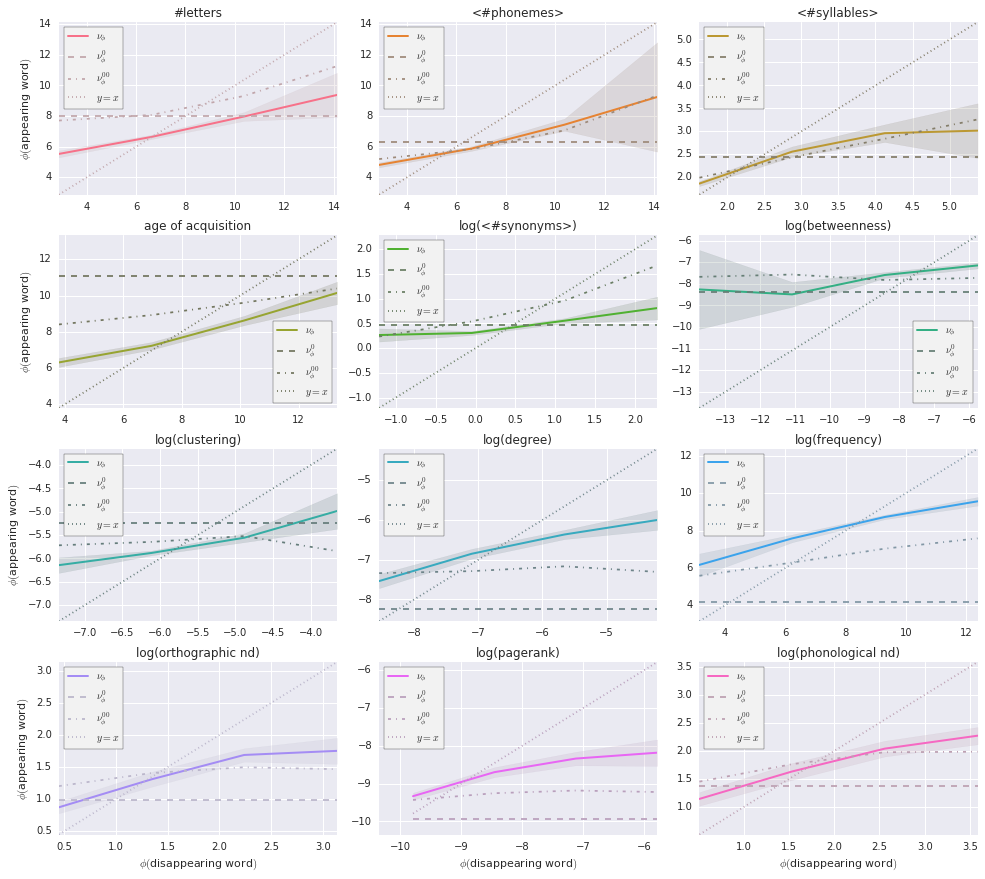

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

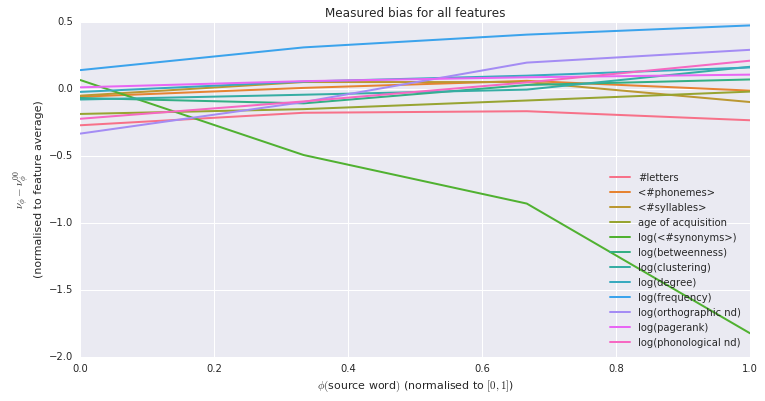

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | *** |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |


H_00 | *** | *** | *** | *   |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | **  | **  |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | *** | ns. | *** | **  |


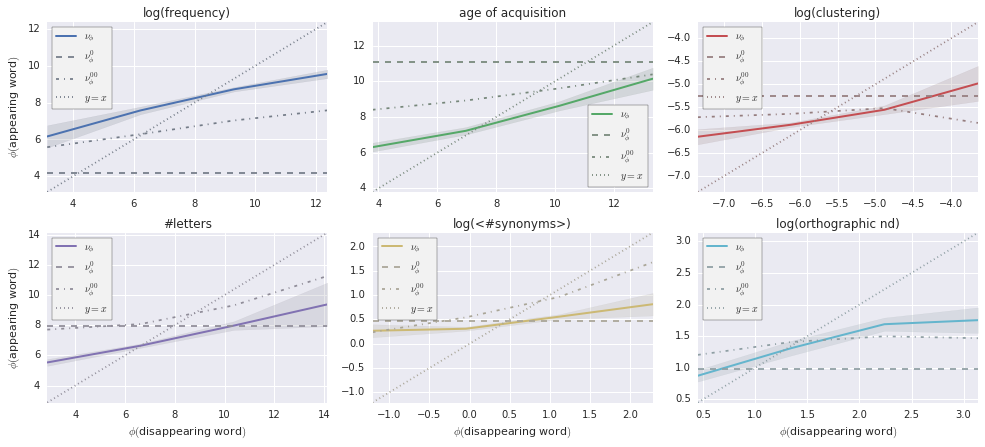

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

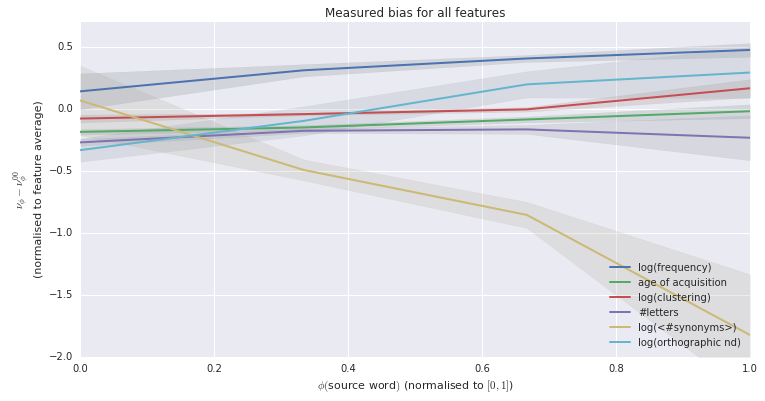

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | *** | *** | *** |
H_00 | *** | *   | *   |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | *** |
H_00 | **  | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *   | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | **  | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | *** | *** |
H_00 | *** | *   | ns. | *** |


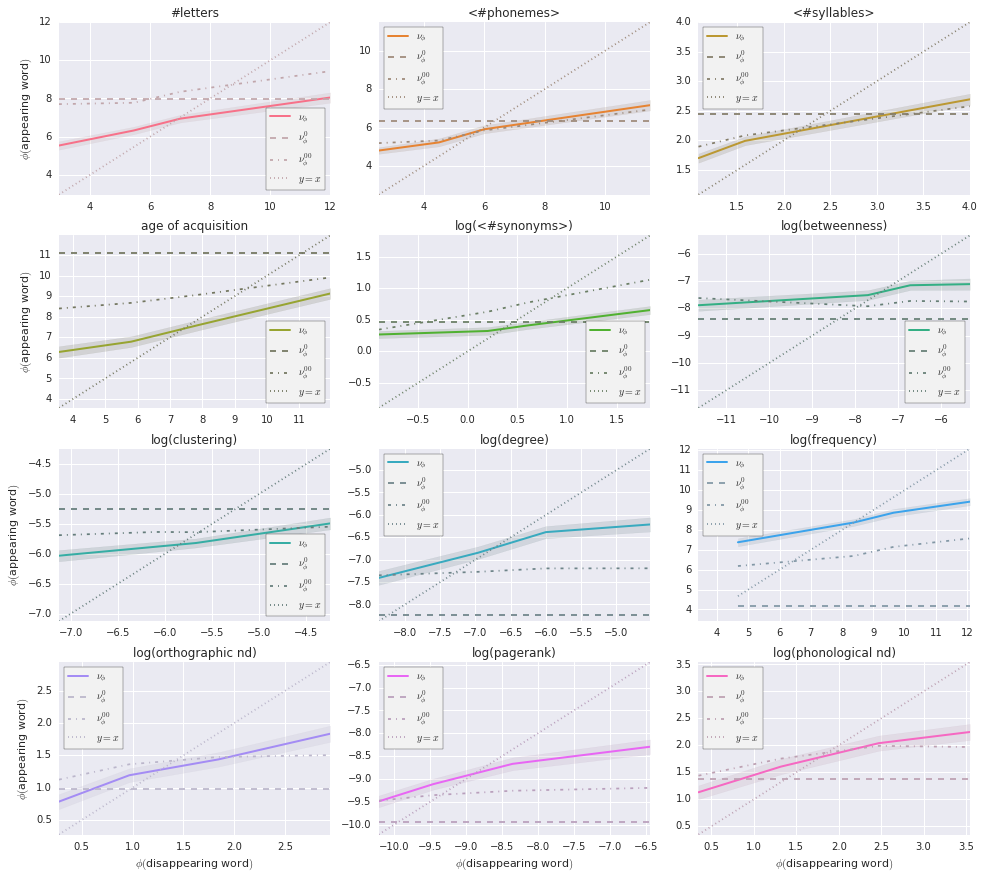

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

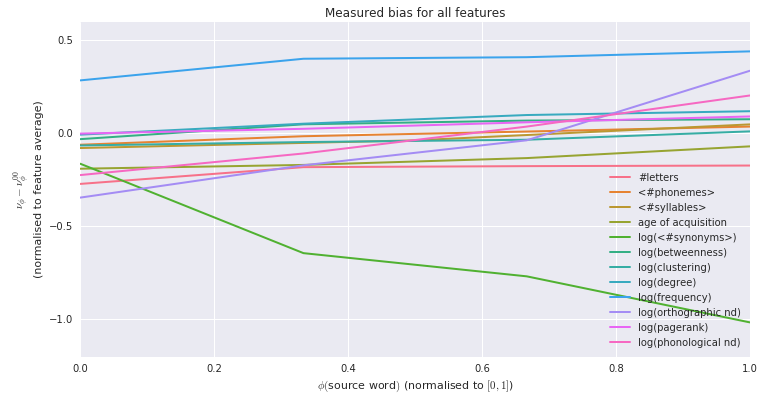

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | *** |
H_00 | **  | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | **  | ns. | *** |


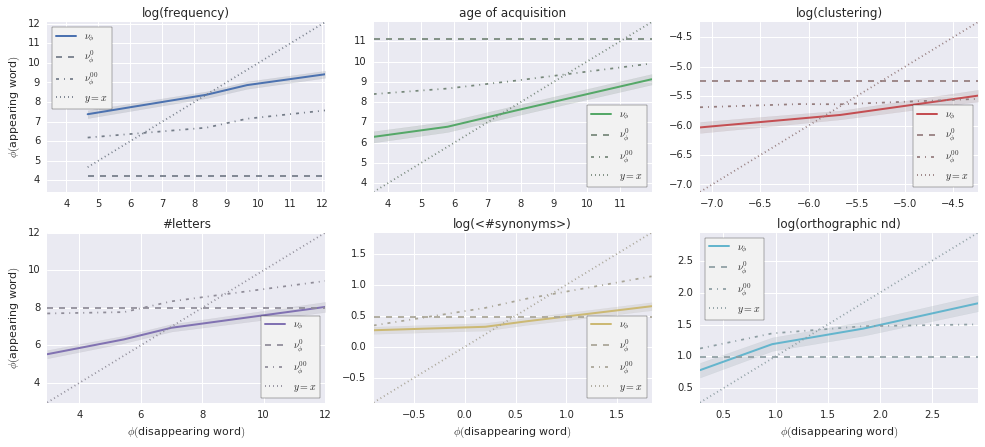

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

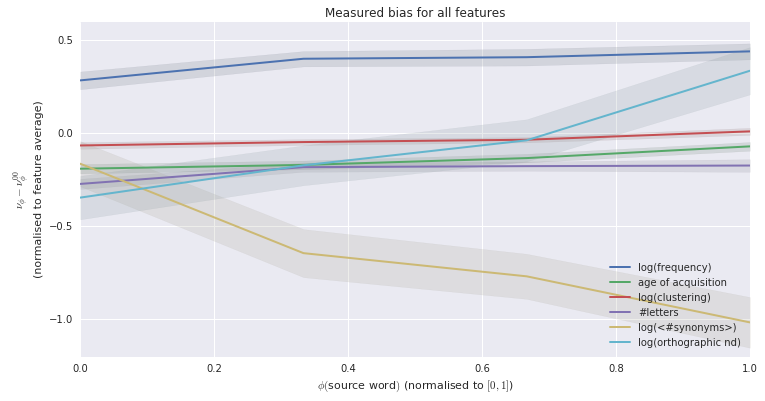

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | ns. | *** | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *   |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |


H_00 | ns. | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | ns. | **  |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | **  |
H_00 | *** | *** | **  | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | *   | *** | ns. | ns. |


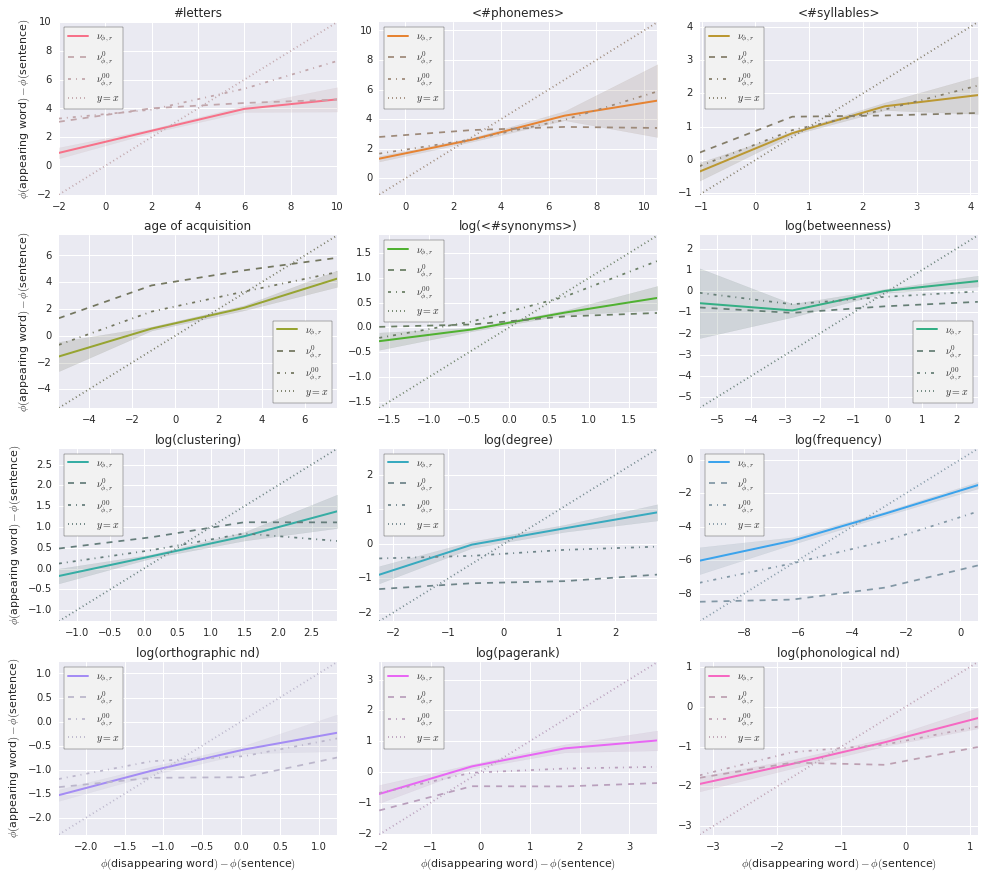

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

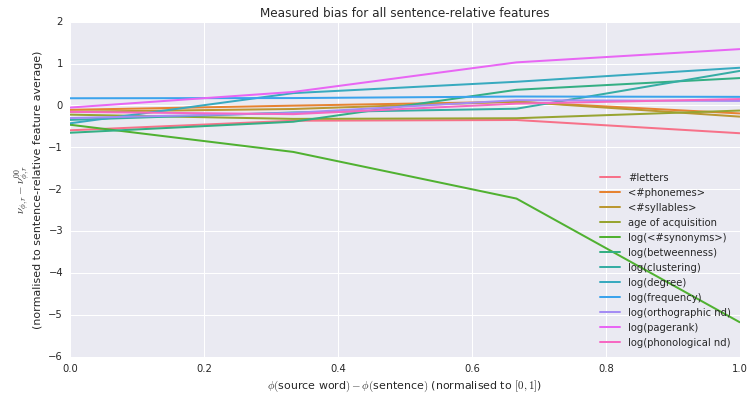

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | ns. | **  |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *   |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | **  |
H_00 | *** | *** | **  | ns. |


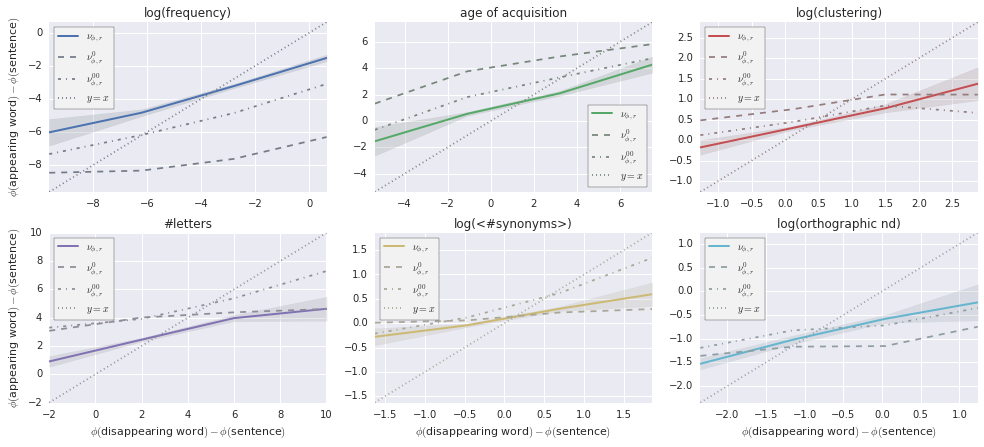

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

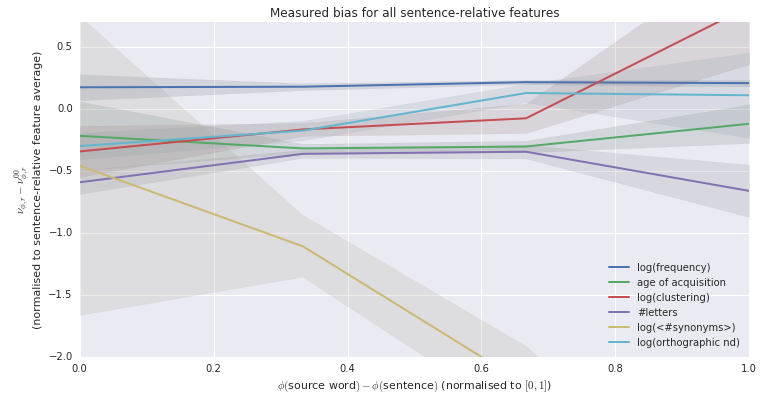

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | ns. | *** | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *   | ns. | *** |
H_00 | *** | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *   | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *   | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | **  | *** | *** |
H_00 | *** | *** | ns. | **  |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | **  | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |
H_00 | *** | *** | ns. | *   |


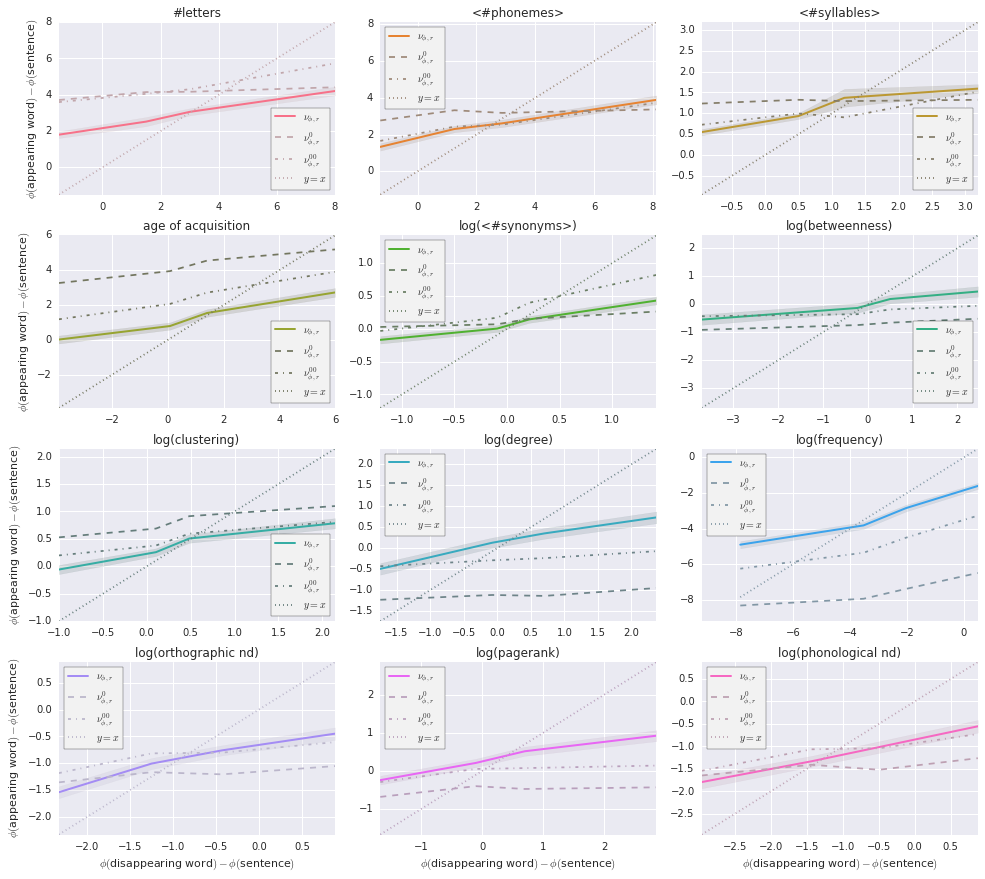

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

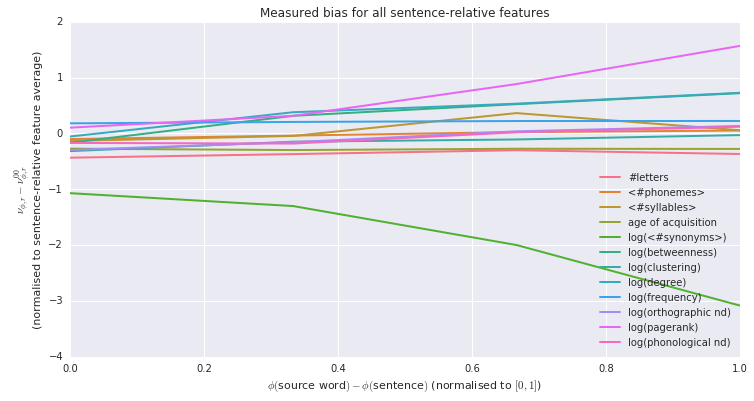

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *   | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *   | ns. | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | **  | *** | *** |
H_00 | *** | *** | ns. | **  |


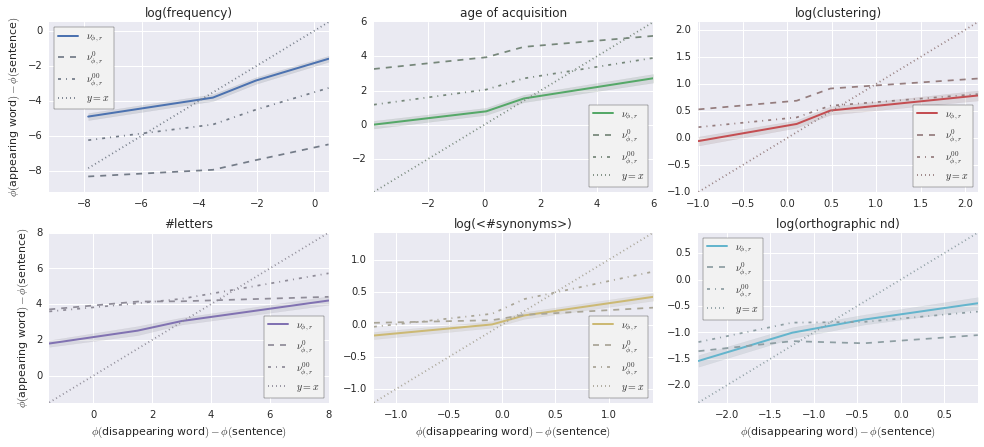

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

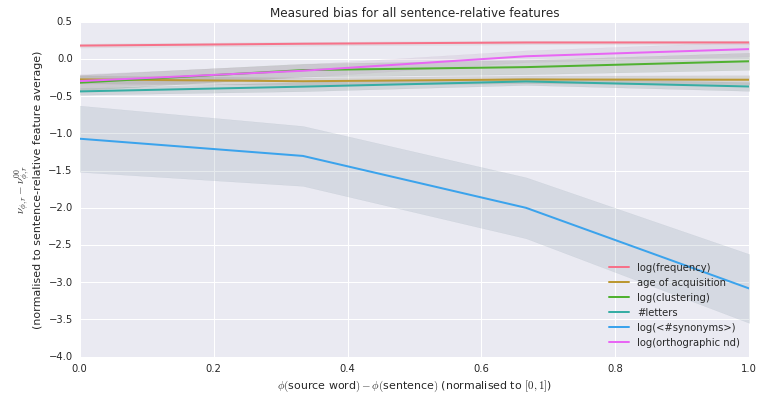

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


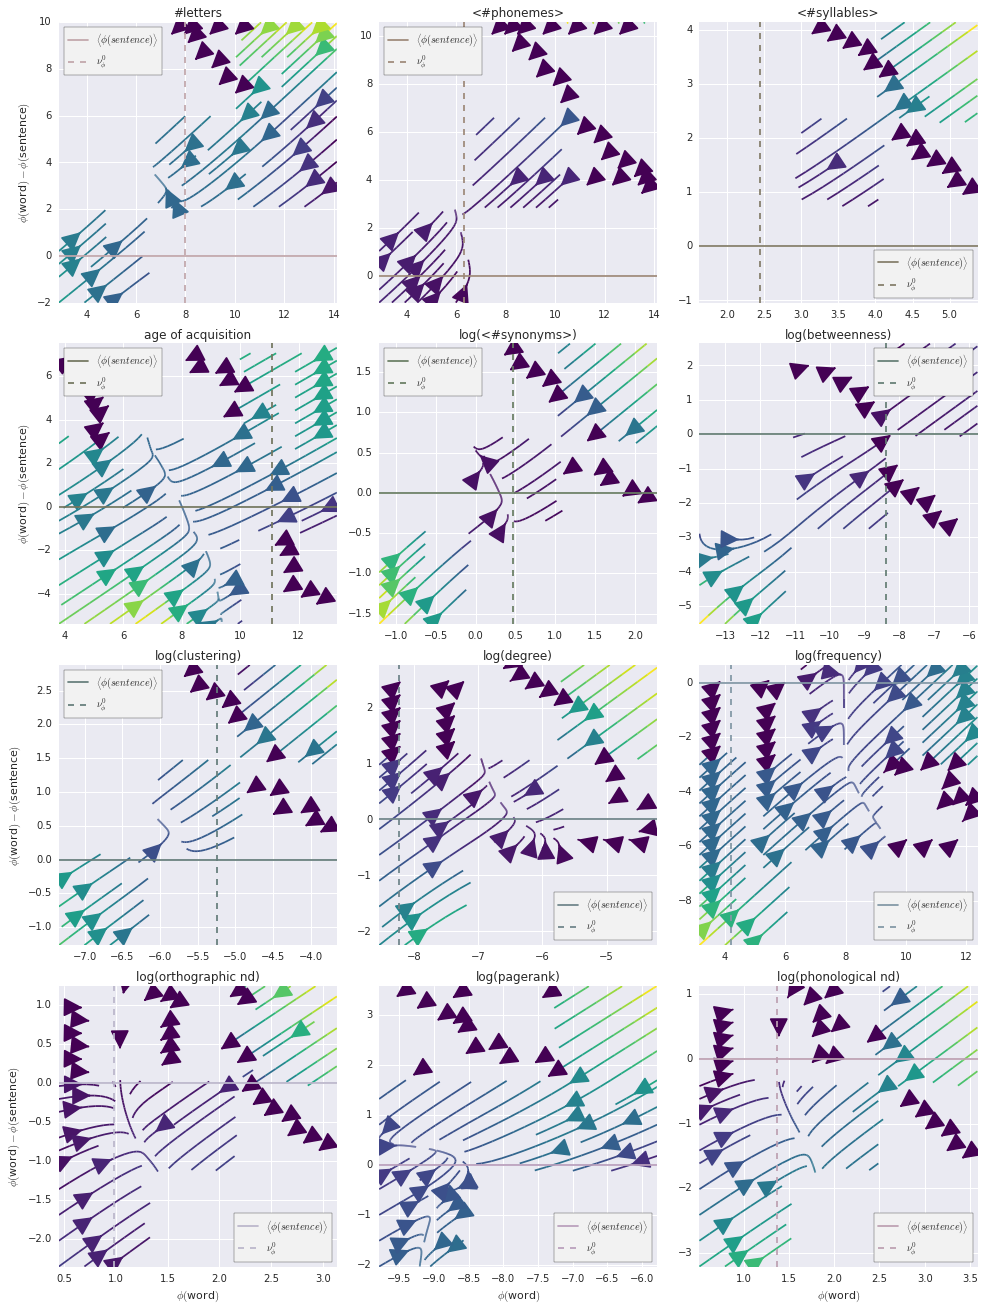

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


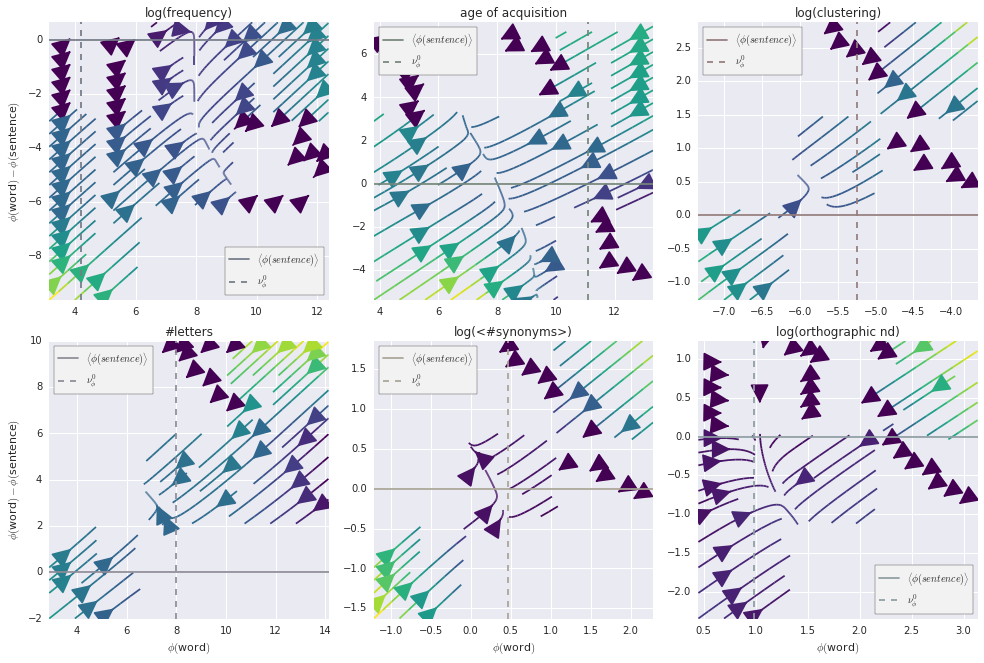

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.53118001  0.16984383  0.08486023  0.07138244  0.03431877  0.03114635
  0.02026665  0.01953249  0.01499711  0.00921627  0.00740786]

We're plotting variation for the first 3 components:


aoa  betweenness  clustering    degree  frequency  \
Component-0 -0.472754     0.292834   -0.079535  0.243040   0.233793   
Component-1 -0.256312     0.428259   -0.135165  0.293881   0.287968   
Component-2  0.814881     0.374155   -0.133468  0.124764   0.334159   

             letters_count  orthographic_density  pagerank  phonemes_count  \
Component-0      -0.425883              0.211612  0.284075       -0.400360   
Component-1       0.422299             -0.170129  0.294531        0.439821   
Component-2      -0.141843             -0.007585  0.088831       -0.100192   

             phonological_density  syllables_count  synonyms_count  
Component-0              0.278756        -0.160736       -0.003837  
Component-1             -0.220452         0.164369       -0.015803  
Component-2              0.101068        -0.025615       -0.044239

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 53419) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   10 of 53419) |            | Elapsed Time: 0:00:41 ETA: 2 days, 14:15:17

  0% (   34 of 53419) |                    | Elapsed Time: 0:00:42 ETA: 18:23:23

  0% (   57 of 53419) |                    | Elapsed Time: 0:00:42 ETA: 11:01:09

  0% (   80 of 53419) |                     | Elapsed Time: 0:00:42 ETA: 7:53:10

  0% (  104 of 53419) |                     | Elapsed Time: 0:00:42 ETA: 0:08:05

  0% (  127 of 53419) |                     | Elapsed Time: 0:00:43 ETA: 0:08:02

  0% (  151 of 53419) |                     | Elapsed Time: 0:00:43 ETA: 0:08:00

  0% (  175 of 53419) |                     | Elapsed Time: 0:00:43 ETA: 0:07:59

  0% (  199 of 53419) |                     | Elapsed Time: 0:00:43 ETA: 0:07:57

  0% (  222 of 53419) |                     | Elapsed Time: 0:00:43 ETA: 0:07:58

  0% (  244 of 53419) |                     | Elapsed Time: 0:00:44 ETA: 0:07:59

  0% (  266 of 53419) |                     | Elapsed Time: 0:00:44 ETA: 0:08:01

  0% (  289 of 53419) |                     | Elapsed Time: 0:00:44 ETA: 0:08:05

  0% (  312 of 53419) |                     | Elapsed Time: 0:00:44 ETA: 0:08:07

  0% (  335 of 53419) |                     | Elapsed Time: 0:00:44 ETA: 0:08:05

  0% (  358 of 53419) |                     | Elapsed Time: 0:00:45 ETA: 0:08:05

  0% (  381 of 53419) |                     | Elapsed Time: 0:00:45 ETA: 0:08:05

  0% (  405 of 53419) |                     | Elapsed Time: 0:00:45 ETA: 0:08:02

  0% (  427 of 53419) |                     | Elapsed Time: 0:00:45 ETA: 0:08:02

  0% (  451 of 53419) |                     | Elapsed Time: 0:00:45 ETA: 0:08:00

  0% (  476 of 53419) |                     | Elapsed Time: 0:00:46 ETA: 0:07:50

  0% (  499 of 53419) |                     | Elapsed Time: 0:00:46 ETA: 0:07:49

  0% (  526 of 53419) |                     | Elapsed Time: 0:00:46 ETA: 0:07:31

  1% (  554 of 53419) |                     | Elapsed Time: 0:00:46 ETA: 0:07:12

  1% (  581 of 53419) |                     | Elapsed Time: 0:00:46 ETA: 0:07:04

  1% (  608 of 53419) |                     | Elapsed Time: 0:00:47 ETA: 0:06:53

  1% (  634 of 53419) |                     | Elapsed Time: 0:00:47 ETA: 0:06:50

  1% (  668 of 53419) |                     | Elapsed Time: 0:00:47 ETA: 0:06:53

  1% (  694 of 53419) |                     | Elapsed Time: 0:00:47 ETA: 0:06:55

  1% (  720 of 53419) |                     | Elapsed Time: 0:00:48 ETA: 0:06:52

  1% (  748 of 53419) |                     | Elapsed Time: 0:00:48 ETA: 0:06:48

  1% (  773 of 53419) |                     | Elapsed Time: 0:00:48 ETA: 0:06:51

  1% (  801 of 53419) |                     | Elapsed Time: 0:00:48 ETA: 0:06:49

  1% (  828 of 53419) |                     | Elapsed Time: 0:00:48 ETA: 0:06:48

  1% (  855 of 53419) |                     | Elapsed Time: 0:00:49 ETA: 0:06:45

  1% (  883 of 53419) |                     | Elapsed Time: 0:00:49 ETA: 0:06:44

  1% (  909 of 53419) |                     | Elapsed Time: 0:00:49 ETA: 0:06:42

  1% (  937 of 53419) |                     | Elapsed Time: 0:00:49 ETA: 0:06:42

  1% (  964 of 53419) |                     | Elapsed Time: 0:00:49 ETA: 0:06:46

  1% ( 1005 of 53419) |                     | Elapsed Time: 0:00:50 ETA: 0:06:41

  1% ( 1031 of 53419) |                     | Elapsed Time: 0:00:50 ETA: 0:06:45

  1% ( 1058 of 53419) |                     | Elapsed Time: 0:00:50 ETA: 0:06:44

  2% ( 1086 of 53419) |                     | Elapsed Time: 0:00:50 ETA: 0:06:39

  2% ( 1114 of 53419) |                     | Elapsed Time: 0:00:51 ETA: 0:06:34

  2% ( 1140 of 53419) |                     | Elapsed Time: 0:00:51 ETA: 0:06:40

  2% ( 1166 of 53419) |                     | Elapsed Time: 0:00:51 ETA: 0:06:42

  2% ( 1195 of 53419) |                     | Elapsed Time: 0:00:51 ETA: 0:06:37

  2% ( 1221 of 53419) |                     | Elapsed Time: 0:00:51 ETA: 0:06:43

  2% ( 1247 of 53419) |                     | Elapsed Time: 0:00:52 ETA: 0:06:48

  2% ( 1273 of 53419) |                     | Elapsed Time: 0:00:52 ETA: 0:06:44

  2% ( 1299 of 53419) |                     | Elapsed Time: 0:00:52 ETA: 0:06:49

  2% ( 1336 of 53419) |                     | Elapsed Time: 0:00:52 ETA: 0:06:32

  2% ( 1368 of 53419) |                     | Elapsed Time: 0:00:53 ETA: 0:06:13

  2% ( 1398 of 53419) |                     | Elapsed Time: 0:00:53 ETA: 0:06:03

  2% ( 1428 of 53419) |                     | Elapsed Time: 0:00:53 ETA: 0:05:52

  2% ( 1459 of 53419) |                     | Elapsed Time: 0:00:53 ETA: 0:05:47

  2% ( 1491 of 53419) |                     | Elapsed Time: 0:00:53 ETA: 0:05:45

  2% ( 1525 of 53419) |                     | Elapsed Time: 0:00:54 ETA: 0:05:37

  2% ( 1556 of 53419) |                     | Elapsed Time: 0:00:54 ETA: 0:05:34

  2% ( 1588 of 53419) |                     | Elapsed Time: 0:00:54 ETA: 0:05:33

  3% ( 1620 of 53419) |                     | Elapsed Time: 0:00:54 ETA: 0:05:30

  3% ( 1651 of 53419) |                     | Elapsed Time: 0:00:54 ETA: 0:05:34

  3% ( 1677 of 53419) |                     | Elapsed Time: 0:00:55 ETA: 0:05:56

  3% ( 1700 of 53419) |                     | Elapsed Time: 0:00:55 ETA: 0:06:24

  3% ( 1714 of 53419) |                     | Elapsed Time: 0:00:55 ETA: 0:07:32

  3% ( 1728 of 53419) |                     | Elapsed Time: 0:00:55 ETA: 0:09:12

  3% ( 1742 of 53419) |                     | Elapsed Time: 0:00:55 ETA: 0:11:53

  3% ( 1756 of 53419) |                     | Elapsed Time: 0:00:56 ETA: 0:12:40

  3% ( 1770 of 53419) |                     | Elapsed Time: 0:00:56 ETA: 0:14:04

  3% ( 1784 of 53419) |                     | Elapsed Time: 0:00:56 ETA: 0:14:05

  3% ( 1798 of 53419) |                     | Elapsed Time: 0:00:56 ETA: 0:14:05

  3% ( 1811 of 53419) |                     | Elapsed Time: 0:00:57 ETA: 0:14:03

  3% ( 1825 of 53419) |                     | Elapsed Time: 0:00:57 ETA: 0:14:04

  3% ( 1839 of 53419) |                     | Elapsed Time: 0:00:57 ETA: 0:14:03

  3% ( 1853 of 53419) |                     | Elapsed Time: 0:00:57 ETA: 0:13:59

  3% ( 1867 of 53419) |                     | Elapsed Time: 0:00:58 ETA: 0:13:55

  3% ( 1881 of 53419) |                     | Elapsed Time: 0:00:58 ETA: 0:13:55

  3% ( 1895 of 53419) |                     | Elapsed Time: 0:00:58 ETA: 0:13:54

  3% ( 1909 of 53419) |                     | Elapsed Time: 0:00:58 ETA: 0:13:49

  3% ( 1923 of 53419) |                     | Elapsed Time: 0:00:58 ETA: 0:13:48

  3% ( 1937 of 53419) |                     | Elapsed Time: 0:00:59 ETA: 0:13:51

  3% ( 1951 of 53419) |                     | Elapsed Time: 0:00:59 ETA: 0:13:45

  3% ( 1965 of 53419) |                     | Elapsed Time: 0:00:59 ETA: 0:13:40

  3% ( 1984 of 53419) |                     | Elapsed Time: 0:00:59 ETA: 0:12:38

  3% ( 1998 of 53419) |                     | Elapsed Time: 0:01:00 ETA: 0:12:34

  3% ( 2011 of 53419) |                     | Elapsed Time: 0:01:00 ETA: 0:12:39

  3% ( 2025 of 53419) |                     | Elapsed Time: 0:01:00 ETA: 0:12:41

  3% ( 2038 of 53419) |                     | Elapsed Time: 0:01:00 ETA: 0:12:48

  3% ( 2052 of 53419) |                     | Elapsed Time: 0:01:00 ETA: 0:13:45

  3% ( 2066 of 53419) |                     | Elapsed Time: 0:01:01 ETA: 0:13:46

  3% ( 2080 of 53419) |                     | Elapsed Time: 0:01:01 ETA: 0:13:48

  3% ( 2094 of 53419) |                     | Elapsed Time: 0:01:01 ETA: 0:13:45

  3% ( 2108 of 53419) |                     | Elapsed Time: 0:01:01 ETA: 0:13:46

  3% ( 2122 of 53419) |                     | Elapsed Time: 0:01:02 ETA: 0:13:45

  3% ( 2134 of 53419) |                     | Elapsed Time: 0:01:02 ETA: 0:14:01

  4% ( 2148 of 53419) |                     | Elapsed Time: 0:01:02 ETA: 0:14:02

  4% ( 2162 of 53419) |                     | Elapsed Time: 0:01:02 ETA: 0:13:58

  4% ( 2176 of 53419) |                     | Elapsed Time: 0:01:02 ETA: 0:13:58

  4% ( 2190 of 53419) |                     | Elapsed Time: 0:01:03 ETA: 0:13:39

  4% ( 2204 of 53419) |                     | Elapsed Time: 0:01:03 ETA: 0:13:37

  4% ( 2218 of 53419) |                     | Elapsed Time: 0:01:03 ETA: 0:13:40

  4% ( 2232 of 53419) |                     | Elapsed Time: 0:01:03 ETA: 0:13:35

  4% ( 2246 of 53419) |                     | Elapsed Time: 0:01:04 ETA: 0:13:35

  4% ( 2260 of 53419) |                     | Elapsed Time: 0:01:04 ETA: 0:13:36

  4% ( 2274 of 53419) |                     | Elapsed Time: 0:01:04 ETA: 0:13:32

  4% ( 2288 of 53419) |                     | Elapsed Time: 0:01:04 ETA: 0:13:33

  4% ( 2302 of 53419) |                     | Elapsed Time: 0:01:04 ETA: 0:13:34

  4% ( 2316 of 53419) |                     | Elapsed Time: 0:01:05 ETA: 0:13:32

  4% ( 2330 of 53419) |                     | Elapsed Time: 0:01:05 ETA: 0:13:33

  4% ( 2347 of 53419) |                     | Elapsed Time: 0:01:05 ETA: 0:12:41

  4% ( 2363 of 53419) |                     | Elapsed Time: 0:01:05 ETA: 0:12:20

  4% ( 2376 of 53419) |                     | Elapsed Time: 0:01:06 ETA: 0:12:25

  4% ( 2389 of 53419) |                     | Elapsed Time: 0:01:06 ETA: 0:12:33

  4% ( 2403 of 53419) |                     | Elapsed Time: 0:01:06 ETA: 0:12:29

  4% ( 2424 of 53419) |                     | Elapsed Time: 0:01:06 ETA: 0:12:16

  4% ( 2450 of 53419) |                     | Elapsed Time: 0:01:06 ETA: 0:10:09

  4% ( 2477 of 53419) |                     | Elapsed Time: 0:01:07 ETA: 0:08:38

  4% ( 2503 of 53419) |                     | Elapsed Time: 0:01:07 ETA: 0:07:28

  4% ( 2529 of 53419) |                     | Elapsed Time: 0:01:07 ETA: 0:06:36

  4% ( 2556 of 53419) |#                    | Elapsed Time: 0:01:07 ETA: 0:06:33

  4% ( 2581 of 53419) |#                    | Elapsed Time: 0:01:07 ETA: 0:06:34

  4% ( 2607 of 53419) |#                    | Elapsed Time: 0:01:08 ETA: 0:06:39

  4% ( 2633 of 53419) |#                    | Elapsed Time: 0:01:08 ETA: 0:06:42

  5% ( 2671 of 53419) |#                    | Elapsed Time: 0:01:08 ETA: 0:06:47

  5% ( 2698 of 53419) |#                    | Elapsed Time: 0:01:08 ETA: 0:06:45

  5% ( 2725 of 53419) |#                    | Elapsed Time: 0:01:09 ETA: 0:06:39

  5% ( 2751 of 53419) |#                    | Elapsed Time: 0:01:09 ETA: 0:06:36

  5% ( 2775 of 53419) |#                    | Elapsed Time: 0:01:09 ETA: 0:06:42

  5% ( 2799 of 53419) |#                    | Elapsed Time: 0:01:09 ETA: 0:06:49

  5% ( 2824 of 53419) |#                    | Elapsed Time: 0:01:09 ETA: 0:06:53

  5% ( 2852 of 53419) |#                    | Elapsed Time: 0:01:10 ETA: 0:06:52

  5% ( 2880 of 53419) |#                    | Elapsed Time: 0:01:10 ETA: 0:06:44

  5% ( 2906 of 53419) |#                    | Elapsed Time: 0:01:10 ETA: 0:06:37

  5% ( 2933 of 53419) |#                    | Elapsed Time: 0:01:10 ETA: 0:06:30

  5% ( 2961 of 53419) |#                    | Elapsed Time: 0:01:10 ETA: 0:06:23

  5% ( 2987 of 53419) |#                    | Elapsed Time: 0:01:11 ETA: 0:06:28

  5% ( 3018 of 53419) |#                    | Elapsed Time: 0:01:11 ETA: 0:06:17

  5% ( 3045 of 53419) |#                    | Elapsed Time: 0:01:11 ETA: 0:06:14

  5% ( 3071 of 53419) |#                    | Elapsed Time: 0:01:11 ETA: 0:06:23

  5% ( 3096 of 53419) |#                    | Elapsed Time: 0:01:11 ETA: 0:06:25

  5% ( 3122 of 53419) |#                    | Elapsed Time: 0:01:12 ETA: 0:06:30

  5% ( 3147 of 53419) |#                    | Elapsed Time: 0:01:12 ETA: 0:06:45

  5% ( 3174 of 53419) |#                    | Elapsed Time: 0:01:12 ETA: 0:06:42

  5% ( 3201 of 53419) |#                    | Elapsed Time: 0:01:12 ETA: 0:06:35

  6% ( 3228 of 53419) |#                    | Elapsed Time: 0:01:12 ETA: 0:06:33

  6% ( 3255 of 53419) |#                    | Elapsed Time: 0:01:13 ETA: 0:06:26

  6% ( 3281 of 53419) |#                    | Elapsed Time: 0:01:13 ETA: 0:06:27

  6% ( 3308 of 53419) |#                    | Elapsed Time: 0:01:13 ETA: 0:06:28

  6% ( 3339 of 53419) |#                    | Elapsed Time: 0:01:13 ETA: 0:06:30

  6% ( 3365 of 53419) |#                    | Elapsed Time: 0:01:14 ETA: 0:06:32

  6% ( 3391 of 53419) |#                    | Elapsed Time: 0:01:14 ETA: 0:06:35

  6% ( 3417 of 53419) |#                    | Elapsed Time: 0:01:14 ETA: 0:06:36

  6% ( 3444 of 53419) |#                    | Elapsed Time: 0:01:14 ETA: 0:06:37

  6% ( 3471 of 53419) |#                    | Elapsed Time: 0:01:14 ETA: 0:06:36

  6% ( 3499 of 53419) |#                    | Elapsed Time: 0:01:15 ETA: 0:06:29

  6% ( 3527 of 53419) |#                    | Elapsed Time: 0:01:15 ETA: 0:06:24

  6% ( 3555 of 53419) |#                    | Elapsed Time: 0:01:15 ETA: 0:06:18

  6% ( 3582 of 53419) |#                    | Elapsed Time: 0:01:15 ETA: 0:06:17

  6% ( 3610 of 53419) |#                    | Elapsed Time: 0:01:15 ETA: 0:06:17

  6% ( 3638 of 53419) |#                    | Elapsed Time: 0:01:16 ETA: 0:06:16

  6% ( 3659 of 53419) |#                    | Elapsed Time: 0:01:16 ETA: 0:06:38

  6% ( 3680 of 53419) |#                    | Elapsed Time: 0:01:16 ETA: 0:07:00

  6% ( 3702 of 53419) |#                    | Elapsed Time: 0:01:16 ETA: 0:07:21

  6% ( 3719 of 53419) |#                    | Elapsed Time: 0:01:16 ETA: 0:08:23

  7% ( 3754 of 53419) |#                    | Elapsed Time: 0:01:17 ETA: 0:07:38

  7% ( 3784 of 53419) |#                    | Elapsed Time: 0:01:17 ETA: 0:06:59

  7% ( 3810 of 53419) |#                    | Elapsed Time: 0:01:17 ETA: 0:06:40

  7% ( 3837 of 53419) |#                    | Elapsed Time: 0:01:17 ETA: 0:06:06

  7% ( 3865 of 53419) |#                    | Elapsed Time: 0:01:18 ETA: 0:06:00

  7% ( 3891 of 53419) |#                    | Elapsed Time: 0:01:18 ETA: 0:06:23

  7% ( 3903 of 53419) |#                    | Elapsed Time: 0:01:18 ETA: 0:07:22

  7% ( 3915 of 53419) |#                    | Elapsed Time: 0:01:18 ETA: 0:08:43

  7% ( 3927 of 53419) |#                    | Elapsed Time: 0:01:18 ETA: 0:10:43

  7% ( 3939 of 53419) |#                    | Elapsed Time: 0:01:19 ETA: 0:13:40

  7% ( 3951 of 53419) |#                    | Elapsed Time: 0:01:19 ETA: 0:15:37

  7% ( 3963 of 53419) |#                    | Elapsed Time: 0:01:19 ETA: 0:15:27

  7% ( 4007 of 53419) |#                    | Elapsed Time: 0:01:19 ETA: 0:10:51

  7% ( 4029 of 53419) |#                    | Elapsed Time: 0:01:20 ETA: 0:08:56

  7% ( 4047 of 53419) |#                    | Elapsed Time: 0:01:20 ETA: 0:08:16

  7% ( 4069 of 53419) |#                    | Elapsed Time: 0:01:20 ETA: 0:07:23

  7% ( 4091 of 53419) |#                    | Elapsed Time: 0:01:20 ETA: 0:07:23

  7% ( 4108 of 53419) |#                    | Elapsed Time: 0:01:20 ETA: 0:08:52

  7% ( 4131 of 53419) |#                    | Elapsed Time: 0:01:21 ETA: 0:08:04

  7% ( 4162 of 53419) |#                    | Elapsed Time: 0:01:21 ETA: 0:07:24

  7% ( 4191 of 53419) |#                    | Elapsed Time: 0:01:21 ETA: 0:06:55

  7% ( 4219 of 53419) |#                    | Elapsed Time: 0:01:21 ETA: 0:06:29

  7% ( 4243 of 53419) |#                    | Elapsed Time: 0:01:21 ETA: 0:06:04

  7% ( 4263 of 53419) |#                    | Elapsed Time: 0:01:22 ETA: 0:06:38

  8% ( 4283 of 53419) |#                    | Elapsed Time: 0:01:22 ETA: 0:07:28

  8% ( 4303 of 53419) |#                    | Elapsed Time: 0:01:22 ETA: 0:08:11

  8% ( 4323 of 53419) |#                    | Elapsed Time: 0:01:22 ETA: 0:08:44

  8% ( 4343 of 53419) |#                    | Elapsed Time: 0:01:23 ETA: 0:08:58

  8% ( 4362 of 53419) |#                    | Elapsed Time: 0:01:23 ETA: 0:09:01

  8% ( 4382 of 53419) |#                    | Elapsed Time: 0:01:23 ETA: 0:08:58

  8% ( 4402 of 53419) |#                    | Elapsed Time: 0:01:23 ETA: 0:08:57

  8% ( 4422 of 53419) |#                    | Elapsed Time: 0:01:23 ETA: 0:08:53

  8% ( 4442 of 53419) |#                    | Elapsed Time: 0:01:24 ETA: 0:08:46

  8% ( 4462 of 53419) |#                    | Elapsed Time: 0:01:24 ETA: 0:08:44

  8% ( 4482 of 53419) |#                    | Elapsed Time: 0:01:24 ETA: 0:08:39

  8% ( 4502 of 53419) |#                    | Elapsed Time: 0:01:24 ETA: 0:08:39

  8% ( 4522 of 53419) |#                    | Elapsed Time: 0:01:24 ETA: 0:08:37

  8% ( 4542 of 53419) |#                    | Elapsed Time: 0:01:25 ETA: 0:08:37

  8% ( 4562 of 53419) |#                    | Elapsed Time: 0:01:25 ETA: 0:08:34

  8% ( 4582 of 53419) |#                    | Elapsed Time: 0:01:25 ETA: 0:08:34

  8% ( 4602 of 53419) |#                    | Elapsed Time: 0:01:25 ETA: 0:08:33

  8% ( 4622 of 53419) |#                    | Elapsed Time: 0:01:26 ETA: 0:08:36

  8% ( 4642 of 53419) |#                    | Elapsed Time: 0:01:26 ETA: 0:08:43

  8% ( 4662 of 53419) |#                    | Elapsed Time: 0:01:26 ETA: 0:08:47

  8% ( 4687 of 53419) |#                    | Elapsed Time: 0:01:26 ETA: 0:08:26

  8% ( 4716 of 53419) |#                    | Elapsed Time: 0:01:26 ETA: 0:07:35

  8% ( 4750 of 53419) |#                    | Elapsed Time: 0:01:27 ETA: 0:06:36

  8% ( 4777 of 53419) |#                    | Elapsed Time: 0:01:27 ETA: 0:06:10

  8% ( 4801 of 53419) |#                    | Elapsed Time: 0:01:27 ETA: 0:05:56

  9% ( 4826 of 53419) |#                    | Elapsed Time: 0:01:27 ETA: 0:05:57

  9% ( 4850 of 53419) |#                    | Elapsed Time: 0:01:27 ETA: 0:06:34

  9% ( 4877 of 53419) |#                    | Elapsed Time: 0:01:28 ETA: 0:06:43

  9% ( 4903 of 53419) |#                    | Elapsed Time: 0:01:28 ETA: 0:06:41

  9% ( 4925 of 53419) |#                    | Elapsed Time: 0:01:28 ETA: 0:06:50

  9% ( 4945 of 53419) |#                    | Elapsed Time: 0:01:28 ETA: 0:06:55

  9% ( 4965 of 53419) |#                    | Elapsed Time: 0:01:28 ETA: 0:07:25

  9% ( 4985 of 53419) |#                    | Elapsed Time: 0:01:29 ETA: 0:07:58

  9% ( 5005 of 53419) |#                    | Elapsed Time: 0:01:29 ETA: 0:08:17

  9% ( 5025 of 53419) |#                    | Elapsed Time: 0:01:29 ETA: 0:08:25

  9% ( 5046 of 53419) |#                    | Elapsed Time: 0:01:29 ETA: 0:08:22

  9% ( 5067 of 53419) |#                    | Elapsed Time: 0:01:30 ETA: 0:08:20

  9% ( 5088 of 53419) |##                   | Elapsed Time: 0:01:30 ETA: 0:08:14

  9% ( 5109 of 53419) |##                   | Elapsed Time: 0:01:30 ETA: 0:08:12

  9% ( 5129 of 53419) |##                   | Elapsed Time: 0:01:30 ETA: 0:08:10

  9% ( 5150 of 53419) |##                   | Elapsed Time: 0:01:30 ETA: 0:08:10

  9% ( 5171 of 53419) |##                   | Elapsed Time: 0:01:31 ETA: 0:08:12

  9% ( 5193 of 53419) |##                   | Elapsed Time: 0:01:31 ETA: 0:08:12

  9% ( 5214 of 53419) |##                   | Elapsed Time: 0:01:31 ETA: 0:08:07

  9% ( 5235 of 53419) |##                   | Elapsed Time: 0:01:31 ETA: 0:08:04

  9% ( 5256 of 53419) |##                   | Elapsed Time: 0:01:31 ETA: 0:08:03

  9% ( 5277 of 53419) |##                   | Elapsed Time: 0:01:32 ETA: 0:08:02

  9% ( 5297 of 53419) |##                   | Elapsed Time: 0:01:32 ETA: 0:08:06

  9% ( 5317 of 53419) |##                   | Elapsed Time: 0:01:32 ETA: 0:08:06

 10% ( 5342 of 53419) |##                   | Elapsed Time: 0:01:32 ETA: 0:08:10

 10% ( 5362 of 53419) |##                   | Elapsed Time: 0:01:33 ETA: 0:08:15

 10% ( 5381 of 53419) |##                   | Elapsed Time: 0:01:33 ETA: 0:08:22

 10% ( 5401 of 53419) |##                   | Elapsed Time: 0:01:33 ETA: 0:08:21

 10% ( 5421 of 53419) |##                   | Elapsed Time: 0:01:33 ETA: 0:08:20

 10% ( 5441 of 53419) |##                   | Elapsed Time: 0:01:33 ETA: 0:08:22

 10% ( 5461 of 53419) |##                   | Elapsed Time: 0:01:34 ETA: 0:08:12

 10% ( 5481 of 53419) |##                   | Elapsed Time: 0:01:34 ETA: 0:08:11

 10% ( 5501 of 53419) |##                   | Elapsed Time: 0:01:34 ETA: 0:08:11

 10% ( 5521 of 53419) |##                   | Elapsed Time: 0:01:34 ETA: 0:08:13

 10% ( 5541 of 53419) |##                   | Elapsed Time: 0:01:34 ETA: 0:08:11

 10% ( 5561 of 53419) |##                   | Elapsed Time: 0:01:35 ETA: 0:08:11

 10% ( 5581 of 53419) |##                   | Elapsed Time: 0:01:35 ETA: 0:08:13

 10% ( 5601 of 53419) |##                   | Elapsed Time: 0:01:35 ETA: 0:08:15

 10% ( 5621 of 53419) |##                   | Elapsed Time: 0:01:35 ETA: 0:08:12

 10% ( 5641 of 53419) |##                   | Elapsed Time: 0:01:35 ETA: 0:08:11

 10% ( 5661 of 53419) |##                   | Elapsed Time: 0:01:36 ETA: 0:08:11

 10% ( 5681 of 53419) |##                   | Elapsed Time: 0:01:36 ETA: 0:08:13

 10% ( 5701 of 53419) |##                   | Elapsed Time: 0:01:36 ETA: 0:08:11

 10% ( 5721 of 53419) |##                   | Elapsed Time: 0:01:36 ETA: 0:08:12

 10% ( 5741 of 53419) |##                   | Elapsed Time: 0:01:36 ETA: 0:08:14

 10% ( 5761 of 53419) |##                   | Elapsed Time: 0:01:37 ETA: 0:08:12

 10% ( 5781 of 53419) |##                   | Elapsed Time: 0:01:37 ETA: 0:08:12

 10% ( 5801 of 53419) |##                   | Elapsed Time: 0:01:37 ETA: 0:08:12

 10% ( 5821 of 53419) |##                   | Elapsed Time: 0:01:37 ETA: 0:08:13

 10% ( 5841 of 53419) |##                   | Elapsed Time: 0:01:37 ETA: 0:08:09

 10% ( 5861 of 53419) |##                   | Elapsed Time: 0:01:38 ETA: 0:08:10

 11% ( 5881 of 53419) |##                   | Elapsed Time: 0:01:38 ETA: 0:08:12

 11% ( 5901 of 53419) |##                   | Elapsed Time: 0:01:38 ETA: 0:08:10

 11% ( 5921 of 53419) |##                   | Elapsed Time: 0:01:38 ETA: 0:08:10

 11% ( 5942 of 53419) |##                   | Elapsed Time: 0:01:39 ETA: 0:08:08

 11% ( 5964 of 53419) |##                   | Elapsed Time: 0:01:39 ETA: 0:07:54

 11% ( 5995 of 53419) |##                   | Elapsed Time: 0:01:39 ETA: 0:07:50

 11% ( 6020 of 53419) |##                   | Elapsed Time: 0:01:39 ETA: 0:07:53

 11% ( 6041 of 53419) |##                   | Elapsed Time: 0:01:40 ETA: 0:07:53

 11% ( 6061 of 53419) |##                   | Elapsed Time: 0:01:40 ETA: 0:08:03

 11% ( 6081 of 53419) |##                   | Elapsed Time: 0:01:40 ETA: 0:08:05

 11% ( 6101 of 53419) |##                   | Elapsed Time: 0:01:40 ETA: 0:08:04

 11% ( 6123 of 53419) |##                   | Elapsed Time: 0:01:40 ETA: 0:07:59

 11% ( 6144 of 53419) |##                   | Elapsed Time: 0:01:41 ETA: 0:07:59

 11% ( 6164 of 53419) |##                   | Elapsed Time: 0:01:41 ETA: 0:08:00

 11% ( 6184 of 53419) |##                   | Elapsed Time: 0:01:41 ETA: 0:08:01

 11% ( 6204 of 53419) |##                   | Elapsed Time: 0:01:41 ETA: 0:08:04

 11% ( 6224 of 53419) |##                   | Elapsed Time: 0:01:41 ETA: 0:08:06

 11% ( 6244 of 53419) |##                   | Elapsed Time: 0:01:42 ETA: 0:08:05

 11% ( 6264 of 53419) |##                   | Elapsed Time: 0:01:42 ETA: 0:08:02

 11% ( 6284 of 53419) |##                   | Elapsed Time: 0:01:42 ETA: 0:08:06

 11% ( 6304 of 53419) |##                   | Elapsed Time: 0:01:42 ETA: 0:08:05

 11% ( 6324 of 53419) |##                   | Elapsed Time: 0:01:42 ETA: 0:08:05

 11% ( 6344 of 53419) |##                   | Elapsed Time: 0:01:43 ETA: 0:08:06

 11% ( 6374 of 53419) |##                   | Elapsed Time: 0:01:43 ETA: 0:08:00

 11% ( 6394 of 53419) |##                   | Elapsed Time: 0:01:43 ETA: 0:07:59

 12% ( 6414 of 53419) |##                   | Elapsed Time: 0:01:43 ETA: 0:07:59

 12% ( 6435 of 53419) |##                   | Elapsed Time: 0:01:44 ETA: 0:07:57

 12% ( 6455 of 53419) |##                   | Elapsed Time: 0:01:44 ETA: 0:07:57

 12% ( 6475 of 53419) |##                   | Elapsed Time: 0:01:44 ETA: 0:07:56

 12% ( 6495 of 53419) |##                   | Elapsed Time: 0:01:44 ETA: 0:07:59

 12% ( 6515 of 53419) |##                   | Elapsed Time: 0:01:44 ETA: 0:08:03

 12% ( 6537 of 53419) |##                   | Elapsed Time: 0:01:45 ETA: 0:07:59

 12% ( 6558 of 53419) |##                   | Elapsed Time: 0:01:45 ETA: 0:07:55

 12% ( 6584 of 53419) |##                   | Elapsed Time: 0:01:45 ETA: 0:07:25

 12% ( 6610 of 53419) |##                   | Elapsed Time: 0:01:45 ETA: 0:06:57

 12% ( 6636 of 53419) |##                   | Elapsed Time: 0:01:45 ETA: 0:06:37

 12% ( 6660 of 53419) |##                   | Elapsed Time: 0:01:46 ETA: 0:06:27

 12% ( 6690 of 53419) |##                   | Elapsed Time: 0:01:46 ETA: 0:06:33

 12% ( 6716 of 53419) |##                   | Elapsed Time: 0:01:46 ETA: 0:06:32

 12% ( 6742 of 53419) |##                   | Elapsed Time: 0:01:46 ETA: 0:06:31

 12% ( 6764 of 53419) |##                   | Elapsed Time: 0:01:47 ETA: 0:06:44

 12% ( 6788 of 53419) |##                   | Elapsed Time: 0:01:47 ETA: 0:06:38

 12% ( 6813 of 53419) |##                   | Elapsed Time: 0:01:47 ETA: 0:06:36

 12% ( 6840 of 53419) |##                   | Elapsed Time: 0:01:47 ETA: 0:06:33

 12% ( 6863 of 53419) |##                   | Elapsed Time: 0:01:47 ETA: 0:06:30

 12% ( 6890 of 53419) |##                   | Elapsed Time: 0:01:48 ETA: 0:06:16

 12% ( 6914 of 53419) |##                   | Elapsed Time: 0:01:48 ETA: 0:06:22

 12% ( 6942 of 53419) |##                   | Elapsed Time: 0:01:48 ETA: 0:06:15

 13% ( 6970 of 53419) |##                   | Elapsed Time: 0:01:48 ETA: 0:06:06

 13% ( 6996 of 53419) |##                   | Elapsed Time: 0:01:48 ETA: 0:06:07

 13% ( 7022 of 53419) |##                   | Elapsed Time: 0:01:49 ETA: 0:06:02

 13% ( 7049 of 53419) |##                   | Elapsed Time: 0:01:49 ETA: 0:06:00

 13% ( 7073 of 53419) |##                   | Elapsed Time: 0:01:49 ETA: 0:06:08

 13% ( 7096 of 53419) |##                   | Elapsed Time: 0:01:49 ETA: 0:06:20

 13% ( 7119 of 53419) |##                   | Elapsed Time: 0:01:49 ETA: 0:06:33

 13% ( 7142 of 53419) |##                   | Elapsed Time: 0:01:50 ETA: 0:06:40

 13% ( 7166 of 53419) |##                   | Elapsed Time: 0:01:50 ETA: 0:06:46

 13% ( 7190 of 53419) |##                   | Elapsed Time: 0:01:50 ETA: 0:06:48

 13% ( 7213 of 53419) |##                   | Elapsed Time: 0:01:50 ETA: 0:06:48

 13% ( 7236 of 53419) |##                   | Elapsed Time: 0:01:50 ETA: 0:06:54

 13% ( 7261 of 53419) |##                   | Elapsed Time: 0:01:51 ETA: 0:06:48

 13% ( 7283 of 53419) |##                   | Elapsed Time: 0:01:51 ETA: 0:06:50

 13% ( 7306 of 53419) |##                   | Elapsed Time: 0:01:51 ETA: 0:06:50

 13% ( 7328 of 53419) |##                   | Elapsed Time: 0:01:51 ETA: 0:06:55

 13% ( 7360 of 53419) |##                   | Elapsed Time: 0:01:52 ETA: 0:06:44

 13% ( 7385 of 53419) |##                   | Elapsed Time: 0:01:52 ETA: 0:06:37

 13% ( 7413 of 53419) |##                   | Elapsed Time: 0:01:52 ETA: 0:06:17

 13% ( 7445 of 53419) |##                   | Elapsed Time: 0:01:52 ETA: 0:05:53

 13% ( 7477 of 53419) |##                   | Elapsed Time: 0:01:52 ETA: 0:05:34

 14% ( 7506 of 53419) |##                   | Elapsed Time: 0:01:53 ETA: 0:05:23

 14% ( 7535 of 53419) |##                   | Elapsed Time: 0:01:53 ETA: 0:05:18

 14% ( 7564 of 53419) |##                   | Elapsed Time: 0:01:53 ETA: 0:05:21

 14% ( 7593 of 53419) |##                   | Elapsed Time: 0:01:53 ETA: 0:05:25

 14% ( 7622 of 53419) |##                   | Elapsed Time: 0:01:53 ETA: 0:05:26

 14% ( 7652 of 53419) |###                  | Elapsed Time: 0:01:54 ETA: 0:05:24

 14% ( 7681 of 53419) |###                  | Elapsed Time: 0:01:54 ETA: 0:05:24

 14% ( 7710 of 53419) |###                  | Elapsed Time: 0:01:54 ETA: 0:05:24

 14% ( 7740 of 53419) |###                  | Elapsed Time: 0:01:54 ETA: 0:05:23

 14% ( 7769 of 53419) |###                  | Elapsed Time: 0:01:54 ETA: 0:05:25

 14% ( 7798 of 53419) |###                  | Elapsed Time: 0:01:55 ETA: 0:05:25

 14% ( 7828 of 53419) |###                  | Elapsed Time: 0:01:55 ETA: 0:05:24

 14% ( 7857 of 53419) |###                  | Elapsed Time: 0:01:55 ETA: 0:05:23

 14% ( 7887 of 53419) |###                  | Elapsed Time: 0:01:55 ETA: 0:05:18

 14% ( 7932 of 53419) |###                  | Elapsed Time: 0:01:56 ETA: 0:05:12

 14% ( 7962 of 53419) |###                  | Elapsed Time: 0:01:56 ETA: 0:05:10

 14% ( 7992 of 53419) |###                  | Elapsed Time: 0:01:56 ETA: 0:05:07

 15% ( 8028 of 53419) |###                  | Elapsed Time: 0:01:56 ETA: 0:05:07

 15% ( 8058 of 53419) |###                  | Elapsed Time: 0:01:56 ETA: 0:05:07

 15% ( 8088 of 53419) |###                  | Elapsed Time: 0:01:57 ETA: 0:05:06

 15% ( 8133 of 53419) |###                  | Elapsed Time: 0:01:57 ETA: 0:05:04

 15% ( 8178 of 53419) |###                  | Elapsed Time: 0:01:57 ETA: 0:05:03

 15% ( 8208 of 53419) |###                  | Elapsed Time: 0:01:57 ETA: 0:05:05

 15% ( 8238 of 53419) |###                  | Elapsed Time: 0:01:58 ETA: 0:05:05

 15% ( 8268 of 53419) |###                  | Elapsed Time: 0:01:58 ETA: 0:05:05

 15% ( 8298 of 53419) |###                  | Elapsed Time: 0:01:58 ETA: 0:05:05

 15% ( 8328 of 53419) |###                  | Elapsed Time: 0:01:58 ETA: 0:05:04

 15% ( 8358 of 53419) |###                  | Elapsed Time: 0:01:58 ETA: 0:05:03

 15% ( 8388 of 53419) |###                  | Elapsed Time: 0:01:59 ETA: 0:05:04

 15% ( 8418 of 53419) |###                  | Elapsed Time: 0:01:59 ETA: 0:05:05

 15% ( 8448 of 53419) |###                  | Elapsed Time: 0:01:59 ETA: 0:05:05

 15% ( 8478 of 53419) |###                  | Elapsed Time: 0:01:59 ETA: 0:05:06

 15% ( 8508 of 53419) |###                  | Elapsed Time: 0:01:59 ETA: 0:05:05

 15% ( 8538 of 53419) |###                  | Elapsed Time: 0:02:00 ETA: 0:05:05

 16% ( 8568 of 53419) |###                  | Elapsed Time: 0:02:00 ETA: 0:05:03

 16% ( 8598 of 53419) |###                  | Elapsed Time: 0:02:00 ETA: 0:05:03

 16% ( 8621 of 53419) |###                  | Elapsed Time: 0:02:00 ETA: 0:05:22

 16% ( 8642 of 53419) |###                  | Elapsed Time: 0:02:01 ETA: 0:05:51

 16% ( 8664 of 53419) |###                  | Elapsed Time: 0:02:01 ETA: 0:06:20

 16% ( 8694 of 53419) |###                  | Elapsed Time: 0:02:01 ETA: 0:06:44

 16% ( 8716 of 53419) |###                  | Elapsed Time: 0:02:01 ETA: 0:07:07

 16% ( 8738 of 53419) |###                  | Elapsed Time: 0:02:01 ETA: 0:06:47

 16% ( 8759 of 53419) |###                  | Elapsed Time: 0:02:02 ETA: 0:06:45

 16% ( 8780 of 53419) |###                  | Elapsed Time: 0:02:02 ETA: 0:07:11

 16% ( 8805 of 53419) |###                  | Elapsed Time: 0:02:02 ETA: 0:06:57

 16% ( 8830 of 53419) |###                  | Elapsed Time: 0:02:02 ETA: 0:06:50

 16% ( 8854 of 53419) |###                  | Elapsed Time: 0:02:02 ETA: 0:06:38

 16% ( 8877 of 53419) |###                  | Elapsed Time: 0:02:03 ETA: 0:06:22

 16% ( 8902 of 53419) |###                  | Elapsed Time: 0:02:03 ETA: 0:06:16

 16% ( 8924 of 53419) |###                  | Elapsed Time: 0:02:03 ETA: 0:06:35

 16% ( 8942 of 53419) |###                  | Elapsed Time: 0:02:03 ETA: 0:06:56

 16% ( 8963 of 53419) |###                  | Elapsed Time: 0:02:04 ETA: 0:07:04

 16% ( 8990 of 53419) |###                  | Elapsed Time: 0:02:04 ETA: 0:07:05

 16% ( 9009 of 53419) |###                  | Elapsed Time: 0:02:04 ETA: 0:07:15

 16% ( 9029 of 53419) |###                  | Elapsed Time: 0:02:04 ETA: 0:07:13

 16% ( 9052 of 53419) |###                  | Elapsed Time: 0:02:04 ETA: 0:07:04

 16% ( 9076 of 53419) |###                  | Elapsed Time: 0:02:05 ETA: 0:06:56

 17% ( 9099 of 53419) |###                  | Elapsed Time: 0:02:05 ETA: 0:06:57

 17% ( 9125 of 53419) |###                  | Elapsed Time: 0:02:05 ETA: 0:06:42

 17% ( 9150 of 53419) |###                  | Elapsed Time: 0:02:05 ETA: 0:06:15

 17% ( 9174 of 53419) |###                  | Elapsed Time: 0:02:05 ETA: 0:06:15

 17% ( 9195 of 53419) |###                  | Elapsed Time: 0:02:06 ETA: 0:06:19

 17% ( 9218 of 53419) |###                  | Elapsed Time: 0:02:06 ETA: 0:06:29

 17% ( 9245 of 53419) |###                  | Elapsed Time: 0:02:06 ETA: 0:06:30

 17% ( 9272 of 53419) |###                  | Elapsed Time: 0:02:06 ETA: 0:06:19

 17% ( 9295 of 53419) |###                  | Elapsed Time: 0:02:06 ETA: 0:06:20

 17% ( 9321 of 53419) |###                  | Elapsed Time: 0:02:07 ETA: 0:06:09

 17% ( 9349 of 53419) |###                  | Elapsed Time: 0:02:07 ETA: 0:06:14

 17% ( 9371 of 53419) |###                  | Elapsed Time: 0:02:07 ETA: 0:06:35

 17% ( 9392 of 53419) |###                  | Elapsed Time: 0:02:07 ETA: 0:06:53

 17% ( 9415 of 53419) |###                  | Elapsed Time: 0:02:08 ETA: 0:07:03

 17% ( 9435 of 53419) |###                  | Elapsed Time: 0:02:08 ETA: 0:07:19

 17% ( 9457 of 53419) |###                  | Elapsed Time: 0:02:08 ETA: 0:07:35

 17% ( 9478 of 53419) |###                  | Elapsed Time: 0:02:08 ETA: 0:07:29

 17% ( 9502 of 53419) |###                  | Elapsed Time: 0:02:08 ETA: 0:06:59

 17% ( 9527 of 53419) |###                  | Elapsed Time: 0:02:09 ETA: 0:06:30

 17% ( 9552 of 53419) |###                  | Elapsed Time: 0:02:09 ETA: 0:06:15

 17% ( 9577 of 53419) |###                  | Elapsed Time: 0:02:09 ETA: 0:06:06

 17% ( 9601 of 53419) |###                  | Elapsed Time: 0:02:09 ETA: 0:06:15

 18% ( 9627 of 53419) |###                  | Elapsed Time: 0:02:09 ETA: 0:06:06

 18% ( 9654 of 53419) |###                  | Elapsed Time: 0:02:10 ETA: 0:06:04

 18% ( 9680 of 53419) |###                  | Elapsed Time: 0:02:10 ETA: 0:06:00

 18% ( 9708 of 53419) |###                  | Elapsed Time: 0:02:10 ETA: 0:05:53

 18% ( 9733 of 53419) |###                  | Elapsed Time: 0:02:10 ETA: 0:05:50

 18% ( 9758 of 53419) |###                  | Elapsed Time: 0:02:11 ETA: 0:05:56

 18% ( 9784 of 53419) |###                  | Elapsed Time: 0:02:11 ETA: 0:05:56

 18% ( 9806 of 53419) |###                  | Elapsed Time: 0:02:11 ETA: 0:06:14

 18% ( 9834 of 53419) |###                  | Elapsed Time: 0:02:11 ETA: 0:06:09

 18% ( 9860 of 53419) |###                  | Elapsed Time: 0:02:11 ETA: 0:06:07

 18% ( 9887 of 53419) |###                  | Elapsed Time: 0:02:12 ETA: 0:06:00

 18% ( 9912 of 53419) |###                  | Elapsed Time: 0:02:12 ETA: 0:05:50

 18% ( 9938 of 53419) |###                  | Elapsed Time: 0:02:12 ETA: 0:05:46

 18% ( 9961 of 53419) |###                  | Elapsed Time: 0:02:12 ETA: 0:05:56

 18% ( 9986 of 53419) |###                  | Elapsed Time: 0:02:12 ETA: 0:06:01

 18% (10017 of 53419) |###                  | Elapsed Time: 0:02:13 ETA: 0:05:58

 18% (10042 of 53419) |###                  | Elapsed Time: 0:02:13 ETA: 0:05:55

 18% (10068 of 53419) |###                  | Elapsed Time: 0:02:13 ETA: 0:05:53

 18% (10095 of 53419) |###                  | Elapsed Time: 0:02:13 ETA: 0:05:43

 18% (10117 of 53419) |###                  | Elapsed Time: 0:02:14 ETA: 0:05:54

 18% (10143 of 53419) |###                  | Elapsed Time: 0:02:14 ETA: 0:05:57

 19% (10166 of 53419) |###                  | Elapsed Time: 0:02:14 ETA: 0:06:04

 19% (10189 of 53419) |####                 | Elapsed Time: 0:02:14 ETA: 0:06:14

 19% (10214 of 53419) |####                 | Elapsed Time: 0:02:14 ETA: 0:06:27

 19% (10240 of 53419) |####                 | Elapsed Time: 0:02:15 ETA: 0:06:14

 19% (10266 of 53419) |####                 | Elapsed Time: 0:02:15 ETA: 0:06:01

 19% (10292 of 53419) |####                 | Elapsed Time: 0:02:15 ETA: 0:05:49

 19% (10331 of 53419) |####                 | Elapsed Time: 0:02:15 ETA: 0:05:36

 19% (10357 of 53419) |####                 | Elapsed Time: 0:02:15 ETA: 0:05:36

 19% (10385 of 53419) |####                 | Elapsed Time: 0:02:16 ETA: 0:05:33

 19% (10411 of 53419) |####                 | Elapsed Time: 0:02:16 ETA: 0:05:35

 19% (10434 of 53419) |####                 | Elapsed Time: 0:02:16 ETA: 0:05:46

 19% (10461 of 53419) |####                 | Elapsed Time: 0:02:16 ETA: 0:05:46

 19% (10487 of 53419) |####                 | Elapsed Time: 0:02:17 ETA: 0:05:50

 19% (10512 of 53419) |####                 | Elapsed Time: 0:02:17 ETA: 0:05:57

 19% (10538 of 53419) |####                 | Elapsed Time: 0:02:17 ETA: 0:05:59

 19% (10564 of 53419) |####                 | Elapsed Time: 0:02:17 ETA: 0:05:52

 19% (10586 of 53419) |####                 | Elapsed Time: 0:02:17 ETA: 0:06:09

 19% (10612 of 53419) |####                 | Elapsed Time: 0:02:18 ETA: 0:06:04

 19% (10638 of 53419) |####                 | Elapsed Time: 0:02:18 ETA: 0:06:11

 19% (10656 of 53419) |####                 | Elapsed Time: 0:02:18 ETA: 0:06:36

 19% (10672 of 53419) |####                 | Elapsed Time: 0:02:18 ETA: 0:07:07

 20% (10695 of 53419) |####                 | Elapsed Time: 0:02:18 ETA: 0:07:12

 20% (10716 of 53419) |####                 | Elapsed Time: 0:02:19 ETA: 0:07:39

 20% (10739 of 53419) |####                 | Elapsed Time: 0:02:19 ETA: 0:07:24

 20% (10752 of 53419) |####                 | Elapsed Time: 0:02:19 ETA: 0:07:50

 20% (10769 of 53419) |####                 | Elapsed Time: 0:02:19 ETA: 0:08:00

 20% (10793 of 53419) |####                 | Elapsed Time: 0:02:20 ETA: 0:07:48

 20% (10815 of 53419) |####                 | Elapsed Time: 0:02:20 ETA: 0:07:53

 20% (10838 of 53419) |####                 | Elapsed Time: 0:02:20 ETA: 0:07:28

 20% (10860 of 53419) |####                 | Elapsed Time: 0:02:20 ETA: 0:06:43

 20% (10884 of 53419) |####                 | Elapsed Time: 0:02:20 ETA: 0:06:40

 20% (10908 of 53419) |####                 | Elapsed Time: 0:02:21 ETA: 0:06:35

 20% (10932 of 53419) |####                 | Elapsed Time: 0:02:21 ETA: 0:06:34

 20% (10953 of 53419) |####                 | Elapsed Time: 0:02:21 ETA: 0:06:36

 20% (10976 of 53419) |####                 | Elapsed Time: 0:02:21 ETA: 0:06:37

 20% (10999 of 53419) |####                 | Elapsed Time: 0:02:22 ETA: 0:06:39

 20% (11016 of 53419) |####                 | Elapsed Time: 0:02:22 ETA: 0:07:08

 20% (11031 of 53419) |####                 | Elapsed Time: 0:02:22 ETA: 0:07:54

 20% (11048 of 53419) |####                 | Elapsed Time: 0:02:22 ETA: 0:08:25

 20% (11060 of 53419) |####                 | Elapsed Time: 0:02:22 ETA: 0:10:08

 20% (11072 of 53419) |####                 | Elapsed Time: 0:02:23 ETA: 0:11:32

 20% (11084 of 53419) |####                 | Elapsed Time: 0:02:23 ETA: 0:11:56

 20% (11104 of 53419) |####                 | Elapsed Time: 0:02:23 ETA: 0:11:17

 20% (11118 of 53419) |####                 | Elapsed Time: 0:02:23 ETA: 0:11:39

 20% (11137 of 53419) |####                 | Elapsed Time: 0:02:24 ETA: 0:10:12

 20% (11154 of 53419) |####                 | Elapsed Time: 0:02:24 ETA: 0:09:12

 20% (11166 of 53419) |####                 | Elapsed Time: 0:02:24 ETA: 0:09:43

 20% (11181 of 53419) |####                 | Elapsed Time: 0:02:24 ETA: 0:10:02

 20% (11196 of 53419) |####                 | Elapsed Time: 0:02:24 ETA: 0:10:10

 20% (11210 of 53419) |####                 | Elapsed Time: 0:02:25 ETA: 0:11:09

 21% (11235 of 53419) |####                 | Elapsed Time: 0:02:25 ETA: 0:09:05

 21% (11259 of 53419) |####                 | Elapsed Time: 0:02:25 ETA: 0:07:32

 21% (11284 of 53419) |####                 | Elapsed Time: 0:02:25 ETA: 0:06:50

 21% (11309 of 53419) |####                 | Elapsed Time: 0:02:25 ETA: 0:06:03

 21% (11335 of 53419) |####                 | Elapsed Time: 0:02:26 ETA: 0:05:51

 21% (11364 of 53419) |####                 | Elapsed Time: 0:02:26 ETA: 0:05:49

 21% (11387 of 53419) |####                 | Elapsed Time: 0:02:26 ETA: 0:05:52

 21% (11411 of 53419) |####                 | Elapsed Time: 0:02:26 ETA: 0:05:53

 21% (11435 of 53419) |####                 | Elapsed Time: 0:02:27 ETA: 0:05:54

 21% (11459 of 53419) |####                 | Elapsed Time: 0:02:27 ETA: 0:06:00

 21% (11484 of 53419) |####                 | Elapsed Time: 0:02:27 ETA: 0:05:56

 21% (11509 of 53419) |####                 | Elapsed Time: 0:02:27 ETA: 0:05:54

 21% (11534 of 53419) |####                 | Elapsed Time: 0:02:27 ETA: 0:05:53

 21% (11558 of 53419) |####                 | Elapsed Time: 0:02:28 ETA: 0:05:49

 21% (11582 of 53419) |####                 | Elapsed Time: 0:02:28 ETA: 0:05:50

 21% (11607 of 53419) |####                 | Elapsed Time: 0:02:28 ETA: 0:05:50

 21% (11631 of 53419) |####                 | Elapsed Time: 0:02:28 ETA: 0:05:50

 21% (11656 of 53419) |####                 | Elapsed Time: 0:02:28 ETA: 0:05:50

 21% (11681 of 53419) |####                 | Elapsed Time: 0:02:29 ETA: 0:05:49

 21% (11706 of 53419) |####                 | Elapsed Time: 0:02:29 ETA: 0:05:49

 21% (11731 of 53419) |####                 | Elapsed Time: 0:02:29 ETA: 0:05:50

 22% (11755 of 53419) |####                 | Elapsed Time: 0:02:29 ETA: 0:05:52

 22% (11781 of 53419) |####                 | Elapsed Time: 0:02:29 ETA: 0:05:48

 22% (11807 of 53419) |####                 | Elapsed Time: 0:02:30 ETA: 0:05:44

 22% (11833 of 53419) |####                 | Elapsed Time: 0:02:30 ETA: 0:05:42

 22% (11859 of 53419) |####                 | Elapsed Time: 0:02:30 ETA: 0:05:37

 22% (11885 of 53419) |####                 | Elapsed Time: 0:02:30 ETA: 0:05:35

 22% (11906 of 53419) |####                 | Elapsed Time: 0:02:31 ETA: 0:05:52

 22% (11920 of 53419) |####                 | Elapsed Time: 0:02:31 ETA: 0:06:38

 22% (11937 of 53419) |####                 | Elapsed Time: 0:02:31 ETA: 0:07:18

 22% (11960 of 53419) |####                 | Elapsed Time: 0:02:31 ETA: 0:07:37

 22% (11982 of 53419) |####                 | Elapsed Time: 0:02:31 ETA: 0:07:51

 22% (12020 of 53419) |####                 | Elapsed Time: 0:02:32 ETA: 0:06:26

 22% (12054 of 53419) |####                 | Elapsed Time: 0:02:32 ETA: 0:05:20

 22% (12086 of 53419) |####                 | Elapsed Time: 0:02:32 ETA: 0:04:47

 22% (12116 of 53419) |####                 | Elapsed Time: 0:02:32 ETA: 0:04:28

 22% (12147 of 53419) |####                 | Elapsed Time: 0:02:32 ETA: 0:04:26

 22% (12177 of 53419) |####                 | Elapsed Time: 0:02:33 ETA: 0:04:34

 22% (12207 of 53419) |####                 | Elapsed Time: 0:02:33 ETA: 0:04:44

 22% (12236 of 53419) |####                 | Elapsed Time: 0:02:33 ETA: 0:04:43

 22% (12265 of 53419) |####                 | Elapsed Time: 0:02:33 ETA: 0:04:49

 23% (12295 of 53419) |####                 | Elapsed Time: 0:02:33 ETA: 0:04:48

 23% (12323 of 53419) |####                 | Elapsed Time: 0:02:34 ETA: 0:04:50

 23% (12352 of 53419) |####                 | Elapsed Time: 0:02:34 ETA: 0:04:52

 23% (12381 of 53419) |####                 | Elapsed Time: 0:02:34 ETA: 0:04:51

 23% (12410 of 53419) |####                 | Elapsed Time: 0:02:34 ETA: 0:04:54

 23% (12441 of 53419) |####                 | Elapsed Time: 0:02:34 ETA: 0:04:48

 23% (12474 of 53419) |####                 | Elapsed Time: 0:02:35 ETA: 0:04:38

 23% (12507 of 53419) |####                 | Elapsed Time: 0:02:35 ETA: 0:04:30

 23% (12539 of 53419) |####                 | Elapsed Time: 0:02:35 ETA: 0:04:23

 23% (12572 of 53419) |####                 | Elapsed Time: 0:02:35 ETA: 0:04:16

 23% (12605 of 53419) |####                 | Elapsed Time: 0:02:36 ETA: 0:04:14

 23% (12639 of 53419) |####                 | Elapsed Time: 0:02:36 ETA: 0:04:14

 23% (12688 of 53419) |####                 | Elapsed Time: 0:02:36 ETA: 0:04:12

 23% (12721 of 53419) |#####                | Elapsed Time: 0:02:36 ETA: 0:04:11

 23% (12753 of 53419) |#####                | Elapsed Time: 0:02:36 ETA: 0:04:14

 23% (12783 of 53419) |#####                | Elapsed Time: 0:02:37 ETA: 0:04:20

 23% (12810 of 53419) |#####                | Elapsed Time: 0:02:37 ETA: 0:04:31

 24% (12830 of 53419) |#####                | Elapsed Time: 0:02:37 ETA: 0:05:05

 24% (12850 of 53419) |#####                | Elapsed Time: 0:02:37 ETA: 0:05:40

 24% (12870 of 53419) |#####                | Elapsed Time: 0:02:38 ETA: 0:06:21

 24% (12890 of 53419) |#####                | Elapsed Time: 0:02:38 ETA: 0:07:12

 24% (12910 of 53419) |#####                | Elapsed Time: 0:02:38 ETA: 0:07:16

 24% (12930 of 53419) |#####                | Elapsed Time: 0:02:38 ETA: 0:07:16

 24% (12950 of 53419) |#####                | Elapsed Time: 0:02:38 ETA: 0:07:16

 24% (12970 of 53419) |#####                | Elapsed Time: 0:02:39 ETA: 0:07:15

 24% (12990 of 53419) |#####                | Elapsed Time: 0:02:39 ETA: 0:07:15

 24% (13010 of 53419) |#####                | Elapsed Time: 0:02:39 ETA: 0:07:15

 24% (13030 of 53419) |#####                | Elapsed Time: 0:02:39 ETA: 0:07:14

 24% (13050 of 53419) |#####                | Elapsed Time: 0:02:39 ETA: 0:07:12

 24% (13070 of 53419) |#####                | Elapsed Time: 0:02:40 ETA: 0:07:13

 24% (13090 of 53419) |#####                | Elapsed Time: 0:02:40 ETA: 0:07:16

 24% (13110 of 53419) |#####                | Elapsed Time: 0:02:40 ETA: 0:07:17

 24% (13129 of 53419) |#####                | Elapsed Time: 0:02:40 ETA: 0:07:20

 24% (13153 of 53419) |#####                | Elapsed Time: 0:02:41 ETA: 0:06:56

 24% (13179 of 53419) |#####                | Elapsed Time: 0:02:41 ETA: 0:06:29

 24% (13205 of 53419) |#####                | Elapsed Time: 0:02:41 ETA: 0:06:01

 24% (13233 of 53419) |#####                | Elapsed Time: 0:02:41 ETA: 0:05:30

 24% (13260 of 53419) |#####                | Elapsed Time: 0:02:41 ETA: 0:05:11

 24% (13287 of 53419) |#####                | Elapsed Time: 0:02:42 ETA: 0:05:13

 24% (13316 of 53419) |#####                | Elapsed Time: 0:02:42 ETA: 0:05:01

 24% (13343 of 53419) |#####                | Elapsed Time: 0:02:42 ETA: 0:05:02

 25% (13368 of 53419) |#####                | Elapsed Time: 0:02:42 ETA: 0:05:08

 25% (13394 of 53419) |#####                | Elapsed Time: 0:02:42 ETA: 0:05:08

 25% (13418 of 53419) |#####                | Elapsed Time: 0:02:43 ETA: 0:05:13

 25% (13446 of 53419) |#####                | Elapsed Time: 0:02:43 ETA: 0:05:16

 25% (13473 of 53419) |#####                | Elapsed Time: 0:02:43 ETA: 0:05:17

 25% (13501 of 53419) |#####                | Elapsed Time: 0:02:43 ETA: 0:05:10

 25% (13525 of 53419) |#####                | Elapsed Time: 0:02:43 ETA: 0:05:16

 25% (13552 of 53419) |#####                | Elapsed Time: 0:02:44 ETA: 0:05:12

 25% (13578 of 53419) |#####                | Elapsed Time: 0:02:44 ETA: 0:05:19

 25% (13607 of 53419) |#####                | Elapsed Time: 0:02:44 ETA: 0:05:14

 25% (13633 of 53419) |#####                | Elapsed Time: 0:02:44 ETA: 0:05:09

 25% (13661 of 53419) |#####                | Elapsed Time: 0:02:44 ETA: 0:05:04

 25% (13692 of 53419) |#####                | Elapsed Time: 0:02:45 ETA: 0:04:48

 25% (13718 of 53419) |#####                | Elapsed Time: 0:02:45 ETA: 0:04:52

 25% (13744 of 53419) |#####                | Elapsed Time: 0:02:45 ETA: 0:05:01

 25% (13770 of 53419) |#####                | Elapsed Time: 0:02:45 ETA: 0:05:05

 25% (13799 of 53419) |#####                | Elapsed Time: 0:02:46 ETA: 0:05:07

 25% (13823 of 53419) |#####                | Elapsed Time: 0:02:46 ETA: 0:05:26

 25% (13845 of 53419) |#####                | Elapsed Time: 0:02:46 ETA: 0:05:33

 25% (13867 of 53419) |#####                | Elapsed Time: 0:02:46 ETA: 0:05:48

 26% (13889 of 53419) |#####                | Elapsed Time: 0:02:46 ETA: 0:06:00

 26% (13911 of 53419) |#####                | Elapsed Time: 0:02:47 ETA: 0:06:28

 26% (13933 of 53419) |#####                | Elapsed Time: 0:02:47 ETA: 0:06:28

 26% (13954 of 53419) |#####                | Elapsed Time: 0:02:47 ETA: 0:06:31

 26% (13978 of 53419) |#####                | Elapsed Time: 0:02:47 ETA: 0:06:20

 26% (14023 of 53419) |#####                | Elapsed Time: 0:02:48 ETA: 0:05:44

 26% (14050 of 53419) |#####                | Elapsed Time: 0:02:48 ETA: 0:05:17

 26% (14082 of 53419) |#####                | Elapsed Time: 0:02:48 ETA: 0:04:53

 26% (14114 of 53419) |#####                | Elapsed Time: 0:02:48 ETA: 0:04:32

 26% (14146 of 53419) |#####                | Elapsed Time: 0:02:48 ETA: 0:04:27

 26% (14177 of 53419) |#####                | Elapsed Time: 0:02:49 ETA: 0:04:25

 26% (14210 of 53419) |#####                | Elapsed Time: 0:02:49 ETA: 0:04:15

 26% (14244 of 53419) |#####                | Elapsed Time: 0:02:49 ETA: 0:04:10

 26% (14270 of 53419) |#####                | Elapsed Time: 0:02:49 ETA: 0:04:22

 26% (14290 of 53419) |#####                | Elapsed Time: 0:02:49 ETA: 0:04:47

 26% (14310 of 53419) |#####                | Elapsed Time: 0:02:50 ETA: 0:05:20

 26% (14330 of 53419) |#####                | Elapsed Time: 0:02:50 ETA: 0:06:04

 26% (14354 of 53419) |#####                | Elapsed Time: 0:02:50 ETA: 0:06:40

 26% (14377 of 53419) |#####                | Elapsed Time: 0:02:50 ETA: 0:06:22

 26% (14401 of 53419) |#####                | Elapsed Time: 0:02:50 ETA: 0:06:05

 27% (14425 of 53419) |#####                | Elapsed Time: 0:02:51 ETA: 0:05:49

 27% (14449 of 53419) |#####                | Elapsed Time: 0:02:51 ETA: 0:05:44

 27% (14473 of 53419) |#####                | Elapsed Time: 0:02:51 ETA: 0:05:43

 27% (14497 of 53419) |#####                | Elapsed Time: 0:02:51 ETA: 0:05:43

 27% (14521 of 53419) |#####                | Elapsed Time: 0:02:52 ETA: 0:05:44

 27% (14541 of 53419) |#####                | Elapsed Time: 0:02:52 ETA: 0:05:53

 27% (14564 of 53419) |#####                | Elapsed Time: 0:02:52 ETA: 0:05:56

 27% (14588 of 53419) |#####                | Elapsed Time: 0:02:52 ETA: 0:05:55

 27% (14611 of 53419) |#####                | Elapsed Time: 0:02:52 ETA: 0:05:58

 27% (14633 of 53419) |#####                | Elapsed Time: 0:02:53 ETA: 0:05:55

 27% (14655 of 53419) |#####                | Elapsed Time: 0:02:53 ETA: 0:05:58

 27% (14678 of 53419) |#####                | Elapsed Time: 0:02:53 ETA: 0:05:58

 27% (14703 of 53419) |#####                | Elapsed Time: 0:02:53 ETA: 0:05:55

 27% (14731 of 53419) |#####                | Elapsed Time: 0:02:53 ETA: 0:05:34

 27% (14756 of 53419) |#####                | Elapsed Time: 0:02:54 ETA: 0:05:25

 27% (14782 of 53419) |#####                | Elapsed Time: 0:02:54 ETA: 0:05:15

 27% (14807 of 53419) |#####                | Elapsed Time: 0:02:54 ETA: 0:05:12

 27% (14833 of 53419) |#####                | Elapsed Time: 0:02:54 ETA: 0:05:17

 27% (14859 of 53419) |#####                | Elapsed Time: 0:02:54 ETA: 0:05:13

 27% (14884 of 53419) |#####                | Elapsed Time: 0:02:55 ETA: 0:05:18

 27% (14910 of 53419) |#####                | Elapsed Time: 0:02:55 ETA: 0:05:14

 27% (14936 of 53419) |#####                | Elapsed Time: 0:02:55 ETA: 0:05:11

 28% (14962 of 53419) |#####                | Elapsed Time: 0:02:55 ETA: 0:05:09

 28% (14994 of 53419) |#####                | Elapsed Time: 0:02:56 ETA: 0:04:54

 28% (15025 of 53419) |#####                | Elapsed Time: 0:02:56 ETA: 0:04:41

 28% (15056 of 53419) |#####                | Elapsed Time: 0:02:56 ETA: 0:04:29

 28% (15087 of 53419) |#####                | Elapsed Time: 0:02:56 ETA: 0:04:19

 28% (15118 of 53419) |#####                | Elapsed Time: 0:02:56 ETA: 0:04:15

 28% (15148 of 53419) |#####                | Elapsed Time: 0:02:57 ETA: 0:04:16

 28% (15180 of 53419) |#####                | Elapsed Time: 0:02:57 ETA: 0:04:15

 28% (15210 of 53419) |#####                | Elapsed Time: 0:02:57 ETA: 0:04:17

 28% (15240 of 53419) |#####                | Elapsed Time: 0:02:57 ETA: 0:04:19

 28% (15268 of 53419) |######               | Elapsed Time: 0:02:57 ETA: 0:04:24

 28% (15297 of 53419) |######               | Elapsed Time: 0:02:58 ETA: 0:04:28

 28% (15321 of 53419) |######               | Elapsed Time: 0:02:58 ETA: 0:04:39

 28% (15358 of 53419) |######               | Elapsed Time: 0:02:58 ETA: 0:04:56

 28% (15384 of 53419) |######               | Elapsed Time: 0:02:58 ETA: 0:04:56

 28% (15416 of 53419) |######               | Elapsed Time: 0:02:59 ETA: 0:04:52

 28% (15448 of 53419) |######               | Elapsed Time: 0:02:59 ETA: 0:04:38

 28% (15481 of 53419) |######               | Elapsed Time: 0:02:59 ETA: 0:04:16

 29% (15514 of 53419) |######               | Elapsed Time: 0:02:59 ETA: 0:04:06

 29% (15546 of 53419) |######               | Elapsed Time: 0:02:59 ETA: 0:03:59

 29% (15579 of 53419) |######               | Elapsed Time: 0:03:00 ETA: 0:03:58

 29% (15611 of 53419) |######               | Elapsed Time: 0:03:00 ETA: 0:03:59

 29% (15638 of 53419) |######               | Elapsed Time: 0:03:00 ETA: 0:04:09

 29% (15664 of 53419) |######               | Elapsed Time: 0:03:00 ETA: 0:04:21

 29% (15690 of 53419) |######               | Elapsed Time: 0:03:00 ETA: 0:04:36

 29% (15715 of 53419) |######               | Elapsed Time: 0:03:01 ETA: 0:04:56

 29% (15740 of 53419) |######               | Elapsed Time: 0:03:01 ETA: 0:05:13

 29% (15765 of 53419) |######               | Elapsed Time: 0:03:01 ETA: 0:05:13

 29% (15790 of 53419) |######               | Elapsed Time: 0:03:01 ETA: 0:05:16

 29% (15812 of 53419) |######               | Elapsed Time: 0:03:01 ETA: 0:05:25

 29% (15836 of 53419) |######               | Elapsed Time: 0:03:02 ETA: 0:05:30

 29% (15860 of 53419) |######               | Elapsed Time: 0:03:02 ETA: 0:05:28

 29% (15889 of 53419) |######               | Elapsed Time: 0:03:02 ETA: 0:05:14

 29% (15921 of 53419) |######               | Elapsed Time: 0:03:02 ETA: 0:04:53

 29% (15953 of 53419) |######               | Elapsed Time: 0:03:02 ETA: 0:04:31

 29% (15985 of 53419) |######               | Elapsed Time: 0:03:03 ETA: 0:04:13

 30% (16026 of 53419) |######               | Elapsed Time: 0:03:03 ETA: 0:04:04

 30% (16055 of 53419) |######               | Elapsed Time: 0:03:03 ETA: 0:04:09

 30% (16083 of 53419) |######               | Elapsed Time: 0:03:03 ETA: 0:04:18

 30% (16114 of 53419) |######               | Elapsed Time: 0:03:04 ETA: 0:04:19

 30% (16146 of 53419) |######               | Elapsed Time: 0:03:04 ETA: 0:04:17

 30% (16178 of 53419) |######               | Elapsed Time: 0:03:04 ETA: 0:04:14

 30% (16210 of 53419) |######               | Elapsed Time: 0:03:04 ETA: 0:04:05

 30% (16242 of 53419) |######               | Elapsed Time: 0:03:04 ETA: 0:04:01

 30% (16274 of 53419) |######               | Elapsed Time: 0:03:05 ETA: 0:04:01

 30% (16306 of 53419) |######               | Elapsed Time: 0:03:05 ETA: 0:04:00

 30% (16337 of 53419) |######               | Elapsed Time: 0:03:05 ETA: 0:04:02

 30% (16363 of 53419) |######               | Elapsed Time: 0:03:05 ETA: 0:04:11

 30% (16388 of 53419) |######               | Elapsed Time: 0:03:05 ETA: 0:04:25

 30% (16412 of 53419) |######               | Elapsed Time: 0:03:06 ETA: 0:04:40

 30% (16437 of 53419) |######               | Elapsed Time: 0:03:06 ETA: 0:04:56

 30% (16467 of 53419) |######               | Elapsed Time: 0:03:06 ETA: 0:04:52

 30% (16497 of 53419) |######               | Elapsed Time: 0:03:06 ETA: 0:04:43

 30% (16527 of 53419) |######               | Elapsed Time: 0:03:06 ETA: 0:04:32

 30% (16554 of 53419) |######               | Elapsed Time: 0:03:07 ETA: 0:04:29

 31% (16576 of 53419) |######               | Elapsed Time: 0:03:07 ETA: 0:04:44

 31% (16598 of 53419) |######               | Elapsed Time: 0:03:07 ETA: 0:05:03

 31% (16620 of 53419) |######               | Elapsed Time: 0:03:07 ETA: 0:05:26

 31% (16642 of 53419) |######               | Elapsed Time: 0:03:08 ETA: 0:05:52

 31% (16669 of 53419) |######               | Elapsed Time: 0:03:08 ETA: 0:05:35

 31% (16710 of 53419) |######               | Elapsed Time: 0:03:08 ETA: 0:05:06

 31% (16744 of 53419) |######               | Elapsed Time: 0:03:08 ETA: 0:04:36

 31% (16778 of 53419) |######               | Elapsed Time: 0:03:08 ETA: 0:04:12

 31% (16812 of 53419) |######               | Elapsed Time: 0:03:09 ETA: 0:03:53

 31% (16846 of 53419) |######               | Elapsed Time: 0:03:09 ETA: 0:03:45

 31% (16880 of 53419) |######               | Elapsed Time: 0:03:09 ETA: 0:03:39

 31% (16914 of 53419) |######               | Elapsed Time: 0:03:09 ETA: 0:03:39

 31% (16948 of 53419) |######               | Elapsed Time: 0:03:09 ETA: 0:03:39

 31% (16984 of 53419) |######               | Elapsed Time: 0:03:10 ETA: 0:03:36

 31% (17019 of 53419) |######               | Elapsed Time: 0:03:10 ETA: 0:03:36

 31% (17052 of 53419) |######               | Elapsed Time: 0:03:10 ETA: 0:03:37

 31% (17085 of 53419) |######               | Elapsed Time: 0:03:10 ETA: 0:03:39

 32% (17117 of 53419) |######               | Elapsed Time: 0:03:11 ETA: 0:03:43

 32% (17149 of 53419) |######               | Elapsed Time: 0:03:11 ETA: 0:03:48

 32% (17177 of 53419) |######               | Elapsed Time: 0:03:11 ETA: 0:03:58

 32% (17205 of 53419) |######               | Elapsed Time: 0:03:11 ETA: 0:04:05

 32% (17232 of 53419) |######               | Elapsed Time: 0:03:11 ETA: 0:04:15

 32% (17258 of 53419) |######               | Elapsed Time: 0:03:12 ETA: 0:04:29

 32% (17285 of 53419) |######               | Elapsed Time: 0:03:12 ETA: 0:04:36

 32% (17304 of 53419) |######               | Elapsed Time: 0:03:12 ETA: 0:04:58

 32% (17326 of 53419) |######               | Elapsed Time: 0:03:12 ETA: 0:05:16

 32% (17345 of 53419) |######               | Elapsed Time: 0:03:12 ETA: 0:05:38

 32% (17370 of 53419) |######               | Elapsed Time: 0:03:13 ETA: 0:06:16

 32% (17386 of 53419) |######               | Elapsed Time: 0:03:13 ETA: 0:06:57

 32% (17402 of 53419) |######               | Elapsed Time: 0:03:13 ETA: 0:07:14

 32% (17418 of 53419) |######               | Elapsed Time: 0:03:13 ETA: 0:07:44

 32% (17434 of 53419) |######               | Elapsed Time: 0:03:14 ETA: 0:07:49

 32% (17452 of 53419) |######               | Elapsed Time: 0:03:14 ETA: 0:07:49

 32% (17468 of 53419) |######               | Elapsed Time: 0:03:14 ETA: 0:07:51

 32% (17484 of 53419) |######               | Elapsed Time: 0:03:14 ETA: 0:07:51

 32% (17509 of 53419) |######               | Elapsed Time: 0:03:14 ETA: 0:06:56

 32% (17539 of 53419) |######               | Elapsed Time: 0:03:15 ETA: 0:05:57

 32% (17565 of 53419) |######               | Elapsed Time: 0:03:15 ETA: 0:05:22

 32% (17593 of 53419) |######               | Elapsed Time: 0:03:15 ETA: 0:04:45

 32% (17622 of 53419) |######               | Elapsed Time: 0:03:15 ETA: 0:04:25

 33% (17640 of 53419) |######               | Elapsed Time: 0:03:15 ETA: 0:04:54

 33% (17663 of 53419) |######               | Elapsed Time: 0:03:16 ETA: 0:05:13

 33% (17693 of 53419) |######               | Elapsed Time: 0:03:16 ETA: 0:04:56

 33% (17723 of 53419) |######               | Elapsed Time: 0:03:16 ETA: 0:04:52

 33% (17750 of 53419) |######               | Elapsed Time: 0:03:16 ETA: 0:04:46

 33% (17770 of 53419) |######               | Elapsed Time: 0:03:16 ETA: 0:04:29

 33% (17790 of 53419) |######               | Elapsed Time: 0:03:17 ETA: 0:04:53

 33% (17810 of 53419) |#######              | Elapsed Time: 0:03:17 ETA: 0:05:20

 33% (17830 of 53419) |#######              | Elapsed Time: 0:03:17 ETA: 0:05:55

 33% (17850 of 53419) |#######              | Elapsed Time: 0:03:17 ETA: 0:06:02

 33% (17870 of 53419) |#######              | Elapsed Time: 0:03:17 ETA: 0:06:02

 33% (17892 of 53419) |#######              | Elapsed Time: 0:03:18 ETA: 0:05:59

 33% (17911 of 53419) |#######              | Elapsed Time: 0:03:18 ETA: 0:06:04

 33% (17926 of 53419) |#######              | Elapsed Time: 0:03:18 ETA: 0:06:32

 33% (17955 of 53419) |#######              | Elapsed Time: 0:03:18 ETA: 0:05:55

 33% (17977 of 53419) |#######              | Elapsed Time: 0:03:19 ETA: 0:05:50

 33% (18003 of 53419) |#######              | Elapsed Time: 0:03:19 ETA: 0:05:34

 33% (18040 of 53419) |#######              | Elapsed Time: 0:03:19 ETA: 0:04:55

 33% (18072 of 53419) |#######              | Elapsed Time: 0:03:19 ETA: 0:04:28

 33% (18103 of 53419) |#######              | Elapsed Time: 0:03:19 ETA: 0:04:24

 33% (18121 of 53419) |#######              | Elapsed Time: 0:03:20 ETA: 0:04:36

 33% (18150 of 53419) |#######              | Elapsed Time: 0:03:20 ETA: 0:04:32

 34% (18183 of 53419) |#######              | Elapsed Time: 0:03:20 ETA: 0:04:21

 34% (18216 of 53419) |#######              | Elapsed Time: 0:03:20 ETA: 0:04:21

 34% (18242 of 53419) |#######              | Elapsed Time: 0:03:21 ETA: 0:04:14

 34% (18268 of 53419) |#######              | Elapsed Time: 0:03:21 ETA: 0:04:04

 34% (18297 of 53419) |#######              | Elapsed Time: 0:03:21 ETA: 0:04:12

 34% (18325 of 53419) |#######              | Elapsed Time: 0:03:21 ETA: 0:04:20

 34% (18348 of 53419) |#######              | Elapsed Time: 0:03:21 ETA: 0:04:38

 34% (18375 of 53419) |#######              | Elapsed Time: 0:03:22 ETA: 0:04:35

 34% (18398 of 53419) |#######              | Elapsed Time: 0:03:22 ETA: 0:04:43

 34% (18418 of 53419) |#######              | Elapsed Time: 0:03:22 ETA: 0:05:07

 34% (18438 of 53419) |#######              | Elapsed Time: 0:03:22 ETA: 0:05:33

 34% (18463 of 53419) |#######              | Elapsed Time: 0:03:22 ETA: 0:05:27

 34% (18480 of 53419) |#######              | Elapsed Time: 0:03:23 ETA: 0:05:52

 34% (18499 of 53419) |#######              | Elapsed Time: 0:03:23 ETA: 0:06:18

 34% (18534 of 53419) |#######              | Elapsed Time: 0:03:23 ETA: 0:05:12

 34% (18568 of 53419) |#######              | Elapsed Time: 0:03:23 ETA: 0:04:38

 34% (18602 of 53419) |#######              | Elapsed Time: 0:03:23 ETA: 0:04:12

 34% (18636 of 53419) |#######              | Elapsed Time: 0:03:24 ETA: 0:03:40

 34% (18670 of 53419) |#######              | Elapsed Time: 0:03:24 ETA: 0:03:30

 35% (18714 of 53419) |#######              | Elapsed Time: 0:03:24 ETA: 0:03:31

 35% (18747 of 53419) |#######              | Elapsed Time: 0:03:24 ETA: 0:03:31

 35% (18781 of 53419) |#######              | Elapsed Time: 0:03:25 ETA: 0:03:31

 35% (18809 of 53419) |#######              | Elapsed Time: 0:03:25 ETA: 0:03:40

 35% (18833 of 53419) |#######              | Elapsed Time: 0:03:25 ETA: 0:04:32

 35% (18853 of 53419) |#######              | Elapsed Time: 0:03:25 ETA: 0:05:05

 35% (18872 of 53419) |#######              | Elapsed Time: 0:03:25 ETA: 0:05:55

 35% (18892 of 53419) |#######              | Elapsed Time: 0:03:26 ETA: 0:06:26

 35% (18912 of 53419) |#######              | Elapsed Time: 0:03:26 ETA: 0:05:56

 35% (18941 of 53419) |#######              | Elapsed Time: 0:03:26 ETA: 0:05:25

 35% (18967 of 53419) |#######              | Elapsed Time: 0:03:26 ETA: 0:05:07

 35% (18995 of 53419) |#######              | Elapsed Time: 0:03:27 ETA: 0:04:41

 35% (19028 of 53419) |#######              | Elapsed Time: 0:03:27 ETA: 0:04:12

 35% (19044 of 53419) |#######              | Elapsed Time: 0:03:27 ETA: 0:04:33

 35% (19057 of 53419) |#######              | Elapsed Time: 0:03:27 ETA: 0:05:23

 35% (19071 of 53419) |#######              | Elapsed Time: 0:03:27 ETA: 0:05:59

 35% (19084 of 53419) |#######              | Elapsed Time: 0:03:28 ETA: 0:07:44

 35% (19097 of 53419) |#######              | Elapsed Time: 0:03:28 ETA: 0:09:31

 35% (19111 of 53419) |#######              | Elapsed Time: 0:03:28 ETA: 0:09:30

 35% (19124 of 53419) |#######              | Elapsed Time: 0:03:28 ETA: 0:09:30

 35% (19153 of 53419) |#######              | Elapsed Time: 0:03:28 ETA: 0:07:30

 35% (19187 of 53419) |#######              | Elapsed Time: 0:03:29 ETA: 0:05:39

 35% (19213 of 53419) |#######              | Elapsed Time: 0:03:29 ETA: 0:04:55

 36% (19247 of 53419) |#######              | Elapsed Time: 0:03:29 ETA: 0:04:08

 36% (19279 of 53419) |#######              | Elapsed Time: 0:03:29 ETA: 0:03:41

 36% (19311 of 53419) |#######              | Elapsed Time: 0:03:30 ETA: 0:03:46

 36% (19334 of 53419) |#######              | Elapsed Time: 0:03:30 ETA: 0:04:01

 36% (19353 of 53419) |#######              | Elapsed Time: 0:03:30 ETA: 0:04:33

 36% (19375 of 53419) |#######              | Elapsed Time: 0:03:30 ETA: 0:05:01

 36% (19397 of 53419) |#######              | Elapsed Time: 0:03:30 ETA: 0:05:29

 36% (19417 of 53419) |#######              | Elapsed Time: 0:03:31 ETA: 0:06:05

 36% (19437 of 53419) |#######              | Elapsed Time: 0:03:31 ETA: 0:05:35

 36% (19458 of 53419) |#######              | Elapsed Time: 0:03:31 ETA: 0:05:49

 36% (19484 of 53419) |#######              | Elapsed Time: 0:03:31 ETA: 0:05:31

 36% (19506 of 53419) |#######              | Elapsed Time: 0:03:31 ETA: 0:05:28

 36% (19529 of 53419) |#######              | Elapsed Time: 0:03:32 ETA: 0:05:16

 36% (19549 of 53419) |#######              | Elapsed Time: 0:03:32 ETA: 0:05:16

 36% (19572 of 53419) |#######              | Elapsed Time: 0:03:32 ETA: 0:05:20

 36% (19599 of 53419) |#######              | Elapsed Time: 0:03:32 ETA: 0:05:04

 36% (19627 of 53419) |#######              | Elapsed Time: 0:03:32 ETA: 0:04:45

 36% (19660 of 53419) |#######              | Elapsed Time: 0:03:33 ETA: 0:04:19

 36% (19687 of 53419) |#######              | Elapsed Time: 0:03:33 ETA: 0:04:05

 36% (19714 of 53419) |#######              | Elapsed Time: 0:03:33 ETA: 0:04:06

 36% (19734 of 53419) |#######              | Elapsed Time: 0:03:33 ETA: 0:04:23

 37% (19766 of 53419) |#######              | Elapsed Time: 0:03:34 ETA: 0:04:19

 37% (19797 of 53419) |#######              | Elapsed Time: 0:03:34 ETA: 0:04:18

 37% (19827 of 53419) |#######              | Elapsed Time: 0:03:34 ETA: 0:04:12

 37% (19859 of 53419) |#######              | Elapsed Time: 0:03:34 ETA: 0:03:47

 37% (19891 of 53419) |#######              | Elapsed Time: 0:03:34 ETA: 0:03:39

 37% (19923 of 53419) |#######              | Elapsed Time: 0:03:35 ETA: 0:03:38

 37% (19951 of 53419) |#######              | Elapsed Time: 0:03:35 ETA: 0:03:41

 37% (19994 of 53419) |#######              | Elapsed Time: 0:03:35 ETA: 0:03:47

 37% (20033 of 53419) |#######              | Elapsed Time: 0:03:35 ETA: 0:03:53

 37% (20060 of 53419) |#######              | Elapsed Time: 0:03:36 ETA: 0:04:02

 37% (20091 of 53419) |#######              | Elapsed Time: 0:03:36 ETA: 0:03:58

 37% (20122 of 53419) |#######              | Elapsed Time: 0:03:36 ETA: 0:04:01

 37% (20152 of 53419) |#######              | Elapsed Time: 0:03:36 ETA: 0:03:51

 37% (20182 of 53419) |#######              | Elapsed Time: 0:03:36 ETA: 0:03:49

 37% (20202 of 53419) |#######              | Elapsed Time: 0:03:37 ETA: 0:04:03

 37% (20222 of 53419) |#######              | Elapsed Time: 0:03:37 ETA: 0:04:25

 37% (20242 of 53419) |#######              | Elapsed Time: 0:03:37 ETA: 0:04:51

 37% (20262 of 53419) |#######              | Elapsed Time: 0:03:37 ETA: 0:05:21

 37% (20282 of 53419) |#######              | Elapsed Time: 0:03:37 ETA: 0:05:37

 38% (20302 of 53419) |#######              | Elapsed Time: 0:03:38 ETA: 0:05:38

 38% (20322 of 53419) |#######              | Elapsed Time: 0:03:38 ETA: 0:05:38

 38% (20342 of 53419) |#######              | Elapsed Time: 0:03:38 ETA: 0:05:38

 38% (20370 of 53419) |########             | Elapsed Time: 0:03:38 ETA: 0:05:12

 38% (20398 of 53419) |########             | Elapsed Time: 0:03:38 ETA: 0:04:48

 38% (20429 of 53419) |########             | Elapsed Time: 0:03:39 ETA: 0:04:24

 38% (20450 of 53419) |########             | Elapsed Time: 0:03:39 ETA: 0:04:21

 38% (20478 of 53419) |########             | Elapsed Time: 0:03:39 ETA: 0:04:11

 38% (20505 of 53419) |########             | Elapsed Time: 0:03:39 ETA: 0:04:14

 38% (20534 of 53419) |########             | Elapsed Time: 0:03:39 ETA: 0:04:14

 38% (20562 of 53419) |########             | Elapsed Time: 0:03:40 ETA: 0:04:08

 38% (20582 of 53419) |########             | Elapsed Time: 0:03:40 ETA: 0:04:23

 38% (20607 of 53419) |########             | Elapsed Time: 0:03:40 ETA: 0:04:28

 38% (20637 of 53419) |########             | Elapsed Time: 0:03:40 ETA: 0:04:24

 38% (20670 of 53419) |########             | Elapsed Time: 0:03:41 ETA: 0:04:13

 38% (20717 of 53419) |########             | Elapsed Time: 0:03:41 ETA: 0:03:50

 38% (20752 of 53419) |########             | Elapsed Time: 0:03:41 ETA: 0:03:27

 38% (20786 of 53419) |########             | Elapsed Time: 0:03:41 ETA: 0:03:20

 38% (20807 of 53419) |########             | Elapsed Time: 0:03:41 ETA: 0:03:32

 38% (20825 of 53419) |########             | Elapsed Time: 0:03:42 ETA: 0:04:00

 39% (20841 of 53419) |########             | Elapsed Time: 0:03:42 ETA: 0:04:51

 39% (20859 of 53419) |########             | Elapsed Time: 0:03:42 ETA: 0:05:49

 39% (20876 of 53419) |########             | Elapsed Time: 0:03:42 ETA: 0:06:35

 39% (20894 of 53419) |########             | Elapsed Time: 0:03:43 ETA: 0:06:47

 39% (20912 of 53419) |########             | Elapsed Time: 0:03:43 ETA: 0:06:35

 39% (20929 of 53419) |########             | Elapsed Time: 0:03:43 ETA: 0:06:37

 39% (20950 of 53419) |########             | Elapsed Time: 0:03:43 ETA: 0:06:21

 39% (20980 of 53419) |########             | Elapsed Time: 0:03:43 ETA: 0:05:29

 39% (21008 of 53419) |########             | Elapsed Time: 0:03:44 ETA: 0:04:53

 39% (21034 of 53419) |########             | Elapsed Time: 0:03:44 ETA: 0:04:30

 39% (21054 of 53419) |########             | Elapsed Time: 0:03:44 ETA: 0:04:20

 39% (21074 of 53419) |########             | Elapsed Time: 0:03:44 ETA: 0:04:34

 39% (21094 of 53419) |########             | Elapsed Time: 0:03:44 ETA: 0:05:01

 39% (21115 of 53419) |########             | Elapsed Time: 0:03:45 ETA: 0:05:19

 39% (21137 of 53419) |########             | Elapsed Time: 0:03:45 ETA: 0:05:25

 39% (21159 of 53419) |########             | Elapsed Time: 0:03:45 ETA: 0:05:23

 39% (21184 of 53419) |########             | Elapsed Time: 0:03:45 ETA: 0:05:07

 39% (21210 of 53419) |########             | Elapsed Time: 0:03:45 ETA: 0:04:51

 39% (21235 of 53419) |########             | Elapsed Time: 0:03:46 ETA: 0:04:40

 39% (21267 of 53419) |########             | Elapsed Time: 0:03:46 ETA: 0:04:14

 39% (21296 of 53419) |########             | Elapsed Time: 0:03:46 ETA: 0:04:02

 39% (21326 of 53419) |########             | Elapsed Time: 0:03:46 ETA: 0:03:52

 40% (21368 of 53419) |########             | Elapsed Time: 0:03:47 ETA: 0:03:42

 40% (21396 of 53419) |########             | Elapsed Time: 0:03:47 ETA: 0:03:41

 40% (21423 of 53419) |########             | Elapsed Time: 0:03:47 ETA: 0:03:47

 40% (21463 of 53419) |########             | Elapsed Time: 0:03:47 ETA: 0:03:54

 40% (21489 of 53419) |########             | Elapsed Time: 0:03:47 ETA: 0:04:01

 40% (21515 of 53419) |########             | Elapsed Time: 0:03:48 ETA: 0:04:08

 40% (21541 of 53419) |########             | Elapsed Time: 0:03:48 ETA: 0:04:11

 40% (21567 of 53419) |########             | Elapsed Time: 0:03:48 ETA: 0:04:12

 40% (21599 of 53419) |########             | Elapsed Time: 0:03:48 ETA: 0:04:01

 40% (21633 of 53419) |########             | Elapsed Time: 0:03:49 ETA: 0:03:45

 40% (21652 of 53419) |########             | Elapsed Time: 0:03:49 ETA: 0:03:59

 40% (21671 of 53419) |########             | Elapsed Time: 0:03:49 ETA: 0:04:13

 40% (21701 of 53419) |########             | Elapsed Time: 0:03:49 ETA: 0:04:08

 40% (21717 of 53419) |########             | Elapsed Time: 0:03:49 ETA: 0:05:01

 40% (21733 of 53419) |########             | Elapsed Time: 0:03:50 ETA: 0:05:36

 40% (21749 of 53419) |########             | Elapsed Time: 0:03:50 ETA: 0:05:51

 40% (21777 of 53419) |########             | Elapsed Time: 0:03:50 ETA: 0:05:32

 40% (21807 of 53419) |########             | Elapsed Time: 0:03:50 ETA: 0:05:07

 40% (21840 of 53419) |########             | Elapsed Time: 0:03:50 ETA: 0:04:17

 40% (21868 of 53419) |########             | Elapsed Time: 0:03:51 ETA: 0:03:49

 40% (21900 of 53419) |########             | Elapsed Time: 0:03:51 ETA: 0:03:31

 41% (21929 of 53419) |########             | Elapsed Time: 0:03:51 ETA: 0:03:30

 41% (21957 of 53419) |########             | Elapsed Time: 0:03:51 ETA: 0:03:38

 41% (21985 of 53419) |########             | Elapsed Time: 0:03:51 ETA: 0:03:42

 41% (22014 of 53419) |########             | Elapsed Time: 0:03:52 ETA: 0:03:47

 41% (22051 of 53419) |########             | Elapsed Time: 0:03:52 ETA: 0:03:47

 41% (22079 of 53419) |########             | Elapsed Time: 0:03:52 ETA: 0:03:48

 41% (22107 of 53419) |########             | Elapsed Time: 0:03:52 ETA: 0:03:47

 41% (22135 of 53419) |########             | Elapsed Time: 0:03:53 ETA: 0:03:48

 41% (22162 of 53419) |########             | Elapsed Time: 0:03:53 ETA: 0:03:52

 41% (22184 of 53419) |########             | Elapsed Time: 0:03:53 ETA: 0:04:04

 41% (22206 of 53419) |########             | Elapsed Time: 0:03:53 ETA: 0:04:16

 41% (22228 of 53419) |########             | Elapsed Time: 0:03:53 ETA: 0:04:28

 41% (22252 of 53419) |########             | Elapsed Time: 0:03:54 ETA: 0:04:38

 41% (22276 of 53419) |########             | Elapsed Time: 0:03:54 ETA: 0:04:40

 41% (22303 of 53419) |########             | Elapsed Time: 0:03:54 ETA: 0:04:27

 41% (22331 of 53419) |########             | Elapsed Time: 0:03:54 ETA: 0:04:12

 41% (22359 of 53419) |########             | Elapsed Time: 0:03:54 ETA: 0:04:03

 41% (22387 of 53419) |########             | Elapsed Time: 0:03:55 ETA: 0:03:55

 41% (22415 of 53419) |########             | Elapsed Time: 0:03:55 ETA: 0:03:49

 42% (22443 of 53419) |########             | Elapsed Time: 0:03:55 ETA: 0:03:51

 42% (22472 of 53419) |########             | Elapsed Time: 0:03:55 ETA: 0:03:49

 42% (22500 of 53419) |########             | Elapsed Time: 0:03:55 ETA: 0:03:48

 42% (22528 of 53419) |########             | Elapsed Time: 0:03:56 ETA: 0:03:49

 42% (22557 of 53419) |########             | Elapsed Time: 0:03:56 ETA: 0:03:46

 42% (22588 of 53419) |########             | Elapsed Time: 0:03:56 ETA: 0:03:42

 42% (22621 of 53419) |########             | Elapsed Time: 0:03:56 ETA: 0:03:34

 42% (22644 of 53419) |########             | Elapsed Time: 0:03:57 ETA: 0:03:41

 42% (22674 of 53419) |########             | Elapsed Time: 0:03:57 ETA: 0:04:04

 42% (22694 of 53419) |########             | Elapsed Time: 0:03:57 ETA: 0:04:26

 42% (22724 of 53419) |########             | Elapsed Time: 0:03:57 ETA: 0:05:10

 42% (22744 of 53419) |########             | Elapsed Time: 0:03:58 ETA: 0:05:09

 42% (22764 of 53419) |########             | Elapsed Time: 0:03:58 ETA: 0:05:09

 42% (22784 of 53419) |########             | Elapsed Time: 0:03:58 ETA: 0:05:09

 42% (22813 of 53419) |########             | Elapsed Time: 0:03:58 ETA: 0:04:43

 42% (22843 of 53419) |########             | Elapsed Time: 0:03:58 ETA: 0:04:18

 42% (22873 of 53419) |########             | Elapsed Time: 0:03:59 ETA: 0:03:57

 42% (22901 of 53419) |#########            | Elapsed Time: 0:03:59 ETA: 0:03:43

 42% (22937 of 53419) |#########            | Elapsed Time: 0:03:59 ETA: 0:03:23

 42% (22969 of 53419) |#########            | Elapsed Time: 0:03:59 ETA: 0:03:21

 43% (22989 of 53419) |#########            | Elapsed Time: 0:03:59 ETA: 0:03:40

 43% (23005 of 53419) |#########            | Elapsed Time: 0:04:00 ETA: 0:04:08

 43% (23031 of 53419) |#########            | Elapsed Time: 0:04:00 ETA: 0:04:20

 43% (23057 of 53419) |#########            | Elapsed Time: 0:04:00 ETA: 0:04:42

 43% (23083 of 53419) |#########            | Elapsed Time: 0:04:00 ETA: 0:04:43

 43% (23111 of 53419) |#########            | Elapsed Time: 0:04:00 ETA: 0:04:08

 43% (23137 of 53419) |#########            | Elapsed Time: 0:04:01 ETA: 0:04:02

 43% (23163 of 53419) |#########            | Elapsed Time: 0:04:01 ETA: 0:04:02

 43% (23189 of 53419) |#########            | Elapsed Time: 0:04:01 ETA: 0:03:57

 43% (23213 of 53419) |#########            | Elapsed Time: 0:04:01 ETA: 0:04:04

 43% (23235 of 53419) |#########            | Elapsed Time: 0:04:01 ETA: 0:04:18

 43% (23260 of 53419) |#########            | Elapsed Time: 0:04:02 ETA: 0:04:21

 43% (23284 of 53419) |#########            | Elapsed Time: 0:04:02 ETA: 0:04:29

 43% (23309 of 53419) |#########            | Elapsed Time: 0:04:02 ETA: 0:04:28

 43% (23331 of 53419) |#########            | Elapsed Time: 0:04:02 ETA: 0:04:29

 43% (23354 of 53419) |#########            | Elapsed Time: 0:04:03 ETA: 0:04:30

 43% (23385 of 53419) |#########            | Elapsed Time: 0:04:03 ETA: 0:04:18

 43% (23408 of 53419) |#########            | Elapsed Time: 0:04:03 ETA: 0:04:22

 43% (23435 of 53419) |#########            | Elapsed Time: 0:04:03 ETA: 0:04:11

 43% (23465 of 53419) |#########            | Elapsed Time: 0:04:03 ETA: 0:03:55

 43% (23494 of 53419) |#########            | Elapsed Time: 0:04:04 ETA: 0:03:45

 44% (23522 of 53419) |#########            | Elapsed Time: 0:04:04 ETA: 0:03:41

 44% (23552 of 53419) |#########            | Elapsed Time: 0:04:04 ETA: 0:03:29

 44% (23579 of 53419) |#########            | Elapsed Time: 0:04:04 ETA: 0:03:34

 44% (23605 of 53419) |#########            | Elapsed Time: 0:04:04 ETA: 0:03:42

 44% (23637 of 53419) |#########            | Elapsed Time: 0:04:05 ETA: 0:03:35

 44% (23669 of 53419) |#########            | Elapsed Time: 0:04:05 ETA: 0:03:31

 44% (23701 of 53419) |#########            | Elapsed Time: 0:04:05 ETA: 0:03:27

 44% (23720 of 53419) |#########            | Elapsed Time: 0:04:05 ETA: 0:03:41

 44% (23745 of 53419) |#########            | Elapsed Time: 0:04:06 ETA: 0:03:50

 44% (23768 of 53419) |#########            | Elapsed Time: 0:04:06 ETA: 0:04:08

 44% (23791 of 53419) |#########            | Elapsed Time: 0:04:06 ETA: 0:04:30

 44% (23814 of 53419) |#########            | Elapsed Time: 0:04:06 ETA: 0:04:42

 44% (23838 of 53419) |#########            | Elapsed Time: 0:04:06 ETA: 0:04:20

 44% (23868 of 53419) |#########            | Elapsed Time: 0:04:07 ETA: 0:04:09

 44% (23898 of 53419) |#########            | Elapsed Time: 0:04:07 ETA: 0:03:53

 44% (23928 of 53419) |#########            | Elapsed Time: 0:04:07 ETA: 0:03:40

 44% (23955 of 53419) |#########            | Elapsed Time: 0:04:07 ETA: 0:03:33

 44% (23981 of 53419) |#########            | Elapsed Time: 0:04:07 ETA: 0:03:39

 44% (24007 of 53419) |#########            | Elapsed Time: 0:04:08 ETA: 0:03:46

 45% (24039 of 53419) |#########            | Elapsed Time: 0:04:08 ETA: 0:03:55

 45% (24063 of 53419) |#########            | Elapsed Time: 0:04:08 ETA: 0:04:08

 45% (24075 of 53419) |#########            | Elapsed Time: 0:04:08 ETA: 0:04:39

 45% (24088 of 53419) |#########            | Elapsed Time: 0:04:09 ETA: 0:05:21

 45% (24106 of 53419) |#########            | Elapsed Time: 0:04:09 ETA: 0:05:49

 45% (24125 of 53419) |#########            | Elapsed Time: 0:04:09 ETA: 0:06:26

 45% (24152 of 53419) |#########            | Elapsed Time: 0:04:09 ETA: 0:05:35

 45% (24179 of 53419) |#########            | Elapsed Time: 0:04:09 ETA: 0:04:43

 45% (24201 of 53419) |#########            | Elapsed Time: 0:04:10 ETA: 0:04:26

 45% (24227 of 53419) |#########            | Elapsed Time: 0:04:10 ETA: 0:04:07

 45% (24251 of 53419) |#########            | Elapsed Time: 0:04:10 ETA: 0:04:02

 45% (24269 of 53419) |#########            | Elapsed Time: 0:04:10 ETA: 0:04:35

 45% (24297 of 53419) |#########            | Elapsed Time: 0:04:10 ETA: 0:04:15

 45% (24323 of 53419) |#########            | Elapsed Time: 0:04:11 ETA: 0:04:13

 45% (24348 of 53419) |#########            | Elapsed Time: 0:04:11 ETA: 0:04:14

 45% (24374 of 53419) |#########            | Elapsed Time: 0:04:11 ETA: 0:03:55

 45% (24400 of 53419) |#########            | Elapsed Time: 0:04:11 ETA: 0:03:48

 45% (24426 of 53419) |#########            | Elapsed Time: 0:04:11 ETA: 0:03:53

 45% (24451 of 53419) |#########            | Elapsed Time: 0:04:12 ETA: 0:03:50

 45% (24477 of 53419) |#########            | Elapsed Time: 0:04:12 ETA: 0:03:51

 45% (24504 of 53419) |#########            | Elapsed Time: 0:04:12 ETA: 0:03:49

 45% (24531 of 53419) |#########            | Elapsed Time: 0:04:12 ETA: 0:03:46

 45% (24562 of 53419) |#########            | Elapsed Time: 0:04:12 ETA: 0:03:37

 46% (24595 of 53419) |#########            | Elapsed Time: 0:04:13 ETA: 0:03:23

 46% (24623 of 53419) |#########            | Elapsed Time: 0:04:13 ETA: 0:03:19

 46% (24654 of 53419) |#########            | Elapsed Time: 0:04:13 ETA: 0:03:15

 46% (24682 of 53419) |#########            | Elapsed Time: 0:04:13 ETA: 0:03:14

 46% (24720 of 53419) |#########            | Elapsed Time: 0:04:14 ETA: 0:03:23

 46% (24746 of 53419) |#########            | Elapsed Time: 0:04:14 ETA: 0:03:31

 46% (24772 of 53419) |#########            | Elapsed Time: 0:04:14 ETA: 0:03:35

 46% (24796 of 53419) |#########            | Elapsed Time: 0:04:14 ETA: 0:03:46

 46% (24821 of 53419) |#########            | Elapsed Time: 0:04:14 ETA: 0:03:52

 46% (24839 of 53419) |#########            | Elapsed Time: 0:04:15 ETA: 0:04:10

 46% (24857 of 53419) |#########            | Elapsed Time: 0:04:15 ETA: 0:04:29

 46% (24884 of 53419) |#########            | Elapsed Time: 0:04:15 ETA: 0:04:57

 46% (24902 of 53419) |#########            | Elapsed Time: 0:04:15 ETA: 0:05:20

 46% (24920 of 53419) |#########            | Elapsed Time: 0:04:16 ETA: 0:05:19

 46% (24954 of 53419) |#########            | Elapsed Time: 0:04:16 ETA: 0:04:27

 46% (24988 of 53419) |#########            | Elapsed Time: 0:04:16 ETA: 0:03:50

 46% (25022 of 53419) |#########            | Elapsed Time: 0:04:16 ETA: 0:03:23

 46% (25053 of 53419) |#########            | Elapsed Time: 0:04:16 ETA: 0:03:06

 46% (25078 of 53419) |#########            | Elapsed Time: 0:04:17 ETA: 0:03:07

 46% (25102 of 53419) |#########            | Elapsed Time: 0:04:17 ETA: 0:03:21

 47% (25126 of 53419) |#########            | Elapsed Time: 0:04:17 ETA: 0:03:37

 47% (25150 of 53419) |#########            | Elapsed Time: 0:04:17 ETA: 0:03:55

 47% (25174 of 53419) |#########            | Elapsed Time: 0:04:17 ETA: 0:03:58

 47% (25198 of 53419) |#########            | Elapsed Time: 0:04:18 ETA: 0:03:57

 47% (25222 of 53419) |#########            | Elapsed Time: 0:04:18 ETA: 0:03:59

 47% (25246 of 53419) |#########            | Elapsed Time: 0:04:18 ETA: 0:03:59

 47% (25271 of 53419) |#########            | Elapsed Time: 0:04:18 ETA: 0:03:58

 47% (25295 of 53419) |#########            | Elapsed Time: 0:04:18 ETA: 0:03:58

 47% (25319 of 53419) |#########            | Elapsed Time: 0:04:19 ETA: 0:03:57

 47% (25343 of 53419) |#########            | Elapsed Time: 0:04:19 ETA: 0:03:56

 47% (25375 of 53419) |#########            | Elapsed Time: 0:04:19 ETA: 0:03:56

 47% (25399 of 53419) |#########            | Elapsed Time: 0:04:19 ETA: 0:03:57

 47% (25425 of 53419) |#########            | Elapsed Time: 0:04:20 ETA: 0:03:56

 47% (25454 of 53419) |##########           | Elapsed Time: 0:04:20 ETA: 0:03:47

 47% (25486 of 53419) |##########           | Elapsed Time: 0:04:20 ETA: 0:03:34

 47% (25516 of 53419) |##########           | Elapsed Time: 0:04:20 ETA: 0:03:22

 47% (25546 of 53419) |##########           | Elapsed Time: 0:04:20 ETA: 0:03:14

 47% (25580 of 53419) |##########           | Elapsed Time: 0:04:21 ETA: 0:03:01

 47% (25613 of 53419) |##########           | Elapsed Time: 0:04:21 ETA: 0:03:00

 47% (25641 of 53419) |##########           | Elapsed Time: 0:04:21 ETA: 0:03:05

 48% (25664 of 53419) |##########           | Elapsed Time: 0:04:21 ETA: 0:03:10

 48% (25694 of 53419) |##########           | Elapsed Time: 0:04:21 ETA: 0:03:16

 48% (25724 of 53419) |##########           | Elapsed Time: 0:04:22 ETA: 0:03:21

 48% (25754 of 53419) |##########           | Elapsed Time: 0:04:22 ETA: 0:03:24

 48% (25790 of 53419) |##########           | Elapsed Time: 0:04:22 ETA: 0:03:04

 48% (25823 of 53419) |##########           | Elapsed Time: 0:04:22 ETA: 0:02:57

 48% (25855 of 53419) |##########           | Elapsed Time: 0:04:22 ETA: 0:02:55

 48% (25879 of 53419) |##########           | Elapsed Time: 0:04:23 ETA: 0:03:03

 48% (25908 of 53419) |##########           | Elapsed Time: 0:04:23 ETA: 0:03:08

 48% (25940 of 53419) |##########           | Elapsed Time: 0:04:23 ETA: 0:03:12

 48% (25972 of 53419) |##########           | Elapsed Time: 0:04:23 ETA: 0:03:13

 48% (26005 of 53419) |##########           | Elapsed Time: 0:04:23 ETA: 0:03:05

 48% (26042 of 53419) |##########           | Elapsed Time: 0:04:24 ETA: 0:02:53

 48% (26070 of 53419) |##########           | Elapsed Time: 0:04:24 ETA: 0:02:59

 48% (26096 of 53419) |##########           | Elapsed Time: 0:04:24 ETA: 0:03:07

 48% (26120 of 53419) |##########           | Elapsed Time: 0:04:24 ETA: 0:03:18

 48% (26145 of 53419) |##########           | Elapsed Time: 0:04:25 ETA: 0:03:31

 48% (26170 of 53419) |##########           | Elapsed Time: 0:04:25 ETA: 0:03:42

 49% (26191 of 53419) |##########           | Elapsed Time: 0:04:25 ETA: 0:03:55

 49% (26212 of 53419) |##########           | Elapsed Time: 0:04:25 ETA: 0:04:06

 49% (26230 of 53419) |##########           | Elapsed Time: 0:04:25 ETA: 0:04:24

 49% (26247 of 53419) |##########           | Elapsed Time: 0:04:26 ETA: 0:04:50

 49% (26264 of 53419) |##########           | Elapsed Time: 0:04:26 ETA: 0:05:07

 49% (26281 of 53419) |##########           | Elapsed Time: 0:04:26 ETA: 0:05:26

 49% (26299 of 53419) |##########           | Elapsed Time: 0:04:26 ETA: 0:05:28

 49% (26324 of 53419) |##########           | Elapsed Time: 0:04:26 ETA: 0:05:03

 49% (26348 of 53419) |##########           | Elapsed Time: 0:04:27 ETA: 0:04:36

 49% (26373 of 53419) |##########           | Elapsed Time: 0:04:27 ETA: 0:04:14

 49% (26404 of 53419) |##########           | Elapsed Time: 0:04:27 ETA: 0:03:41

 49% (26436 of 53419) |##########           | Elapsed Time: 0:04:27 ETA: 0:03:21

 49% (26464 of 53419) |##########           | Elapsed Time: 0:04:27 ETA: 0:03:14

 49% (26492 of 53419) |##########           | Elapsed Time: 0:04:28 ETA: 0:03:09

 49% (26520 of 53419) |##########           | Elapsed Time: 0:04:28 ETA: 0:03:09

 49% (26549 of 53419) |##########           | Elapsed Time: 0:04:28 ETA: 0:03:16

 49% (26576 of 53419) |##########           | Elapsed Time: 0:04:28 ETA: 0:03:19

 49% (26609 of 53419) |##########           | Elapsed Time: 0:04:28 ETA: 0:03:11

 49% (26642 of 53419) |##########           | Elapsed Time: 0:04:29 ETA: 0:03:04

 49% (26674 of 53419) |##########           | Elapsed Time: 0:04:29 ETA: 0:02:57

 50% (26710 of 53419) |##########           | Elapsed Time: 0:04:29 ETA: 0:02:51

 50% (26743 of 53419) |##########           | Elapsed Time: 0:04:29 ETA: 0:02:48

 50% (26775 of 53419) |##########           | Elapsed Time: 0:04:30 ETA: 0:02:48

 50% (26807 of 53419) |##########           | Elapsed Time: 0:04:30 ETA: 0:02:49

 50% (26839 of 53419) |##########           | Elapsed Time: 0:04:30 ETA: 0:02:49

 50% (26872 of 53419) |##########           | Elapsed Time: 0:04:30 ETA: 0:02:47

 50% (26904 of 53419) |##########           | Elapsed Time: 0:04:30 ETA: 0:02:47

 50% (26936 of 53419) |##########           | Elapsed Time: 0:04:31 ETA: 0:02:47

 50% (26968 of 53419) |##########           | Elapsed Time: 0:04:31 ETA: 0:02:46

 50% (26999 of 53419) |##########           | Elapsed Time: 0:04:31 ETA: 0:02:48

 50% (27024 of 53419) |##########           | Elapsed Time: 0:04:31 ETA: 0:02:57

 50% (27051 of 53419) |##########           | Elapsed Time: 0:04:31 ETA: 0:03:04

 50% (27081 of 53419) |##########           | Elapsed Time: 0:04:32 ETA: 0:03:07

 50% (27110 of 53419) |##########           | Elapsed Time: 0:04:32 ETA: 0:03:12

 50% (27140 of 53419) |##########           | Elapsed Time: 0:04:32 ETA: 0:03:07

 50% (27168 of 53419) |##########           | Elapsed Time: 0:04:32 ETA: 0:03:03

 50% (27193 of 53419) |##########           | Elapsed Time: 0:04:32 ETA: 0:03:09

 50% (27218 of 53419) |##########           | Elapsed Time: 0:04:33 ETA: 0:03:16

 50% (27242 of 53419) |##########           | Elapsed Time: 0:04:33 ETA: 0:03:27

 51% (27266 of 53419) |##########           | Elapsed Time: 0:04:33 ETA: 0:03:38

 51% (27290 of 53419) |##########           | Elapsed Time: 0:04:33 ETA: 0:03:43

 51% (27314 of 53419) |##########           | Elapsed Time: 0:04:33 ETA: 0:03:46

 51% (27338 of 53419) |##########           | Elapsed Time: 0:04:34 ETA: 0:03:44

 51% (27362 of 53419) |##########           | Elapsed Time: 0:04:34 ETA: 0:03:43

 51% (27390 of 53419) |##########           | Elapsed Time: 0:04:34 ETA: 0:03:43

 51% (27414 of 53419) |##########           | Elapsed Time: 0:04:34 ETA: 0:03:44

 51% (27438 of 53419) |##########           | Elapsed Time: 0:04:35 ETA: 0:03:46

 51% (27460 of 53419) |##########           | Elapsed Time: 0:04:35 ETA: 0:03:49

 51% (27493 of 53419) |##########           | Elapsed Time: 0:04:35 ETA: 0:03:54

 51% (27517 of 53419) |##########           | Elapsed Time: 0:04:35 ETA: 0:03:53

 51% (27541 of 53419) |##########           | Elapsed Time: 0:04:35 ETA: 0:03:52

 51% (27566 of 53419) |##########           | Elapsed Time: 0:04:36 ETA: 0:03:47

 51% (27591 of 53419) |##########           | Elapsed Time: 0:04:36 ETA: 0:03:42

 51% (27618 of 53419) |##########           | Elapsed Time: 0:04:36 ETA: 0:03:35

 51% (27643 of 53419) |##########           | Elapsed Time: 0:04:36 ETA: 0:03:32

 51% (27670 of 53419) |##########           | Elapsed Time: 0:04:36 ETA: 0:03:27

 51% (27697 of 53419) |##########           | Elapsed Time: 0:04:37 ETA: 0:03:23

 51% (27723 of 53419) |##########           | Elapsed Time: 0:04:37 ETA: 0:03:23

 51% (27751 of 53419) |##########           | Elapsed Time: 0:04:37 ETA: 0:03:20

 51% (27777 of 53419) |##########           | Elapsed Time: 0:04:37 ETA: 0:03:20

 52% (27803 of 53419) |##########           | Elapsed Time: 0:04:38 ETA: 0:03:22

 52% (27828 of 53419) |##########           | Elapsed Time: 0:04:38 ETA: 0:03:26

 52% (27855 of 53419) |##########           | Elapsed Time: 0:04:38 ETA: 0:03:26

 52% (27879 of 53419) |##########           | Elapsed Time: 0:04:38 ETA: 0:03:30

 52% (27903 of 53419) |##########           | Elapsed Time: 0:04:38 ETA: 0:03:35

 52% (27933 of 53419) |##########           | Elapsed Time: 0:04:39 ETA: 0:03:24

 52% (27963 of 53419) |##########           | Elapsed Time: 0:04:39 ETA: 0:03:20

 52% (27993 of 53419) |###########          | Elapsed Time: 0:04:39 ETA: 0:03:06

 52% (28022 of 53419) |###########          | Elapsed Time: 0:04:39 ETA: 0:03:02

 52% (28061 of 53419) |###########          | Elapsed Time: 0:04:39 ETA: 0:02:58

 52% (28092 of 53419) |###########          | Elapsed Time: 0:04:40 ETA: 0:02:55

 52% (28126 of 53419) |###########          | Elapsed Time: 0:04:40 ETA: 0:02:50

 52% (28160 of 53419) |###########          | Elapsed Time: 0:04:40 ETA: 0:02:45

 52% (28193 of 53419) |###########          | Elapsed Time: 0:04:40 ETA: 0:02:40

 52% (28226 of 53419) |###########          | Elapsed Time: 0:04:41 ETA: 0:02:36

 52% (28261 of 53419) |###########          | Elapsed Time: 0:04:41 ETA: 0:02:34

 52% (28297 of 53419) |###########          | Elapsed Time: 0:04:41 ETA: 0:02:31

 53% (28332 of 53419) |###########          | Elapsed Time: 0:04:41 ETA: 0:02:30

 53% (28361 of 53419) |###########          | Elapsed Time: 0:04:41 ETA: 0:02:33

 53% (28389 of 53419) |###########          | Elapsed Time: 0:04:42 ETA: 0:02:40

 53% (28413 of 53419) |###########          | Elapsed Time: 0:04:42 ETA: 0:02:53

 53% (28436 of 53419) |###########          | Elapsed Time: 0:04:42 ETA: 0:03:15

 53% (28460 of 53419) |###########          | Elapsed Time: 0:04:42 ETA: 0:03:25

 53% (28484 of 53419) |###########          | Elapsed Time: 0:04:42 ETA: 0:03:37

 53% (28507 of 53419) |###########          | Elapsed Time: 0:04:43 ETA: 0:03:42

 53% (28530 of 53419) |###########          | Elapsed Time: 0:04:43 ETA: 0:03:42

 53% (28554 of 53419) |###########          | Elapsed Time: 0:04:43 ETA: 0:03:43

 53% (28578 of 53419) |###########          | Elapsed Time: 0:04:43 ETA: 0:03:44

 53% (28601 of 53419) |###########          | Elapsed Time: 0:04:43 ETA: 0:03:44

 53% (28623 of 53419) |###########          | Elapsed Time: 0:04:44 ETA: 0:03:44

 53% (28646 of 53419) |###########          | Elapsed Time: 0:04:44 ETA: 0:03:44

 53% (28670 of 53419) |###########          | Elapsed Time: 0:04:44 ETA: 0:03:44

 53% (28693 of 53419) |###########          | Elapsed Time: 0:04:44 ETA: 0:03:44

 53% (28725 of 53419) |###########          | Elapsed Time: 0:04:45 ETA: 0:03:42

 53% (28750 of 53419) |###########          | Elapsed Time: 0:04:45 ETA: 0:03:37

 53% (28780 of 53419) |###########          | Elapsed Time: 0:04:45 ETA: 0:03:25

 53% (28812 of 53419) |###########          | Elapsed Time: 0:04:45 ETA: 0:03:10

 53% (28845 of 53419) |###########          | Elapsed Time: 0:04:45 ETA: 0:02:57

 54% (28870 of 53419) |###########          | Elapsed Time: 0:04:46 ETA: 0:02:53

 54% (28893 of 53419) |###########          | Elapsed Time: 0:04:46 ETA: 0:03:01

 54% (28922 of 53419) |###########          | Elapsed Time: 0:04:46 ETA: 0:03:03

 54% (28952 of 53419) |###########          | Elapsed Time: 0:04:46 ETA: 0:03:10

 54% (28981 of 53419) |###########          | Elapsed Time: 0:04:46 ETA: 0:03:08

 54% (29011 of 53419) |###########          | Elapsed Time: 0:04:47 ETA: 0:02:57

 54% (29041 of 53419) |###########          | Elapsed Time: 0:04:47 ETA: 0:02:51

 54% (29064 of 53419) |###########          | Elapsed Time: 0:04:47 ETA: 0:03:01

 54% (29088 of 53419) |###########          | Elapsed Time: 0:04:47 ETA: 0:03:08

 54% (29118 of 53419) |###########          | Elapsed Time: 0:04:47 ETA: 0:03:08

 54% (29150 of 53419) |###########          | Elapsed Time: 0:04:48 ETA: 0:03:04

 54% (29179 of 53419) |###########          | Elapsed Time: 0:04:48 ETA: 0:02:59

 54% (29213 of 53419) |###########          | Elapsed Time: 0:04:48 ETA: 0:02:45

 54% (29240 of 53419) |###########          | Elapsed Time: 0:04:48 ETA: 0:02:42

 54% (29265 of 53419) |###########          | Elapsed Time: 0:04:49 ETA: 0:02:51

 54% (29287 of 53419) |###########          | Elapsed Time: 0:04:49 ETA: 0:03:07

 54% (29319 of 53419) |###########          | Elapsed Time: 0:04:49 ETA: 0:03:02

 54% (29347 of 53419) |###########          | Elapsed Time: 0:04:49 ETA: 0:03:09

 54% (29367 of 53419) |###########          | Elapsed Time: 0:04:49 ETA: 0:03:18

 55% (29395 of 53419) |###########          | Elapsed Time: 0:04:50 ETA: 0:03:15

 55% (29427 of 53419) |###########          | Elapsed Time: 0:04:50 ETA: 0:03:06

 55% (29458 of 53419) |###########          | Elapsed Time: 0:04:50 ETA: 0:03:07

 55% (29488 of 53419) |###########          | Elapsed Time: 0:04:50 ETA: 0:02:53

 55% (29512 of 53419) |###########          | Elapsed Time: 0:04:50 ETA: 0:02:49

 55% (29541 of 53419) |###########          | Elapsed Time: 0:04:51 ETA: 0:02:49

 55% (29567 of 53419) |###########          | Elapsed Time: 0:04:51 ETA: 0:02:56

 55% (29593 of 53419) |###########          | Elapsed Time: 0:04:51 ETA: 0:03:00

 55% (29620 of 53419) |###########          | Elapsed Time: 0:04:51 ETA: 0:03:03

 55% (29646 of 53419) |###########          | Elapsed Time: 0:04:51 ETA: 0:03:05

 55% (29672 of 53419) |###########          | Elapsed Time: 0:04:52 ETA: 0:03:06

 55% (29699 of 53419) |###########          | Elapsed Time: 0:04:52 ETA: 0:03:05

 55% (29725 of 53419) |###########          | Elapsed Time: 0:04:52 ETA: 0:03:06

 55% (29757 of 53419) |###########          | Elapsed Time: 0:04:52 ETA: 0:02:57

 55% (29785 of 53419) |###########          | Elapsed Time: 0:04:53 ETA: 0:02:54

 55% (29802 of 53419) |###########          | Elapsed Time: 0:04:53 ETA: 0:03:09

 55% (29826 of 53419) |###########          | Elapsed Time: 0:04:53 ETA: 0:03:13

 55% (29862 of 53419) |###########          | Elapsed Time: 0:04:53 ETA: 0:03:00

 55% (29898 of 53419) |###########          | Elapsed Time: 0:04:53 ETA: 0:02:58

 56% (29934 of 53419) |###########          | Elapsed Time: 0:04:54 ETA: 0:02:37

 56% (29967 of 53419) |###########          | Elapsed Time: 0:04:54 ETA: 0:02:21

 56% (30000 of 53419) |###########          | Elapsed Time: 0:04:54 ETA: 0:02:20

 56% (30032 of 53419) |###########          | Elapsed Time: 0:04:54 ETA: 0:02:23

 56% (30066 of 53419) |###########          | Elapsed Time: 0:04:54 ETA: 0:02:23

 56% (30098 of 53419) |###########          | Elapsed Time: 0:04:55 ETA: 0:02:25

 56% (30126 of 53419) |###########          | Elapsed Time: 0:04:55 ETA: 0:02:31

 56% (30154 of 53419) |###########          | Elapsed Time: 0:04:55 ETA: 0:02:35

 56% (30179 of 53419) |###########          | Elapsed Time: 0:04:55 ETA: 0:02:46

 56% (30204 of 53419) |###########          | Elapsed Time: 0:04:55 ETA: 0:02:59

 56% (30229 of 53419) |###########          | Elapsed Time: 0:04:56 ETA: 0:03:05

 56% (30254 of 53419) |###########          | Elapsed Time: 0:04:56 ETA: 0:03:08

 56% (30283 of 53419) |###########          | Elapsed Time: 0:04:56 ETA: 0:03:03

 56% (30312 of 53419) |###########          | Elapsed Time: 0:04:56 ETA: 0:02:59

 56% (30336 of 53419) |###########          | Elapsed Time: 0:04:56 ETA: 0:03:00

 56% (30360 of 53419) |###########          | Elapsed Time: 0:04:57 ETA: 0:03:05

 56% (30384 of 53419) |###########          | Elapsed Time: 0:04:57 ETA: 0:03:09

 56% (30408 of 53419) |###########          | Elapsed Time: 0:04:57 ETA: 0:03:24

 56% (30435 of 53419) |###########          | Elapsed Time: 0:04:57 ETA: 0:03:17

 57% (30460 of 53419) |###########          | Elapsed Time: 0:04:58 ETA: 0:03:14

 57% (30486 of 53419) |###########          | Elapsed Time: 0:04:58 ETA: 0:03:10

 57% (30512 of 53419) |###########          | Elapsed Time: 0:04:58 ETA: 0:03:07

 57% (30538 of 53419) |############         | Elapsed Time: 0:04:58 ETA: 0:03:09

 57% (30564 of 53419) |############         | Elapsed Time: 0:04:58 ETA: 0:03:06

 57% (30590 of 53419) |############         | Elapsed Time: 0:04:59 ETA: 0:03:05

 57% (30618 of 53419) |############         | Elapsed Time: 0:04:59 ETA: 0:03:02

 57% (30648 of 53419) |############         | Elapsed Time: 0:04:59 ETA: 0:02:55

 57% (30678 of 53419) |############         | Elapsed Time: 0:04:59 ETA: 0:02:48

 57% (30698 of 53419) |############         | Elapsed Time: 0:04:59 ETA: 0:02:56

 57% (30716 of 53419) |############         | Elapsed Time: 0:05:00 ETA: 0:03:16

 57% (30733 of 53419) |############         | Elapsed Time: 0:05:00 ETA: 0:03:38

 57% (30755 of 53419) |############         | Elapsed Time: 0:05:00 ETA: 0:04:07

 57% (30788 of 53419) |############         | Elapsed Time: 0:05:00 ETA: 0:03:40

 57% (30819 of 53419) |############         | Elapsed Time: 0:05:00 ETA: 0:03:13

 57% (30856 of 53419) |############         | Elapsed Time: 0:05:01 ETA: 0:02:38

 57% (30889 of 53419) |############         | Elapsed Time: 0:05:01 ETA: 0:02:21

 57% (30921 of 53419) |############         | Elapsed Time: 0:05:01 ETA: 0:02:21

 57% (30949 of 53419) |############         | Elapsed Time: 0:05:01 ETA: 0:02:22

 57% (30971 of 53419) |############         | Elapsed Time: 0:05:02 ETA: 0:02:36

 58% (30998 of 53419) |############         | Elapsed Time: 0:05:02 ETA: 0:02:48

 58% (31026 of 53419) |############         | Elapsed Time: 0:05:02 ETA: 0:02:54

 58% (31050 of 53419) |############         | Elapsed Time: 0:05:02 ETA: 0:03:07

 58% (31078 of 53419) |############         | Elapsed Time: 0:05:02 ETA: 0:03:02

 58% (31103 of 53419) |############         | Elapsed Time: 0:05:03 ETA: 0:02:55

 58% (31139 of 53419) |############         | Elapsed Time: 0:05:03 ETA: 0:02:45

 58% (31169 of 53419) |############         | Elapsed Time: 0:05:03 ETA: 0:02:40

 58% (31189 of 53419) |############         | Elapsed Time: 0:05:03 ETA: 0:02:47

 58% (31212 of 53419) |############         | Elapsed Time: 0:05:03 ETA: 0:02:51

 58% (31238 of 53419) |############         | Elapsed Time: 0:05:04 ETA: 0:03:00

 58% (31264 of 53419) |############         | Elapsed Time: 0:05:04 ETA: 0:03:17

 58% (31291 of 53419) |############         | Elapsed Time: 0:05:04 ETA: 0:03:08

 58% (31317 of 53419) |############         | Elapsed Time: 0:05:04 ETA: 0:02:58

 58% (31345 of 53419) |############         | Elapsed Time: 0:05:04 ETA: 0:02:54

 58% (31365 of 53419) |############         | Elapsed Time: 0:05:05 ETA: 0:03:02

 58% (31399 of 53419) |############         | Elapsed Time: 0:05:05 ETA: 0:02:59

 58% (31426 of 53419) |############         | Elapsed Time: 0:05:05 ETA: 0:02:57

 58% (31456 of 53419) |############         | Elapsed Time: 0:05:05 ETA: 0:02:54

 58% (31486 of 53419) |############         | Elapsed Time: 0:05:06 ETA: 0:02:46

 58% (31516 of 53419) |############         | Elapsed Time: 0:05:06 ETA: 0:02:36

 59% (31545 of 53419) |############         | Elapsed Time: 0:05:06 ETA: 0:02:38

 59% (31578 of 53419) |############         | Elapsed Time: 0:05:06 ETA: 0:02:29

 59% (31609 of 53419) |############         | Elapsed Time: 0:05:06 ETA: 0:02:28

 59% (31638 of 53419) |############         | Elapsed Time: 0:05:07 ETA: 0:02:28

 59% (31663 of 53419) |############         | Elapsed Time: 0:05:07 ETA: 0:02:32

 59% (31693 of 53419) |############         | Elapsed Time: 0:05:07 ETA: 0:02:35

 59% (31723 of 53419) |############         | Elapsed Time: 0:05:07 ETA: 0:02:38

 59% (31753 of 53419) |############         | Elapsed Time: 0:05:07 ETA: 0:02:35

 59% (31777 of 53419) |############         | Elapsed Time: 0:05:08 ETA: 0:02:39

 59% (31807 of 53419) |############         | Elapsed Time: 0:05:08 ETA: 0:02:34

 59% (31833 of 53419) |############         | Elapsed Time: 0:05:08 ETA: 0:02:43

 59% (31859 of 53419) |############         | Elapsed Time: 0:05:08 ETA: 0:02:48

 59% (31892 of 53419) |############         | Elapsed Time: 0:05:08 ETA: 0:02:38

 59% (31922 of 53419) |############         | Elapsed Time: 0:05:09 ETA: 0:02:35

 59% (31953 of 53419) |############         | Elapsed Time: 0:05:09 ETA: 0:02:31

 59% (31982 of 53419) |############         | Elapsed Time: 0:05:09 ETA: 0:02:27

 59% (32010 of 53419) |############         | Elapsed Time: 0:05:09 ETA: 0:02:28

 59% (32038 of 53419) |############         | Elapsed Time: 0:05:10 ETA: 0:02:34

 60% (32069 of 53419) |############         | Elapsed Time: 0:05:10 ETA: 0:02:48

 60% (32094 of 53419) |############         | Elapsed Time: 0:05:10 ETA: 0:02:50

 60% (32122 of 53419) |############         | Elapsed Time: 0:05:10 ETA: 0:02:57

 60% (32152 of 53419) |############         | Elapsed Time: 0:05:10 ETA: 0:02:53

 60% (32180 of 53419) |############         | Elapsed Time: 0:05:11 ETA: 0:02:42

 60% (32212 of 53419) |############         | Elapsed Time: 0:05:11 ETA: 0:02:35

 60% (32236 of 53419) |############         | Elapsed Time: 0:05:11 ETA: 0:02:31

 60% (32268 of 53419) |############         | Elapsed Time: 0:05:11 ETA: 0:02:30

 60% (32302 of 53419) |############         | Elapsed Time: 0:05:11 ETA: 0:02:23

 60% (32334 of 53419) |############         | Elapsed Time: 0:05:12 ETA: 0:02:21

 60% (32366 of 53419) |############         | Elapsed Time: 0:05:12 ETA: 0:02:19

 60% (32397 of 53419) |############         | Elapsed Time: 0:05:12 ETA: 0:02:15

 60% (32425 of 53419) |############         | Elapsed Time: 0:05:12 ETA: 0:02:20

 60% (32453 of 53419) |############         | Elapsed Time: 0:05:13 ETA: 0:02:26

 60% (32481 of 53419) |############         | Elapsed Time: 0:05:13 ETA: 0:02:29

 60% (32512 of 53419) |############         | Elapsed Time: 0:05:13 ETA: 0:02:30

 60% (32546 of 53419) |############         | Elapsed Time: 0:05:13 ETA: 0:02:23

 60% (32577 of 53419) |############         | Elapsed Time: 0:05:13 ETA: 0:02:20

 61% (32603 of 53419) |############         | Elapsed Time: 0:05:14 ETA: 0:02:23

 61% (32629 of 53419) |############         | Elapsed Time: 0:05:14 ETA: 0:02:26

 61% (32655 of 53419) |############         | Elapsed Time: 0:05:14 ETA: 0:02:36

 61% (32681 of 53419) |############         | Elapsed Time: 0:05:14 ETA: 0:02:48

 61% (32707 of 53419) |############         | Elapsed Time: 0:05:14 ETA: 0:02:49

 61% (32733 of 53419) |############         | Elapsed Time: 0:05:15 ETA: 0:02:48

 61% (32759 of 53419) |############         | Elapsed Time: 0:05:15 ETA: 0:02:48

 61% (32779 of 53419) |############         | Elapsed Time: 0:05:15 ETA: 0:02:58

 61% (32794 of 53419) |############         | Elapsed Time: 0:05:15 ETA: 0:03:21

 61% (32810 of 53419) |############         | Elapsed Time: 0:05:16 ETA: 0:03:43

 61% (32826 of 53419) |############         | Elapsed Time: 0:05:16 ETA: 0:04:10

 61% (32842 of 53419) |############         | Elapsed Time: 0:05:16 ETA: 0:04:41

 61% (32858 of 53419) |############         | Elapsed Time: 0:05:16 ETA: 0:04:33

 61% (32874 of 53419) |############         | Elapsed Time: 0:05:16 ETA: 0:04:29

 61% (32890 of 53419) |############         | Elapsed Time: 0:05:17 ETA: 0:04:29

 61% (32906 of 53419) |############         | Elapsed Time: 0:05:17 ETA: 0:04:29

 61% (32922 of 53419) |############         | Elapsed Time: 0:05:17 ETA: 0:04:29

 61% (32938 of 53419) |############         | Elapsed Time: 0:05:17 ETA: 0:04:29

 61% (32954 of 53419) |############         | Elapsed Time: 0:05:17 ETA: 0:04:29

 61% (32970 of 53419) |############         | Elapsed Time: 0:05:18 ETA: 0:04:28

 61% (32986 of 53419) |############         | Elapsed Time: 0:05:18 ETA: 0:04:29

 61% (33002 of 53419) |############         | Elapsed Time: 0:05:18 ETA: 0:04:29

 61% (33018 of 53419) |############         | Elapsed Time: 0:05:18 ETA: 0:04:29

 61% (33034 of 53419) |############         | Elapsed Time: 0:05:18 ETA: 0:04:28

 61% (33050 of 53419) |############         | Elapsed Time: 0:05:19 ETA: 0:04:26

 61% (33066 of 53419) |############         | Elapsed Time: 0:05:19 ETA: 0:04:24

 61% (33089 of 53419) |#############        | Elapsed Time: 0:05:19 ETA: 0:04:00

 61% (33115 of 53419) |#############        | Elapsed Time: 0:05:19 ETA: 0:03:33

 62% (33139 of 53419) |#############        | Elapsed Time: 0:05:19 ETA: 0:03:15

 62% (33161 of 53419) |#############        | Elapsed Time: 0:05:20 ETA: 0:03:04

 62% (33182 of 53419) |#############        | Elapsed Time: 0:05:20 ETA: 0:02:57

 62% (33206 of 53419) |#############        | Elapsed Time: 0:05:20 ETA: 0:03:05

 62% (33229 of 53419) |#############        | Elapsed Time: 0:05:20 ETA: 0:03:06

 62% (33251 of 53419) |#############        | Elapsed Time: 0:05:21 ETA: 0:03:10

 62% (33273 of 53419) |#############        | Elapsed Time: 0:05:21 ETA: 0:03:02

 62% (33296 of 53419) |#############        | Elapsed Time: 0:05:21 ETA: 0:03:04

 62% (33320 of 53419) |#############        | Elapsed Time: 0:05:21 ETA: 0:03:04

 62% (33343 of 53419) |#############        | Elapsed Time: 0:05:21 ETA: 0:03:04

 62% (33368 of 53419) |#############        | Elapsed Time: 0:05:22 ETA: 0:02:59

 62% (33399 of 53419) |#############        | Elapsed Time: 0:05:22 ETA: 0:02:54

 62% (33428 of 53419) |#############        | Elapsed Time: 0:05:22 ETA: 0:02:47

 62% (33456 of 53419) |#############        | Elapsed Time: 0:05:22 ETA: 0:02:38

 62% (33476 of 53419) |#############        | Elapsed Time: 0:05:22 ETA: 0:02:43

 62% (33496 of 53419) |#############        | Elapsed Time: 0:05:23 ETA: 0:02:51

 62% (33518 of 53419) |#############        | Elapsed Time: 0:05:23 ETA: 0:02:55

 62% (33539 of 53419) |#############        | Elapsed Time: 0:05:23 ETA: 0:03:20

 62% (33558 of 53419) |#############        | Elapsed Time: 0:05:23 ETA: 0:03:25

 62% (33576 of 53419) |#############        | Elapsed Time: 0:05:24 ETA: 0:03:28

 62% (33594 of 53419) |#############        | Elapsed Time: 0:05:24 ETA: 0:03:34

 62% (33612 of 53419) |#############        | Elapsed Time: 0:05:24 ETA: 0:03:40

 62% (33630 of 53419) |#############        | Elapsed Time: 0:05:24 ETA: 0:03:42

 63% (33656 of 53419) |#############        | Elapsed Time: 0:05:24 ETA: 0:03:23

 63% (33691 of 53419) |#############        | Elapsed Time: 0:05:25 ETA: 0:02:51

 63% (33720 of 53419) |#############        | Elapsed Time: 0:05:25 ETA: 0:02:35

 63% (33746 of 53419) |#############        | Elapsed Time: 0:05:25 ETA: 0:02:26

 63% (33765 of 53419) |#############        | Elapsed Time: 0:05:25 ETA: 0:02:26

 63% (33792 of 53419) |#############        | Elapsed Time: 0:05:25 ETA: 0:02:36

 63% (33827 of 53419) |#############        | Elapsed Time: 0:05:26 ETA: 0:02:32

 63% (33862 of 53419) |#############        | Elapsed Time: 0:05:26 ETA: 0:02:27

 63% (33895 of 53419) |#############        | Elapsed Time: 0:05:26 ETA: 0:02:10

 63% (33916 of 53419) |#############        | Elapsed Time: 0:05:26 ETA: 0:02:16

 63% (33930 of 53419) |#############        | Elapsed Time: 0:05:26 ETA: 0:02:36

 63% (33944 of 53419) |#############        | Elapsed Time: 0:05:27 ETA: 0:03:12

 63% (33957 of 53419) |#############        | Elapsed Time: 0:05:27 ETA: 0:04:09

 63% (33971 of 53419) |#############        | Elapsed Time: 0:05:27 ETA: 0:05:10

 63% (33985 of 53419) |#############        | Elapsed Time: 0:05:27 ETA: 0:05:11

 63% (33999 of 53419) |#############        | Elapsed Time: 0:05:28 ETA: 0:05:14

 63% (34014 of 53419) |#############        | Elapsed Time: 0:05:28 ETA: 0:05:00

 63% (34055 of 53419) |#############        | Elapsed Time: 0:05:28 ETA: 0:03:57

 63% (34088 of 53419) |#############        | Elapsed Time: 0:05:28 ETA: 0:03:00

 63% (34120 of 53419) |#############        | Elapsed Time: 0:05:28 ETA: 0:02:33

 63% (34147 of 53419) |#############        | Elapsed Time: 0:05:29 ETA: 0:02:17

 63% (34178 of 53419) |#############        | Elapsed Time: 0:05:29 ETA: 0:02:11

 64% (34209 of 53419) |#############        | Elapsed Time: 0:05:29 ETA: 0:02:10

 64% (34241 of 53419) |#############        | Elapsed Time: 0:05:29 ETA: 0:02:13

 64% (34273 of 53419) |#############        | Elapsed Time: 0:05:30 ETA: 0:02:07

 64% (34303 of 53419) |#############        | Elapsed Time: 0:05:30 ETA: 0:02:06

 64% (34333 of 53419) |#############        | Elapsed Time: 0:05:30 ETA: 0:02:06

 64% (34360 of 53419) |#############        | Elapsed Time: 0:05:30 ETA: 0:02:10

 64% (34392 of 53419) |#############        | Elapsed Time: 0:05:30 ETA: 0:02:10

 64% (34421 of 53419) |#############        | Elapsed Time: 0:05:31 ETA: 0:02:12

 64% (34448 of 53419) |#############        | Elapsed Time: 0:05:31 ETA: 0:02:16

 64% (34465 of 53419) |#############        | Elapsed Time: 0:05:31 ETA: 0:02:35

 64% (34480 of 53419) |#############        | Elapsed Time: 0:05:31 ETA: 0:02:54

 64% (34509 of 53419) |#############        | Elapsed Time: 0:05:31 ETA: 0:03:03

 64% (34532 of 53419) |#############        | Elapsed Time: 0:05:32 ETA: 0:03:05

 64% (34559 of 53419) |#############        | Elapsed Time: 0:05:32 ETA: 0:02:56

 64% (34589 of 53419) |#############        | Elapsed Time: 0:05:32 ETA: 0:02:30

 64% (34616 of 53419) |#############        | Elapsed Time: 0:05:32 ETA: 0:02:26

 64% (34636 of 53419) |#############        | Elapsed Time: 0:05:32 ETA: 0:02:36

 64% (34667 of 53419) |#############        | Elapsed Time: 0:05:33 ETA: 0:02:25

 64% (34698 of 53419) |#############        | Elapsed Time: 0:05:33 ETA: 0:02:22

 65% (34734 of 53419) |#############        | Elapsed Time: 0:05:33 ETA: 0:02:25

 65% (34758 of 53419) |#############        | Elapsed Time: 0:05:33 ETA: 0:02:18

 65% (34782 of 53419) |#############        | Elapsed Time: 0:05:34 ETA: 0:02:24

 65% (34806 of 53419) |#############        | Elapsed Time: 0:05:34 ETA: 0:02:34

 65% (34832 of 53419) |#############        | Elapsed Time: 0:05:34 ETA: 0:02:39

 65% (34859 of 53419) |#############        | Elapsed Time: 0:05:34 ETA: 0:02:36

 65% (34880 of 53419) |#############        | Elapsed Time: 0:05:34 ETA: 0:02:40

 65% (34915 of 53419) |#############        | Elapsed Time: 0:05:35 ETA: 0:02:24

 65% (34939 of 53419) |#############        | Elapsed Time: 0:05:35 ETA: 0:02:22

 65% (34964 of 53419) |#############        | Elapsed Time: 0:05:35 ETA: 0:02:27

 65% (34993 of 53419) |#############        | Elapsed Time: 0:05:35 ETA: 0:02:14

 65% (35021 of 53419) |#############        | Elapsed Time: 0:05:35 ETA: 0:02:18

 65% (35048 of 53419) |#############        | Elapsed Time: 0:05:36 ETA: 0:02:24

 65% (35074 of 53419) |#############        | Elapsed Time: 0:05:36 ETA: 0:02:21

 65% (35099 of 53419) |#############        | Elapsed Time: 0:05:36 ETA: 0:02:20

 65% (35128 of 53419) |#############        | Elapsed Time: 0:05:36 ETA: 0:02:22

 65% (35162 of 53419) |#############        | Elapsed Time: 0:05:37 ETA: 0:02:13

 65% (35194 of 53419) |#############        | Elapsed Time: 0:05:37 ETA: 0:02:08

 65% (35223 of 53419) |#############        | Elapsed Time: 0:05:37 ETA: 0:02:03

 65% (35252 of 53419) |#############        | Elapsed Time: 0:05:37 ETA: 0:02:01

 66% (35285 of 53419) |#############        | Elapsed Time: 0:05:37 ETA: 0:02:00

 66% (35311 of 53419) |#############        | Elapsed Time: 0:05:38 ETA: 0:02:08

 66% (35337 of 53419) |#############        | Elapsed Time: 0:05:38 ETA: 0:02:12

 66% (35363 of 53419) |#############        | Elapsed Time: 0:05:38 ETA: 0:02:14

 66% (35391 of 53419) |#############        | Elapsed Time: 0:05:38 ETA: 0:02:20

 66% (35409 of 53419) |#############        | Elapsed Time: 0:05:38 ETA: 0:02:37

 66% (35427 of 53419) |#############        | Elapsed Time: 0:05:39 ETA: 0:02:51

 66% (35453 of 53419) |#############        | Elapsed Time: 0:05:39 ETA: 0:02:50

 66% (35485 of 53419) |#############        | Elapsed Time: 0:05:39 ETA: 0:02:42

 66% (35512 of 53419) |#############        | Elapsed Time: 0:05:39 ETA: 0:02:31

 66% (35538 of 53419) |#############        | Elapsed Time: 0:05:39 ETA: 0:02:20

 66% (35564 of 53419) |#############        | Elapsed Time: 0:05:40 ETA: 0:02:11

 66% (35590 of 53419) |#############        | Elapsed Time: 0:05:40 ETA: 0:02:17

 66% (35617 of 53419) |##############       | Elapsed Time: 0:05:40 ETA: 0:02:21

 66% (35643 of 53419) |##############       | Elapsed Time: 0:05:40 ETA: 0:02:20

 66% (35669 of 53419) |##############       | Elapsed Time: 0:05:40 ETA: 0:02:21

 66% (35694 of 53419) |##############       | Elapsed Time: 0:05:41 ETA: 0:02:22

 66% (35716 of 53419) |##############       | Elapsed Time: 0:05:41 ETA: 0:02:27

 66% (35746 of 53419) |##############       | Elapsed Time: 0:05:41 ETA: 0:02:21

 66% (35768 of 53419) |##############       | Elapsed Time: 0:05:41 ETA: 0:02:27

 66% (35788 of 53419) |##############       | Elapsed Time: 0:05:42 ETA: 0:02:37

 67% (35808 of 53419) |##############       | Elapsed Time: 0:05:42 ETA: 0:02:44

 67% (35835 of 53419) |##############       | Elapsed Time: 0:05:42 ETA: 0:02:39

 67% (35859 of 53419) |##############       | Elapsed Time: 0:05:42 ETA: 0:02:47

 67% (35884 of 53419) |##############       | Elapsed Time: 0:05:42 ETA: 0:02:38

 67% (35905 of 53419) |##############       | Elapsed Time: 0:05:43 ETA: 0:02:36

 67% (35933 of 53419) |##############       | Elapsed Time: 0:05:43 ETA: 0:02:30

 67% (35967 of 53419) |##############       | Elapsed Time: 0:05:43 ETA: 0:02:18

 67% (35996 of 53419) |##############       | Elapsed Time: 0:05:43 ETA: 0:02:11

 67% (36015 of 53419) |##############       | Elapsed Time: 0:05:43 ETA: 0:02:20

 67% (36038 of 53419) |##############       | Elapsed Time: 0:05:44 ETA: 0:02:21

 67% (36070 of 53419) |##############       | Elapsed Time: 0:05:44 ETA: 0:02:20

 67% (36082 of 53419) |##############       | Elapsed Time: 0:05:44 ETA: 0:02:50

 67% (36096 of 53419) |##############       | Elapsed Time: 0:05:44 ETA: 0:03:15

 67% (36110 of 53419) |##############       | Elapsed Time: 0:05:45 ETA: 0:03:11

 67% (36136 of 53419) |##############       | Elapsed Time: 0:05:45 ETA: 0:03:33

 67% (36162 of 53419) |##############       | Elapsed Time: 0:05:45 ETA: 0:03:12

 67% (36188 of 53419) |##############       | Elapsed Time: 0:05:45 ETA: 0:02:44

 67% (36213 of 53419) |##############       | Elapsed Time: 0:05:45 ETA: 0:02:26

 67% (36241 of 53419) |##############       | Elapsed Time: 0:05:46 ETA: 0:02:16

 67% (36272 of 53419) |##############       | Elapsed Time: 0:05:46 ETA: 0:02:10

 67% (36308 of 53419) |##############       | Elapsed Time: 0:05:46 ETA: 0:01:59

 68% (36344 of 53419) |##############       | Elapsed Time: 0:05:46 ETA: 0:01:49

 68% (36380 of 53419) |##############       | Elapsed Time: 0:05:46 ETA: 0:01:42

 68% (36406 of 53419) |##############       | Elapsed Time: 0:05:47 ETA: 0:01:46

 68% (36428 of 53419) |##############       | Elapsed Time: 0:05:47 ETA: 0:01:55

 68% (36461 of 53419) |##############       | Elapsed Time: 0:05:47 ETA: 0:01:58

 68% (36487 of 53419) |##############       | Elapsed Time: 0:05:47 ETA: 0:02:07

 68% (36518 of 53419) |##############       | Elapsed Time: 0:05:47 ETA: 0:02:09

 68% (36549 of 53419) |##############       | Elapsed Time: 0:05:48 ETA: 0:01:59

 68% (36574 of 53419) |##############       | Elapsed Time: 0:05:48 ETA: 0:02:02

 68% (36600 of 53419) |##############       | Elapsed Time: 0:05:48 ETA: 0:02:06

 68% (36632 of 53419) |##############       | Elapsed Time: 0:05:48 ETA: 0:02:01

 68% (36662 of 53419) |##############       | Elapsed Time: 0:05:49 ETA: 0:02:03

 68% (36686 of 53419) |##############       | Elapsed Time: 0:05:49 ETA: 0:02:07

 68% (36726 of 53419) |##############       | Elapsed Time: 0:05:49 ETA: 0:02:02

 68% (36755 of 53419) |##############       | Elapsed Time: 0:05:49 ETA: 0:01:59

 68% (36783 of 53419) |##############       | Elapsed Time: 0:05:49 ETA: 0:02:05

 68% (36807 of 53419) |##############       | Elapsed Time: 0:05:50 ETA: 0:02:06

 68% (36831 of 53419) |##############       | Elapsed Time: 0:05:50 ETA: 0:02:09

 68% (36856 of 53419) |##############       | Elapsed Time: 0:05:50 ETA: 0:02:17

 69% (36883 of 53419) |##############       | Elapsed Time: 0:05:50 ETA: 0:02:13

 69% (36906 of 53419) |##############       | Elapsed Time: 0:05:50 ETA: 0:02:19

 69% (36935 of 53419) |##############       | Elapsed Time: 0:05:51 ETA: 0:02:12

 69% (36963 of 53419) |##############       | Elapsed Time: 0:05:51 ETA: 0:02:07

 69% (36986 of 53419) |##############       | Elapsed Time: 0:05:51 ETA: 0:02:11

 69% (37004 of 53419) |##############       | Elapsed Time: 0:05:51 ETA: 0:02:21

 69% (37026 of 53419) |##############       | Elapsed Time: 0:05:52 ETA: 0:02:27

 69% (37049 of 53419) |##############       | Elapsed Time: 0:05:52 ETA: 0:02:35

 69% (37075 of 53419) |##############       | Elapsed Time: 0:05:52 ETA: 0:02:33

 69% (37101 of 53419) |##############       | Elapsed Time: 0:05:52 ETA: 0:02:22

 69% (37127 of 53419) |##############       | Elapsed Time: 0:05:52 ETA: 0:02:16

 69% (37147 of 53419) |##############       | Elapsed Time: 0:05:53 ETA: 0:02:19

 69% (37171 of 53419) |##############       | Elapsed Time: 0:05:53 ETA: 0:02:20

 69% (37202 of 53419) |##############       | Elapsed Time: 0:05:53 ETA: 0:02:13

 69% (37227 of 53419) |##############       | Elapsed Time: 0:05:53 ETA: 0:02:15

 69% (37251 of 53419) |##############       | Elapsed Time: 0:05:53 ETA: 0:02:12

 69% (37282 of 53419) |##############       | Elapsed Time: 0:05:54 ETA: 0:02:02

 69% (37313 of 53419) |##############       | Elapsed Time: 0:05:54 ETA: 0:01:59

 69% (37343 of 53419) |##############       | Elapsed Time: 0:05:54 ETA: 0:01:56

 69% (37368 of 53419) |##############       | Elapsed Time: 0:05:54 ETA: 0:01:54

 70% (37394 of 53419) |##############       | Elapsed Time: 0:05:54 ETA: 0:01:58

 70% (37427 of 53419) |##############       | Elapsed Time: 0:05:55 ETA: 0:01:57

 70% (37454 of 53419) |##############       | Elapsed Time: 0:05:55 ETA: 0:02:00

 70% (37482 of 53419) |##############       | Elapsed Time: 0:05:55 ETA: 0:02:02

 70% (37506 of 53419) |##############       | Elapsed Time: 0:05:55 ETA: 0:02:01

 70% (37529 of 53419) |##############       | Elapsed Time: 0:05:55 ETA: 0:02:04

 70% (37548 of 53419) |##############       | Elapsed Time: 0:05:56 ETA: 0:02:22

 70% (37562 of 53419) |##############       | Elapsed Time: 0:05:56 ETA: 0:02:38

 70% (37583 of 53419) |##############       | Elapsed Time: 0:05:56 ETA: 0:02:45

 70% (37603 of 53419) |##############       | Elapsed Time: 0:05:56 ETA: 0:02:55

 70% (37633 of 53419) |##############       | Elapsed Time: 0:05:57 ETA: 0:02:36

 70% (37663 of 53419) |##############       | Elapsed Time: 0:05:57 ETA: 0:02:16

 70% (37699 of 53419) |##############       | Elapsed Time: 0:05:57 ETA: 0:01:55

 70% (37728 of 53419) |##############       | Elapsed Time: 0:05:57 ETA: 0:01:50

 70% (37754 of 53419) |##############       | Elapsed Time: 0:05:57 ETA: 0:01:47

 70% (37783 of 53419) |##############       | Elapsed Time: 0:05:58 ETA: 0:01:48

 70% (37809 of 53419) |##############       | Elapsed Time: 0:05:58 ETA: 0:01:54

 70% (37833 of 53419) |##############       | Elapsed Time: 0:05:58 ETA: 0:02:02

 70% (37857 of 53419) |##############       | Elapsed Time: 0:05:58 ETA: 0:02:03

 70% (37881 of 53419) |##############       | Elapsed Time: 0:05:58 ETA: 0:02:10

 70% (37904 of 53419) |##############       | Elapsed Time: 0:05:59 ETA: 0:02:16

 71% (37932 of 53419) |##############       | Elapsed Time: 0:05:59 ETA: 0:02:13

 71% (37963 of 53419) |##############       | Elapsed Time: 0:05:59 ETA: 0:02:04

 71% (37992 of 53419) |##############       | Elapsed Time: 0:05:59 ETA: 0:01:58

 71% (38021 of 53419) |##############       | Elapsed Time: 0:05:59 ETA: 0:01:53

 71% (38048 of 53419) |##############       | Elapsed Time: 0:06:00 ETA: 0:01:48

 71% (38076 of 53419) |##############       | Elapsed Time: 0:06:00 ETA: 0:01:53

 71% (38100 of 53419) |##############       | Elapsed Time: 0:06:00 ETA: 0:01:58

 71% (38124 of 53419) |##############       | Elapsed Time: 0:06:00 ETA: 0:02:03

 71% (38148 of 53419) |##############       | Elapsed Time: 0:06:01 ETA: 0:02:08

 71% (38170 of 53419) |###############      | Elapsed Time: 0:06:01 ETA: 0:02:15

 71% (38182 of 53419) |###############      | Elapsed Time: 0:06:01 ETA: 0:02:38

 71% (38205 of 53419) |###############      | Elapsed Time: 0:06:01 ETA: 0:02:42

 71% (38231 of 53419) |###############      | Elapsed Time: 0:06:01 ETA: 0:02:38

 71% (38258 of 53419) |###############      | Elapsed Time: 0:06:02 ETA: 0:02:39

 71% (38297 of 53419) |###############      | Elapsed Time: 0:06:02 ETA: 0:02:00

 71% (38330 of 53419) |###############      | Elapsed Time: 0:06:02 ETA: 0:01:39

 71% (38352 of 53419) |###############      | Elapsed Time: 0:06:02 ETA: 0:01:46

 71% (38374 of 53419) |###############      | Elapsed Time: 0:06:02 ETA: 0:01:49

 71% (38400 of 53419) |###############      | Elapsed Time: 0:06:03 ETA: 0:01:56

 71% (38428 of 53419) |###############      | Elapsed Time: 0:06:03 ETA: 0:02:08

 71% (38450 of 53419) |###############      | Elapsed Time: 0:06:03 ETA: 0:02:10

 72% (38467 of 53419) |###############      | Elapsed Time: 0:06:03 ETA: 0:02:17

 72% (38491 of 53419) |###############      | Elapsed Time: 0:06:04 ETA: 0:02:13

 72% (38529 of 53419) |###############      | Elapsed Time: 0:06:04 ETA: 0:01:59

 72% (38561 of 53419) |###############      | Elapsed Time: 0:06:04 ETA: 0:01:58

 72% (38577 of 53419) |###############      | Elapsed Time: 0:06:04 ETA: 0:02:00

 72% (38599 of 53419) |###############      | Elapsed Time: 0:06:04 ETA: 0:01:55

 72% (38621 of 53419) |###############      | Elapsed Time: 0:06:05 ETA: 0:02:06

 72% (38643 of 53419) |###############      | Elapsed Time: 0:06:05 ETA: 0:02:27

 72% (38676 of 53419) |###############      | Elapsed Time: 0:06:05 ETA: 0:02:07

 72% (38703 of 53419) |###############      | Elapsed Time: 0:06:05 ETA: 0:01:59

 72% (38743 of 53419) |###############      | Elapsed Time: 0:06:05 ETA: 0:01:52

 72% (38780 of 53419) |###############      | Elapsed Time: 0:06:06 ETA: 0:01:41

 72% (38818 of 53419) |###############      | Elapsed Time: 0:06:06 ETA: 0:01:35

 72% (38856 of 53419) |###############      | Elapsed Time: 0:06:06 ETA: 0:01:30

 72% (38888 of 53419) |###############      | Elapsed Time: 0:06:06 ETA: 0:01:27

 72% (38909 of 53419) |###############      | Elapsed Time: 0:06:07 ETA: 0:01:32

 72% (38942 of 53419) |###############      | Elapsed Time: 0:06:07 ETA: 0:01:34

 72% (38974 of 53419) |###############      | Elapsed Time: 0:06:07 ETA: 0:01:38

 73% (39001 of 53419) |###############      | Elapsed Time: 0:06:07 ETA: 0:01:58

 73% (39019 of 53419) |###############      | Elapsed Time: 0:06:07 ETA: 0:02:01

 73% (39043 of 53419) |###############      | Elapsed Time: 0:06:08 ETA: 0:02:11

 73% (39078 of 53419) |###############      | Elapsed Time: 0:06:08 ETA: 0:02:06

 73% (39112 of 53419) |###############      | Elapsed Time: 0:06:08 ETA: 0:01:49

 73% (39142 of 53419) |###############      | Elapsed Time: 0:06:08 ETA: 0:01:40

 73% (39162 of 53419) |###############      | Elapsed Time: 0:06:08 ETA: 0:01:40

 73% (39193 of 53419) |###############      | Elapsed Time: 0:06:09 ETA: 0:01:40

 73% (39226 of 53419) |###############      | Elapsed Time: 0:06:09 ETA: 0:01:43

 73% (39248 of 53419) |###############      | Elapsed Time: 0:06:09 ETA: 0:01:51

 73% (39264 of 53419) |###############      | Elapsed Time: 0:06:09 ETA: 0:01:58

 73% (39292 of 53419) |###############      | Elapsed Time: 0:06:10 ETA: 0:01:54

 73% (39320 of 53419) |###############      | Elapsed Time: 0:06:10 ETA: 0:01:58

 73% (39349 of 53419) |###############      | Elapsed Time: 0:06:10 ETA: 0:02:00

 73% (39379 of 53419) |###############      | Elapsed Time: 0:06:10 ETA: 0:01:45

 73% (39397 of 53419) |###############      | Elapsed Time: 0:06:10 ETA: 0:01:54

 73% (39415 of 53419) |###############      | Elapsed Time: 0:06:11 ETA: 0:01:59

 73% (39450 of 53419) |###############      | Elapsed Time: 0:06:11 ETA: 0:01:53

 73% (39478 of 53419) |###############      | Elapsed Time: 0:06:11 ETA: 0:01:57

 73% (39505 of 53419) |###############      | Elapsed Time: 0:06:11 ETA: 0:01:52

 74% (39538 of 53419) |###############      | Elapsed Time: 0:06:11 ETA: 0:01:36

 74% (39564 of 53419) |###############      | Elapsed Time: 0:06:12 ETA: 0:01:36

 74% (39591 of 53419) |###############      | Elapsed Time: 0:06:12 ETA: 0:01:40

 74% (39625 of 53419) |###############      | Elapsed Time: 0:06:12 ETA: 0:01:34

 74% (39656 of 53419) |###############      | Elapsed Time: 0:06:12 ETA: 0:01:35

 74% (39686 of 53419) |###############      | Elapsed Time: 0:06:12 ETA: 0:01:37

 74% (39718 of 53419) |###############      | Elapsed Time: 0:06:13 ETA: 0:01:29

 74% (39751 of 53419) |###############      | Elapsed Time: 0:06:13 ETA: 0:01:29

 74% (39783 of 53419) |###############      | Elapsed Time: 0:06:13 ETA: 0:01:29

 74% (39817 of 53419) |###############      | Elapsed Time: 0:06:13 ETA: 0:01:26

 74% (39840 of 53419) |###############      | Elapsed Time: 0:06:13 ETA: 0:01:31

 74% (39852 of 53419) |###############      | Elapsed Time: 0:06:14 ETA: 0:01:51

 74% (39867 of 53419) |###############      | Elapsed Time: 0:06:14 ETA: 0:02:13

 74% (39888 of 53419) |###############      | Elapsed Time: 0:06:14 ETA: 0:02:30

 74% (39910 of 53419) |###############      | Elapsed Time: 0:06:14 ETA: 0:02:55

 74% (39926 of 53419) |###############      | Elapsed Time: 0:06:15 ETA: 0:02:43

 74% (39942 of 53419) |###############      | Elapsed Time: 0:06:15 ETA: 0:02:34

 74% (39958 of 53419) |###############      | Elapsed Time: 0:06:15 ETA: 0:02:32

 74% (39991 of 53419) |###############      | Elapsed Time: 0:06:15 ETA: 0:02:22

 74% (40021 of 53419) |###############      | Elapsed Time: 0:06:15 ETA: 0:02:01

 75% (40065 of 53419) |###############      | Elapsed Time: 0:06:16 ETA: 0:01:47

 75% (40091 of 53419) |###############      | Elapsed Time: 0:06:16 ETA: 0:01:35

 75% (40120 of 53419) |###############      | Elapsed Time: 0:06:16 ETA: 0:01:32

 75% (40151 of 53419) |###############      | Elapsed Time: 0:06:16 ETA: 0:01:31

 75% (40183 of 53419) |###############      | Elapsed Time: 0:06:17 ETA: 0:01:31

 75% (40208 of 53419) |###############      | Elapsed Time: 0:06:17 ETA: 0:01:35

 75% (40234 of 53419) |###############      | Elapsed Time: 0:06:17 ETA: 0:01:35

 75% (40266 of 53419) |###############      | Elapsed Time: 0:06:17 ETA: 0:01:34

 75% (40300 of 53419) |###############      | Elapsed Time: 0:06:17 ETA: 0:01:31

 75% (40325 of 53419) |###############      | Elapsed Time: 0:06:18 ETA: 0:01:34

 75% (40355 of 53419) |###############      | Elapsed Time: 0:06:18 ETA: 0:01:30

 75% (40382 of 53419) |###############      | Elapsed Time: 0:06:18 ETA: 0:01:31

 75% (40402 of 53419) |###############      | Elapsed Time: 0:06:18 ETA: 0:01:41

 75% (40415 of 53419) |###############      | Elapsed Time: 0:06:18 ETA: 0:01:59

 75% (40440 of 53419) |###############      | Elapsed Time: 0:06:19 ETA: 0:02:02

 75% (40469 of 53419) |###############      | Elapsed Time: 0:06:19 ETA: 0:02:08

 75% (40482 of 53419) |###############      | Elapsed Time: 0:06:19 ETA: 0:02:18

 75% (40495 of 53419) |###############      | Elapsed Time: 0:06:19 ETA: 0:02:25

 75% (40510 of 53419) |###############      | Elapsed Time: 0:06:19 ETA: 0:02:29

 75% (40526 of 53419) |###############      | Elapsed Time: 0:06:20 ETA: 0:02:57

 75% (40550 of 53419) |###############      | Elapsed Time: 0:06:20 ETA: 0:02:47

 75% (40580 of 53419) |###############      | Elapsed Time: 0:06:20 ETA: 0:02:15

 76% (40609 of 53419) |###############      | Elapsed Time: 0:06:20 ETA: 0:01:54

 76% (40639 of 53419) |###############      | Elapsed Time: 0:06:21 ETA: 0:01:39

 76% (40669 of 53419) |###############      | Elapsed Time: 0:06:21 ETA: 0:01:28

 76% (40716 of 53419) |################     | Elapsed Time: 0:06:21 ETA: 0:01:26

 76% (40746 of 53419) |################     | Elapsed Time: 0:06:21 ETA: 0:01:27

 76% (40772 of 53419) |################     | Elapsed Time: 0:06:21 ETA: 0:01:29

 76% (40799 of 53419) |################     | Elapsed Time: 0:06:22 ETA: 0:01:31

 76% (40827 of 53419) |################     | Elapsed Time: 0:06:22 ETA: 0:01:33

 76% (40854 of 53419) |################     | Elapsed Time: 0:06:22 ETA: 0:01:36

 76% (40879 of 53419) |################     | Elapsed Time: 0:06:22 ETA: 0:01:38

 76% (40912 of 53419) |################     | Elapsed Time: 0:06:22 ETA: 0:01:33

 76% (40943 of 53419) |################     | Elapsed Time: 0:06:23 ETA: 0:01:31

 76% (40968 of 53419) |################     | Elapsed Time: 0:06:23 ETA: 0:01:31

 76% (40991 of 53419) |################     | Elapsed Time: 0:06:23 ETA: 0:01:34

 76% (41016 of 53419) |################     | Elapsed Time: 0:06:23 ETA: 0:01:35

 76% (41039 of 53419) |################     | Elapsed Time: 0:06:24 ETA: 0:01:45

 76% (41075 of 53419) |################     | Elapsed Time: 0:06:24 ETA: 0:01:34

 76% (41100 of 53419) |################     | Elapsed Time: 0:06:24 ETA: 0:01:36

 76% (41129 of 53419) |################     | Elapsed Time: 0:06:24 ETA: 0:01:31

 77% (41157 of 53419) |################     | Elapsed Time: 0:06:24 ETA: 0:01:25

 77% (41187 of 53419) |################     | Elapsed Time: 0:06:25 ETA: 0:01:28

 77% (41217 of 53419) |################     | Elapsed Time: 0:06:25 ETA: 0:01:29

 77% (41247 of 53419) |################     | Elapsed Time: 0:06:25 ETA: 0:01:24

 77% (41278 of 53419) |################     | Elapsed Time: 0:06:25 ETA: 0:01:23

 77% (41308 of 53419) |################     | Elapsed Time: 0:06:25 ETA: 0:01:23

 77% (41328 of 53419) |################     | Elapsed Time: 0:06:26 ETA: 0:01:30

 77% (41348 of 53419) |################     | Elapsed Time: 0:06:26 ETA: 0:01:37

 77% (41383 of 53419) |################     | Elapsed Time: 0:06:26 ETA: 0:01:33

 77% (41406 of 53419) |################     | Elapsed Time: 0:06:26 ETA: 0:01:46

 77% (41426 of 53419) |################     | Elapsed Time: 0:06:26 ETA: 0:01:48

 77% (41458 of 53419) |################     | Elapsed Time: 0:06:27 ETA: 0:01:37

 77% (41488 of 53419) |################     | Elapsed Time: 0:06:27 ETA: 0:01:34

 77% (41522 of 53419) |################     | Elapsed Time: 0:06:27 ETA: 0:01:34

 77% (41553 of 53419) |################     | Elapsed Time: 0:06:27 ETA: 0:01:20

 77% (41580 of 53419) |################     | Elapsed Time: 0:06:28 ETA: 0:01:19

 77% (41604 of 53419) |################     | Elapsed Time: 0:06:28 ETA: 0:01:26

 77% (41620 of 53419) |################     | Elapsed Time: 0:06:28 ETA: 0:01:36

 77% (41636 of 53419) |################     | Elapsed Time: 0:06:28 ETA: 0:01:53

 77% (41662 of 53419) |################     | Elapsed Time: 0:06:28 ETA: 0:01:58

 78% (41681 of 53419) |################     | Elapsed Time: 0:06:29 ETA: 0:02:07

 78% (41703 of 53419) |################     | Elapsed Time: 0:06:29 ETA: 0:02:05

 78% (41733 of 53419) |################     | Elapsed Time: 0:06:29 ETA: 0:01:41

 78% (41766 of 53419) |################     | Elapsed Time: 0:06:29 ETA: 0:01:34

 78% (41780 of 53419) |################     | Elapsed Time: 0:06:29 ETA: 0:01:41

 78% (41795 of 53419) |################     | Elapsed Time: 0:06:30 ETA: 0:01:47

 78% (41817 of 53419) |################     | Elapsed Time: 0:06:30 ETA: 0:01:51

 78% (41842 of 53419) |################     | Elapsed Time: 0:06:30 ETA: 0:02:02

 78% (41864 of 53419) |################     | Elapsed Time: 0:06:30 ETA: 0:02:01

 78% (41886 of 53419) |################     | Elapsed Time: 0:06:30 ETA: 0:01:49

 78% (41908 of 53419) |################     | Elapsed Time: 0:06:31 ETA: 0:01:45

 78% (41930 of 53419) |################     | Elapsed Time: 0:06:31 ETA: 0:01:47

 78% (41952 of 53419) |################     | Elapsed Time: 0:06:31 ETA: 0:01:47

 78% (41974 of 53419) |################     | Elapsed Time: 0:06:31 ETA: 0:01:47

 78% (42008 of 53419) |################     | Elapsed Time: 0:06:32 ETA: 0:01:35

 78% (42043 of 53419) |################     | Elapsed Time: 0:06:32 ETA: 0:01:24

 78% (42086 of 53419) |################     | Elapsed Time: 0:06:32 ETA: 0:01:18

 78% (42103 of 53419) |################     | Elapsed Time: 0:06:32 ETA: 0:01:20

 78% (42129 of 53419) |################     | Elapsed Time: 0:06:32 ETA: 0:01:20

 78% (42150 of 53419) |################     | Elapsed Time: 0:06:33 ETA: 0:01:31

 78% (42183 of 53419) |################     | Elapsed Time: 0:06:33 ETA: 0:01:28

 79% (42215 of 53419) |################     | Elapsed Time: 0:06:33 ETA: 0:01:25

 79% (42251 of 53419) |################     | Elapsed Time: 0:06:33 ETA: 0:01:16

 79% (42277 of 53419) |################     | Elapsed Time: 0:06:33 ETA: 0:01:16

 79% (42304 of 53419) |################     | Elapsed Time: 0:06:34 ETA: 0:01:14

 79% (42335 of 53419) |################     | Elapsed Time: 0:06:34 ETA: 0:01:17

 79% (42366 of 53419) |################     | Elapsed Time: 0:06:34 ETA: 0:01:17

 79% (42391 of 53419) |################     | Elapsed Time: 0:06:34 ETA: 0:01:22

 79% (42420 of 53419) |################     | Elapsed Time: 0:06:35 ETA: 0:01:19

 79% (42473 of 53419) |################     | Elapsed Time: 0:06:35 ETA: 0:01:13

 79% (42504 of 53419) |################     | Elapsed Time: 0:06:35 ETA: 0:01:13

 79% (42532 of 53419) |################     | Elapsed Time: 0:06:35 ETA: 0:01:11

 79% (42566 of 53419) |################     | Elapsed Time: 0:06:35 ETA: 0:01:08

 79% (42589 of 53419) |################     | Elapsed Time: 0:06:36 ETA: 0:01:17

 79% (42601 of 53419) |################     | Elapsed Time: 0:06:36 ETA: 0:01:35

 79% (42613 of 53419) |################     | Elapsed Time: 0:06:36 ETA: 0:01:58

 79% (42625 of 53419) |################     | Elapsed Time: 0:06:36 ETA: 0:02:25

 79% (42636 of 53419) |################     | Elapsed Time: 0:06:37 ETA: 0:03:31

 79% (42648 of 53419) |################     | Elapsed Time: 0:06:37 ETA: 0:03:32

 79% (42671 of 53419) |################     | Elapsed Time: 0:06:37 ETA: 0:02:50

 79% (42706 of 53419) |################     | Elapsed Time: 0:06:37 ETA: 0:02:01

 80% (42752 of 53419) |################     | Elapsed Time: 0:06:38 ETA: 0:01:33

 80% (42779 of 53419) |################     | Elapsed Time: 0:06:38 ETA: 0:01:20

 80% (42793 of 53419) |################     | Elapsed Time: 0:06:38 ETA: 0:01:18

 80% (42812 of 53419) |################     | Elapsed Time: 0:06:38 ETA: 0:01:28

 80% (42836 of 53419) |################     | Elapsed Time: 0:06:38 ETA: 0:01:36

 80% (42857 of 53419) |################     | Elapsed Time: 0:06:39 ETA: 0:01:53

 80% (42878 of 53419) |################     | Elapsed Time: 0:06:39 ETA: 0:01:48

 80% (42902 of 53419) |################     | Elapsed Time: 0:06:39 ETA: 0:01:37

 80% (42926 of 53419) |################     | Elapsed Time: 0:06:39 ETA: 0:01:38

 80% (42949 of 53419) |################     | Elapsed Time: 0:06:39 ETA: 0:01:35

 80% (42965 of 53419) |################     | Elapsed Time: 0:06:40 ETA: 0:01:41

 80% (42992 of 53419) |################     | Elapsed Time: 0:06:40 ETA: 0:01:35

 80% (43013 of 53419) |################     | Elapsed Time: 0:06:40 ETA: 0:01:37

 80% (43032 of 53419) |################     | Elapsed Time: 0:06:40 ETA: 0:01:45

 80% (43044 of 53419) |################     | Elapsed Time: 0:06:41 ETA: 0:01:55

 80% (43074 of 53419) |################     | Elapsed Time: 0:06:41 ETA: 0:01:40

 80% (43105 of 53419) |################     | Elapsed Time: 0:06:41 ETA: 0:01:39

 80% (43127 of 53419) |################     | Elapsed Time: 0:06:41 ETA: 0:01:33

 80% (43147 of 53419) |################     | Elapsed Time: 0:06:41 ETA: 0:01:28

 80% (43163 of 53419) |################     | Elapsed Time: 0:06:42 ETA: 0:01:33

 80% (43187 of 53419) |################     | Elapsed Time: 0:06:42 ETA: 0:01:35

 80% (43202 of 53419) |################     | Elapsed Time: 0:06:42 ETA: 0:01:52

 80% (43227 of 53419) |################     | Elapsed Time: 0:06:42 ETA: 0:01:48

 80% (43252 of 53419) |#################    | Elapsed Time: 0:06:42 ETA: 0:01:38

 81% (43281 of 53419) |#################    | Elapsed Time: 0:06:43 ETA: 0:01:29

 81% (43309 of 53419) |#################    | Elapsed Time: 0:06:43 ETA: 0:01:24

 81% (43342 of 53419) |#################    | Elapsed Time: 0:06:43 ETA: 0:01:14

 81% (43372 of 53419) |#################    | Elapsed Time: 0:06:43 ETA: 0:01:10

 81% (43417 of 53419) |#################    | Elapsed Time: 0:06:44 ETA: 0:01:09

 81% (43441 of 53419) |#################    | Elapsed Time: 0:06:44 ETA: 0:01:09

 81% (43469 of 53419) |#################    | Elapsed Time: 0:06:44 ETA: 0:01:10

 81% (43495 of 53419) |#################    | Elapsed Time: 0:06:44 ETA: 0:01:14

 81% (43525 of 53419) |#################    | Elapsed Time: 0:06:44 ETA: 0:01:14

 81% (43559 of 53419) |#################    | Elapsed Time: 0:06:45 ETA: 0:01:11

 81% (43585 of 53419) |#################    | Elapsed Time: 0:06:45 ETA: 0:01:10

 81% (43615 of 53419) |#################    | Elapsed Time: 0:06:45 ETA: 0:01:08

 81% (43635 of 53419) |#################    | Elapsed Time: 0:06:45 ETA: 0:01:11

 81% (43661 of 53419) |#################    | Elapsed Time: 0:06:45 ETA: 0:01:16

 81% (43698 of 53419) |#################    | Elapsed Time: 0:06:46 ETA: 0:01:11

 81% (43730 of 53419) |#################    | Elapsed Time: 0:06:46 ETA: 0:01:09

 81% (43752 of 53419) |#################    | Elapsed Time: 0:06:46 ETA: 0:01:10

 81% (43779 of 53419) |#################    | Elapsed Time: 0:06:46 ETA: 0:01:09

 82% (43806 of 53419) |#################    | Elapsed Time: 0:06:46 ETA: 0:01:10

 82% (43833 of 53419) |#################    | Elapsed Time: 0:06:47 ETA: 0:01:15

 82% (43860 of 53419) |#################    | Elapsed Time: 0:06:47 ETA: 0:01:14

 82% (43886 of 53419) |#################    | Elapsed Time: 0:06:47 ETA: 0:01:13

 82% (43913 of 53419) |#################    | Elapsed Time: 0:06:47 ETA: 0:01:14

 82% (43937 of 53419) |#################    | Elapsed Time: 0:06:47 ETA: 0:01:15

 82% (43963 of 53419) |#################    | Elapsed Time: 0:06:48 ETA: 0:01:16

 82% (43989 of 53419) |#################    | Elapsed Time: 0:06:48 ETA: 0:01:16

 82% (44022 of 53419) |#################    | Elapsed Time: 0:06:48 ETA: 0:01:13

 82% (44055 of 53419) |#################    | Elapsed Time: 0:06:48 ETA: 0:01:07

 82% (44088 of 53419) |#################    | Elapsed Time: 0:06:49 ETA: 0:01:02

 82% (44118 of 53419) |#################    | Elapsed Time: 0:06:49 ETA: 0:01:00

 82% (44155 of 53419) |#################    | Elapsed Time: 0:06:49 ETA: 0:01:04

 82% (44180 of 53419) |#################    | Elapsed Time: 0:06:49 ETA: 0:01:08

 82% (44203 of 53419) |#################    | Elapsed Time: 0:06:49 ETA: 0:01:13

 82% (44226 of 53419) |#################    | Elapsed Time: 0:06:50 ETA: 0:01:19

 82% (44258 of 53419) |#################    | Elapsed Time: 0:06:50 ETA: 0:01:15

 82% (44286 of 53419) |#################    | Elapsed Time: 0:06:50 ETA: 0:01:13

 82% (44315 of 53419) |#################    | Elapsed Time: 0:06:50 ETA: 0:01:10

 83% (44339 of 53419) |#################    | Elapsed Time: 0:06:50 ETA: 0:01:07

 83% (44365 of 53419) |#################    | Elapsed Time: 0:06:51 ETA: 0:01:08

 83% (44393 of 53419) |#################    | Elapsed Time: 0:06:51 ETA: 0:01:09

 83% (44422 of 53419) |#################    | Elapsed Time: 0:06:51 ETA: 0:01:08

 83% (44454 of 53419) |#################    | Elapsed Time: 0:06:51 ETA: 0:01:05

 83% (44482 of 53419) |#################    | Elapsed Time: 0:06:51 ETA: 0:01:02

 83% (44504 of 53419) |#################    | Elapsed Time: 0:06:52 ETA: 0:01:06

 83% (44532 of 53419) |#################    | Elapsed Time: 0:06:52 ETA: 0:01:06

 83% (44561 of 53419) |#################    | Elapsed Time: 0:06:52 ETA: 0:01:07

 83% (44589 of 53419) |#################    | Elapsed Time: 0:06:52 ETA: 0:01:09

 83% (44622 of 53419) |#################    | Elapsed Time: 0:06:53 ETA: 0:01:03

 83% (44652 of 53419) |#################    | Elapsed Time: 0:06:53 ETA: 0:00:58

 83% (44682 of 53419) |#################    | Elapsed Time: 0:06:53 ETA: 0:00:59

 83% (44703 of 53419) |#################    | Elapsed Time: 0:06:53 ETA: 0:01:02

 83% (44739 of 53419) |#################    | Elapsed Time: 0:06:53 ETA: 0:01:02

 83% (44764 of 53419) |#################    | Elapsed Time: 0:06:54 ETA: 0:01:06

 83% (44788 of 53419) |#################    | Elapsed Time: 0:06:54 ETA: 0:01:12

 83% (44818 of 53419) |#################    | Elapsed Time: 0:06:54 ETA: 0:01:07

 83% (44846 of 53419) |#################    | Elapsed Time: 0:06:54 ETA: 0:01:06

 84% (44881 of 53419) |#################    | Elapsed Time: 0:06:54 ETA: 0:01:02

 84% (44910 of 53419) |#################    | Elapsed Time: 0:06:55 ETA: 0:00:58

 84% (44938 of 53419) |#################    | Elapsed Time: 0:06:55 ETA: 0:00:58

 84% (44971 of 53419) |#################    | Elapsed Time: 0:06:55 ETA: 0:00:56

 84% (44999 of 53419) |#################    | Elapsed Time: 0:06:55 ETA: 0:00:57

 84% (45030 of 53419) |#################    | Elapsed Time: 0:06:55 ETA: 0:00:58

 84% (45063 of 53419) |#################    | Elapsed Time: 0:06:56 ETA: 0:00:56

 84% (45093 of 53419) |#################    | Elapsed Time: 0:06:56 ETA: 0:00:56

 84% (45115 of 53419) |#################    | Elapsed Time: 0:06:56 ETA: 0:00:59

 84% (45138 of 53419) |#################    | Elapsed Time: 0:06:56 ETA: 0:01:02

 84% (45160 of 53419) |#################    | Elapsed Time: 0:06:57 ETA: 0:01:09

 84% (45180 of 53419) |#################    | Elapsed Time: 0:06:57 ETA: 0:01:19

 84% (45211 of 53419) |#################    | Elapsed Time: 0:06:57 ETA: 0:01:14

 84% (45233 of 53419) |#################    | Elapsed Time: 0:06:57 ETA: 0:01:13

 84% (45260 of 53419) |#################    | Elapsed Time: 0:06:57 ETA: 0:01:12

 84% (45285 of 53419) |#################    | Elapsed Time: 0:06:58 ETA: 0:01:06

 84% (45307 of 53419) |#################    | Elapsed Time: 0:06:58 ETA: 0:01:07

 84% (45337 of 53419) |#################    | Elapsed Time: 0:06:58 ETA: 0:01:06

 84% (45368 of 53419) |#################    | Elapsed Time: 0:06:58 ETA: 0:01:02

 85% (45407 of 53419) |#################    | Elapsed Time: 0:06:58 ETA: 0:01:00

 85% (45429 of 53419) |#################    | Elapsed Time: 0:06:59 ETA: 0:01:01

 85% (45453 of 53419) |#################    | Elapsed Time: 0:06:59 ETA: 0:01:01

 85% (45478 of 53419) |#################    | Elapsed Time: 0:06:59 ETA: 0:01:05

 85% (45508 of 53419) |#################    | Elapsed Time: 0:06:59 ETA: 0:01:04

 85% (45536 of 53419) |#################    | Elapsed Time: 0:07:00 ETA: 0:01:04

 85% (45562 of 53419) |#################    | Elapsed Time: 0:07:00 ETA: 0:01:00

 85% (45591 of 53419) |#################    | Elapsed Time: 0:07:00 ETA: 0:00:58

 85% (45621 of 53419) |#################    | Elapsed Time: 0:07:00 ETA: 0:00:54

 85% (45648 of 53419) |#################    | Elapsed Time: 0:07:00 ETA: 0:00:57

 85% (45672 of 53419) |#################    | Elapsed Time: 0:07:01 ETA: 0:00:58

 85% (45698 of 53419) |#################    | Elapsed Time: 0:07:01 ETA: 0:00:58

 85% (45728 of 53419) |#################    | Elapsed Time: 0:07:01 ETA: 0:00:59

 85% (45753 of 53419) |#################    | Elapsed Time: 0:07:01 ETA: 0:01:01

 85% (45776 of 53419) |#################    | Elapsed Time: 0:07:01 ETA: 0:01:02

 85% (45788 of 53419) |##################   | Elapsed Time: 0:07:02 ETA: 0:01:09

 85% (45801 of 53419) |##################   | Elapsed Time: 0:07:02 ETA: 0:01:23

 85% (45823 of 53419) |##################   | Elapsed Time: 0:07:02 ETA: 0:01:31

 85% (45854 of 53419) |##################   | Elapsed Time: 0:07:02 ETA: 0:01:25

 85% (45884 of 53419) |##################   | Elapsed Time: 0:07:02 ETA: 0:01:10

 85% (45912 of 53419) |##################   | Elapsed Time: 0:07:03 ETA: 0:00:59

 85% (45940 of 53419) |##################   | Elapsed Time: 0:07:03 ETA: 0:00:52

 86% (45966 of 53419) |##################   | Elapsed Time: 0:07:03 ETA: 0:00:53

 86% (45991 of 53419) |##################   | Elapsed Time: 0:07:03 ETA: 0:00:56

 86% (46017 of 53419) |##################   | Elapsed Time: 0:07:04 ETA: 0:00:57

 86% (46048 of 53419) |##################   | Elapsed Time: 0:07:04 ETA: 0:00:56

 86% (46085 of 53419) |##################   | Elapsed Time: 0:07:04 ETA: 0:00:55

 86% (46112 of 53419) |##################   | Elapsed Time: 0:07:04 ETA: 0:00:56

 86% (46136 of 53419) |##################   | Elapsed Time: 0:07:04 ETA: 0:00:55

 86% (46167 of 53419) |##################   | Elapsed Time: 0:07:05 ETA: 0:00:53

 86% (46201 of 53419) |##################   | Elapsed Time: 0:07:05 ETA: 0:00:53

 86% (46227 of 53419) |##################   | Elapsed Time: 0:07:05 ETA: 0:00:53

 86% (46246 of 53419) |##################   | Elapsed Time: 0:07:05 ETA: 0:00:54

 86% (46264 of 53419) |##################   | Elapsed Time: 0:07:05 ETA: 0:01:00

 86% (46285 of 53419) |##################   | Elapsed Time: 0:07:06 ETA: 0:01:09

 86% (46316 of 53419) |##################   | Elapsed Time: 0:07:06 ETA: 0:01:09

 86% (46340 of 53419) |##################   | Elapsed Time: 0:07:06 ETA: 0:01:06

 86% (46358 of 53419) |##################   | Elapsed Time: 0:07:06 ETA: 0:01:06

 86% (46381 of 53419) |##################   | Elapsed Time: 0:07:07 ETA: 0:01:02

 86% (46407 of 53419) |##################   | Elapsed Time: 0:07:07 ETA: 0:01:02

 86% (46439 of 53419) |##################   | Elapsed Time: 0:07:07 ETA: 0:00:59

 86% (46468 of 53419) |##################   | Elapsed Time: 0:07:07 ETA: 0:00:56

 87% (46499 of 53419) |##################   | Elapsed Time: 0:07:07 ETA: 0:00:50

 87% (46525 of 53419) |##################   | Elapsed Time: 0:07:08 ETA: 0:00:49

 87% (46544 of 53419) |##################   | Elapsed Time: 0:07:08 ETA: 0:00:54

 87% (46565 of 53419) |##################   | Elapsed Time: 0:07:08 ETA: 0:00:58

 87% (46594 of 53419) |##################   | Elapsed Time: 0:07:08 ETA: 0:00:58

 87% (46625 of 53419) |##################   | Elapsed Time: 0:07:08 ETA: 0:00:57

 87% (46649 of 53419) |##################   | Elapsed Time: 0:07:09 ETA: 0:00:55

 87% (46678 of 53419) |##################   | Elapsed Time: 0:07:09 ETA: 0:00:52

 87% (46708 of 53419) |##################   | Elapsed Time: 0:07:09 ETA: 0:00:47

 87% (46742 of 53419) |##################   | Elapsed Time: 0:07:09 ETA: 0:00:49

 87% (46763 of 53419) |##################   | Elapsed Time: 0:07:09 ETA: 0:00:50

 87% (46786 of 53419) |##################   | Elapsed Time: 0:07:10 ETA: 0:00:51

 87% (46813 of 53419) |##################   | Elapsed Time: 0:07:10 ETA: 0:00:52

 87% (46845 of 53419) |##################   | Elapsed Time: 0:07:10 ETA: 0:00:52

 87% (46877 of 53419) |##################   | Elapsed Time: 0:07:10 ETA: 0:00:49

 87% (46906 of 53419) |##################   | Elapsed Time: 0:07:11 ETA: 0:00:46

 87% (46934 of 53419) |##################   | Elapsed Time: 0:07:11 ETA: 0:00:45

 87% (46966 of 53419) |##################   | Elapsed Time: 0:07:11 ETA: 0:00:43

 87% (46993 of 53419) |##################   | Elapsed Time: 0:07:11 ETA: 0:00:45

 88% (47018 of 53419) |##################   | Elapsed Time: 0:07:11 ETA: 0:00:46

 88% (47045 of 53419) |##################   | Elapsed Time: 0:07:12 ETA: 0:00:47

 88% (47070 of 53419) |##################   | Elapsed Time: 0:07:12 ETA: 0:00:49

 88% (47093 of 53419) |##################   | Elapsed Time: 0:07:12 ETA: 0:00:52

 88% (47112 of 53419) |##################   | Elapsed Time: 0:07:12 ETA: 0:00:55

 88% (47136 of 53419) |##################   | Elapsed Time: 0:07:12 ETA: 0:00:57

 88% (47162 of 53419) |##################   | Elapsed Time: 0:07:13 ETA: 0:00:57

 88% (47187 of 53419) |##################   | Elapsed Time: 0:07:13 ETA: 0:00:56

 88% (47214 of 53419) |##################   | Elapsed Time: 0:07:13 ETA: 0:00:52

 88% (47242 of 53419) |##################   | Elapsed Time: 0:07:13 ETA: 0:00:49

 88% (47270 of 53419) |##################   | Elapsed Time: 0:07:13 ETA: 0:00:46

 88% (47295 of 53419) |##################   | Elapsed Time: 0:07:14 ETA: 0:00:47

 88% (47318 of 53419) |##################   | Elapsed Time: 0:07:14 ETA: 0:00:47

 88% (47349 of 53419) |##################   | Elapsed Time: 0:07:14 ETA: 0:00:46

 88% (47368 of 53419) |##################   | Elapsed Time: 0:07:14 ETA: 0:00:50

 88% (47392 of 53419) |##################   | Elapsed Time: 0:07:14 ETA: 0:00:52

 88% (47410 of 53419) |##################   | Elapsed Time: 0:07:15 ETA: 0:00:56

 88% (47432 of 53419) |##################   | Elapsed Time: 0:07:15 ETA: 0:00:58

 88% (47452 of 53419) |##################   | Elapsed Time: 0:07:15 ETA: 0:01:01

 88% (47477 of 53419) |##################   | Elapsed Time: 0:07:15 ETA: 0:01:00

 88% (47502 of 53419) |##################   | Elapsed Time: 0:07:16 ETA: 0:00:54

 88% (47529 of 53419) |##################   | Elapsed Time: 0:07:16 ETA: 0:00:51

 89% (47558 of 53419) |##################   | Elapsed Time: 0:07:16 ETA: 0:00:46

 89% (47579 of 53419) |##################   | Elapsed Time: 0:07:16 ETA: 0:00:46

 89% (47610 of 53419) |##################   | Elapsed Time: 0:07:16 ETA: 0:00:45

 89% (47640 of 53419) |##################   | Elapsed Time: 0:07:17 ETA: 0:00:42

 89% (47668 of 53419) |##################   | Elapsed Time: 0:07:17 ETA: 0:00:43

 89% (47691 of 53419) |##################   | Elapsed Time: 0:07:17 ETA: 0:00:43

 89% (47720 of 53419) |##################   | Elapsed Time: 0:07:17 ETA: 0:00:42

 89% (47747 of 53419) |##################   | Elapsed Time: 0:07:17 ETA: 0:00:43

 89% (47768 of 53419) |##################   | Elapsed Time: 0:07:18 ETA: 0:00:47

 89% (47793 of 53419) |##################   | Elapsed Time: 0:07:18 ETA: 0:00:45

 89% (47821 of 53419) |##################   | Elapsed Time: 0:07:18 ETA: 0:00:46

 89% (47852 of 53419) |##################   | Elapsed Time: 0:07:18 ETA: 0:00:44

 89% (47879 of 53419) |##################   | Elapsed Time: 0:07:18 ETA: 0:00:43

 89% (47902 of 53419) |##################   | Elapsed Time: 0:07:19 ETA: 0:00:42

 89% (47932 of 53419) |##################   | Elapsed Time: 0:07:19 ETA: 0:00:40

 89% (47963 of 53419) |##################   | Elapsed Time: 0:07:19 ETA: 0:00:40

 89% (47999 of 53419) |##################   | Elapsed Time: 0:07:19 ETA: 0:00:38

 89% (48032 of 53419) |##################   | Elapsed Time: 0:07:20 ETA: 0:00:35

 89% (48053 of 53419) |##################   | Elapsed Time: 0:07:20 ETA: 0:00:36

 90% (48091 of 53419) |##################   | Elapsed Time: 0:07:20 ETA: 0:00:36

 90% (48114 of 53419) |##################   | Elapsed Time: 0:07:20 ETA: 0:00:39

 90% (48142 of 53419) |##################   | Elapsed Time: 0:07:20 ETA: 0:00:41

 90% (48173 of 53419) |##################   | Elapsed Time: 0:07:21 ETA: 0:00:41

 90% (48197 of 53419) |##################   | Elapsed Time: 0:07:21 ETA: 0:00:40

 90% (48224 of 53419) |##################   | Elapsed Time: 0:07:21 ETA: 0:00:40

 90% (48252 of 53419) |##################   | Elapsed Time: 0:07:21 ETA: 0:00:38

 90% (48275 of 53419) |##################   | Elapsed Time: 0:07:21 ETA: 0:00:40

 90% (48298 of 53419) |##################   | Elapsed Time: 0:07:22 ETA: 0:00:42

 90% (48319 of 53419) |##################   | Elapsed Time: 0:07:22 ETA: 0:00:43

 90% (48342 of 53419) |###################  | Elapsed Time: 0:07:22 ETA: 0:00:47

 90% (48363 of 53419) |###################  | Elapsed Time: 0:07:22 ETA: 0:00:48

 90% (48384 of 53419) |###################  | Elapsed Time: 0:07:23 ETA: 0:00:51

 90% (48409 of 53419) |###################  | Elapsed Time: 0:07:23 ETA: 0:00:47

 90% (48439 of 53419) |###################  | Elapsed Time: 0:07:23 ETA: 0:00:43

 90% (48473 of 53419) |###################  | Elapsed Time: 0:07:23 ETA: 0:00:38

 90% (48493 of 53419) |###################  | Elapsed Time: 0:07:23 ETA: 0:00:38

 90% (48509 of 53419) |###################  | Elapsed Time: 0:07:24 ETA: 0:00:39

 90% (48537 of 53419) |###################  | Elapsed Time: 0:07:24 ETA: 0:00:39

 90% (48569 of 53419) |###################  | Elapsed Time: 0:07:24 ETA: 0:00:39

 90% (48595 of 53419) |###################  | Elapsed Time: 0:07:24 ETA: 0:00:40

 91% (48625 of 53419) |###################  | Elapsed Time: 0:07:24 ETA: 0:00:36

 91% (48646 of 53419) |###################  | Elapsed Time: 0:07:25 ETA: 0:00:36

 91% (48673 of 53419) |###################  | Elapsed Time: 0:07:25 ETA: 0:00:36

 91% (48686 of 53419) |###################  | Elapsed Time: 0:07:25 ETA: 0:00:43

 91% (48716 of 53419) |###################  | Elapsed Time: 0:07:25 ETA: 0:00:42

 91% (48745 of 53419) |###################  | Elapsed Time: 0:07:25 ETA: 0:00:39

 91% (48764 of 53419) |###################  | Elapsed Time: 0:07:26 ETA: 0:00:43

 91% (48776 of 53419) |###################  | Elapsed Time: 0:07:26 ETA: 0:00:47

 91% (48801 of 53419) |###################  | Elapsed Time: 0:07:26 ETA: 0:00:45

 91% (48823 of 53419) |###################  | Elapsed Time: 0:07:26 ETA: 0:00:47

 91% (48847 of 53419) |###################  | Elapsed Time: 0:07:26 ETA: 0:00:47

 91% (48877 of 53419) |###################  | Elapsed Time: 0:07:27 ETA: 0:00:39

 91% (48901 of 53419) |###################  | Elapsed Time: 0:07:27 ETA: 0:00:37

 91% (48921 of 53419) |###################  | Elapsed Time: 0:07:27 ETA: 0:00:37

 91% (48951 of 53419) |###################  | Elapsed Time: 0:07:27 ETA: 0:00:34

 91% (48976 of 53419) |###################  | Elapsed Time: 0:07:28 ETA: 0:00:35

 91% (49008 of 53419) |###################  | Elapsed Time: 0:07:28 ETA: 0:00:34

 91% (49033 of 53419) |###################  | Elapsed Time: 0:07:28 ETA: 0:00:33

 91% (49056 of 53419) |###################  | Elapsed Time: 0:07:28 ETA: 0:00:32

 91% (49086 of 53419) |###################  | Elapsed Time: 0:07:28 ETA: 0:00:32

 91% (49113 of 53419) |###################  | Elapsed Time: 0:07:29 ETA: 0:00:33

 91% (49141 of 53419) |###################  | Elapsed Time: 0:07:29 ETA: 0:00:33

 92% (49172 of 53419) |###################  | Elapsed Time: 0:07:29 ETA: 0:00:31

 92% (49198 of 53419) |###################  | Elapsed Time: 0:07:29 ETA: 0:00:31

 92% (49221 of 53419) |###################  | Elapsed Time: 0:07:29 ETA: 0:00:33

 92% (49242 of 53419) |###################  | Elapsed Time: 0:07:30 ETA: 0:00:34

 92% (49266 of 53419) |###################  | Elapsed Time: 0:07:30 ETA: 0:00:34

 92% (49293 of 53419) |###################  | Elapsed Time: 0:07:30 ETA: 0:00:36

 92% (49323 of 53419) |###################  | Elapsed Time: 0:07:30 ETA: 0:00:33

 92% (49344 of 53419) |###################  | Elapsed Time: 0:07:30 ETA: 0:00:33

 92% (49369 of 53419) |###################  | Elapsed Time: 0:07:31 ETA: 0:00:32

 92% (49398 of 53419) |###################  | Elapsed Time: 0:07:31 ETA: 0:00:31

 92% (49424 of 53419) |###################  | Elapsed Time: 0:07:31 ETA: 0:00:32

 92% (49445 of 53419) |###################  | Elapsed Time: 0:07:31 ETA: 0:00:33

 92% (49471 of 53419) |###################  | Elapsed Time: 0:07:31 ETA: 0:00:31

 92% (49493 of 53419) |###################  | Elapsed Time: 0:07:32 ETA: 0:00:33

 92% (49509 of 53419) |###################  | Elapsed Time: 0:07:32 ETA: 0:00:39

 92% (49536 of 53419) |###################  | Elapsed Time: 0:07:32 ETA: 0:00:36

 92% (49562 of 53419) |###################  | Elapsed Time: 0:07:32 ETA: 0:00:34

 92% (49589 of 53419) |###################  | Elapsed Time: 0:07:33 ETA: 0:00:34

 92% (49616 of 53419) |###################  | Elapsed Time: 0:07:33 ETA: 0:00:31

 92% (49643 of 53419) |###################  | Elapsed Time: 0:07:33 ETA: 0:00:29

 92% (49673 of 53419) |###################  | Elapsed Time: 0:07:33 ETA: 0:00:28

 93% (49704 of 53419) |###################  | Elapsed Time: 0:07:33 ETA: 0:00:26

 93% (49730 of 53419) |###################  | Elapsed Time: 0:07:34 ETA: 0:00:27

 93% (49760 of 53419) |###################  | Elapsed Time: 0:07:34 ETA: 0:00:25

 93% (49790 of 53419) |###################  | Elapsed Time: 0:07:34 ETA: 0:00:25

 93% (49817 of 53419) |###################  | Elapsed Time: 0:07:34 ETA: 0:00:26

 93% (49840 of 53419) |###################  | Elapsed Time: 0:07:34 ETA: 0:00:26

 93% (49862 of 53419) |###################  | Elapsed Time: 0:07:35 ETA: 0:00:28

 93% (49874 of 53419) |###################  | Elapsed Time: 0:07:35 ETA: 0:00:34

 93% (49897 of 53419) |###################  | Elapsed Time: 0:07:35 ETA: 0:00:36

 93% (49923 of 53419) |###################  | Elapsed Time: 0:07:35 ETA: 0:00:35

 93% (49952 of 53419) |###################  | Elapsed Time: 0:07:35 ETA: 0:00:34

 93% (49985 of 53419) |###################  | Elapsed Time: 0:07:36 ETA: 0:00:27

 93% (50014 of 53419) |###################  | Elapsed Time: 0:07:36 ETA: 0:00:24

 93% (50035 of 53419) |###################  | Elapsed Time: 0:07:36 ETA: 0:00:25

 93% (50059 of 53419) |###################  | Elapsed Time: 0:07:36 ETA: 0:00:25

 93% (50098 of 53419) |###################  | Elapsed Time: 0:07:37 ETA: 0:00:25

 93% (50124 of 53419) |###################  | Elapsed Time: 0:07:37 ETA: 0:00:26

 93% (50144 of 53419) |###################  | Elapsed Time: 0:07:37 ETA: 0:00:28

 93% (50169 of 53419) |###################  | Elapsed Time: 0:07:37 ETA: 0:00:27

 93% (50201 of 53419) |###################  | Elapsed Time: 0:07:37 ETA: 0:00:25

 94% (50231 of 53419) |###################  | Elapsed Time: 0:07:38 ETA: 0:00:25

 94% (50256 of 53419) |###################  | Elapsed Time: 0:07:38 ETA: 0:00:24

 94% (50283 of 53419) |###################  | Elapsed Time: 0:07:38 ETA: 0:00:22

 94% (50313 of 53419) |###################  | Elapsed Time: 0:07:38 ETA: 0:00:23

 94% (50346 of 53419) |###################  | Elapsed Time: 0:07:38 ETA: 0:00:22

 94% (50372 of 53419) |###################  | Elapsed Time: 0:07:39 ETA: 0:00:22

 94% (50398 of 53419) |###################  | Elapsed Time: 0:07:39 ETA: 0:00:21

 94% (50424 of 53419) |###################  | Elapsed Time: 0:07:39 ETA: 0:00:22

 94% (50453 of 53419) |###################  | Elapsed Time: 0:07:39 ETA: 0:00:22

 94% (50478 of 53419) |###################  | Elapsed Time: 0:07:39 ETA: 0:00:22

 94% (50502 of 53419) |###################  | Elapsed Time: 0:07:40 ETA: 0:00:23

 94% (50534 of 53419) |###################  | Elapsed Time: 0:07:40 ETA: 0:00:21

 94% (50562 of 53419) |###################  | Elapsed Time: 0:07:40 ETA: 0:00:21

 94% (50590 of 53419) |###################  | Elapsed Time: 0:07:40 ETA: 0:00:21

 94% (50615 of 53419) |###################  | Elapsed Time: 0:07:41 ETA: 0:00:20

 94% (50643 of 53419) |###################  | Elapsed Time: 0:07:41 ETA: 0:00:20

 94% (50670 of 53419) |###################  | Elapsed Time: 0:07:41 ETA: 0:00:21

 94% (50689 of 53419) |###################  | Elapsed Time: 0:07:41 ETA: 0:00:22

 94% (50714 of 53419) |###################  | Elapsed Time: 0:07:41 ETA: 0:00:22

 95% (50749 of 53419) |###################  | Elapsed Time: 0:07:42 ETA: 0:00:21

 95% (50780 of 53419) |###################  | Elapsed Time: 0:07:42 ETA: 0:00:21

 95% (50804 of 53419) |###################  | Elapsed Time: 0:07:42 ETA: 0:00:20

 95% (50834 of 53419) |###################  | Elapsed Time: 0:07:42 ETA: 0:00:18

 95% (50858 of 53419) |###################  | Elapsed Time: 0:07:42 ETA: 0:00:19

 95% (50886 of 53419) |#################### | Elapsed Time: 0:07:43 ETA: 0:00:19

 95% (50916 of 53419) |#################### | Elapsed Time: 0:07:43 ETA: 0:00:19

 95% (50941 of 53419) |#################### | Elapsed Time: 0:07:43 ETA: 0:00:18

 95% (50968 of 53419) |#################### | Elapsed Time: 0:07:43 ETA: 0:00:18

 95% (50999 of 53419) |#################### | Elapsed Time: 0:07:43 ETA: 0:00:18

 95% (51026 of 53419) |#################### | Elapsed Time: 0:07:44 ETA: 0:00:18

 95% (51054 of 53419) |#################### | Elapsed Time: 0:07:44 ETA: 0:00:18

 95% (51077 of 53419) |#################### | Elapsed Time: 0:07:44 ETA: 0:00:17

 95% (51098 of 53419) |#################### | Elapsed Time: 0:07:44 ETA: 0:00:19

 95% (51119 of 53419) |#################### | Elapsed Time: 0:07:45 ETA: 0:00:20

 95% (51146 of 53419) |#################### | Elapsed Time: 0:07:45 ETA: 0:00:20

 95% (51175 of 53419) |#################### | Elapsed Time: 0:07:45 ETA: 0:00:19

 95% (51204 of 53419) |#################### | Elapsed Time: 0:07:45 ETA: 0:00:17

 95% (51231 of 53419) |#################### | Elapsed Time: 0:07:45 ETA: 0:00:16

 95% (51263 of 53419) |#################### | Elapsed Time: 0:07:46 ETA: 0:00:15

 96% (51293 of 53419) |#################### | Elapsed Time: 0:07:46 ETA: 0:00:15

 96% (51311 of 53419) |#################### | Elapsed Time: 0:07:46 ETA: 0:00:16

 96% (51333 of 53419) |#################### | Elapsed Time: 0:07:46 ETA: 0:00:16

 96% (51362 of 53419) |#################### | Elapsed Time: 0:07:46 ETA: 0:00:16

 96% (51393 of 53419) |#################### | Elapsed Time: 0:07:47 ETA: 0:00:16

 96% (51416 of 53419) |#################### | Elapsed Time: 0:07:47 ETA: 0:00:17

 96% (51441 of 53419) |#################### | Elapsed Time: 0:07:47 ETA: 0:00:16

 96% (51463 of 53419) |#################### | Elapsed Time: 0:07:47 ETA: 0:00:17

 96% (51485 of 53419) |#################### | Elapsed Time: 0:07:48 ETA: 0:00:18

 96% (51514 of 53419) |#################### | Elapsed Time: 0:07:48 ETA: 0:00:18

 96% (51542 of 53419) |#################### | Elapsed Time: 0:07:48 ETA: 0:00:15

 96% (51563 of 53419) |#################### | Elapsed Time: 0:07:48 ETA: 0:00:15

 96% (51583 of 53419) |#################### | Elapsed Time: 0:07:48 ETA: 0:00:16

 96% (51614 of 53419) |#################### | Elapsed Time: 0:07:49 ETA: 0:00:14

 96% (51640 of 53419) |#################### | Elapsed Time: 0:07:49 ETA: 0:00:14

 96% (51670 of 53419) |#################### | Elapsed Time: 0:07:49 ETA: 0:00:13

 96% (51697 of 53419) |#################### | Elapsed Time: 0:07:49 ETA: 0:00:12

 96% (51726 of 53419) |#################### | Elapsed Time: 0:07:49 ETA: 0:00:12

 96% (51749 of 53419) |#################### | Elapsed Time: 0:07:50 ETA: 0:00:12

 96% (51769 of 53419) |#################### | Elapsed Time: 0:07:50 ETA: 0:00:13

 96% (51788 of 53419) |#################### | Elapsed Time: 0:07:50 ETA: 0:00:14

 96% (51806 of 53419) |#################### | Elapsed Time: 0:07:50 ETA: 0:00:16

 97% (51820 of 53419) |#################### | Elapsed Time: 0:07:50 ETA: 0:00:19

 97% (51844 of 53419) |#################### | Elapsed Time: 0:07:51 ETA: 0:00:17

 97% (51868 of 53419) |#################### | Elapsed Time: 0:07:51 ETA: 0:00:17

 97% (51888 of 53419) |#################### | Elapsed Time: 0:07:51 ETA: 0:00:15

 97% (51916 of 53419) |#################### | Elapsed Time: 0:07:51 ETA: 0:00:13

 97% (51938 of 53419) |#################### | Elapsed Time: 0:07:52 ETA: 0:00:13

 97% (51963 of 53419) |#################### | Elapsed Time: 0:07:52 ETA: 0:00:13

 97% (51994 of 53419) |#################### | Elapsed Time: 0:07:52 ETA: 0:00:11

 97% (52024 of 53419) |#################### | Elapsed Time: 0:07:52 ETA: 0:00:10

 97% (52057 of 53419) |#################### | Elapsed Time: 0:07:52 ETA: 0:00:09

 97% (52084 of 53419) |#################### | Elapsed Time: 0:07:53 ETA: 0:00:09

 97% (52111 of 53419) |#################### | Elapsed Time: 0:07:53 ETA: 0:00:09

 97% (52141 of 53419) |#################### | Elapsed Time: 0:07:53 ETA: 0:00:09

 97% (52173 of 53419) |#################### | Elapsed Time: 0:07:53 ETA: 0:00:09

 97% (52197 of 53419) |#################### | Elapsed Time: 0:07:53 ETA: 0:00:09

 97% (52224 of 53419) |#################### | Elapsed Time: 0:07:54 ETA: 0:00:08

 97% (52256 of 53419) |#################### | Elapsed Time: 0:07:54 ETA: 0:00:08

 97% (52289 of 53419) |#################### | Elapsed Time: 0:07:54 ETA: 0:00:07

 97% (52322 of 53419) |#################### | Elapsed Time: 0:07:54 ETA: 0:00:07

 98% (52351 of 53419) |#################### | Elapsed Time: 0:07:54 ETA: 0:00:07

 98% (52374 of 53419) |#################### | Elapsed Time: 0:07:55 ETA: 0:00:07

 98% (52394 of 53419) |#################### | Elapsed Time: 0:07:55 ETA: 0:00:07

 98% (52422 of 53419) |#################### | Elapsed Time: 0:07:55 ETA: 0:00:08

 98% (52450 of 53419) |#################### | Elapsed Time: 0:07:55 ETA: 0:00:08

 98% (52481 of 53419) |#################### | Elapsed Time: 0:07:55 ETA: 0:00:07

 98% (52509 of 53419) |#################### | Elapsed Time: 0:07:56 ETA: 0:00:06

 98% (52539 of 53419) |#################### | Elapsed Time: 0:07:56 ETA: 0:00:06

 98% (52568 of 53419) |#################### | Elapsed Time: 0:07:56 ETA: 0:00:05

 98% (52593 of 53419) |#################### | Elapsed Time: 0:07:56 ETA: 0:00:05

 98% (52619 of 53419) |#################### | Elapsed Time: 0:07:57 ETA: 0:00:05

 98% (52641 of 53419) |#################### | Elapsed Time: 0:07:57 ETA: 0:00:06

 98% (52674 of 53419) |#################### | Elapsed Time: 0:07:57 ETA: 0:00:05

 98% (52696 of 53419) |#################### | Elapsed Time: 0:07:57 ETA: 0:00:05

 98% (52719 of 53419) |#################### | Elapsed Time: 0:07:57 ETA: 0:00:05

 98% (52736 of 53419) |#################### | Elapsed Time: 0:07:58 ETA: 0:00:06

 98% (52768 of 53419) |#################### | Elapsed Time: 0:07:58 ETA: 0:00:05

 98% (52790 of 53419) |#################### | Elapsed Time: 0:07:58 ETA: 0:00:05

 98% (52807 of 53419) |#################### | Elapsed Time: 0:07:58 ETA: 0:00:06

 98% (52835 of 53419) |#################### | Elapsed Time: 0:07:58 ETA: 0:00:05

 98% (52863 of 53419) |#################### | Elapsed Time: 0:07:59 ETA: 0:00:04

 99% (52892 of 53419) |#################### | Elapsed Time: 0:07:59 ETA: 0:00:04

 99% (52920 of 53419) |#################### | Elapsed Time: 0:07:59 ETA: 0:00:03

 99% (52946 of 53419) |#################### | Elapsed Time: 0:07:59 ETA: 0:00:03

 99% (52970 of 53419) |#################### | Elapsed Time: 0:07:59 ETA: 0:00:03

 99% (53001 of 53419) |#################### | Elapsed Time: 0:08:00 ETA: 0:00:03

 99% (53027 of 53419) |#################### | Elapsed Time: 0:08:00 ETA: 0:00:03

 99% (53056 of 53419) |#################### | Elapsed Time: 0:08:00 ETA: 0:00:02

 99% (53078 of 53419) |#################### | Elapsed Time: 0:08:00 ETA: 0:00:02

 99% (53108 of 53419) |#################### | Elapsed Time: 0:08:01 ETA: 0:00:02

 99% (53132 of 53419) |#################### | Elapsed Time: 0:08:01 ETA: 0:00:02

 99% (53152 of 53419) |#################### | Elapsed Time: 0:08:01 ETA: 0:00:02

 99% (53176 of 53419) |#################### | Elapsed Time: 0:08:01 ETA: 0:00:02

 99% (53204 of 53419) |#################### | Elapsed Time: 0:08:01 ETA: 0:00:01

 99% (53238 of 53419) |#################### | Elapsed Time: 0:08:02 ETA: 0:00:01

 99% (53262 of 53419) |#################### | Elapsed Time: 0:08:02 ETA: 0:00:01

 99% (53287 of 53419) |#################### | Elapsed Time: 0:08:02 ETA: 0:00:00

 99% (53311 of 53419) |#################### | Elapsed Time: 0:08:02 ETA: 0:00:00

 99% (53342 of 53419) |#################### | Elapsed Time: 0:08:02 ETA: 0:00:00

 99% (53363 of 53419) |#################### | Elapsed Time: 0:08:03 ETA: 0:00:00

 99% (53393 of 53419) |#################### | Elapsed Time: 0:08:03 ETA: 0:00:00

100% (53419 of 53419) |####################| Elapsed Time: 0:08:03 Time: 0:08:03


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |
H_00 | *   | *   | *   | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | *** | *   |


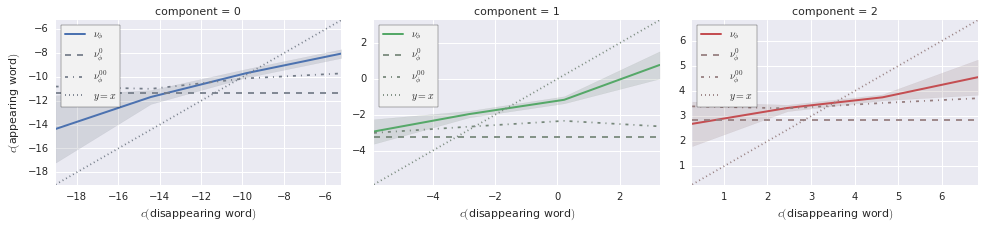

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.68164612  0.17921223]



aoa  frequency  letters_count
Component-0 -0.742885   0.385537      -0.547250
Component-1  0.310008  -0.526418      -0.791694

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 53419) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   18 of 53419) |                     | Elapsed Time: 0:00:02 ETA: 2:26:13

  0% (   51 of 53419) |                     | Elapsed Time: 0:00:03 ETA: 0:55:17

  0% (   83 of 53419) |                     | Elapsed Time: 0:00:03 ETA: 0:36:09

  0% (  112 of 53419) |                     | Elapsed Time: 0:00:03 ETA: 0:28:25

  0% (  142 of 53419) |                     | Elapsed Time: 0:00:03 ETA: 0:05:55

  0% (  172 of 53419) |                     | Elapsed Time: 0:00:04 ETA: 0:06:03

  0% (  202 of 53419) |                     | Elapsed Time: 0:00:04 ETA: 0:06:11

  0% (  232 of 53419) |                     | Elapsed Time: 0:00:04 ETA: 0:06:10

  0% (  261 of 53419) |                     | Elapsed Time: 0:00:04 ETA: 0:06:11

  0% (  291 of 53419) |                     | Elapsed Time: 0:00:04 ETA: 0:06:13

  0% (  321 of 53419) |                     | Elapsed Time: 0:00:05 ETA: 0:06:13

  0% (  351 of 53419) |                     | Elapsed Time: 0:00:05 ETA: 0:06:14

  0% (  381 of 53419) |                     | Elapsed Time: 0:00:05 ETA: 0:06:12

  0% (  409 of 53419) |                     | Elapsed Time: 0:00:05 ETA: 0:06:14

  0% (  439 of 53419) |                     | Elapsed Time: 0:00:05 ETA: 0:06:15

  0% (  470 of 53419) |                     | Elapsed Time: 0:00:06 ETA: 0:06:11

  0% (  502 of 53419) |                     | Elapsed Time: 0:00:06 ETA: 0:06:05

  1% (  535 of 53419) |                     | Elapsed Time: 0:00:06 ETA: 0:05:54

  1% (  569 of 53419) |                     | Elapsed Time: 0:00:06 ETA: 0:05:41

  1% (  600 of 53419) |                     | Elapsed Time: 0:00:06 ETA: 0:05:36

  1% (  633 of 53419) |                     | Elapsed Time: 0:00:07 ETA: 0:05:35

  1% (  668 of 53419) |                     | Elapsed Time: 0:00:07 ETA: 0:05:33

  1% (  700 of 53419) |                     | Elapsed Time: 0:00:07 ETA: 0:05:35

  1% (  733 of 53419) |                     | Elapsed Time: 0:00:07 ETA: 0:05:34

  1% (  766 of 53419) |                     | Elapsed Time: 0:00:07 ETA: 0:05:32

  1% (  800 of 53419) |                     | Elapsed Time: 0:00:08 ETA: 0:05:29

  1% (  833 of 53419) |                     | Elapsed Time: 0:00:08 ETA: 0:05:31

  1% (  866 of 53419) |                     | Elapsed Time: 0:00:08 ETA: 0:05:26

  1% (  899 of 53419) |                     | Elapsed Time: 0:00:08 ETA: 0:05:27

  1% (  933 of 53419) |                     | Elapsed Time: 0:00:09 ETA: 0:05:20

  1% (  967 of 53419) |                     | Elapsed Time: 0:00:09 ETA: 0:05:20

  1% ( 1000 of 53419) |                     | Elapsed Time: 0:00:09 ETA: 0:05:20

  1% ( 1034 of 53419) |                     | Elapsed Time: 0:00:09 ETA: 0:05:19

  2% ( 1069 of 53419) |                     | Elapsed Time: 0:00:09 ETA: 0:05:15

  2% ( 1104 of 53419) |                     | Elapsed Time: 0:00:10 ETA: 0:05:15

  2% ( 1137 of 53419) |                     | Elapsed Time: 0:00:10 ETA: 0:05:14

  2% ( 1168 of 53419) |                     | Elapsed Time: 0:00:10 ETA: 0:05:18

  2% ( 1205 of 53419) |                     | Elapsed Time: 0:00:10 ETA: 0:05:17

  2% ( 1241 of 53419) |                     | Elapsed Time: 0:00:10 ETA: 0:05:16

  2% ( 1293 of 53419) |                     | Elapsed Time: 0:00:11 ETA: 0:05:12

  2% ( 1336 of 53419) |                     | Elapsed Time: 0:00:11 ETA: 0:05:05

  2% ( 1369 of 53419) |                     | Elapsed Time: 0:00:11 ETA: 0:05:08

  2% ( 1401 of 53419) |                     | Elapsed Time: 0:00:11 ETA: 0:05:15

  2% ( 1433 of 53419) |                     | Elapsed Time: 0:00:12 ETA: 0:05:22

  2% ( 1465 of 53419) |                     | Elapsed Time: 0:00:12 ETA: 0:05:25

  2% ( 1498 of 53419) |                     | Elapsed Time: 0:00:12 ETA: 0:05:31

  2% ( 1533 of 53419) |                     | Elapsed Time: 0:00:12 ETA: 0:05:26

  2% ( 1565 of 53419) |                     | Elapsed Time: 0:00:12 ETA: 0:05:24

  2% ( 1598 of 53419) |                     | Elapsed Time: 0:00:13 ETA: 0:05:21

  3% ( 1632 of 53419) |                     | Elapsed Time: 0:00:13 ETA: 0:05:18

  3% ( 1666 of 53419) |                     | Elapsed Time: 0:00:13 ETA: 0:05:19

  3% ( 1698 of 53419) |                     | Elapsed Time: 0:00:13 ETA: 0:05:26

  3% ( 1718 of 53419) |                     | Elapsed Time: 0:00:13 ETA: 0:05:56

  3% ( 1738 of 53419) |                     | Elapsed Time: 0:00:14 ETA: 0:06:34

  3% ( 1758 of 53419) |                     | Elapsed Time: 0:00:14 ETA: 0:07:24

  3% ( 1778 of 53419) |                     | Elapsed Time: 0:00:14 ETA: 0:08:20

  3% ( 1798 of 53419) |                     | Elapsed Time: 0:00:14 ETA: 0:09:05

  3% ( 1819 of 53419) |                     | Elapsed Time: 0:00:14 ETA: 0:09:01

  3% ( 1839 of 53419) |                     | Elapsed Time: 0:00:15 ETA: 0:09:01

  3% ( 1859 of 53419) |                     | Elapsed Time: 0:00:15 ETA: 0:08:58

  3% ( 1879 of 53419) |                     | Elapsed Time: 0:00:15 ETA: 0:08:50

  3% ( 1898 of 53419) |                     | Elapsed Time: 0:00:15 ETA: 0:08:54

  3% ( 1919 of 53419) |                     | Elapsed Time: 0:00:15 ETA: 0:08:50

  3% ( 1940 of 53419) |                     | Elapsed Time: 0:00:16 ETA: 0:08:45

  3% ( 1961 of 53419) |                     | Elapsed Time: 0:00:16 ETA: 0:08:41

  3% ( 1986 of 53419) |                     | Elapsed Time: 0:00:16 ETA: 0:08:16

  3% ( 2014 of 53419) |                     | Elapsed Time: 0:00:16 ETA: 0:08:11

  3% ( 2035 of 53419) |                     | Elapsed Time: 0:00:17 ETA: 0:08:13

  3% ( 2056 of 53419) |                     | Elapsed Time: 0:00:17 ETA: 0:08:12

  3% ( 2076 of 53419) |                     | Elapsed Time: 0:00:17 ETA: 0:08:38

  3% ( 2096 of 53419) |                     | Elapsed Time: 0:00:17 ETA: 0:08:45

  3% ( 2117 of 53419) |                     | Elapsed Time: 0:00:17 ETA: 0:08:52

  4% ( 2137 of 53419) |                     | Elapsed Time: 0:00:18 ETA: 0:08:48

  4% ( 2157 of 53419) |                     | Elapsed Time: 0:00:18 ETA: 0:08:49

  4% ( 2177 of 53419) |                     | Elapsed Time: 0:00:18 ETA: 0:08:53

  4% ( 2197 of 53419) |                     | Elapsed Time: 0:00:18 ETA: 0:08:50

  4% ( 2218 of 53419) |                     | Elapsed Time: 0:00:19 ETA: 0:08:53

  4% ( 2239 of 53419) |                     | Elapsed Time: 0:00:19 ETA: 0:08:50

  4% ( 2259 of 53419) |                     | Elapsed Time: 0:00:19 ETA: 0:08:54

  4% ( 2279 of 53419) |                     | Elapsed Time: 0:00:19 ETA: 0:08:50

  4% ( 2300 of 53419) |                     | Elapsed Time: 0:00:19 ETA: 0:08:46

  4% ( 2320 of 53419) |                     | Elapsed Time: 0:00:20 ETA: 0:08:50

  4% ( 2342 of 53419) |                     | Elapsed Time: 0:00:20 ETA: 0:08:38

  4% ( 2366 of 53419) |                     | Elapsed Time: 0:00:20 ETA: 0:08:14

  4% ( 2386 of 53419) |                     | Elapsed Time: 0:00:20 ETA: 0:08:18

  4% ( 2406 of 53419) |                     | Elapsed Time: 0:00:20 ETA: 0:08:21

  4% ( 2438 of 53419) |                     | Elapsed Time: 0:00:21 ETA: 0:07:23

  4% ( 2472 of 53419) |                     | Elapsed Time: 0:00:21 ETA: 0:06:52

  4% ( 2507 of 53419) |                     | Elapsed Time: 0:00:21 ETA: 0:06:01

  4% ( 2542 of 53419) |                     | Elapsed Time: 0:00:21 ETA: 0:05:24

  4% ( 2577 of 53419) |#                    | Elapsed Time: 0:00:21 ETA: 0:05:03

  4% ( 2610 of 53419) |#                    | Elapsed Time: 0:00:22 ETA: 0:05:02

  4% ( 2642 of 53419) |#                    | Elapsed Time: 0:00:22 ETA: 0:05:09

  5% ( 2687 of 53419) |#                    | Elapsed Time: 0:00:22 ETA: 0:05:18

  5% ( 2718 of 53419) |#                    | Elapsed Time: 0:00:22 ETA: 0:05:26

  5% ( 2749 of 53419) |#                    | Elapsed Time: 0:00:23 ETA: 0:05:33

  5% ( 2780 of 53419) |#                    | Elapsed Time: 0:00:23 ETA: 0:05:37

  5% ( 2811 of 53419) |#                    | Elapsed Time: 0:00:23 ETA: 0:05:38

  5% ( 2843 of 53419) |#                    | Elapsed Time: 0:00:23 ETA: 0:05:38

  5% ( 2875 of 53419) |#                    | Elapsed Time: 0:00:23 ETA: 0:05:36

  5% ( 2905 of 53419) |#                    | Elapsed Time: 0:00:24 ETA: 0:05:35

  5% ( 2937 of 53419) |#                    | Elapsed Time: 0:00:24 ETA: 0:05:33

  5% ( 2971 of 53419) |#                    | Elapsed Time: 0:00:24 ETA: 0:05:25

  5% ( 3005 of 53419) |#                    | Elapsed Time: 0:00:24 ETA: 0:05:17

  5% ( 3040 of 53419) |#                    | Elapsed Time: 0:00:24 ETA: 0:05:10

  5% ( 3074 of 53419) |#                    | Elapsed Time: 0:00:25 ETA: 0:05:05

  5% ( 3108 of 53419) |#                    | Elapsed Time: 0:00:25 ETA: 0:05:05

  5% ( 3142 of 53419) |#                    | Elapsed Time: 0:00:25 ETA: 0:05:04

  5% ( 3176 of 53419) |#                    | Elapsed Time: 0:00:25 ETA: 0:05:07

  6% ( 3211 of 53419) |#                    | Elapsed Time: 0:00:25 ETA: 0:05:03

  6% ( 3245 of 53419) |#                    | Elapsed Time: 0:00:26 ETA: 0:05:02

  6% ( 3278 of 53419) |#                    | Elapsed Time: 0:00:26 ETA: 0:05:01

  6% ( 3313 of 53419) |#                    | Elapsed Time: 0:00:26 ETA: 0:04:59

  6% ( 3356 of 53419) |#                    | Elapsed Time: 0:00:26 ETA: 0:05:03

  6% ( 3389 of 53419) |#                    | Elapsed Time: 0:00:27 ETA: 0:05:07

  6% ( 3422 of 53419) |#                    | Elapsed Time: 0:00:27 ETA: 0:05:08

  6% ( 3455 of 53419) |#                    | Elapsed Time: 0:00:27 ETA: 0:05:10

  6% ( 3488 of 53419) |#                    | Elapsed Time: 0:00:27 ETA: 0:05:12

  6% ( 3522 of 53419) |#                    | Elapsed Time: 0:00:27 ETA: 0:05:11

  6% ( 3556 of 53419) |#                    | Elapsed Time: 0:00:28 ETA: 0:05:09

  6% ( 3590 of 53419) |#                    | Elapsed Time: 0:00:28 ETA: 0:05:07

  6% ( 3623 of 53419) |#                    | Elapsed Time: 0:00:28 ETA: 0:05:08

  6% ( 3655 of 53419) |#                    | Elapsed Time: 0:00:28 ETA: 0:05:09

  6% ( 3684 of 53419) |#                    | Elapsed Time: 0:00:28 ETA: 0:05:20

  6% ( 3711 of 53419) |#                    | Elapsed Time: 0:00:29 ETA: 0:05:37

  7% ( 3746 of 53419) |#                    | Elapsed Time: 0:00:29 ETA: 0:05:31

  7% ( 3783 of 53419) |#                    | Elapsed Time: 0:00:29 ETA: 0:05:23

  7% ( 3817 of 53419) |#                    | Elapsed Time: 0:00:29 ETA: 0:05:15

  7% ( 3851 of 53419) |#                    | Elapsed Time: 0:00:29 ETA: 0:05:07

  7% ( 3885 of 53419) |#                    | Elapsed Time: 0:00:30 ETA: 0:04:51

  7% ( 3908 of 53419) |#                    | Elapsed Time: 0:00:30 ETA: 0:05:25

  7% ( 3928 of 53419) |#                    | Elapsed Time: 0:00:30 ETA: 0:06:00

  7% ( 3948 of 53419) |#                    | Elapsed Time: 0:00:30 ETA: 0:06:43

  7% ( 3973 of 53419) |#                    | Elapsed Time: 0:00:30 ETA: 0:07:16

  7% ( 4024 of 53419) |#                    | Elapsed Time: 0:00:31 ETA: 0:06:37

  7% ( 4050 of 53419) |#                    | Elapsed Time: 0:00:31 ETA: 0:06:19

  7% ( 4081 of 53419) |#                    | Elapsed Time: 0:00:31 ETA: 0:05:47

  7% ( 4110 of 53419) |#                    | Elapsed Time: 0:00:31 ETA: 0:05:32

  7% ( 4145 of 53419) |#                    | Elapsed Time: 0:00:32 ETA: 0:05:28

  7% ( 4182 of 53419) |#                    | Elapsed Time: 0:00:32 ETA: 0:05:12

  7% ( 4217 of 53419) |#                    | Elapsed Time: 0:00:32 ETA: 0:05:03

  7% ( 4248 of 53419) |#                    | Elapsed Time: 0:00:32 ETA: 0:05:05

  7% ( 4272 of 53419) |#                    | Elapsed Time: 0:00:32 ETA: 0:05:14

  8% ( 4296 of 53419) |#                    | Elapsed Time: 0:00:33 ETA: 0:05:44

  8% ( 4320 of 53419) |#                    | Elapsed Time: 0:00:33 ETA: 0:06:17

  8% ( 4344 of 53419) |#                    | Elapsed Time: 0:00:33 ETA: 0:06:50

  8% ( 4369 of 53419) |#                    | Elapsed Time: 0:00:33 ETA: 0:06:52

  8% ( 4395 of 53419) |#                    | Elapsed Time: 0:00:33 ETA: 0:06:48

  8% ( 4421 of 53419) |#                    | Elapsed Time: 0:00:34 ETA: 0:06:44

  8% ( 4447 of 53419) |#                    | Elapsed Time: 0:00:34 ETA: 0:06:41

  8% ( 4473 of 53419) |#                    | Elapsed Time: 0:00:34 ETA: 0:06:38

  8% ( 4499 of 53419) |#                    | Elapsed Time: 0:00:34 ETA: 0:06:37

  8% ( 4525 of 53419) |#                    | Elapsed Time: 0:00:35 ETA: 0:06:36

  8% ( 4550 of 53419) |#                    | Elapsed Time: 0:00:35 ETA: 0:06:38

  8% ( 4576 of 53419) |#                    | Elapsed Time: 0:00:35 ETA: 0:06:36

  8% ( 4601 of 53419) |#                    | Elapsed Time: 0:00:35 ETA: 0:06:37

  8% ( 4627 of 53419) |#                    | Elapsed Time: 0:00:35 ETA: 0:06:38

  8% ( 4653 of 53419) |#                    | Elapsed Time: 0:00:36 ETA: 0:06:37

  8% ( 4692 of 53419) |#                    | Elapsed Time: 0:00:36 ETA: 0:06:17

  8% ( 4729 of 53419) |#                    | Elapsed Time: 0:00:36 ETA: 0:05:45

  8% ( 4762 of 53419) |#                    | Elapsed Time: 0:00:36 ETA: 0:05:25

  8% ( 4795 of 53419) |#                    | Elapsed Time: 0:00:36 ETA: 0:05:08

  9% ( 4829 of 53419) |#                    | Elapsed Time: 0:00:37 ETA: 0:04:51

  9% ( 4864 of 53419) |#                    | Elapsed Time: 0:00:37 ETA: 0:04:49

  9% ( 4898 of 53419) |#                    | Elapsed Time: 0:00:37 ETA: 0:04:53

  9% ( 4928 of 53419) |#                    | Elapsed Time: 0:00:37 ETA: 0:04:58

  9% ( 4956 of 53419) |#                    | Elapsed Time: 0:00:37 ETA: 0:05:08

  9% ( 4984 of 53419) |#                    | Elapsed Time: 0:00:38 ETA: 0:05:25

  9% ( 5013 of 53419) |#                    | Elapsed Time: 0:00:38 ETA: 0:05:39

  9% ( 5043 of 53419) |#                    | Elapsed Time: 0:00:38 ETA: 0:05:45

  9% ( 5072 of 53419) |#                    | Elapsed Time: 0:00:38 ETA: 0:05:45

  9% ( 5100 of 53419) |##                   | Elapsed Time: 0:00:39 ETA: 0:05:45

  9% ( 5128 of 53419) |##                   | Elapsed Time: 0:00:39 ETA: 0:05:44

  9% ( 5156 of 53419) |##                   | Elapsed Time: 0:00:39 ETA: 0:05:47

  9% ( 5184 of 53419) |##                   | Elapsed Time: 0:00:39 ETA: 0:05:50

  9% ( 5213 of 53419) |##                   | Elapsed Time: 0:00:39 ETA: 0:05:51

  9% ( 5243 of 53419) |##                   | Elapsed Time: 0:00:40 ETA: 0:05:47

  9% ( 5272 of 53419) |##                   | Elapsed Time: 0:00:40 ETA: 0:05:46

  9% ( 5300 of 53419) |##                   | Elapsed Time: 0:00:40 ETA: 0:05:45

  9% ( 5328 of 53419) |##                   | Elapsed Time: 0:00:40 ETA: 0:05:45

 10% ( 5356 of 53419) |##                   | Elapsed Time: 0:00:40 ETA: 0:05:47

 10% ( 5384 of 53419) |##                   | Elapsed Time: 0:00:41 ETA: 0:05:49

 10% ( 5413 of 53419) |##                   | Elapsed Time: 0:00:41 ETA: 0:05:51

 10% ( 5441 of 53419) |##                   | Elapsed Time: 0:00:41 ETA: 0:05:51

 10% ( 5470 of 53419) |##                   | Elapsed Time: 0:00:41 ETA: 0:05:50

 10% ( 5498 of 53419) |##                   | Elapsed Time: 0:00:41 ETA: 0:05:50

 10% ( 5526 of 53419) |##                   | Elapsed Time: 0:00:42 ETA: 0:05:49

 10% ( 5555 of 53419) |##                   | Elapsed Time: 0:00:42 ETA: 0:05:46

 10% ( 5583 of 53419) |##                   | Elapsed Time: 0:00:42 ETA: 0:05:46

 10% ( 5611 of 53419) |##                   | Elapsed Time: 0:00:42 ETA: 0:05:47

 10% ( 5640 of 53419) |##                   | Elapsed Time: 0:00:42 ETA: 0:05:46

 10% ( 5668 of 53419) |##                   | Elapsed Time: 0:00:43 ETA: 0:05:47

 10% ( 5696 of 53419) |##                   | Elapsed Time: 0:00:43 ETA: 0:05:47

 10% ( 5724 of 53419) |##                   | Elapsed Time: 0:00:43 ETA: 0:05:46

 10% ( 5752 of 53419) |##                   | Elapsed Time: 0:00:43 ETA: 0:05:47

 10% ( 5780 of 53419) |##                   | Elapsed Time: 0:00:43 ETA: 0:05:46

 10% ( 5808 of 53419) |##                   | Elapsed Time: 0:00:44 ETA: 0:05:46

 10% ( 5835 of 53419) |##                   | Elapsed Time: 0:00:44 ETA: 0:05:48

 10% ( 5863 of 53419) |##                   | Elapsed Time: 0:00:44 ETA: 0:05:48

 11% ( 5891 of 53419) |##                   | Elapsed Time: 0:00:44 ETA: 0:05:49

 11% ( 5919 of 53419) |##                   | Elapsed Time: 0:00:44 ETA: 0:05:49

 11% ( 5948 of 53419) |##                   | Elapsed Time: 0:00:45 ETA: 0:05:45

 11% ( 5978 of 53419) |##                   | Elapsed Time: 0:00:45 ETA: 0:05:40

 11% ( 6010 of 53419) |##                   | Elapsed Time: 0:00:45 ETA: 0:05:38

 11% ( 6038 of 53419) |##                   | Elapsed Time: 0:00:45 ETA: 0:05:41

 11% ( 6066 of 53419) |##                   | Elapsed Time: 0:00:46 ETA: 0:05:41

 11% ( 6095 of 53419) |##                   | Elapsed Time: 0:00:46 ETA: 0:05:44

 11% ( 6125 of 53419) |##                   | Elapsed Time: 0:00:46 ETA: 0:05:41

 11% ( 6154 of 53419) |##                   | Elapsed Time: 0:00:46 ETA: 0:05:40

 11% ( 6182 of 53419) |##                   | Elapsed Time: 0:00:46 ETA: 0:05:37

 11% ( 6210 of 53419) |##                   | Elapsed Time: 0:00:47 ETA: 0:05:37

 11% ( 6238 of 53419) |##                   | Elapsed Time: 0:00:47 ETA: 0:05:41

 11% ( 6266 of 53419) |##                   | Elapsed Time: 0:00:47 ETA: 0:05:44

 11% ( 6294 of 53419) |##                   | Elapsed Time: 0:00:47 ETA: 0:05:44

 11% ( 6322 of 53419) |##                   | Elapsed Time: 0:00:47 ETA: 0:05:45

 11% ( 6350 of 53419) |##                   | Elapsed Time: 0:00:48 ETA: 0:05:46

 11% ( 6378 of 53419) |##                   | Elapsed Time: 0:00:48 ETA: 0:05:44

 11% ( 6406 of 53419) |##                   | Elapsed Time: 0:00:48 ETA: 0:05:44

 12% ( 6435 of 53419) |##                   | Elapsed Time: 0:00:48 ETA: 0:05:42

 12% ( 6464 of 53419) |##                   | Elapsed Time: 0:00:48 ETA: 0:05:38

 12% ( 6494 of 53419) |##                   | Elapsed Time: 0:00:49 ETA: 0:05:36

 12% ( 6524 of 53419) |##                   | Elapsed Time: 0:00:49 ETA: 0:05:31

 12% ( 6554 of 53419) |##                   | Elapsed Time: 0:00:49 ETA: 0:05:29

 12% ( 6588 of 53419) |##                   | Elapsed Time: 0:00:49 ETA: 0:05:16

 12% ( 6624 of 53419) |##                   | Elapsed Time: 0:00:49 ETA: 0:05:02

 12% ( 6657 of 53419) |##                   | Elapsed Time: 0:00:50 ETA: 0:04:54

 12% ( 6696 of 53419) |##                   | Elapsed Time: 0:00:50 ETA: 0:04:47

 12% ( 6731 of 53419) |##                   | Elapsed Time: 0:00:50 ETA: 0:04:40

 12% ( 6776 of 53419) |##                   | Elapsed Time: 0:00:50 ETA: 0:04:55

 12% ( 6812 of 53419) |##                   | Elapsed Time: 0:00:51 ETA: 0:04:50

 12% ( 6846 of 53419) |##                   | Elapsed Time: 0:00:51 ETA: 0:04:48

 12% ( 6879 of 53419) |##                   | Elapsed Time: 0:00:51 ETA: 0:04:49

 12% ( 6910 of 53419) |##                   | Elapsed Time: 0:00:51 ETA: 0:04:45

 13% ( 6945 of 53419) |##                   | Elapsed Time: 0:00:51 ETA: 0:04:41

 13% ( 6981 of 53419) |##                   | Elapsed Time: 0:00:52 ETA: 0:04:39

 13% ( 7017 of 53419) |##                   | Elapsed Time: 0:00:52 ETA: 0:04:34

 13% ( 7053 of 53419) |##                   | Elapsed Time: 0:00:52 ETA: 0:04:28

 13% ( 7085 of 53419) |##                   | Elapsed Time: 0:00:52 ETA: 0:04:29

 13% ( 7117 of 53419) |##                   | Elapsed Time: 0:00:52 ETA: 0:04:36

 13% ( 7151 of 53419) |##                   | Elapsed Time: 0:00:53 ETA: 0:04:42

 13% ( 7183 of 53419) |##                   | Elapsed Time: 0:00:53 ETA: 0:04:49

 13% ( 7213 of 53419) |##                   | Elapsed Time: 0:00:53 ETA: 0:04:59

 13% ( 7245 of 53419) |##                   | Elapsed Time: 0:00:53 ETA: 0:04:59

 13% ( 7274 of 53419) |##                   | Elapsed Time: 0:00:54 ETA: 0:05:08

 13% ( 7305 of 53419) |##                   | Elapsed Time: 0:00:54 ETA: 0:05:12

 13% ( 7346 of 53419) |##                   | Elapsed Time: 0:00:54 ETA: 0:05:13

 13% ( 7379 of 53419) |##                   | Elapsed Time: 0:00:54 ETA: 0:05:02

 13% ( 7415 of 53419) |##                   | Elapsed Time: 0:00:54 ETA: 0:04:49

 13% ( 7451 of 53419) |##                   | Elapsed Time: 0:00:55 ETA: 0:04:40

 14% ( 7487 of 53419) |##                   | Elapsed Time: 0:00:55 ETA: 0:04:30

 14% ( 7523 of 53419) |##                   | Elapsed Time: 0:00:55 ETA: 0:04:24

 14% ( 7558 of 53419) |##                   | Elapsed Time: 0:00:55 ETA: 0:04:23

 14% ( 7594 of 53419) |##                   | Elapsed Time: 0:00:55 ETA: 0:04:22

 14% ( 7630 of 53419) |##                   | Elapsed Time: 0:00:56 ETA: 0:04:21

 14% ( 7666 of 53419) |###                  | Elapsed Time: 0:00:56 ETA: 0:04:23

 14% ( 7702 of 53419) |###                  | Elapsed Time: 0:00:56 ETA: 0:04:21

 14% ( 7737 of 53419) |###                  | Elapsed Time: 0:00:56 ETA: 0:04:24

 14% ( 7771 of 53419) |###                  | Elapsed Time: 0:00:56 ETA: 0:04:26

 14% ( 7805 of 53419) |###                  | Elapsed Time: 0:00:57 ETA: 0:04:29

 14% ( 7839 of 53419) |###                  | Elapsed Time: 0:00:57 ETA: 0:04:30

 14% ( 7873 of 53419) |###                  | Elapsed Time: 0:00:57 ETA: 0:04:32

 14% ( 7907 of 53419) |###                  | Elapsed Time: 0:00:57 ETA: 0:04:35

 14% ( 7941 of 53419) |###                  | Elapsed Time: 0:00:57 ETA: 0:04:34

 14% ( 7976 of 53419) |###                  | Elapsed Time: 0:00:58 ETA: 0:04:33

 15% ( 8013 of 53419) |###                  | Elapsed Time: 0:00:58 ETA: 0:04:32

 15% ( 8047 of 53419) |###                  | Elapsed Time: 0:00:58 ETA: 0:04:30

 15% ( 8082 of 53419) |###                  | Elapsed Time: 0:00:58 ETA: 0:04:28

 15% ( 8118 of 53419) |###                  | Elapsed Time: 0:00:59 ETA: 0:04:27

 15% ( 8153 of 53419) |###                  | Elapsed Time: 0:00:59 ETA: 0:04:27

 15% ( 8188 of 53419) |###                  | Elapsed Time: 0:00:59 ETA: 0:04:28

 15% ( 8223 of 53419) |###                  | Elapsed Time: 0:00:59 ETA: 0:04:26

 15% ( 8258 of 53419) |###                  | Elapsed Time: 0:00:59 ETA: 0:04:26

 15% ( 8293 of 53419) |###                  | Elapsed Time: 0:01:00 ETA: 0:04:26

 15% ( 8329 of 53419) |###                  | Elapsed Time: 0:01:00 ETA: 0:04:25

 15% ( 8365 of 53419) |###                  | Elapsed Time: 0:01:00 ETA: 0:04:24

 15% ( 8400 of 53419) |###                  | Elapsed Time: 0:01:00 ETA: 0:04:24

 15% ( 8435 of 53419) |###                  | Elapsed Time: 0:01:00 ETA: 0:04:25

 15% ( 8470 of 53419) |###                  | Elapsed Time: 0:01:01 ETA: 0:04:25

 15% ( 8505 of 53419) |###                  | Elapsed Time: 0:01:01 ETA: 0:04:25

 15% ( 8540 of 53419) |###                  | Elapsed Time: 0:01:01 ETA: 0:04:24

 16% ( 8574 of 53419) |###                  | Elapsed Time: 0:01:01 ETA: 0:04:26

 16% ( 8610 of 53419) |###                  | Elapsed Time: 0:01:01 ETA: 0:04:24

 16% ( 8639 of 53419) |###                  | Elapsed Time: 0:01:02 ETA: 0:04:33

 16% ( 8681 of 53419) |###                  | Elapsed Time: 0:01:02 ETA: 0:04:41

 16% ( 8713 of 53419) |###                  | Elapsed Time: 0:01:02 ETA: 0:04:45

 16% ( 8744 of 53419) |###                  | Elapsed Time: 0:01:02 ETA: 0:04:55

 16% ( 8770 of 53419) |###                  | Elapsed Time: 0:01:03 ETA: 0:05:05

 16% ( 8802 of 53419) |###                  | Elapsed Time: 0:01:03 ETA: 0:04:59

 16% ( 8836 of 53419) |###                  | Elapsed Time: 0:01:03 ETA: 0:04:58

 16% ( 8867 of 53419) |###                  | Elapsed Time: 0:01:03 ETA: 0:04:59

 16% ( 8900 of 53419) |###                  | Elapsed Time: 0:01:03 ETA: 0:04:51

 16% ( 8929 of 53419) |###                  | Elapsed Time: 0:01:04 ETA: 0:04:49

 16% ( 8959 of 53419) |###                  | Elapsed Time: 0:01:04 ETA: 0:04:56

 16% ( 8991 of 53419) |###                  | Elapsed Time: 0:01:04 ETA: 0:04:55

 16% ( 9020 of 53419) |###                  | Elapsed Time: 0:01:04 ETA: 0:05:02

 16% ( 9048 of 53419) |###                  | Elapsed Time: 0:01:04 ETA: 0:05:07

 16% ( 9078 of 53419) |###                  | Elapsed Time: 0:01:05 ETA: 0:05:05

 17% ( 9109 of 53419) |###                  | Elapsed Time: 0:01:05 ETA: 0:05:04

 17% ( 9141 of 53419) |###                  | Elapsed Time: 0:01:05 ETA: 0:04:58

 17% ( 9171 of 53419) |###                  | Elapsed Time: 0:01:05 ETA: 0:04:55

 17% ( 9201 of 53419) |###                  | Elapsed Time: 0:01:05 ETA: 0:04:58

 17% ( 9232 of 53419) |###                  | Elapsed Time: 0:01:06 ETA: 0:04:56

 17% ( 9265 of 53419) |###                  | Elapsed Time: 0:01:06 ETA: 0:04:51

 17% ( 9297 of 53419) |###                  | Elapsed Time: 0:01:06 ETA: 0:04:50

 17% ( 9328 of 53419) |###                  | Elapsed Time: 0:01:06 ETA: 0:04:46

 17% ( 9366 of 53419) |###                  | Elapsed Time: 0:01:06 ETA: 0:04:41

 17% ( 9395 of 53419) |###                  | Elapsed Time: 0:01:07 ETA: 0:04:47

 17% ( 9423 of 53419) |###                  | Elapsed Time: 0:01:07 ETA: 0:05:00

 17% ( 9455 of 53419) |###                  | Elapsed Time: 0:01:07 ETA: 0:04:59

 17% ( 9487 of 53419) |###                  | Elapsed Time: 0:01:07 ETA: 0:04:57

 17% ( 9518 of 53419) |###                  | Elapsed Time: 0:01:08 ETA: 0:04:58

 17% ( 9550 of 53419) |###                  | Elapsed Time: 0:01:08 ETA: 0:04:53

 17% ( 9583 of 53419) |###                  | Elapsed Time: 0:01:08 ETA: 0:04:45

 18% ( 9616 of 53419) |###                  | Elapsed Time: 0:01:08 ETA: 0:04:41

 18% ( 9650 of 53419) |###                  | Elapsed Time: 0:01:08 ETA: 0:04:38

 18% ( 9683 of 53419) |###                  | Elapsed Time: 0:01:09 ETA: 0:04:36

 18% ( 9717 of 53419) |###                  | Elapsed Time: 0:01:09 ETA: 0:04:32

 18% ( 9749 of 53419) |###                  | Elapsed Time: 0:01:09 ETA: 0:04:34

 18% ( 9780 of 53419) |###                  | Elapsed Time: 0:01:09 ETA: 0:04:37

 18% ( 9809 of 53419) |###                  | Elapsed Time: 0:01:09 ETA: 0:04:44

 18% ( 9843 of 53419) |###                  | Elapsed Time: 0:01:10 ETA: 0:04:45

 18% ( 9877 of 53419) |###                  | Elapsed Time: 0:01:10 ETA: 0:04:42

 18% ( 9909 of 53419) |###                  | Elapsed Time: 0:01:10 ETA: 0:04:38

 18% ( 9940 of 53419) |###                  | Elapsed Time: 0:01:10 ETA: 0:04:36

 18% ( 9972 of 53419) |###                  | Elapsed Time: 0:01:10 ETA: 0:04:37

 18% (10017 of 53419) |###                  | Elapsed Time: 0:01:11 ETA: 0:04:41

 18% (10049 of 53419) |###                  | Elapsed Time: 0:01:11 ETA: 0:04:42

 18% (10082 of 53419) |###                  | Elapsed Time: 0:01:11 ETA: 0:04:38

 18% (10114 of 53419) |###                  | Elapsed Time: 0:01:11 ETA: 0:04:39

 18% (10146 of 53419) |###                  | Elapsed Time: 0:01:12 ETA: 0:04:39

 19% (10177 of 53419) |####                 | Elapsed Time: 0:01:12 ETA: 0:04:41

 19% (10210 of 53419) |####                 | Elapsed Time: 0:01:12 ETA: 0:04:40

 19% (10241 of 53419) |####                 | Elapsed Time: 0:01:12 ETA: 0:04:42

 19% (10273 of 53419) |####                 | Elapsed Time: 0:01:12 ETA: 0:04:38

 19% (10306 of 53419) |####                 | Elapsed Time: 0:01:13 ETA: 0:04:34

 19% (10340 of 53419) |####                 | Elapsed Time: 0:01:13 ETA: 0:04:31

 19% (10373 of 53419) |####                 | Elapsed Time: 0:01:13 ETA: 0:04:26

 19% (10405 of 53419) |####                 | Elapsed Time: 0:01:13 ETA: 0:04:26

 19% (10437 of 53419) |####                 | Elapsed Time: 0:01:13 ETA: 0:04:27

 19% (10470 of 53419) |####                 | Elapsed Time: 0:01:14 ETA: 0:04:27

 19% (10503 of 53419) |####                 | Elapsed Time: 0:01:14 ETA: 0:04:30

 19% (10535 of 53419) |####                 | Elapsed Time: 0:01:14 ETA: 0:04:30

 19% (10566 of 53419) |####                 | Elapsed Time: 0:01:14 ETA: 0:04:35

 19% (10595 of 53419) |####                 | Elapsed Time: 0:01:14 ETA: 0:04:38

 19% (10628 of 53419) |####                 | Elapsed Time: 0:01:15 ETA: 0:04:41

 19% (10656 of 53419) |####                 | Elapsed Time: 0:01:15 ETA: 0:04:50

 20% (10684 of 53419) |####                 | Elapsed Time: 0:01:15 ETA: 0:05:00

 20% (10712 of 53419) |####                 | Elapsed Time: 0:01:15 ETA: 0:05:03

 20% (10742 of 53419) |####                 | Elapsed Time: 0:01:15 ETA: 0:05:04

 20% (10765 of 53419) |####                 | Elapsed Time: 0:01:16 ETA: 0:05:27

 20% (10796 of 53419) |####                 | Elapsed Time: 0:01:16 ETA: 0:05:11

 20% (10826 of 53419) |####                 | Elapsed Time: 0:01:16 ETA: 0:05:10

 20% (10857 of 53419) |####                 | Elapsed Time: 0:01:16 ETA: 0:05:06

 20% (10888 of 53419) |####                 | Elapsed Time: 0:01:16 ETA: 0:04:49

 20% (10920 of 53419) |####                 | Elapsed Time: 0:01:17 ETA: 0:04:42

 20% (10950 of 53419) |####                 | Elapsed Time: 0:01:17 ETA: 0:04:46

 20% (10980 of 53419) |####                 | Elapsed Time: 0:01:17 ETA: 0:04:45

 20% (11011 of 53419) |####                 | Elapsed Time: 0:01:17 ETA: 0:04:46

 20% (11035 of 53419) |####                 | Elapsed Time: 0:01:18 ETA: 0:05:05

 20% (11058 of 53419) |####                 | Elapsed Time: 0:01:18 ETA: 0:05:29

 20% (11077 of 53419) |####                 | Elapsed Time: 0:01:18 ETA: 0:05:57

 20% (11103 of 53419) |####                 | Elapsed Time: 0:01:18 ETA: 0:06:14

 20% (11128 of 53419) |####                 | Elapsed Time: 0:01:18 ETA: 0:06:15

 20% (11155 of 53419) |####                 | Elapsed Time: 0:01:19 ETA: 0:06:12

 20% (11175 of 53419) |####                 | Elapsed Time: 0:01:19 ETA: 0:06:10

 20% (11200 of 53419) |####                 | Elapsed Time: 0:01:19 ETA: 0:05:59

 21% (11230 of 53419) |####                 | Elapsed Time: 0:01:19 ETA: 0:05:45

 21% (11264 of 53419) |####                 | Elapsed Time: 0:01:19 ETA: 0:05:25

 21% (11298 of 53419) |####                 | Elapsed Time: 0:01:20 ETA: 0:04:57

 21% (11332 of 53419) |####                 | Elapsed Time: 0:01:20 ETA: 0:04:35

 21% (11369 of 53419) |####                 | Elapsed Time: 0:01:20 ETA: 0:04:16

 21% (11400 of 53419) |####                 | Elapsed Time: 0:01:20 ETA: 0:04:20

 21% (11432 of 53419) |####                 | Elapsed Time: 0:01:20 ETA: 0:04:22

 21% (11463 of 53419) |####                 | Elapsed Time: 0:01:21 ETA: 0:04:26

 21% (11496 of 53419) |####                 | Elapsed Time: 0:01:21 ETA: 0:04:27

 21% (11528 of 53419) |####                 | Elapsed Time: 0:01:21 ETA: 0:04:28

 21% (11562 of 53419) |####                 | Elapsed Time: 0:01:21 ETA: 0:04:26

 21% (11596 of 53419) |####                 | Elapsed Time: 0:01:22 ETA: 0:04:22

 21% (11630 of 53419) |####                 | Elapsed Time: 0:01:22 ETA: 0:04:18

 21% (11664 of 53419) |####                 | Elapsed Time: 0:01:22 ETA: 0:04:17

 21% (11696 of 53419) |####                 | Elapsed Time: 0:01:22 ETA: 0:04:18

 21% (11729 of 53419) |####                 | Elapsed Time: 0:01:22 ETA: 0:04:19

 22% (11762 of 53419) |####                 | Elapsed Time: 0:01:23 ETA: 0:04:19

 22% (11796 of 53419) |####                 | Elapsed Time: 0:01:23 ETA: 0:04:18

 22% (11830 of 53419) |####                 | Elapsed Time: 0:01:23 ETA: 0:04:16

 22% (11864 of 53419) |####                 | Elapsed Time: 0:01:23 ETA: 0:04:13

 22% (11897 of 53419) |####                 | Elapsed Time: 0:01:23 ETA: 0:04:14

 22% (11922 of 53419) |####                 | Elapsed Time: 0:01:24 ETA: 0:04:30

 22% (11951 of 53419) |####                 | Elapsed Time: 0:01:24 ETA: 0:04:41

 22% (11981 of 53419) |####                 | Elapsed Time: 0:01:24 ETA: 0:04:46

 22% (12020 of 53419) |####                 | Elapsed Time: 0:01:24 ETA: 0:04:40

 22% (12058 of 53419) |####                 | Elapsed Time: 0:01:24 ETA: 0:04:21

 22% (12092 of 53419) |####                 | Elapsed Time: 0:01:25 ETA: 0:04:06

 22% (12129 of 53419) |####                 | Elapsed Time: 0:01:25 ETA: 0:03:57

 22% (12161 of 53419) |####                 | Elapsed Time: 0:01:25 ETA: 0:03:58

 22% (12193 of 53419) |####                 | Elapsed Time: 0:01:25 ETA: 0:04:08

 22% (12227 of 53419) |####                 | Elapsed Time: 0:01:25 ETA: 0:04:11

 22% (12261 of 53419) |####                 | Elapsed Time: 0:01:26 ETA: 0:04:12

 23% (12294 of 53419) |####                 | Elapsed Time: 0:01:26 ETA: 0:04:15

 23% (12326 of 53419) |####                 | Elapsed Time: 0:01:26 ETA: 0:04:13

 23% (12358 of 53419) |####                 | Elapsed Time: 0:01:26 ETA: 0:04:17

 23% (12391 of 53419) |####                 | Elapsed Time: 0:01:26 ETA: 0:04:17

 23% (12423 of 53419) |####                 | Elapsed Time: 0:01:27 ETA: 0:04:18

 23% (12458 of 53419) |####                 | Elapsed Time: 0:01:27 ETA: 0:04:15

 23% (12496 of 53419) |####                 | Elapsed Time: 0:01:27 ETA: 0:04:03

 23% (12535 of 53419) |####                 | Elapsed Time: 0:01:27 ETA: 0:03:55

 23% (12573 of 53419) |####                 | Elapsed Time: 0:01:27 ETA: 0:03:47

 23% (12611 of 53419) |####                 | Elapsed Time: 0:01:28 ETA: 0:03:40

 23% (12649 of 53419) |####                 | Elapsed Time: 0:01:28 ETA: 0:03:38

 23% (12688 of 53419) |####                 | Elapsed Time: 0:01:28 ETA: 0:03:40

 23% (12724 of 53419) |#####                | Elapsed Time: 0:01:28 ETA: 0:03:43

 23% (12762 of 53419) |#####                | Elapsed Time: 0:01:29 ETA: 0:03:43

 23% (12800 of 53419) |#####                | Elapsed Time: 0:01:29 ETA: 0:03:43

 24% (12826 of 53419) |#####                | Elapsed Time: 0:01:29 ETA: 0:03:59

 24% (12852 of 53419) |#####                | Elapsed Time: 0:01:29 ETA: 0:04:16

 24% (12878 of 53419) |#####                | Elapsed Time: 0:01:29 ETA: 0:04:40

 24% (12904 of 53419) |#####                | Elapsed Time: 0:01:30 ETA: 0:05:08

 24% (12930 of 53419) |#####                | Elapsed Time: 0:01:30 ETA: 0:05:25

 24% (12956 of 53419) |#####                | Elapsed Time: 0:01:30 ETA: 0:05:24

 24% (12982 of 53419) |#####                | Elapsed Time: 0:01:30 ETA: 0:05:24

 24% (13008 of 53419) |#####                | Elapsed Time: 0:01:30 ETA: 0:05:24

 24% (13033 of 53419) |#####                | Elapsed Time: 0:01:31 ETA: 0:05:25

 24% (13058 of 53419) |#####                | Elapsed Time: 0:01:31 ETA: 0:05:29

 24% (13085 of 53419) |#####                | Elapsed Time: 0:01:31 ETA: 0:05:27

 24% (13111 of 53419) |#####                | Elapsed Time: 0:01:31 ETA: 0:05:25

 24% (13139 of 53419) |#####                | Elapsed Time: 0:01:31 ETA: 0:05:18

 24% (13175 of 53419) |#####                | Elapsed Time: 0:01:32 ETA: 0:04:52

 24% (13210 of 53419) |#####                | Elapsed Time: 0:01:32 ETA: 0:04:30

 24% (13245 of 53419) |#####                | Elapsed Time: 0:01:32 ETA: 0:04:13

 24% (13279 of 53419) |#####                | Elapsed Time: 0:01:32 ETA: 0:03:59

 24% (13315 of 53419) |#####                | Elapsed Time: 0:01:32 ETA: 0:03:53

 25% (13355 of 53419) |#####                | Elapsed Time: 0:01:33 ETA: 0:03:52

 25% (13390 of 53419) |#####                | Elapsed Time: 0:01:33 ETA: 0:03:54

 25% (13424 of 53419) |#####                | Elapsed Time: 0:01:33 ETA: 0:03:54

 25% (13459 of 53419) |#####                | Elapsed Time: 0:01:33 ETA: 0:03:55

 25% (13494 of 53419) |#####                | Elapsed Time: 0:01:34 ETA: 0:03:56

 25% (13529 of 53419) |#####                | Elapsed Time: 0:01:34 ETA: 0:03:54

 25% (13564 of 53419) |#####                | Elapsed Time: 0:01:34 ETA: 0:03:55

 25% (13600 of 53419) |#####                | Elapsed Time: 0:01:34 ETA: 0:03:53

 25% (13636 of 53419) |#####                | Elapsed Time: 0:01:34 ETA: 0:03:53

 25% (13672 of 53419) |#####                | Elapsed Time: 0:01:35 ETA: 0:03:51

 25% (13708 of 53419) |#####                | Elapsed Time: 0:01:35 ETA: 0:03:50

 25% (13742 of 53419) |#####                | Elapsed Time: 0:01:35 ETA: 0:03:50

 25% (13774 of 53419) |#####                | Elapsed Time: 0:01:35 ETA: 0:03:54

 25% (13808 of 53419) |#####                | Elapsed Time: 0:01:35 ETA: 0:03:55

 25% (13836 of 53419) |#####                | Elapsed Time: 0:01:36 ETA: 0:04:08

 25% (13865 of 53419) |#####                | Elapsed Time: 0:01:36 ETA: 0:04:20

 26% (13893 of 53419) |#####                | Elapsed Time: 0:01:36 ETA: 0:04:29

 26% (13921 of 53419) |#####                | Elapsed Time: 0:01:36 ETA: 0:04:39

 26% (13949 of 53419) |#####                | Elapsed Time: 0:01:36 ETA: 0:04:45

 26% (13980 of 53419) |#####                | Elapsed Time: 0:01:37 ETA: 0:04:39

 26% (14023 of 53419) |#####                | Elapsed Time: 0:01:37 ETA: 0:04:22

 26% (14061 of 53419) |#####                | Elapsed Time: 0:01:37 ETA: 0:04:04

 26% (14099 of 53419) |#####                | Elapsed Time: 0:01:37 ETA: 0:03:50

 26% (14137 of 53419) |#####                | Elapsed Time: 0:01:37 ETA: 0:03:38

 26% (14175 of 53419) |#####                | Elapsed Time: 0:01:38 ETA: 0:03:35

 26% (14213 of 53419) |#####                | Elapsed Time: 0:01:38 ETA: 0:03:34

 26% (14250 of 53419) |#####                | Elapsed Time: 0:01:38 ETA: 0:03:35

 26% (14281 of 53419) |#####                | Elapsed Time: 0:01:38 ETA: 0:03:45

 26% (14311 of 53419) |#####                | Elapsed Time: 0:01:39 ETA: 0:03:57

 26% (14343 of 53419) |#####                | Elapsed Time: 0:01:39 ETA: 0:04:08

 26% (14376 of 53419) |#####                | Elapsed Time: 0:01:39 ETA: 0:04:16

 26% (14408 of 53419) |#####                | Elapsed Time: 0:01:39 ETA: 0:04:17

 27% (14440 of 53419) |#####                | Elapsed Time: 0:01:39 ETA: 0:04:11

 27% (14473 of 53419) |#####                | Elapsed Time: 0:01:40 ETA: 0:04:04

 27% (14505 of 53419) |#####                | Elapsed Time: 0:01:40 ETA: 0:04:05

 27% (14554 of 53419) |#####                | Elapsed Time: 0:01:40 ETA: 0:04:05

 27% (14588 of 53419) |#####                | Elapsed Time: 0:01:40 ETA: 0:04:01

 27% (14620 of 53419) |#####                | Elapsed Time: 0:01:40 ETA: 0:04:04

 27% (14650 of 53419) |#####                | Elapsed Time: 0:01:41 ETA: 0:04:07

 27% (14691 of 53419) |#####                | Elapsed Time: 0:01:41 ETA: 0:04:14

 27% (14726 of 53419) |#####                | Elapsed Time: 0:01:41 ETA: 0:04:12

 27% (14760 of 53419) |#####                | Elapsed Time: 0:01:41 ETA: 0:04:12

 27% (14795 of 53419) |#####                | Elapsed Time: 0:01:42 ETA: 0:04:04

 27% (14829 of 53419) |#####                | Elapsed Time: 0:01:42 ETA: 0:03:55

 27% (14862 of 53419) |#####                | Elapsed Time: 0:01:42 ETA: 0:03:53

 27% (14895 of 53419) |#####                | Elapsed Time: 0:01:42 ETA: 0:03:54

 27% (14929 of 53419) |#####                | Elapsed Time: 0:01:42 ETA: 0:03:55

 28% (14962 of 53419) |#####                | Elapsed Time: 0:01:43 ETA: 0:03:55

 28% (14999 of 53419) |#####                | Elapsed Time: 0:01:43 ETA: 0:03:49

 28% (15037 of 53419) |#####                | Elapsed Time: 0:01:43 ETA: 0:03:40

 28% (15094 of 53419) |#####                | Elapsed Time: 0:01:43 ETA: 0:03:31

 28% (15132 of 53419) |#####                | Elapsed Time: 0:01:44 ETA: 0:03:24

 28% (15170 of 53419) |#####                | Elapsed Time: 0:01:44 ETA: 0:03:23

 28% (15208 of 53419) |#####                | Elapsed Time: 0:01:44 ETA: 0:03:24

 28% (15243 of 53419) |#####                | Elapsed Time: 0:01:44 ETA: 0:03:27

 28% (15280 of 53419) |######               | Elapsed Time: 0:01:44 ETA: 0:03:29

 28% (15315 of 53419) |######               | Elapsed Time: 0:01:45 ETA: 0:03:33

 28% (15358 of 53419) |######               | Elapsed Time: 0:01:45 ETA: 0:03:39

 28% (15396 of 53419) |######               | Elapsed Time: 0:01:45 ETA: 0:03:37

 28% (15434 of 53419) |######               | Elapsed Time: 0:01:45 ETA: 0:03:33

 28% (15473 of 53419) |######               | Elapsed Time: 0:01:45 ETA: 0:03:30

 29% (15512 of 53419) |######               | Elapsed Time: 0:01:46 ETA: 0:03:22

 29% (15552 of 53419) |######               | Elapsed Time: 0:01:46 ETA: 0:03:18

 29% (15591 of 53419) |######               | Elapsed Time: 0:01:46 ETA: 0:03:17

 29% (15629 of 53419) |######               | Elapsed Time: 0:01:46 ETA: 0:03:18

 29% (15666 of 53419) |######               | Elapsed Time: 0:01:46 ETA: 0:03:23

 29% (15700 of 53419) |######               | Elapsed Time: 0:01:47 ETA: 0:03:28

 29% (15734 of 53419) |######               | Elapsed Time: 0:01:47 ETA: 0:03:35

 29% (15767 of 53419) |######               | Elapsed Time: 0:01:47 ETA: 0:03:43

 29% (15800 of 53419) |######               | Elapsed Time: 0:01:47 ETA: 0:03:51

 29% (15833 of 53419) |######               | Elapsed Time: 0:01:47 ETA: 0:03:53

 29% (15867 of 53419) |######               | Elapsed Time: 0:01:48 ETA: 0:03:54

 29% (15904 of 53419) |######               | Elapsed Time: 0:01:48 ETA: 0:03:46

 29% (15944 of 53419) |######               | Elapsed Time: 0:01:48 ETA: 0:03:36

 29% (15981 of 53419) |######               | Elapsed Time: 0:01:48 ETA: 0:03:29

 30% (16026 of 53419) |######               | Elapsed Time: 0:01:49 ETA: 0:03:22

 30% (16060 of 53419) |######               | Elapsed Time: 0:01:49 ETA: 0:03:24

 30% (16095 of 53419) |######               | Elapsed Time: 0:01:49 ETA: 0:03:28

 30% (16133 of 53419) |######               | Elapsed Time: 0:01:49 ETA: 0:03:28

 30% (16170 of 53419) |######               | Elapsed Time: 0:01:49 ETA: 0:03:30

 30% (16206 of 53419) |######               | Elapsed Time: 0:01:50 ETA: 0:03:30

 30% (16242 of 53419) |######               | Elapsed Time: 0:01:50 ETA: 0:03:27

 30% (16278 of 53419) |######               | Elapsed Time: 0:01:50 ETA: 0:03:28

 30% (16313 of 53419) |######               | Elapsed Time: 0:01:50 ETA: 0:03:31

 30% (16349 of 53419) |######               | Elapsed Time: 0:01:50 ETA: 0:03:31

 30% (16384 of 53419) |######               | Elapsed Time: 0:01:51 ETA: 0:03:33

 30% (16417 of 53419) |######               | Elapsed Time: 0:01:51 ETA: 0:03:37

 30% (16452 of 53419) |######               | Elapsed Time: 0:01:51 ETA: 0:03:38

 30% (16489 of 53419) |######               | Elapsed Time: 0:01:51 ETA: 0:03:36

 30% (16526 of 53419) |######               | Elapsed Time: 0:01:51 ETA: 0:03:34

 31% (16560 of 53419) |######               | Elapsed Time: 0:01:52 ETA: 0:03:34

 31% (16590 of 53419) |######               | Elapsed Time: 0:01:52 ETA: 0:03:40

 31% (16620 of 53419) |######               | Elapsed Time: 0:01:52 ETA: 0:03:51

 31% (16650 of 53419) |######               | Elapsed Time: 0:01:52 ETA: 0:04:04

 31% (16694 of 53419) |######               | Elapsed Time: 0:01:53 ETA: 0:04:09

 31% (16733 of 53419) |######               | Elapsed Time: 0:01:53 ETA: 0:03:51

 31% (16771 of 53419) |######               | Elapsed Time: 0:01:53 ETA: 0:03:38

 31% (16809 of 53419) |######               | Elapsed Time: 0:01:53 ETA: 0:03:27

 31% (16850 of 53419) |######               | Elapsed Time: 0:01:53 ETA: 0:03:16

 31% (16891 of 53419) |######               | Elapsed Time: 0:01:54 ETA: 0:03:10

 31% (16932 of 53419) |######               | Elapsed Time: 0:01:54 ETA: 0:03:07

 31% (16972 of 53419) |######               | Elapsed Time: 0:01:54 ETA: 0:03:05

 31% (17012 of 53419) |######               | Elapsed Time: 0:01:54 ETA: 0:03:04

 31% (17052 of 53419) |######               | Elapsed Time: 0:01:54 ETA: 0:03:04

 31% (17092 of 53419) |######               | Elapsed Time: 0:01:55 ETA: 0:03:05

 32% (17131 of 53419) |######               | Elapsed Time: 0:01:55 ETA: 0:03:07

 32% (17170 of 53419) |######               | Elapsed Time: 0:01:55 ETA: 0:03:10

 32% (17208 of 53419) |######               | Elapsed Time: 0:01:55 ETA: 0:03:11

 32% (17245 of 53419) |######               | Elapsed Time: 0:01:55 ETA: 0:03:15

 32% (17279 of 53419) |######               | Elapsed Time: 0:01:56 ETA: 0:03:20

 32% (17309 of 53419) |######               | Elapsed Time: 0:01:56 ETA: 0:03:33

 32% (17338 of 53419) |######               | Elapsed Time: 0:01:56 ETA: 0:03:44

 32% (17375 of 53419) |######               | Elapsed Time: 0:01:56 ETA: 0:04:05

 32% (17401 of 53419) |######               | Elapsed Time: 0:01:57 ETA: 0:04:22

 32% (17427 of 53419) |######               | Elapsed Time: 0:01:57 ETA: 0:04:37

 32% (17454 of 53419) |######               | Elapsed Time: 0:01:57 ETA: 0:04:42

 32% (17480 of 53419) |######               | Elapsed Time: 0:01:57 ETA: 0:04:47

 32% (17512 of 53419) |######               | Elapsed Time: 0:01:57 ETA: 0:04:33

 32% (17546 of 53419) |######               | Elapsed Time: 0:01:58 ETA: 0:04:14

 32% (17579 of 53419) |######               | Elapsed Time: 0:01:58 ETA: 0:04:02

 32% (17614 of 53419) |######               | Elapsed Time: 0:01:58 ETA: 0:03:47

 33% (17642 of 53419) |######               | Elapsed Time: 0:01:58 ETA: 0:03:47

 33% (17676 of 53419) |######               | Elapsed Time: 0:01:58 ETA: 0:03:46

 33% (17712 of 53419) |######               | Elapsed Time: 0:01:59 ETA: 0:03:41

 33% (17747 of 53419) |######               | Elapsed Time: 0:01:59 ETA: 0:03:38

 33% (17777 of 53419) |######               | Elapsed Time: 0:01:59 ETA: 0:03:42

 33% (17806 of 53419) |######               | Elapsed Time: 0:01:59 ETA: 0:03:40

 33% (17836 of 53419) |#######              | Elapsed Time: 0:01:59 ETA: 0:03:50

 33% (17866 of 53419) |#######              | Elapsed Time: 0:02:00 ETA: 0:04:00

 33% (17898 of 53419) |#######              | Elapsed Time: 0:02:00 ETA: 0:04:02

 33% (17923 of 53419) |#######              | Elapsed Time: 0:02:00 ETA: 0:04:11

 33% (17957 of 53419) |#######              | Elapsed Time: 0:02:00 ETA: 0:04:02

 33% (17990 of 53419) |#######              | Elapsed Time: 0:02:00 ETA: 0:03:56

 33% (18029 of 53419) |#######              | Elapsed Time: 0:02:01 ETA: 0:03:44

 33% (18064 of 53419) |#######              | Elapsed Time: 0:02:01 ETA: 0:03:34

 33% (18103 of 53419) |#######              | Elapsed Time: 0:02:01 ETA: 0:03:17

 33% (18132 of 53419) |#######              | Elapsed Time: 0:02:01 ETA: 0:03:25

 34% (18172 of 53419) |#######              | Elapsed Time: 0:02:01 ETA: 0:03:19

 34% (18213 of 53419) |#######              | Elapsed Time: 0:02:02 ETA: 0:03:12

 34% (18249 of 53419) |#######              | Elapsed Time: 0:02:02 ETA: 0:03:16

 34% (18285 of 53419) |#######              | Elapsed Time: 0:02:02 ETA: 0:03:10

 34% (18322 of 53419) |#######              | Elapsed Time: 0:02:02 ETA: 0:03:10

 34% (18355 of 53419) |#######              | Elapsed Time: 0:02:03 ETA: 0:03:19

 34% (18389 of 53419) |#######              | Elapsed Time: 0:02:03 ETA: 0:03:26

 34% (18420 of 53419) |#######              | Elapsed Time: 0:02:03 ETA: 0:03:33

 34% (18450 of 53419) |#######              | Elapsed Time: 0:02:03 ETA: 0:03:44

 34% (18479 of 53419) |#######              | Elapsed Time: 0:02:03 ETA: 0:03:54

 34% (18509 of 53419) |#######              | Elapsed Time: 0:02:04 ETA: 0:03:59

 34% (18546 of 53419) |#######              | Elapsed Time: 0:02:04 ETA: 0:03:51

 34% (18582 of 53419) |#######              | Elapsed Time: 0:02:04 ETA: 0:03:37

 34% (18617 of 53419) |#######              | Elapsed Time: 0:02:04 ETA: 0:03:31

 34% (18653 of 53419) |#######              | Elapsed Time: 0:02:04 ETA: 0:03:19

 35% (18697 of 53419) |#######              | Elapsed Time: 0:02:05 ETA: 0:03:18

 35% (18733 of 53419) |#######              | Elapsed Time: 0:02:05 ETA: 0:03:18

 35% (18769 of 53419) |#######              | Elapsed Time: 0:02:05 ETA: 0:03:18

 35% (18805 of 53419) |#######              | Elapsed Time: 0:02:05 ETA: 0:03:18

 35% (18831 of 53419) |#######              | Elapsed Time: 0:02:05 ETA: 0:03:31

 35% (18861 of 53419) |#######              | Elapsed Time: 0:02:06 ETA: 0:03:42

 35% (18889 of 53419) |#######              | Elapsed Time: 0:02:06 ETA: 0:03:55

 35% (18918 of 53419) |#######              | Elapsed Time: 0:02:06 ETA: 0:04:07

 35% (18953 of 53419) |#######              | Elapsed Time: 0:02:06 ETA: 0:03:57

 35% (18985 of 53419) |#######              | Elapsed Time: 0:02:06 ETA: 0:03:49

 35% (19023 of 53419) |#######              | Elapsed Time: 0:02:07 ETA: 0:03:34

 35% (19048 of 53419) |#######              | Elapsed Time: 0:02:07 ETA: 0:03:39

 35% (19069 of 53419) |#######              | Elapsed Time: 0:02:07 ETA: 0:03:56

 35% (19088 of 53419) |#######              | Elapsed Time: 0:02:07 ETA: 0:04:27

 35% (19110 of 53419) |#######              | Elapsed Time: 0:02:08 ETA: 0:05:04

 35% (19135 of 53419) |#######              | Elapsed Time: 0:02:08 ETA: 0:05:32

 35% (19173 of 53419) |#######              | Elapsed Time: 0:02:08 ETA: 0:04:41

 35% (19208 of 53419) |#######              | Elapsed Time: 0:02:08 ETA: 0:04:06

 36% (19243 of 53419) |#######              | Elapsed Time: 0:02:08 ETA: 0:03:39

 36% (19279 of 53419) |#######              | Elapsed Time: 0:02:09 ETA: 0:03:18

 36% (19315 of 53419) |#######              | Elapsed Time: 0:02:09 ETA: 0:03:14

 36% (19345 of 53419) |#######              | Elapsed Time: 0:02:09 ETA: 0:03:26

 36% (19380 of 53419) |#######              | Elapsed Time: 0:02:09 ETA: 0:03:27

 36% (19411 of 53419) |#######              | Elapsed Time: 0:02:09 ETA: 0:03:36

 36% (19441 of 53419) |#######              | Elapsed Time: 0:02:10 ETA: 0:03:45

 36% (19474 of 53419) |#######              | Elapsed Time: 0:02:10 ETA: 0:03:47

 36% (19506 of 53419) |#######              | Elapsed Time: 0:02:10 ETA: 0:03:47

 36% (19537 of 53419) |#######              | Elapsed Time: 0:02:10 ETA: 0:03:46

 36% (19565 of 53419) |#######              | Elapsed Time: 0:02:10 ETA: 0:03:48

 36% (19600 of 53419) |#######              | Elapsed Time: 0:02:11 ETA: 0:03:40

 36% (19636 of 53419) |#######              | Elapsed Time: 0:02:11 ETA: 0:03:35

 36% (19671 of 53419) |#######              | Elapsed Time: 0:02:11 ETA: 0:03:28

 36% (19705 of 53419) |#######              | Elapsed Time: 0:02:11 ETA: 0:03:21

 36% (19735 of 53419) |#######              | Elapsed Time: 0:02:11 ETA: 0:03:24

 37% (19770 of 53419) |#######              | Elapsed Time: 0:02:12 ETA: 0:03:24

 37% (19805 of 53419) |#######              | Elapsed Time: 0:02:12 ETA: 0:03:26

 37% (19841 of 53419) |#######              | Elapsed Time: 0:02:12 ETA: 0:03:22

 37% (19877 of 53419) |#######              | Elapsed Time: 0:02:12 ETA: 0:03:14

 37% (19915 of 53419) |#######              | Elapsed Time: 0:02:12 ETA: 0:03:10

 37% (19951 of 53419) |#######              | Elapsed Time: 0:02:13 ETA: 0:03:09

 37% (19988 of 53419) |#######              | Elapsed Time: 0:02:13 ETA: 0:03:08

 37% (20033 of 53419) |#######              | Elapsed Time: 0:02:13 ETA: 0:03:08

 37% (20067 of 53419) |#######              | Elapsed Time: 0:02:13 ETA: 0:03:11

 37% (20101 of 53419) |#######              | Elapsed Time: 0:02:14 ETA: 0:03:14

 37% (20137 of 53419) |#######              | Elapsed Time: 0:02:14 ETA: 0:03:16

 37% (20173 of 53419) |#######              | Elapsed Time: 0:02:14 ETA: 0:03:12

 37% (20203 of 53419) |#######              | Elapsed Time: 0:02:14 ETA: 0:03:19

 37% (20231 of 53419) |#######              | Elapsed Time: 0:02:14 ETA: 0:03:26

 37% (20259 of 53419) |#######              | Elapsed Time: 0:02:15 ETA: 0:03:37

 38% (20301 of 53419) |#######              | Elapsed Time: 0:02:15 ETA: 0:03:56

 38% (20329 of 53419) |#######              | Elapsed Time: 0:02:15 ETA: 0:03:59

 38% (20360 of 53419) |########             | Elapsed Time: 0:02:15 ETA: 0:03:53

 38% (20396 of 53419) |########             | Elapsed Time: 0:02:16 ETA: 0:03:41

 38% (20431 of 53419) |########             | Elapsed Time: 0:02:16 ETA: 0:03:30

 38% (20462 of 53419) |########             | Elapsed Time: 0:02:16 ETA: 0:03:26

 38% (20496 of 53419) |########             | Elapsed Time: 0:02:16 ETA: 0:03:18

 38% (20530 of 53419) |########             | Elapsed Time: 0:02:16 ETA: 0:03:20

 38% (20564 of 53419) |########             | Elapsed Time: 0:02:17 ETA: 0:03:22

 38% (20593 of 53419) |########             | Elapsed Time: 0:02:17 ETA: 0:03:25

 38% (20628 of 53419) |########             | Elapsed Time: 0:02:17 ETA: 0:03:23

 38% (20665 of 53419) |########             | Elapsed Time: 0:02:17 ETA: 0:03:19

 38% (20720 of 53419) |########             | Elapsed Time: 0:02:17 ETA: 0:03:09

 38% (20759 of 53419) |########             | Elapsed Time: 0:02:18 ETA: 0:03:01

 38% (20795 of 53419) |########             | Elapsed Time: 0:02:18 ETA: 0:03:00

 38% (20822 of 53419) |########             | Elapsed Time: 0:02:18 ETA: 0:03:07

 39% (20847 of 53419) |########             | Elapsed Time: 0:02:18 ETA: 0:03:24

 39% (20873 of 53419) |########             | Elapsed Time: 0:02:18 ETA: 0:03:49

 39% (20899 of 53419) |########             | Elapsed Time: 0:02:19 ETA: 0:04:11

 39% (20924 of 53419) |########             | Elapsed Time: 0:02:19 ETA: 0:04:23

 39% (20954 of 53419) |########             | Elapsed Time: 0:02:19 ETA: 0:04:14

 39% (20991 of 53419) |########             | Elapsed Time: 0:02:19 ETA: 0:03:50

 39% (21027 of 53419) |########             | Elapsed Time: 0:02:20 ETA: 0:03:34

 39% (21058 of 53419) |########             | Elapsed Time: 0:02:20 ETA: 0:03:26

 39% (21088 of 53419) |########             | Elapsed Time: 0:02:20 ETA: 0:03:19

 39% (21118 of 53419) |########             | Elapsed Time: 0:02:20 ETA: 0:03:26

 39% (21146 of 53419) |########             | Elapsed Time: 0:02:20 ETA: 0:03:40

 39% (21177 of 53419) |########             | Elapsed Time: 0:02:21 ETA: 0:03:44

 39% (21211 of 53419) |########             | Elapsed Time: 0:02:21 ETA: 0:03:38

 39% (21247 of 53419) |########             | Elapsed Time: 0:02:21 ETA: 0:03:29

 39% (21282 of 53419) |########             | Elapsed Time: 0:02:21 ETA: 0:03:20

 39% (21318 of 53419) |########             | Elapsed Time: 0:02:21 ETA: 0:03:09

 40% (21368 of 53419) |########             | Elapsed Time: 0:02:22 ETA: 0:03:04

 40% (21405 of 53419) |########             | Elapsed Time: 0:02:22 ETA: 0:03:00

 40% (21440 of 53419) |########             | Elapsed Time: 0:02:22 ETA: 0:03:02

 40% (21473 of 53419) |########             | Elapsed Time: 0:02:22 ETA: 0:03:03

 40% (21506 of 53419) |########             | Elapsed Time: 0:02:22 ETA: 0:03:07

 40% (21540 of 53419) |########             | Elapsed Time: 0:02:23 ETA: 0:03:13

 40% (21574 of 53419) |########             | Elapsed Time: 0:02:23 ETA: 0:03:15

 40% (21614 of 53419) |########             | Elapsed Time: 0:02:23 ETA: 0:03:08

 40% (21647 of 53419) |########             | Elapsed Time: 0:02:23 ETA: 0:03:08

 40% (21677 of 53419) |########             | Elapsed Time: 0:02:24 ETA: 0:03:12

 40% (21710 of 53419) |########             | Elapsed Time: 0:02:24 ETA: 0:03:14

 40% (21734 of 53419) |########             | Elapsed Time: 0:02:24 ETA: 0:03:30

 40% (21763 of 53419) |########             | Elapsed Time: 0:02:24 ETA: 0:03:48

 40% (21799 of 53419) |########             | Elapsed Time: 0:02:24 ETA: 0:03:36

 40% (21837 of 53419) |########             | Elapsed Time: 0:02:25 ETA: 0:03:29

 40% (21872 of 53419) |########             | Elapsed Time: 0:02:25 ETA: 0:03:15

 41% (21906 of 53419) |########             | Elapsed Time: 0:02:25 ETA: 0:03:02

 41% (21939 of 53419) |########             | Elapsed Time: 0:02:25 ETA: 0:03:03

 41% (21973 of 53419) |########             | Elapsed Time: 0:02:25 ETA: 0:03:08

 41% (22007 of 53419) |########             | Elapsed Time: 0:02:26 ETA: 0:03:11

 41% (22053 of 53419) |########             | Elapsed Time: 0:02:26 ETA: 0:03:14

 41% (22088 of 53419) |########             | Elapsed Time: 0:02:26 ETA: 0:03:13

 41% (22121 of 53419) |########             | Elapsed Time: 0:02:26 ETA: 0:03:13

 41% (22155 of 53419) |########             | Elapsed Time: 0:02:27 ETA: 0:03:13

 41% (22187 of 53419) |########             | Elapsed Time: 0:02:27 ETA: 0:03:14

 41% (22219 of 53419) |########             | Elapsed Time: 0:02:27 ETA: 0:03:16

 41% (22250 of 53419) |########             | Elapsed Time: 0:02:27 ETA: 0:03:19

 41% (22281 of 53419) |########             | Elapsed Time: 0:02:27 ETA: 0:03:21

 41% (22316 of 53419) |########             | Elapsed Time: 0:02:28 ETA: 0:03:19

 41% (22365 of 53419) |########             | Elapsed Time: 0:02:28 ETA: 0:03:15

 41% (22399 of 53419) |########             | Elapsed Time: 0:02:28 ETA: 0:03:12

 41% (22431 of 53419) |########             | Elapsed Time: 0:02:28 ETA: 0:03:10

 42% (22465 of 53419) |########             | Elapsed Time: 0:02:28 ETA: 0:03:11

 42% (22499 of 53419) |########             | Elapsed Time: 0:02:29 ETA: 0:03:11

 42% (22532 of 53419) |########             | Elapsed Time: 0:02:29 ETA: 0:03:11

 42% (22568 of 53419) |########             | Elapsed Time: 0:02:29 ETA: 0:03:08

 42% (22606 of 53419) |########             | Elapsed Time: 0:02:29 ETA: 0:03:02

 42% (22641 of 53419) |########             | Elapsed Time: 0:02:30 ETA: 0:03:01

 42% (22669 of 53419) |########             | Elapsed Time: 0:02:30 ETA: 0:03:08

 42% (22704 of 53419) |########             | Elapsed Time: 0:02:30 ETA: 0:03:16

 42% (22732 of 53419) |########             | Elapsed Time: 0:02:30 ETA: 0:03:30

 42% (22760 of 53419) |########             | Elapsed Time: 0:02:30 ETA: 0:03:46

 42% (22790 of 53419) |########             | Elapsed Time: 0:02:31 ETA: 0:03:44

 42% (22828 of 53419) |########             | Elapsed Time: 0:02:31 ETA: 0:03:26

 42% (22866 of 53419) |########             | Elapsed Time: 0:02:31 ETA: 0:03:11

 42% (22901 of 53419) |#########            | Elapsed Time: 0:02:31 ETA: 0:03:02

 42% (22941 of 53419) |#########            | Elapsed Time: 0:02:31 ETA: 0:02:49

 43% (22979 of 53419) |#########            | Elapsed Time: 0:02:32 ETA: 0:02:46

 43% (23003 of 53419) |#########            | Elapsed Time: 0:02:32 ETA: 0:03:01

 43% (23037 of 53419) |#########            | Elapsed Time: 0:02:32 ETA: 0:03:03

 43% (23070 of 53419) |#########            | Elapsed Time: 0:02:32 ETA: 0:03:09

 43% (23106 of 53419) |#########            | Elapsed Time: 0:02:32 ETA: 0:03:15

 43% (23142 of 53419) |#########            | Elapsed Time: 0:02:33 ETA: 0:03:06

 43% (23178 of 53419) |#########            | Elapsed Time: 0:02:33 ETA: 0:02:58

 43% (23213 of 53419) |#########            | Elapsed Time: 0:02:33 ETA: 0:02:56

 43% (23246 of 53419) |#########            | Elapsed Time: 0:02:33 ETA: 0:02:55

 43% (23281 of 53419) |#########            | Elapsed Time: 0:02:33 ETA: 0:02:58

 43% (23316 of 53419) |#########            | Elapsed Time: 0:02:34 ETA: 0:02:59

 43% (23350 of 53419) |#########            | Elapsed Time: 0:02:34 ETA: 0:03:03

 43% (23389 of 53419) |#########            | Elapsed Time: 0:02:34 ETA: 0:02:57

 43% (23420 of 53419) |#########            | Elapsed Time: 0:02:34 ETA: 0:03:02

 43% (23477 of 53419) |#########            | Elapsed Time: 0:02:35 ETA: 0:02:55

 44% (23513 of 53419) |#########            | Elapsed Time: 0:02:35 ETA: 0:02:51

 44% (23550 of 53419) |#########            | Elapsed Time: 0:02:35 ETA: 0:02:51

 44% (23584 of 53419) |#########            | Elapsed Time: 0:02:35 ETA: 0:02:46

 44% (23619 of 53419) |#########            | Elapsed Time: 0:02:35 ETA: 0:02:49

 44% (23655 of 53419) |#########            | Elapsed Time: 0:02:36 ETA: 0:02:50

 44% (23691 of 53419) |#########            | Elapsed Time: 0:02:36 ETA: 0:02:50

 44% (23720 of 53419) |#########            | Elapsed Time: 0:02:36 ETA: 0:02:57

 44% (23755 of 53419) |#########            | Elapsed Time: 0:02:36 ETA: 0:02:57

 44% (23788 of 53419) |#########            | Elapsed Time: 0:02:36 ETA: 0:03:02

 44% (23820 of 53419) |#########            | Elapsed Time: 0:02:37 ETA: 0:03:07

 44% (23854 of 53419) |#########            | Elapsed Time: 0:02:37 ETA: 0:03:09

 44% (23890 of 53419) |#########            | Elapsed Time: 0:02:37 ETA: 0:03:00

 44% (23925 of 53419) |#########            | Elapsed Time: 0:02:37 ETA: 0:02:59

 44% (23959 of 53419) |#########            | Elapsed Time: 0:02:38 ETA: 0:02:57

 44% (23992 of 53419) |#########            | Elapsed Time: 0:02:38 ETA: 0:02:57

 45% (24039 of 53419) |#########            | Elapsed Time: 0:02:38 ETA: 0:02:58

 45% (24068 of 53419) |#########            | Elapsed Time: 0:02:38 ETA: 0:03:06

 45% (24089 of 53419) |#########            | Elapsed Time: 0:02:38 ETA: 0:03:23

 45% (24117 of 53419) |#########            | Elapsed Time: 0:02:39 ETA: 0:03:30

 45% (24151 of 53419) |#########            | Elapsed Time: 0:02:39 ETA: 0:03:29

 45% (24187 of 53419) |#########            | Elapsed Time: 0:02:39 ETA: 0:03:27

 45% (24220 of 53419) |#########            | Elapsed Time: 0:02:39 ETA: 0:03:11

 45% (24237 of 53419) |#########            | Elapsed Time: 0:02:39 ETA: 0:03:03

 45% (24258 of 53419) |#########            | Elapsed Time: 0:02:46 ETA: 0:26:31

 45% (24289 of 53419) |#########            | Elapsed Time: 0:02:47 ETA: 0:27:03

 45% (24323 of 53419) |#########            | Elapsed Time: 0:02:47 ETA: 0:27:23

 45% (24356 of 53419) |#########            | Elapsed Time: 0:02:47 ETA: 0:27:23

 45% (24389 of 53419) |#########            | Elapsed Time: 0:02:47 ETA: 0:03:05

 45% (24422 of 53419) |#########            | Elapsed Time: 0:02:47 ETA: 0:02:59

 45% (24454 of 53419) |#########            | Elapsed Time: 0:02:48 ETA: 0:03:04

 45% (24486 of 53419) |#########            | Elapsed Time: 0:02:48 ETA: 0:03:03

 45% (24521 of 53419) |#########            | Elapsed Time: 0:02:48 ETA: 0:03:00

 45% (24557 of 53419) |#########            | Elapsed Time: 0:02:48 ETA: 0:02:55

 46% (24596 of 53419) |#########            | Elapsed Time: 0:02:48 ETA: 0:02:47

 46% (24632 of 53419) |#########            | Elapsed Time: 0:02:49 ETA: 0:02:44

 46% (24669 of 53419) |#########            | Elapsed Time: 0:02:49 ETA: 0:02:40

 46% (24707 of 53419) |#########            | Elapsed Time: 0:02:49 ETA: 0:02:41

 46% (24741 of 53419) |#########            | Elapsed Time: 0:02:49 ETA: 0:02:45

 46% (24775 of 53419) |#########            | Elapsed Time: 0:02:49 ETA: 0:02:48

 46% (24810 of 53419) |#########            | Elapsed Time: 0:02:50 ETA: 0:02:52

 46% (24841 of 53419) |#########            | Elapsed Time: 0:02:50 ETA: 0:02:58

 46% (24871 of 53419) |#########            | Elapsed Time: 0:02:50 ETA: 0:03:03

 46% (24899 of 53419) |#########            | Elapsed Time: 0:02:50 ETA: 0:03:10

 46% (24929 of 53419) |#########            | Elapsed Time: 0:02:51 ETA: 0:03:14

 46% (24965 of 53419) |#########            | Elapsed Time: 0:02:51 ETA: 0:03:10

 46% (24999 of 53419) |#########            | Elapsed Time: 0:02:51 ETA: 0:03:04

 46% (25035 of 53419) |#########            | Elapsed Time: 0:02:51 ETA: 0:02:53

 46% (25069 of 53419) |#########            | Elapsed Time: 0:02:51 ETA: 0:02:47

 46% (25103 of 53419) |#########            | Elapsed Time: 0:02:52 ETA: 0:02:48

 47% (25137 of 53419) |#########            | Elapsed Time: 0:02:52 ETA: 0:02:48

 47% (25169 of 53419) |#########            | Elapsed Time: 0:02:52 ETA: 0:02:53

 47% (25201 of 53419) |#########            | Elapsed Time: 0:02:52 ETA: 0:02:57

 47% (25233 of 53419) |#########            | Elapsed Time: 0:02:52 ETA: 0:02:58

 47% (25266 of 53419) |#########            | Elapsed Time: 0:02:53 ETA: 0:02:59

 47% (25298 of 53419) |#########            | Elapsed Time: 0:02:53 ETA: 0:03:00

 47% (25328 of 53419) |#########            | Elapsed Time: 0:02:53 ETA: 0:03:02

 47% (25375 of 53419) |#########            | Elapsed Time: 0:02:53 ETA: 0:03:02

 47% (25408 of 53419) |#########            | Elapsed Time: 0:02:53 ETA: 0:03:01

 47% (25441 of 53419) |##########           | Elapsed Time: 0:02:54 ETA: 0:02:59

 47% (25477 of 53419) |##########           | Elapsed Time: 0:02:54 ETA: 0:02:54

 47% (25513 of 53419) |##########           | Elapsed Time: 0:02:54 ETA: 0:02:47

 47% (25548 of 53419) |##########           | Elapsed Time: 0:02:54 ETA: 0:02:44

 47% (25586 of 53419) |##########           | Elapsed Time: 0:02:55 ETA: 0:02:37

 47% (25624 of 53419) |##########           | Elapsed Time: 0:02:55 ETA: 0:02:34

 48% (25656 of 53419) |##########           | Elapsed Time: 0:02:55 ETA: 0:02:38

 48% (25689 of 53419) |##########           | Elapsed Time: 0:02:55 ETA: 0:02:39

 48% (25724 of 53419) |##########           | Elapsed Time: 0:02:55 ETA: 0:02:43

 48% (25760 of 53419) |##########           | Elapsed Time: 0:02:56 ETA: 0:02:45

 48% (25799 of 53419) |##########           | Elapsed Time: 0:02:56 ETA: 0:02:42

 48% (25837 of 53419) |##########           | Elapsed Time: 0:02:56 ETA: 0:02:34

 48% (25871 of 53419) |##########           | Elapsed Time: 0:02:56 ETA: 0:02:33

 48% (25904 of 53419) |##########           | Elapsed Time: 0:02:56 ETA: 0:02:35

 48% (25942 of 53419) |##########           | Elapsed Time: 0:02:57 ETA: 0:02:35

 48% (25980 of 53419) |##########           | Elapsed Time: 0:02:57 ETA: 0:02:35

 48% (26018 of 53419) |##########           | Elapsed Time: 0:02:57 ETA: 0:02:34

 48% (26060 of 53419) |##########           | Elapsed Time: 0:02:57 ETA: 0:02:29

 48% (26093 of 53419) |##########           | Elapsed Time: 0:02:57 ETA: 0:02:32

 48% (26125 of 53419) |##########           | Elapsed Time: 0:02:58 ETA: 0:02:38

 48% (26158 of 53419) |##########           | Elapsed Time: 0:02:58 ETA: 0:02:42

 49% (26188 of 53419) |##########           | Elapsed Time: 0:02:58 ETA: 0:02:52

 49% (26216 of 53419) |##########           | Elapsed Time: 0:02:58 ETA: 0:03:00

 49% (26242 of 53419) |##########           | Elapsed Time: 0:02:58 ETA: 0:03:09

 49% (26266 of 53419) |##########           | Elapsed Time: 0:02:59 ETA: 0:03:20

 49% (26291 of 53419) |##########           | Elapsed Time: 0:02:59 ETA: 0:03:34

 49% (26335 of 53419) |##########           | Elapsed Time: 0:02:59 ETA: 0:03:30

 49% (26367 of 53419) |##########           | Elapsed Time: 0:02:59 ETA: 0:03:20

 49% (26402 of 53419) |##########           | Elapsed Time: 0:03:00 ETA: 0:03:04

 49% (26439 of 53419) |##########           | Elapsed Time: 0:03:00 ETA: 0:02:48

 49% (26473 of 53419) |##########           | Elapsed Time: 0:03:00 ETA: 0:02:41

 49% (26507 of 53419) |##########           | Elapsed Time: 0:03:00 ETA: 0:02:37

 49% (26542 of 53419) |##########           | Elapsed Time: 0:03:00 ETA: 0:02:37

 49% (26578 of 53419) |##########           | Elapsed Time: 0:03:01 ETA: 0:02:38

 49% (26615 of 53419) |##########           | Elapsed Time: 0:03:01 ETA: 0:02:37

 49% (26649 of 53419) |##########           | Elapsed Time: 0:03:01 ETA: 0:02:37

 49% (26685 of 53419) |##########           | Elapsed Time: 0:03:01 ETA: 0:02:34

 50% (26729 of 53419) |##########           | Elapsed Time: 0:03:01 ETA: 0:02:32

 50% (26766 of 53419) |##########           | Elapsed Time: 0:03:02 ETA: 0:02:31

 50% (26802 of 53419) |##########           | Elapsed Time: 0:03:02 ETA: 0:02:29

 50% (26839 of 53419) |##########           | Elapsed Time: 0:03:02 ETA: 0:02:28

 50% (26876 of 53419) |##########           | Elapsed Time: 0:03:02 ETA: 0:02:28

 50% (26913 of 53419) |##########           | Elapsed Time: 0:03:02 ETA: 0:02:27

 50% (26949 of 53419) |##########           | Elapsed Time: 0:03:03 ETA: 0:02:27

 50% (27003 of 53419) |##########           | Elapsed Time: 0:03:03 ETA: 0:02:28

 50% (27037 of 53419) |##########           | Elapsed Time: 0:03:03 ETA: 0:02:31

 50% (27074 of 53419) |##########           | Elapsed Time: 0:03:03 ETA: 0:02:30

 50% (27110 of 53419) |##########           | Elapsed Time: 0:03:04 ETA: 0:02:30

 50% (27147 of 53419) |##########           | Elapsed Time: 0:03:04 ETA: 0:02:30

 50% (27182 of 53419) |##########           | Elapsed Time: 0:03:04 ETA: 0:02:29

 50% (27215 of 53419) |##########           | Elapsed Time: 0:03:04 ETA: 0:02:31

 51% (27247 of 53419) |##########           | Elapsed Time: 0:03:04 ETA: 0:02:36

 51% (27279 of 53419) |##########           | Elapsed Time: 0:03:05 ETA: 0:02:42

 51% (27311 of 53419) |##########           | Elapsed Time: 0:03:05 ETA: 0:02:47

 51% (27343 of 53419) |##########           | Elapsed Time: 0:03:05 ETA: 0:02:49

 51% (27378 of 53419) |##########           | Elapsed Time: 0:03:05 ETA: 0:02:49

 51% (27410 of 53419) |##########           | Elapsed Time: 0:03:05 ETA: 0:02:49

 51% (27441 of 53419) |##########           | Elapsed Time: 0:03:06 ETA: 0:02:50

 51% (27473 of 53419) |##########           | Elapsed Time: 0:03:06 ETA: 0:02:50

 51% (27505 of 53419) |##########           | Elapsed Time: 0:03:06 ETA: 0:02:50

 51% (27536 of 53419) |##########           | Elapsed Time: 0:03:06 ETA: 0:02:50

 51% (27568 of 53419) |##########           | Elapsed Time: 0:03:07 ETA: 0:02:49

 51% (27601 of 53419) |##########           | Elapsed Time: 0:03:07 ETA: 0:02:46

 51% (27635 of 53419) |##########           | Elapsed Time: 0:03:07 ETA: 0:02:43

 51% (27668 of 53419) |##########           | Elapsed Time: 0:03:07 ETA: 0:02:41

 51% (27701 of 53419) |##########           | Elapsed Time: 0:03:07 ETA: 0:02:40

 51% (27735 of 53419) |##########           | Elapsed Time: 0:03:08 ETA: 0:02:38

 51% (27768 of 53419) |##########           | Elapsed Time: 0:03:08 ETA: 0:02:38

 52% (27801 of 53419) |##########           | Elapsed Time: 0:03:08 ETA: 0:02:38

 52% (27833 of 53419) |##########           | Elapsed Time: 0:03:08 ETA: 0:02:38

 52% (27863 of 53419) |##########           | Elapsed Time: 0:03:08 ETA: 0:02:42

 52% (27895 of 53419) |##########           | Elapsed Time: 0:03:09 ETA: 0:02:45

 52% (27928 of 53419) |##########           | Elapsed Time: 0:03:09 ETA: 0:02:45

 52% (27979 of 53419) |##########           | Elapsed Time: 0:03:09 ETA: 0:02:40

 52% (28011 of 53419) |###########          | Elapsed Time: 0:03:09 ETA: 0:02:37

 52% (28064 of 53419) |###########          | Elapsed Time: 0:03:10 ETA: 0:02:32

 52% (28101 of 53419) |###########          | Elapsed Time: 0:03:10 ETA: 0:02:28

 52% (28139 of 53419) |###########          | Elapsed Time: 0:03:10 ETA: 0:02:25

 52% (28176 of 53419) |###########          | Elapsed Time: 0:03:10 ETA: 0:02:22

 52% (28214 of 53419) |###########          | Elapsed Time: 0:03:10 ETA: 0:02:18

 52% (28253 of 53419) |###########          | Elapsed Time: 0:03:11 ETA: 0:02:16

 52% (28291 of 53419) |###########          | Elapsed Time: 0:03:11 ETA: 0:02:15

 53% (28329 of 53419) |###########          | Elapsed Time: 0:03:11 ETA: 0:02:15

 53% (28364 of 53419) |###########          | Elapsed Time: 0:03:11 ETA: 0:02:17

 53% (28397 of 53419) |###########          | Elapsed Time: 0:03:11 ETA: 0:02:21

 53% (28428 of 53419) |###########          | Elapsed Time: 0:03:12 ETA: 0:02:28

 53% (28460 of 53419) |###########          | Elapsed Time: 0:03:12 ETA: 0:02:35

 53% (28492 of 53419) |###########          | Elapsed Time: 0:03:12 ETA: 0:02:40

 53% (28523 of 53419) |###########          | Elapsed Time: 0:03:12 ETA: 0:02:43

 53% (28555 of 53419) |###########          | Elapsed Time: 0:03:13 ETA: 0:02:43

 53% (28587 of 53419) |###########          | Elapsed Time: 0:03:13 ETA: 0:02:43

 53% (28619 of 53419) |###########          | Elapsed Time: 0:03:13 ETA: 0:02:42

 53% (28650 of 53419) |###########          | Elapsed Time: 0:03:13 ETA: 0:02:42

 53% (28680 of 53419) |###########          | Elapsed Time: 0:03:13 ETA: 0:02:43

 53% (28713 of 53419) |###########          | Elapsed Time: 0:03:14 ETA: 0:02:43

 53% (28746 of 53419) |###########          | Elapsed Time: 0:03:14 ETA: 0:02:42

 53% (28782 of 53419) |###########          | Elapsed Time: 0:03:14 ETA: 0:02:37

 53% (28820 of 53419) |###########          | Elapsed Time: 0:03:14 ETA: 0:02:28

 54% (28855 of 53419) |###########          | Elapsed Time: 0:03:14 ETA: 0:02:25

 54% (28886 of 53419) |###########          | Elapsed Time: 0:03:15 ETA: 0:02:25

 54% (28919 of 53419) |###########          | Elapsed Time: 0:03:15 ETA: 0:02:26

 54% (28953 of 53419) |###########          | Elapsed Time: 0:03:15 ETA: 0:02:27

 54% (29005 of 53419) |###########          | Elapsed Time: 0:03:15 ETA: 0:02:29

 54% (29041 of 53419) |###########          | Elapsed Time: 0:03:16 ETA: 0:02:24

 54% (29073 of 53419) |###########          | Elapsed Time: 0:03:16 ETA: 0:02:25

 54% (29106 of 53419) |###########          | Elapsed Time: 0:03:16 ETA: 0:02:27

 54% (29141 of 53419) |###########          | Elapsed Time: 0:03:16 ETA: 0:02:26

 54% (29176 of 53419) |###########          | Elapsed Time: 0:03:16 ETA: 0:02:26

 54% (29212 of 53419) |###########          | Elapsed Time: 0:03:17 ETA: 0:02:23

 54% (29246 of 53419) |###########          | Elapsed Time: 0:03:17 ETA: 0:02:23

 54% (29278 of 53419) |###########          | Elapsed Time: 0:03:17 ETA: 0:02:25

 54% (29313 of 53419) |###########          | Elapsed Time: 0:03:17 ETA: 0:02:26

 54% (29347 of 53419) |###########          | Elapsed Time: 0:03:17 ETA: 0:02:27

 55% (29381 of 53419) |###########          | Elapsed Time: 0:03:18 ETA: 0:02:32

 55% (29415 of 53419) |###########          | Elapsed Time: 0:03:18 ETA: 0:02:32

 55% (29449 of 53419) |###########          | Elapsed Time: 0:03:18 ETA: 0:02:28

 55% (29484 of 53419) |###########          | Elapsed Time: 0:03:18 ETA: 0:02:30

 55% (29517 of 53419) |###########          | Elapsed Time: 0:03:18 ETA: 0:02:27

 55% (29551 of 53419) |###########          | Elapsed Time: 0:03:19 ETA: 0:02:24

 55% (29583 of 53419) |###########          | Elapsed Time: 0:03:19 ETA: 0:02:26

 55% (29615 of 53419) |###########          | Elapsed Time: 0:03:19 ETA: 0:02:28

 55% (29645 of 53419) |###########          | Elapsed Time: 0:03:19 ETA: 0:02:33

 55% (29675 of 53419) |###########          | Elapsed Time: 0:03:19 ETA: 0:02:35

 55% (29706 of 53419) |###########          | Elapsed Time: 0:03:20 ETA: 0:02:37

 55% (29739 of 53419) |###########          | Elapsed Time: 0:03:20 ETA: 0:02:36

 55% (29776 of 53419) |###########          | Elapsed Time: 0:03:20 ETA: 0:02:29

 55% (29803 of 53419) |###########          | Elapsed Time: 0:03:20 ETA: 0:02:34

 55% (29836 of 53419) |###########          | Elapsed Time: 0:03:20 ETA: 0:02:31

 55% (29871 of 53419) |###########          | Elapsed Time: 0:03:21 ETA: 0:02:27

 55% (29907 of 53419) |###########          | Elapsed Time: 0:03:21 ETA: 0:02:26

 56% (29943 of 53419) |###########          | Elapsed Time: 0:03:21 ETA: 0:02:22

 56% (29979 of 53419) |###########          | Elapsed Time: 0:03:21 ETA: 0:02:15

 56% (30014 of 53419) |###########          | Elapsed Time: 0:03:22 ETA: 0:02:15

 56% (30068 of 53419) |###########          | Elapsed Time: 0:03:22 ETA: 0:02:12

 56% (30104 of 53419) |###########          | Elapsed Time: 0:03:22 ETA: 0:02:12

 56% (30137 of 53419) |###########          | Elapsed Time: 0:03:22 ETA: 0:02:14

 56% (30169 of 53419) |###########          | Elapsed Time: 0:03:22 ETA: 0:02:17

 56% (30202 of 53419) |###########          | Elapsed Time: 0:03:23 ETA: 0:02:19

 56% (30235 of 53419) |###########          | Elapsed Time: 0:03:23 ETA: 0:02:25

 56% (30268 of 53419) |###########          | Elapsed Time: 0:03:23 ETA: 0:02:25

 56% (30305 of 53419) |###########          | Elapsed Time: 0:03:23 ETA: 0:02:20

 56% (30337 of 53419) |###########          | Elapsed Time: 0:03:23 ETA: 0:02:21

 56% (30367 of 53419) |###########          | Elapsed Time: 0:03:24 ETA: 0:02:23

 56% (30399 of 53419) |###########          | Elapsed Time: 0:03:24 ETA: 0:02:25

 56% (30432 of 53419) |###########          | Elapsed Time: 0:03:24 ETA: 0:02:28

 57% (30462 of 53419) |###########          | Elapsed Time: 0:03:24 ETA: 0:02:31

 57% (30494 of 53419) |###########          | Elapsed Time: 0:03:25 ETA: 0:02:31

 57% (30526 of 53419) |############         | Elapsed Time: 0:03:25 ETA: 0:02:30

 57% (30558 of 53419) |############         | Elapsed Time: 0:03:25 ETA: 0:02:29

 57% (30590 of 53419) |############         | Elapsed Time: 0:03:25 ETA: 0:02:28

 57% (30624 of 53419) |############         | Elapsed Time: 0:03:25 ETA: 0:02:26

 57% (30661 of 53419) |############         | Elapsed Time: 0:03:26 ETA: 0:02:21

 57% (30692 of 53419) |############         | Elapsed Time: 0:03:26 ETA: 0:02:22

 57% (30716 of 53419) |############         | Elapsed Time: 0:03:26 ETA: 0:02:29

 57% (30741 of 53419) |############         | Elapsed Time: 0:03:26 ETA: 0:02:37

 57% (30775 of 53419) |############         | Elapsed Time: 0:03:26 ETA: 0:02:38

 57% (30811 of 53419) |############         | Elapsed Time: 0:03:27 ETA: 0:02:38

 57% (30848 of 53419) |############         | Elapsed Time: 0:03:27 ETA: 0:02:25

 57% (30885 of 53419) |############         | Elapsed Time: 0:03:27 ETA: 0:02:11

 57% (30921 of 53419) |############         | Elapsed Time: 0:03:27 ETA: 0:02:05

 57% (30955 of 53419) |############         | Elapsed Time: 0:03:27 ETA: 0:02:07

 58% (30987 of 53419) |############         | Elapsed Time: 0:03:28 ETA: 0:02:11

 58% (31022 of 53419) |############         | Elapsed Time: 0:03:28 ETA: 0:02:14

 58% (31052 of 53419) |############         | Elapsed Time: 0:03:28 ETA: 0:02:18

 58% (31086 of 53419) |############         | Elapsed Time: 0:03:28 ETA: 0:02:20

 58% (31121 of 53419) |############         | Elapsed Time: 0:03:28 ETA: 0:02:17

 58% (31159 of 53419) |############         | Elapsed Time: 0:03:29 ETA: 0:02:14

 58% (31189 of 53419) |############         | Elapsed Time: 0:03:29 ETA: 0:02:17

 58% (31220 of 53419) |############         | Elapsed Time: 0:03:29 ETA: 0:02:17

 58% (31252 of 53419) |############         | Elapsed Time: 0:03:29 ETA: 0:02:16

 58% (31285 of 53419) |############         | Elapsed Time: 0:03:29 ETA: 0:02:20

 58% (31318 of 53419) |############         | Elapsed Time: 0:03:30 ETA: 0:02:21

 58% (31351 of 53419) |############         | Elapsed Time: 0:03:30 ETA: 0:02:18

 58% (31384 of 53419) |############         | Elapsed Time: 0:03:30 ETA: 0:02:20

 58% (31421 of 53419) |############         | Elapsed Time: 0:03:30 ETA: 0:02:17

 58% (31454 of 53419) |############         | Elapsed Time: 0:03:31 ETA: 0:02:17

 58% (31486 of 53419) |############         | Elapsed Time: 0:03:31 ETA: 0:02:18

 59% (31520 of 53419) |############         | Elapsed Time: 0:03:31 ETA: 0:02:14

 59% (31555 of 53419) |############         | Elapsed Time: 0:03:31 ETA: 0:02:13

 59% (31590 of 53419) |############         | Elapsed Time: 0:03:31 ETA: 0:02:12

 59% (31625 of 53419) |############         | Elapsed Time: 0:03:32 ETA: 0:02:10

 59% (31658 of 53419) |############         | Elapsed Time: 0:03:32 ETA: 0:02:09

 59% (31692 of 53419) |############         | Elapsed Time: 0:03:32 ETA: 0:02:09

 59% (31727 of 53419) |############         | Elapsed Time: 0:03:32 ETA: 0:02:09

 59% (31760 of 53419) |############         | Elapsed Time: 0:03:32 ETA: 0:02:11

 59% (31794 of 53419) |############         | Elapsed Time: 0:03:33 ETA: 0:02:12

 59% (31843 of 53419) |############         | Elapsed Time: 0:03:33 ETA: 0:02:11

 59% (31878 of 53419) |############         | Elapsed Time: 0:03:33 ETA: 0:02:11

 59% (31914 of 53419) |############         | Elapsed Time: 0:03:33 ETA: 0:02:08

 59% (31950 of 53419) |############         | Elapsed Time: 0:03:33 ETA: 0:02:06

 59% (31984 of 53419) |############         | Elapsed Time: 0:03:34 ETA: 0:02:05

 59% (32018 of 53419) |############         | Elapsed Time: 0:03:34 ETA: 0:02:04

 60% (32052 of 53419) |############         | Elapsed Time: 0:03:34 ETA: 0:02:10

 60% (32086 of 53419) |############         | Elapsed Time: 0:03:34 ETA: 0:02:12

 60% (32117 of 53419) |############         | Elapsed Time: 0:03:35 ETA: 0:02:14

 60% (32151 of 53419) |############         | Elapsed Time: 0:03:35 ETA: 0:02:15

 60% (32185 of 53419) |############         | Elapsed Time: 0:03:35 ETA: 0:02:16

 60% (32222 of 53419) |############         | Elapsed Time: 0:03:35 ETA: 0:02:08

 60% (32255 of 53419) |############         | Elapsed Time: 0:03:35 ETA: 0:02:06

 60% (32292 of 53419) |############         | Elapsed Time: 0:03:36 ETA: 0:02:04

 60% (32328 of 53419) |############         | Elapsed Time: 0:03:36 ETA: 0:02:02

 60% (32364 of 53419) |############         | Elapsed Time: 0:03:36 ETA: 0:02:02

 60% (32397 of 53419) |############         | Elapsed Time: 0:03:36 ETA: 0:02:01

 60% (32432 of 53419) |############         | Elapsed Time: 0:03:36 ETA: 0:02:03

 60% (32468 of 53419) |############         | Elapsed Time: 0:03:37 ETA: 0:02:03

 60% (32504 of 53419) |############         | Elapsed Time: 0:03:37 ETA: 0:02:03

 60% (32542 of 53419) |############         | Elapsed Time: 0:03:37 ETA: 0:01:59

 60% (32577 of 53419) |############         | Elapsed Time: 0:03:37 ETA: 0:01:59

 61% (32609 of 53419) |############         | Elapsed Time: 0:03:37 ETA: 0:02:01

 61% (32641 of 53419) |############         | Elapsed Time: 0:03:38 ETA: 0:02:04

 61% (32673 of 53419) |############         | Elapsed Time: 0:03:38 ETA: 0:02:09

 61% (32705 of 53419) |############         | Elapsed Time: 0:03:38 ETA: 0:02:15

 61% (32736 of 53419) |############         | Elapsed Time: 0:03:38 ETA: 0:02:15

 61% (32769 of 53419) |############         | Elapsed Time: 0:03:38 ETA: 0:02:14

 61% (32792 of 53419) |############         | Elapsed Time: 0:03:39 ETA: 0:02:21

 61% (32815 of 53419) |############         | Elapsed Time: 0:03:39 ETA: 0:02:29

 61% (32839 of 53419) |############         | Elapsed Time: 0:03:39 ETA: 0:02:38

 61% (32863 of 53419) |############         | Elapsed Time: 0:03:39 ETA: 0:02:51

 61% (32887 of 53419) |############         | Elapsed Time: 0:03:40 ETA: 0:02:58

 61% (32911 of 53419) |############         | Elapsed Time: 0:03:40 ETA: 0:02:55

 61% (32935 of 53419) |############         | Elapsed Time: 0:03:40 ETA: 0:02:55

 61% (32959 of 53419) |############         | Elapsed Time: 0:03:40 ETA: 0:02:55

 61% (32983 of 53419) |############         | Elapsed Time: 0:03:40 ETA: 0:02:55

 61% (33007 of 53419) |############         | Elapsed Time: 0:03:41 ETA: 0:02:55

 61% (33031 of 53419) |############         | Elapsed Time: 0:03:41 ETA: 0:02:55

 61% (33055 of 53419) |############         | Elapsed Time: 0:03:41 ETA: 0:02:54

 61% (33082 of 53419) |#############        | Elapsed Time: 0:03:41 ETA: 0:02:49

 61% (33114 of 53419) |#############        | Elapsed Time: 0:03:41 ETA: 0:02:38

 62% (33146 of 53419) |#############        | Elapsed Time: 0:03:42 ETA: 0:02:28

 62% (33173 of 53419) |#############        | Elapsed Time: 0:03:42 ETA: 0:02:25

 62% (33204 of 53419) |#############        | Elapsed Time: 0:03:42 ETA: 0:02:18

 62% (33233 of 53419) |#############        | Elapsed Time: 0:03:42 ETA: 0:02:20

 62% (33261 of 53419) |#############        | Elapsed Time: 0:03:42 ETA: 0:02:24

 62% (33290 of 53419) |#############        | Elapsed Time: 0:03:43 ETA: 0:02:24

 62% (33322 of 53419) |#############        | Elapsed Time: 0:03:43 ETA: 0:02:20

 62% (33354 of 53419) |#############        | Elapsed Time: 0:03:43 ETA: 0:02:17

 62% (33387 of 53419) |#############        | Elapsed Time: 0:03:43 ETA: 0:02:13

 62% (33418 of 53419) |#############        | Elapsed Time: 0:03:43 ETA: 0:02:10

 62% (33454 of 53419) |#############        | Elapsed Time: 0:03:44 ETA: 0:02:06

 62% (33484 of 53419) |#############        | Elapsed Time: 0:03:44 ETA: 0:02:07

 62% (33514 of 53419) |#############        | Elapsed Time: 0:03:44 ETA: 0:02:08

 62% (33543 of 53419) |#############        | Elapsed Time: 0:03:44 ETA: 0:02:09

 62% (33570 of 53419) |#############        | Elapsed Time: 0:03:44 ETA: 0:02:19

 62% (33598 of 53419) |#############        | Elapsed Time: 0:03:45 ETA: 0:02:23

 62% (33625 of 53419) |#############        | Elapsed Time: 0:03:45 ETA: 0:02:26

 63% (33659 of 53419) |#############        | Elapsed Time: 0:03:45 ETA: 0:02:22

 63% (33697 of 53419) |#############        | Elapsed Time: 0:03:45 ETA: 0:02:10

 63% (33734 of 53419) |#############        | Elapsed Time: 0:03:46 ETA: 0:02:02

 63% (33763 of 53419) |#############        | Elapsed Time: 0:03:46 ETA: 0:02:01

 63% (33798 of 53419) |#############        | Elapsed Time: 0:03:46 ETA: 0:01:55

 63% (33838 of 53419) |#############        | Elapsed Time: 0:03:46 ETA: 0:01:54

 63% (33875 of 53419) |#############        | Elapsed Time: 0:03:46 ETA: 0:01:53

 63% (33909 of 53419) |#############        | Elapsed Time: 0:03:47 ETA: 0:01:52

 63% (33930 of 53419) |#############        | Elapsed Time: 0:03:47 ETA: 0:01:59

 63% (33961 of 53419) |#############        | Elapsed Time: 0:03:47 ETA: 0:02:25

 63% (33982 of 53419) |#############        | Elapsed Time: 0:03:47 ETA: 0:02:47

 63% (34003 of 53419) |#############        | Elapsed Time: 0:03:47 ETA: 0:03:12

 63% (34033 of 53419) |#############        | Elapsed Time: 0:03:48 ETA: 0:02:55

 63% (34072 of 53419) |#############        | Elapsed Time: 0:03:48 ETA: 0:02:34

 63% (34108 of 53419) |#############        | Elapsed Time: 0:03:48 ETA: 0:02:16

 63% (34142 of 53419) |#############        | Elapsed Time: 0:03:48 ETA: 0:02:04

 63% (34178 of 53419) |#############        | Elapsed Time: 0:03:49 ETA: 0:01:55

 64% (34214 of 53419) |#############        | Elapsed Time: 0:03:49 ETA: 0:01:52

 64% (34250 of 53419) |#############        | Elapsed Time: 0:03:49 ETA: 0:01:51

 64% (34285 of 53419) |#############        | Elapsed Time: 0:03:49 ETA: 0:01:51

 64% (34319 of 53419) |#############        | Elapsed Time: 0:03:49 ETA: 0:01:50

 64% (34355 of 53419) |#############        | Elapsed Time: 0:03:50 ETA: 0:01:50

 64% (34391 of 53419) |#############        | Elapsed Time: 0:03:50 ETA: 0:01:50

 64% (34427 of 53419) |#############        | Elapsed Time: 0:03:50 ETA: 0:01:50

 64% (34459 of 53419) |#############        | Elapsed Time: 0:03:50 ETA: 0:01:51

 64% (34483 of 53419) |#############        | Elapsed Time: 0:03:50 ETA: 0:02:00

 64% (34520 of 53419) |#############        | Elapsed Time: 0:03:51 ETA: 0:01:58

 64% (34552 of 53419) |#############        | Elapsed Time: 0:03:51 ETA: 0:02:04

 64% (34588 of 53419) |#############        | Elapsed Time: 0:03:51 ETA: 0:02:02

 64% (34620 of 53419) |#############        | Elapsed Time: 0:03:51 ETA: 0:01:56

 64% (34653 of 53419) |#############        | Elapsed Time: 0:03:51 ETA: 0:01:56

 64% (34691 of 53419) |#############        | Elapsed Time: 0:03:52 ETA: 0:01:51

 65% (34738 of 53419) |#############        | Elapsed Time: 0:03:52 ETA: 0:01:51

 65% (34769 of 53419) |#############        | Elapsed Time: 0:03:52 ETA: 0:01:55

 65% (34799 of 53419) |#############        | Elapsed Time: 0:03:52 ETA: 0:01:53

 65% (34833 of 53419) |#############        | Elapsed Time: 0:03:53 ETA: 0:01:55

 65% (34882 of 53419) |#############        | Elapsed Time: 0:03:53 ETA: 0:01:58

 65% (34922 of 53419) |#############        | Elapsed Time: 0:03:53 ETA: 0:01:51

 65% (34954 of 53419) |#############        | Elapsed Time: 0:03:53 ETA: 0:01:50

 65% (34987 of 53419) |#############        | Elapsed Time: 0:03:53 ETA: 0:01:50

 65% (35024 of 53419) |#############        | Elapsed Time: 0:03:54 ETA: 0:01:46

 65% (35060 of 53419) |#############        | Elapsed Time: 0:03:54 ETA: 0:01:47

 65% (35095 of 53419) |#############        | Elapsed Time: 0:03:54 ETA: 0:01:47

 65% (35132 of 53419) |#############        | Elapsed Time: 0:03:54 ETA: 0:01:44

 65% (35171 of 53419) |#############        | Elapsed Time: 0:03:54 ETA: 0:01:42

 65% (35209 of 53419) |#############        | Elapsed Time: 0:03:55 ETA: 0:01:40

 65% (35245 of 53419) |#############        | Elapsed Time: 0:03:55 ETA: 0:01:40

 66% (35284 of 53419) |#############        | Elapsed Time: 0:03:55 ETA: 0:01:38

 66% (35316 of 53419) |#############        | Elapsed Time: 0:03:55 ETA: 0:01:41

 66% (35367 of 53419) |#############        | Elapsed Time: 0:03:56 ETA: 0:01:45

 66% (35405 of 53419) |#############        | Elapsed Time: 0:03:56 ETA: 0:01:48

 66% (35433 of 53419) |#############        | Elapsed Time: 0:03:56 ETA: 0:01:56

 66% (35472 of 53419) |#############        | Elapsed Time: 0:03:56 ETA: 0:01:51

 66% (35509 of 53419) |#############        | Elapsed Time: 0:03:56 ETA: 0:01:49

 66% (35545 of 53419) |#############        | Elapsed Time: 0:03:57 ETA: 0:01:48

 66% (35580 of 53419) |#############        | Elapsed Time: 0:03:57 ETA: 0:01:42

 66% (35614 of 53419) |##############       | Elapsed Time: 0:03:57 ETA: 0:01:41

 66% (35649 of 53419) |##############       | Elapsed Time: 0:03:57 ETA: 0:01:43

 66% (35683 of 53419) |##############       | Elapsed Time: 0:03:58 ETA: 0:01:44

 66% (35716 of 53419) |##############       | Elapsed Time: 0:03:58 ETA: 0:01:47

 66% (35753 of 53419) |##############       | Elapsed Time: 0:03:58 ETA: 0:01:45

 66% (35783 of 53419) |##############       | Elapsed Time: 0:03:58 ETA: 0:01:48

 67% (35813 of 53419) |##############       | Elapsed Time: 0:03:58 ETA: 0:01:51

 67% (35847 of 53419) |##############       | Elapsed Time: 0:03:59 ETA: 0:01:52

 67% (35879 of 53419) |##############       | Elapsed Time: 0:03:59 ETA: 0:01:53

 67% (35912 of 53419) |##############       | Elapsed Time: 0:03:59 ETA: 0:01:54

 67% (35949 of 53419) |##############       | Elapsed Time: 0:03:59 ETA: 0:01:48

 67% (35987 of 53419) |##############       | Elapsed Time: 0:03:59 ETA: 0:01:44

 67% (36017 of 53419) |##############       | Elapsed Time: 0:04:00 ETA: 0:01:45

 67% (36058 of 53419) |##############       | Elapsed Time: 0:04:00 ETA: 0:01:43

 67% (36083 of 53419) |##############       | Elapsed Time: 0:04:00 ETA: 0:01:48

 67% (36105 of 53419) |##############       | Elapsed Time: 0:04:00 ETA: 0:02:01

 67% (36139 of 53419) |##############       | Elapsed Time: 0:04:00 ETA: 0:02:03

 67% (36175 of 53419) |##############       | Elapsed Time: 0:04:01 ETA: 0:01:56

 67% (36209 of 53419) |##############       | Elapsed Time: 0:04:01 ETA: 0:01:57

 67% (36245 of 53419) |##############       | Elapsed Time: 0:04:01 ETA: 0:01:46

 67% (36283 of 53419) |##############       | Elapsed Time: 0:04:01 ETA: 0:01:38

 67% (36321 of 53419) |##############       | Elapsed Time: 0:04:01 ETA: 0:01:36

 68% (36359 of 53419) |##############       | Elapsed Time: 0:04:02 ETA: 0:01:35

 68% (36395 of 53419) |##############       | Elapsed Time: 0:04:02 ETA: 0:01:33

 68% (36427 of 53419) |##############       | Elapsed Time: 0:04:02 ETA: 0:01:36

 68% (36464 of 53419) |##############       | Elapsed Time: 0:04:02 ETA: 0:01:36

 68% (36499 of 53419) |##############       | Elapsed Time: 0:04:03 ETA: 0:01:38

 68% (36537 of 53419) |##############       | Elapsed Time: 0:04:03 ETA: 0:01:38

 68% (36571 of 53419) |##############       | Elapsed Time: 0:04:03 ETA: 0:01:36

 68% (36604 of 53419) |##############       | Elapsed Time: 0:04:03 ETA: 0:01:37

 68% (36643 of 53419) |##############       | Elapsed Time: 0:04:03 ETA: 0:01:35

 68% (36675 of 53419) |##############       | Elapsed Time: 0:04:04 ETA: 0:01:37

 68% (36726 of 53419) |##############       | Elapsed Time: 0:04:04 ETA: 0:01:39

 68% (36759 of 53419) |##############       | Elapsed Time: 0:04:04 ETA: 0:01:38

 68% (36794 of 53419) |##############       | Elapsed Time: 0:04:04 ETA: 0:01:38

 68% (36827 of 53419) |##############       | Elapsed Time: 0:04:04 ETA: 0:01:39

 69% (36863 of 53419) |##############       | Elapsed Time: 0:04:05 ETA: 0:01:37

 69% (36897 of 53419) |##############       | Elapsed Time: 0:04:05 ETA: 0:01:40

 69% (36931 of 53419) |##############       | Elapsed Time: 0:04:05 ETA: 0:01:39

 69% (36966 of 53419) |##############       | Elapsed Time: 0:04:05 ETA: 0:01:38

 69% (36995 of 53419) |##############       | Elapsed Time: 0:04:05 ETA: 0:01:41

 69% (37025 of 53419) |##############       | Elapsed Time: 0:04:06 ETA: 0:01:45

 69% (37056 of 53419) |##############       | Elapsed Time: 0:04:06 ETA: 0:01:47

 69% (37090 of 53419) |##############       | Elapsed Time: 0:04:06 ETA: 0:01:48

 69% (37124 of 53419) |##############       | Elapsed Time: 0:04:06 ETA: 0:01:46

 69% (37155 of 53419) |##############       | Elapsed Time: 0:04:07 ETA: 0:01:45

 69% (37191 of 53419) |##############       | Elapsed Time: 0:04:07 ETA: 0:01:40

 69% (37225 of 53419) |##############       | Elapsed Time: 0:04:07 ETA: 0:01:39

 69% (37258 of 53419) |##############       | Elapsed Time: 0:04:07 ETA: 0:01:39

 69% (37295 of 53419) |##############       | Elapsed Time: 0:04:07 ETA: 0:01:35

 69% (37331 of 53419) |##############       | Elapsed Time: 0:04:08 ETA: 0:01:33

 69% (37366 of 53419) |##############       | Elapsed Time: 0:04:08 ETA: 0:01:35

 70% (37413 of 53419) |##############       | Elapsed Time: 0:04:08 ETA: 0:01:34

 70% (37450 of 53419) |##############       | Elapsed Time: 0:04:08 ETA: 0:01:32

 70% (37484 of 53419) |##############       | Elapsed Time: 0:04:08 ETA: 0:01:33

 70% (37520 of 53419) |##############       | Elapsed Time: 0:04:09 ETA: 0:01:33

 70% (37550 of 53419) |##############       | Elapsed Time: 0:04:09 ETA: 0:01:35

 70% (37577 of 53419) |##############       | Elapsed Time: 0:04:09 ETA: 0:01:42

 70% (37607 of 53419) |##############       | Elapsed Time: 0:04:09 ETA: 0:01:46

 70% (37641 of 53419) |##############       | Elapsed Time: 0:04:09 ETA: 0:01:46

 70% (37674 of 53419) |##############       | Elapsed Time: 0:04:10 ETA: 0:01:45

 70% (37711 of 53419) |##############       | Elapsed Time: 0:04:10 ETA: 0:01:38

 70% (37744 of 53419) |##############       | Elapsed Time: 0:04:10 ETA: 0:01:35

 70% (37780 of 53419) |##############       | Elapsed Time: 0:04:10 ETA: 0:01:32

 70% (37813 of 53419) |##############       | Elapsed Time: 0:04:11 ETA: 0:01:31

 70% (37846 of 53419) |##############       | Elapsed Time: 0:04:11 ETA: 0:01:34

 70% (37879 of 53419) |##############       | Elapsed Time: 0:04:11 ETA: 0:01:36

 70% (37910 of 53419) |##############       | Elapsed Time: 0:04:11 ETA: 0:01:38

 71% (37946 of 53419) |##############       | Elapsed Time: 0:04:11 ETA: 0:01:36

 71% (37981 of 53419) |##############       | Elapsed Time: 0:04:12 ETA: 0:01:35

 71% (38018 of 53419) |##############       | Elapsed Time: 0:04:12 ETA: 0:01:31

 71% (38062 of 53419) |##############       | Elapsed Time: 0:04:12 ETA: 0:01:29

 71% (38095 of 53419) |##############       | Elapsed Time: 0:04:12 ETA: 0:01:29

 71% (38127 of 53419) |##############       | Elapsed Time: 0:04:12 ETA: 0:01:30

 71% (38163 of 53419) |###############      | Elapsed Time: 0:04:13 ETA: 0:01:31

 71% (38183 of 53419) |###############      | Elapsed Time: 0:04:13 ETA: 0:01:41

 71% (38217 of 53419) |###############      | Elapsed Time: 0:04:13 ETA: 0:01:42

 71% (38251 of 53419) |###############      | Elapsed Time: 0:04:13 ETA: 0:01:41

 71% (38290 of 53419) |###############      | Elapsed Time: 0:04:13 ETA: 0:01:36

 71% (38330 of 53419) |###############      | Elapsed Time: 0:04:14 ETA: 0:01:29

 71% (38362 of 53419) |###############      | Elapsed Time: 0:04:14 ETA: 0:01:25

 71% (38396 of 53419) |###############      | Elapsed Time: 0:04:14 ETA: 0:01:26

 71% (38433 of 53419) |###############      | Elapsed Time: 0:04:14 ETA: 0:01:25

 71% (38461 of 53419) |###############      | Elapsed Time: 0:04:15 ETA: 0:01:33

 72% (38495 of 53419) |###############      | Elapsed Time: 0:04:15 ETA: 0:01:33

 72% (38537 of 53419) |###############      | Elapsed Time: 0:04:15 ETA: 0:01:27

 72% (38570 of 53419) |###############      | Elapsed Time: 0:04:15 ETA: 0:01:28

 72% (38600 of 53419) |###############      | Elapsed Time: 0:04:15 ETA: 0:01:29

 72% (38632 of 53419) |###############      | Elapsed Time: 0:04:16 ETA: 0:01:28

 72% (38668 of 53419) |###############      | Elapsed Time: 0:04:16 ETA: 0:01:30

 72% (38699 of 53419) |###############      | Elapsed Time: 0:04:16 ETA: 0:01:41

 72% (38748 of 53419) |###############      | Elapsed Time: 0:04:16 ETA: 0:01:35

 72% (38788 of 53419) |###############      | Elapsed Time: 0:04:16 ETA: 0:01:29

 72% (38828 of 53419) |###############      | Elapsed Time: 0:04:17 ETA: 0:01:25

 72% (38865 of 53419) |###############      | Elapsed Time: 0:04:17 ETA: 0:01:19

 72% (38897 of 53419) |###############      | Elapsed Time: 0:04:17 ETA: 0:01:20

 72% (38932 of 53419) |###############      | Elapsed Time: 0:04:17 ETA: 0:01:21

 72% (38969 of 53419) |###############      | Elapsed Time: 0:04:18 ETA: 0:01:23

 73% (38998 of 53419) |###############      | Elapsed Time: 0:04:18 ETA: 0:01:28

 73% (39026 of 53419) |###############      | Elapsed Time: 0:04:18 ETA: 0:01:33

 73% (39062 of 53419) |###############      | Elapsed Time: 0:04:18 ETA: 0:01:28

 73% (39100 of 53419) |###############      | Elapsed Time: 0:04:18 ETA: 0:01:28

 73% (39137 of 53419) |###############      | Elapsed Time: 0:04:19 ETA: 0:01:26

 73% (39164 of 53419) |###############      | Elapsed Time: 0:04:19 ETA: 0:01:26

 73% (39201 of 53419) |###############      | Elapsed Time: 0:04:19 ETA: 0:01:23

 73% (39240 of 53419) |###############      | Elapsed Time: 0:04:19 ETA: 0:01:22

 73% (39265 of 53419) |###############      | Elapsed Time: 0:04:19 ETA: 0:01:29

 73% (39299 of 53419) |###############      | Elapsed Time: 0:04:20 ETA: 0:01:28

 73% (39336 of 53419) |###############      | Elapsed Time: 0:04:20 ETA: 0:01:24

 73% (39375 of 53419) |###############      | Elapsed Time: 0:04:20 ETA: 0:01:24

 73% (39410 of 53419) |###############      | Elapsed Time: 0:04:20 ETA: 0:01:27

 73% (39449 of 53419) |###############      | Elapsed Time: 0:04:20 ETA: 0:01:23

 73% (39484 of 53419) |###############      | Elapsed Time: 0:04:21 ETA: 0:01:22

 73% (39519 of 53419) |###############      | Elapsed Time: 0:04:21 ETA: 0:01:24

 74% (39556 of 53419) |###############      | Elapsed Time: 0:04:21 ETA: 0:01:22

 74% (39589 of 53419) |###############      | Elapsed Time: 0:04:21 ETA: 0:01:20

 74% (39628 of 53419) |###############      | Elapsed Time: 0:04:21 ETA: 0:01:19

 74% (39666 of 53419) |###############      | Elapsed Time: 0:04:22 ETA: 0:01:16

 74% (39705 of 53419) |###############      | Elapsed Time: 0:04:22 ETA: 0:01:15

 74% (39744 of 53419) |###############      | Elapsed Time: 0:04:22 ETA: 0:01:12

 74% (39781 of 53419) |###############      | Elapsed Time: 0:04:22 ETA: 0:01:12

 74% (39819 of 53419) |###############      | Elapsed Time: 0:04:23 ETA: 0:01:13

 74% (39847 of 53419) |###############      | Elapsed Time: 0:04:23 ETA: 0:01:19

 74% (39869 of 53419) |###############      | Elapsed Time: 0:04:23 ETA: 0:01:28

 74% (39902 of 53419) |###############      | Elapsed Time: 0:04:23 ETA: 0:01:30

 74% (39928 of 53419) |###############      | Elapsed Time: 0:04:23 ETA: 0:01:39

 74% (39954 of 53419) |###############      | Elapsed Time: 0:04:24 ETA: 0:01:48

 74% (39989 of 53419) |###############      | Elapsed Time: 0:04:24 ETA: 0:01:35

 74% (40024 of 53419) |###############      | Elapsed Time: 0:04:24 ETA: 0:01:29

 75% (40065 of 53419) |###############      | Elapsed Time: 0:04:24 ETA: 0:01:25

 75% (40099 of 53419) |###############      | Elapsed Time: 0:04:24 ETA: 0:01:20

 75% (40136 of 53419) |###############      | Elapsed Time: 0:04:25 ETA: 0:01:16

 75% (40172 of 53419) |###############      | Elapsed Time: 0:04:25 ETA: 0:01:15

 75% (40206 of 53419) |###############      | Elapsed Time: 0:04:25 ETA: 0:01:16

 75% (40240 of 53419) |###############      | Elapsed Time: 0:04:25 ETA: 0:01:17

 75% (40278 of 53419) |###############      | Elapsed Time: 0:04:25 ETA: 0:01:15

 75% (40315 of 53419) |###############      | Elapsed Time: 0:04:26 ETA: 0:01:15

 75% (40351 of 53419) |###############      | Elapsed Time: 0:04:26 ETA: 0:01:15

 75% (40385 of 53419) |###############      | Elapsed Time: 0:04:26 ETA: 0:01:14

 75% (40412 of 53419) |###############      | Elapsed Time: 0:04:26 ETA: 0:01:19

 75% (40441 of 53419) |###############      | Elapsed Time: 0:04:26 ETA: 0:01:24

 75% (40471 of 53419) |###############      | Elapsed Time: 0:04:27 ETA: 0:01:27

 75% (40493 of 53419) |###############      | Elapsed Time: 0:04:27 ETA: 0:01:38

 75% (40515 of 53419) |###############      | Elapsed Time: 0:04:27 ETA: 0:01:45

 75% (40544 of 53419) |###############      | Elapsed Time: 0:04:27 ETA: 0:01:40

 75% (40580 of 53419) |###############      | Elapsed Time: 0:04:28 ETA: 0:01:35

 76% (40616 of 53419) |###############      | Elapsed Time: 0:04:28 ETA: 0:01:29

 76% (40652 of 53419) |###############      | Elapsed Time: 0:04:28 ETA: 0:01:20

 76% (40688 of 53419) |###############      | Elapsed Time: 0:04:28 ETA: 0:01:13

 76% (40732 of 53419) |################     | Elapsed Time: 0:04:28 ETA: 0:01:12

 76% (40765 of 53419) |################     | Elapsed Time: 0:04:29 ETA: 0:01:13

 76% (40799 of 53419) |################     | Elapsed Time: 0:04:29 ETA: 0:01:13

 76% (40833 of 53419) |################     | Elapsed Time: 0:04:29 ETA: 0:01:14

 76% (40867 of 53419) |################     | Elapsed Time: 0:04:29 ETA: 0:01:15

 76% (40903 of 53419) |################     | Elapsed Time: 0:04:29 ETA: 0:01:15

 76% (40941 of 53419) |################     | Elapsed Time: 0:04:30 ETA: 0:01:12

 76% (40974 of 53419) |################     | Elapsed Time: 0:04:30 ETA: 0:01:13

 76% (41004 of 53419) |################     | Elapsed Time: 0:04:30 ETA: 0:01:14

 76% (41037 of 53419) |################     | Elapsed Time: 0:04:30 ETA: 0:01:15

 76% (41075 of 53419) |################     | Elapsed Time: 0:04:30 ETA: 0:01:15

 76% (41109 of 53419) |################     | Elapsed Time: 0:04:31 ETA: 0:01:15

 77% (41145 of 53419) |################     | Elapsed Time: 0:04:31 ETA: 0:01:13

 77% (41181 of 53419) |################     | Elapsed Time: 0:04:31 ETA: 0:01:10

 77% (41215 of 53419) |################     | Elapsed Time: 0:04:31 ETA: 0:01:11

 77% (41251 of 53419) |################     | Elapsed Time: 0:04:31 ETA: 0:01:11

 77% (41290 of 53419) |################     | Elapsed Time: 0:04:32 ETA: 0:01:09

 77% (41324 of 53419) |################     | Elapsed Time: 0:04:32 ETA: 0:01:09

 77% (41358 of 53419) |################     | Elapsed Time: 0:04:32 ETA: 0:01:09

 77% (41400 of 53419) |################     | Elapsed Time: 0:04:32 ETA: 0:01:07

 77% (41426 of 53419) |################     | Elapsed Time: 0:04:33 ETA: 0:01:11

 77% (41465 of 53419) |################     | Elapsed Time: 0:04:33 ETA: 0:01:12

 77% (41503 of 53419) |################     | Elapsed Time: 0:04:33 ETA: 0:01:09

 77% (41542 of 53419) |################     | Elapsed Time: 0:04:33 ETA: 0:01:08

 77% (41593 of 53419) |################     | Elapsed Time: 0:04:33 ETA: 0:01:05

 77% (41621 of 53419) |################     | Elapsed Time: 0:04:34 ETA: 0:01:09

 77% (41650 of 53419) |################     | Elapsed Time: 0:04:34 ETA: 0:01:13

 78% (41679 of 53419) |################     | Elapsed Time: 0:04:34 ETA: 0:01:19

 78% (41728 of 53419) |################     | Elapsed Time: 0:04:34 ETA: 0:01:19

 78% (41767 of 53419) |################     | Elapsed Time: 0:04:35 ETA: 0:01:13

 78% (41789 of 53419) |################     | Elapsed Time: 0:04:35 ETA: 0:01:16

 78% (41820 of 53419) |################     | Elapsed Time: 0:04:35 ETA: 0:01:16

 78% (41852 of 53419) |################     | Elapsed Time: 0:04:35 ETA: 0:01:15

 78% (41882 of 53419) |################     | Elapsed Time: 0:04:35 ETA: 0:01:20

 78% (41912 of 53419) |################     | Elapsed Time: 0:04:36 ETA: 0:01:19

 78% (41942 of 53419) |################     | Elapsed Time: 0:04:36 ETA: 0:01:16

 78% (41972 of 53419) |################     | Elapsed Time: 0:04:36 ETA: 0:01:17

 78% (42010 of 53419) |################     | Elapsed Time: 0:04:36 ETA: 0:01:13

 78% (42049 of 53419) |################     | Elapsed Time: 0:04:36 ETA: 0:01:08

 78% (42088 of 53419) |################     | Elapsed Time: 0:04:37 ETA: 0:01:05

 78% (42118 of 53419) |################     | Elapsed Time: 0:04:37 ETA: 0:01:05

 78% (42149 of 53419) |################     | Elapsed Time: 0:04:37 ETA: 0:01:06

 78% (42185 of 53419) |################     | Elapsed Time: 0:04:37 ETA: 0:01:07

 79% (42223 of 53419) |################     | Elapsed Time: 0:04:37 ETA: 0:01:06

 79% (42261 of 53419) |################     | Elapsed Time: 0:04:38 ETA: 0:01:04

 79% (42295 of 53419) |################     | Elapsed Time: 0:04:38 ETA: 0:01:03

 79% (42331 of 53419) |################     | Elapsed Time: 0:04:38 ETA: 0:01:01

 79% (42367 of 53419) |################     | Elapsed Time: 0:04:38 ETA: 0:01:02

 79% (42398 of 53419) |################     | Elapsed Time: 0:04:38 ETA: 0:01:04

 79% (42435 of 53419) |################     | Elapsed Time: 0:04:39 ETA: 0:01:04

 79% (42473 of 53419) |################     | Elapsed Time: 0:04:39 ETA: 0:01:02

 79% (42510 of 53419) |################     | Elapsed Time: 0:04:39 ETA: 0:01:02

 79% (42545 of 53419) |################     | Elapsed Time: 0:04:39 ETA: 0:01:02

 79% (42583 of 53419) |################     | Elapsed Time: 0:04:40 ETA: 0:01:00

 79% (42602 of 53419) |################     | Elapsed Time: 0:04:40 ETA: 0:01:08

 79% (42621 of 53419) |################     | Elapsed Time: 0:04:40 ETA: 0:01:18

 79% (42641 of 53419) |################     | Elapsed Time: 0:04:40 ETA: 0:01:30

 79% (42666 of 53419) |################     | Elapsed Time: 0:04:40 ETA: 0:01:40

 79% (42705 of 53419) |################     | Elapsed Time: 0:04:41 ETA: 0:01:30

 80% (42755 of 53419) |################     | Elapsed Time: 0:04:41 ETA: 0:01:15

 80% (42786 of 53419) |################     | Elapsed Time: 0:04:41 ETA: 0:01:09

 80% (42813 of 53419) |################     | Elapsed Time: 0:04:41 ETA: 0:01:05

 80% (42845 of 53419) |################     | Elapsed Time: 0:04:41 ETA: 0:01:07

 80% (42877 of 53419) |################     | Elapsed Time: 0:04:42 ETA: 0:01:09

 80% (42909 of 53419) |################     | Elapsed Time: 0:04:42 ETA: 0:01:12

 80% (42942 of 53419) |################     | Elapsed Time: 0:04:42 ETA: 0:01:07

 80% (42969 of 53419) |################     | Elapsed Time: 0:04:42 ETA: 0:01:09

 80% (43005 of 53419) |################     | Elapsed Time: 0:04:43 ETA: 0:01:07

 80% (43033 of 53419) |################     | Elapsed Time: 0:04:43 ETA: 0:01:09

 80% (43063 of 53419) |################     | Elapsed Time: 0:04:43 ETA: 0:01:10

 80% (43102 of 53419) |################     | Elapsed Time: 0:04:43 ETA: 0:01:05

 80% (43134 of 53419) |################     | Elapsed Time: 0:04:43 ETA: 0:01:05

 80% (43160 of 53419) |################     | Elapsed Time: 0:04:44 ETA: 0:01:07

 80% (43193 of 53419) |################     | Elapsed Time: 0:04:44 ETA: 0:01:03

 80% (43222 of 53419) |################     | Elapsed Time: 0:04:44 ETA: 0:01:07

 80% (43259 of 53419) |#################    | Elapsed Time: 0:04:44 ETA: 0:01:07

 81% (43295 of 53419) |#################    | Elapsed Time: 0:04:44 ETA: 0:01:03

 81% (43334 of 53419) |#################    | Elapsed Time: 0:04:45 ETA: 0:00:58

 81% (43373 of 53419) |#################    | Elapsed Time: 0:04:45 ETA: 0:00:55

 81% (43421 of 53419) |#################    | Elapsed Time: 0:04:45 ETA: 0:00:53

 81% (43457 of 53419) |#################    | Elapsed Time: 0:04:45 ETA: 0:00:54

 81% (43493 of 53419) |#################    | Elapsed Time: 0:04:45 ETA: 0:00:54

 81% (43531 of 53419) |#################    | Elapsed Time: 0:04:46 ETA: 0:00:54

 81% (43568 of 53419) |#################    | Elapsed Time: 0:04:46 ETA: 0:00:55

 81% (43603 of 53419) |#################    | Elapsed Time: 0:04:46 ETA: 0:00:54

 81% (43634 of 53419) |#################    | Elapsed Time: 0:04:46 ETA: 0:00:56

 81% (43669 of 53419) |#################    | Elapsed Time: 0:04:46 ETA: 0:00:56

 81% (43708 of 53419) |#################    | Elapsed Time: 0:04:47 ETA: 0:00:56

 81% (43743 of 53419) |#################    | Elapsed Time: 0:04:47 ETA: 0:00:56

 81% (43777 of 53419) |#################    | Elapsed Time: 0:04:47 ETA: 0:00:56

 82% (43811 of 53419) |#################    | Elapsed Time: 0:04:47 ETA: 0:00:56

 82% (43845 of 53419) |#################    | Elapsed Time: 0:04:48 ETA: 0:00:57

 82% (43879 of 53419) |#################    | Elapsed Time: 0:04:48 ETA: 0:00:58

 82% (43913 of 53419) |#################    | Elapsed Time: 0:04:48 ETA: 0:00:57

 82% (43944 of 53419) |#################    | Elapsed Time: 0:04:48 ETA: 0:00:58

 82% (43978 of 53419) |#################    | Elapsed Time: 0:04:48 ETA: 0:00:58

 82% (44016 of 53419) |#################    | Elapsed Time: 0:04:49 ETA: 0:00:57

 82% (44071 of 53419) |#################    | Elapsed Time: 0:04:49 ETA: 0:00:55

 82% (44110 of 53419) |#################    | Elapsed Time: 0:04:49 ETA: 0:00:52

 82% (44147 of 53419) |#################    | Elapsed Time: 0:04:49 ETA: 0:00:50

 82% (44183 of 53419) |#################    | Elapsed Time: 0:04:49 ETA: 0:00:50

 82% (44215 of 53419) |#################    | Elapsed Time: 0:04:50 ETA: 0:00:51

 82% (44253 of 53419) |#################    | Elapsed Time: 0:04:50 ETA: 0:00:52

 82% (44290 of 53419) |#################    | Elapsed Time: 0:04:50 ETA: 0:00:52

 82% (44327 of 53419) |#################    | Elapsed Time: 0:04:50 ETA: 0:00:51

 83% (44359 of 53419) |#################    | Elapsed Time: 0:04:50 ETA: 0:00:52

 83% (44395 of 53419) |#################    | Elapsed Time: 0:04:51 ETA: 0:00:52

 83% (44431 of 53419) |#################    | Elapsed Time: 0:04:51 ETA: 0:00:52

 83% (44468 of 53419) |#################    | Elapsed Time: 0:04:51 ETA: 0:00:52

 83% (44500 of 53419) |#################    | Elapsed Time: 0:04:51 ETA: 0:00:52

 83% (44536 of 53419) |#################    | Elapsed Time: 0:04:52 ETA: 0:00:52

 83% (44570 of 53419) |#################    | Elapsed Time: 0:04:52 ETA: 0:00:52

 83% (44605 of 53419) |#################    | Elapsed Time: 0:04:52 ETA: 0:00:52

 83% (44644 of 53419) |#################    | Elapsed Time: 0:04:52 ETA: 0:00:50

 83% (44680 of 53419) |#################    | Elapsed Time: 0:04:52 ETA: 0:00:49

 83% (44712 of 53419) |#################    | Elapsed Time: 0:04:53 ETA: 0:00:50

 83% (44755 of 53419) |#################    | Elapsed Time: 0:04:53 ETA: 0:00:50

 83% (44786 of 53419) |#################    | Elapsed Time: 0:04:53 ETA: 0:00:52

 83% (44819 of 53419) |#################    | Elapsed Time: 0:04:53 ETA: 0:00:54

 83% (44854 of 53419) |#################    | Elapsed Time: 0:04:53 ETA: 0:00:52

 84% (44891 of 53419) |#################    | Elapsed Time: 0:04:54 ETA: 0:00:51

 84% (44926 of 53419) |#################    | Elapsed Time: 0:04:54 ETA: 0:00:50

 84% (44964 of 53419) |#################    | Elapsed Time: 0:04:54 ETA: 0:00:47

 84% (44999 of 53419) |#################    | Elapsed Time: 0:04:54 ETA: 0:00:47

 84% (45036 of 53419) |#################    | Elapsed Time: 0:04:54 ETA: 0:00:47

 84% (45077 of 53419) |#################    | Elapsed Time: 0:04:55 ETA: 0:00:46

 84% (45111 of 53419) |#################    | Elapsed Time: 0:04:55 ETA: 0:00:46

 84% (45145 of 53419) |#################    | Elapsed Time: 0:04:55 ETA: 0:00:47

 84% (45174 of 53419) |#################    | Elapsed Time: 0:04:55 ETA: 0:00:48

 84% (45211 of 53419) |#################    | Elapsed Time: 0:04:55 ETA: 0:00:49

 84% (45243 of 53419) |#################    | Elapsed Time: 0:04:56 ETA: 0:00:51

 84% (45277 of 53419) |#################    | Elapsed Time: 0:04:56 ETA: 0:00:50

 84% (45310 of 53419) |#################    | Elapsed Time: 0:04:56 ETA: 0:00:49

 84% (45349 of 53419) |#################    | Elapsed Time: 0:04:56 ETA: 0:00:47

 84% (45386 of 53419) |#################    | Elapsed Time: 0:04:57 ETA: 0:00:46

 85% (45424 of 53419) |#################    | Elapsed Time: 0:04:57 ETA: 0:00:46

 85% (45456 of 53419) |#################    | Elapsed Time: 0:04:57 ETA: 0:00:46

 85% (45489 of 53419) |#################    | Elapsed Time: 0:04:57 ETA: 0:00:46

 85% (45525 of 53419) |#################    | Elapsed Time: 0:04:57 ETA: 0:00:47

 85% (45559 of 53419) |#################    | Elapsed Time: 0:04:58 ETA: 0:00:47

 85% (45595 of 53419) |#################    | Elapsed Time: 0:04:58 ETA: 0:00:46

 85% (45631 of 53419) |#################    | Elapsed Time: 0:04:58 ETA: 0:00:45

 85% (45663 of 53419) |#################    | Elapsed Time: 0:04:58 ETA: 0:00:45

 85% (45697 of 53419) |#################    | Elapsed Time: 0:04:58 ETA: 0:00:45

 85% (45733 of 53419) |#################    | Elapsed Time: 0:04:59 ETA: 0:00:45

 85% (45778 of 53419) |#################    | Elapsed Time: 0:04:59 ETA: 0:00:47

 85% (45800 of 53419) |##################   | Elapsed Time: 0:04:59 ETA: 0:00:51

 85% (45830 of 53419) |##################   | Elapsed Time: 0:04:59 ETA: 0:00:52

 85% (45867 of 53419) |##################   | Elapsed Time: 0:05:00 ETA: 0:00:51

 85% (45904 of 53419) |##################   | Elapsed Time: 0:05:00 ETA: 0:00:50

 85% (45940 of 53419) |##################   | Elapsed Time: 0:05:00 ETA: 0:00:45

 86% (45975 of 53419) |##################   | Elapsed Time: 0:05:00 ETA: 0:00:42

 86% (46006 of 53419) |##################   | Elapsed Time: 0:05:00 ETA: 0:00:43

 86% (46043 of 53419) |##################   | Elapsed Time: 0:05:01 ETA: 0:00:43

 86% (46091 of 53419) |##################   | Elapsed Time: 0:05:01 ETA: 0:00:43

 86% (46124 of 53419) |##################   | Elapsed Time: 0:05:01 ETA: 0:00:44

 86% (46161 of 53419) |##################   | Elapsed Time: 0:05:01 ETA: 0:00:42

 86% (46201 of 53419) |##################   | Elapsed Time: 0:05:01 ETA: 0:00:40

 86% (46235 of 53419) |##################   | Elapsed Time: 0:05:02 ETA: 0:00:41

 86% (46262 of 53419) |##################   | Elapsed Time: 0:05:02 ETA: 0:00:42

 86% (46292 of 53419) |##################   | Elapsed Time: 0:05:02 ETA: 0:00:43

 86% (46328 of 53419) |##################   | Elapsed Time: 0:05:02 ETA: 0:00:44

 86% (46356 of 53419) |##################   | Elapsed Time: 0:05:02 ETA: 0:00:48

 86% (46388 of 53419) |##################   | Elapsed Time: 0:05:03 ETA: 0:00:46

 86% (46424 of 53419) |##################   | Elapsed Time: 0:05:03 ETA: 0:00:44

 86% (46460 of 53419) |##################   | Elapsed Time: 0:05:03 ETA: 0:00:43

 87% (46495 of 53419) |##################   | Elapsed Time: 0:05:03 ETA: 0:00:42

 87% (46528 of 53419) |##################   | Elapsed Time: 0:05:03 ETA: 0:00:40

 87% (46558 of 53419) |##################   | Elapsed Time: 0:05:04 ETA: 0:00:41

 87% (46590 of 53419) |##################   | Elapsed Time: 0:05:04 ETA: 0:00:42

 87% (46626 of 53419) |##################   | Elapsed Time: 0:05:04 ETA: 0:00:41

 87% (46658 of 53419) |##################   | Elapsed Time: 0:05:04 ETA: 0:00:43

 87% (46695 of 53419) |##################   | Elapsed Time: 0:05:05 ETA: 0:00:40

 87% (46742 of 53419) |##################   | Elapsed Time: 0:05:05 ETA: 0:00:38

 87% (46772 of 53419) |##################   | Elapsed Time: 0:05:05 ETA: 0:00:40

 87% (46804 of 53419) |##################   | Elapsed Time: 0:05:05 ETA: 0:00:40

 87% (46840 of 53419) |##################   | Elapsed Time: 0:05:05 ETA: 0:00:39

 87% (46878 of 53419) |##################   | Elapsed Time: 0:05:06 ETA: 0:00:39

 87% (46915 of 53419) |##################   | Elapsed Time: 0:05:06 ETA: 0:00:37

 87% (46953 of 53419) |##################   | Elapsed Time: 0:05:06 ETA: 0:00:36

 87% (46992 of 53419) |##################   | Elapsed Time: 0:05:06 ETA: 0:00:35

 88% (47026 of 53419) |##################   | Elapsed Time: 0:05:06 ETA: 0:00:35

 88% (47062 of 53419) |##################   | Elapsed Time: 0:05:07 ETA: 0:00:35

 88% (47096 of 53419) |##################   | Elapsed Time: 0:05:07 ETA: 0:00:36

 88% (47128 of 53419) |##################   | Elapsed Time: 0:05:07 ETA: 0:00:37

 88% (47163 of 53419) |##################   | Elapsed Time: 0:05:07 ETA: 0:00:37

 88% (47197 of 53419) |##################   | Elapsed Time: 0:05:07 ETA: 0:00:38

 88% (47232 of 53419) |##################   | Elapsed Time: 0:05:08 ETA: 0:00:37

 88% (47265 of 53419) |##################   | Elapsed Time: 0:05:08 ETA: 0:00:37

 88% (47300 of 53419) |##################   | Elapsed Time: 0:05:08 ETA: 0:00:36

 88% (47336 of 53419) |##################   | Elapsed Time: 0:05:08 ETA: 0:00:36

 88% (47368 of 53419) |##################   | Elapsed Time: 0:05:09 ETA: 0:00:36

 88% (47410 of 53419) |##################   | Elapsed Time: 0:05:09 ETA: 0:00:37

 88% (47441 of 53419) |##################   | Elapsed Time: 0:05:09 ETA: 0:00:38

 88% (47475 of 53419) |##################   | Elapsed Time: 0:05:09 ETA: 0:00:38

 88% (47509 of 53419) |##################   | Elapsed Time: 0:05:09 ETA: 0:00:39

 89% (47546 of 53419) |##################   | Elapsed Time: 0:05:10 ETA: 0:00:37

 89% (47579 of 53419) |##################   | Elapsed Time: 0:05:10 ETA: 0:00:35

 89% (47616 of 53419) |##################   | Elapsed Time: 0:05:10 ETA: 0:00:33

 89% (47655 of 53419) |##################   | Elapsed Time: 0:05:10 ETA: 0:00:32

 89% (47689 of 53419) |##################   | Elapsed Time: 0:05:10 ETA: 0:00:33

 89% (47725 of 53419) |##################   | Elapsed Time: 0:05:11 ETA: 0:00:32

 89% (47758 of 53419) |##################   | Elapsed Time: 0:05:11 ETA: 0:00:33

 89% (47788 of 53419) |##################   | Elapsed Time: 0:05:11 ETA: 0:00:34

 89% (47822 of 53419) |##################   | Elapsed Time: 0:05:11 ETA: 0:00:34

 89% (47860 of 53419) |##################   | Elapsed Time: 0:05:11 ETA: 0:00:33

 89% (47893 of 53419) |##################   | Elapsed Time: 0:05:12 ETA: 0:00:33

 89% (47929 of 53419) |##################   | Elapsed Time: 0:05:12 ETA: 0:00:31

 89% (47966 of 53419) |##################   | Elapsed Time: 0:05:12 ETA: 0:00:31

 89% (48009 of 53419) |##################   | Elapsed Time: 0:05:12 ETA: 0:00:29

 89% (48045 of 53419) |##################   | Elapsed Time: 0:05:13 ETA: 0:00:29

 90% (48078 of 53419) |##################   | Elapsed Time: 0:05:13 ETA: 0:00:29

 90% (48113 of 53419) |##################   | Elapsed Time: 0:05:13 ETA: 0:00:29

 90% (48150 of 53419) |##################   | Elapsed Time: 0:05:13 ETA: 0:00:29

 90% (48188 of 53419) |##################   | Elapsed Time: 0:05:13 ETA: 0:00:29

 90% (48224 of 53419) |##################   | Elapsed Time: 0:05:14 ETA: 0:00:29

 90% (48258 of 53419) |##################   | Elapsed Time: 0:05:14 ETA: 0:00:29

 90% (48293 of 53419) |##################   | Elapsed Time: 0:05:14 ETA: 0:00:29

 90% (48323 of 53419) |##################   | Elapsed Time: 0:05:14 ETA: 0:00:31

 90% (48356 of 53419) |###################  | Elapsed Time: 0:05:14 ETA: 0:00:31

 90% (48386 of 53419) |###################  | Elapsed Time: 0:05:15 ETA: 0:00:32

 90% (48422 of 53419) |###################  | Elapsed Time: 0:05:15 ETA: 0:00:31

 90% (48461 of 53419) |###################  | Elapsed Time: 0:05:15 ETA: 0:00:30

 90% (48494 of 53419) |###################  | Elapsed Time: 0:05:15 ETA: 0:00:29

 90% (48524 of 53419) |###################  | Elapsed Time: 0:05:15 ETA: 0:00:29

 90% (48561 of 53419) |###################  | Elapsed Time: 0:05:16 ETA: 0:00:28

 90% (48597 of 53419) |###################  | Elapsed Time: 0:05:16 ETA: 0:00:28

 91% (48632 of 53419) |###################  | Elapsed Time: 0:05:16 ETA: 0:00:29

 91% (48669 of 53419) |###################  | Elapsed Time: 0:05:16 ETA: 0:00:27

 91% (48698 of 53419) |###################  | Elapsed Time: 0:05:16 ETA: 0:00:28

 91% (48745 of 53419) |###################  | Elapsed Time: 0:05:17 ETA: 0:00:28

 91% (48770 of 53419) |###################  | Elapsed Time: 0:05:17 ETA: 0:00:30

 91% (48801 of 53419) |###################  | Elapsed Time: 0:05:17 ETA: 0:00:30

 91% (48833 of 53419) |###################  | Elapsed Time: 0:05:17 ETA: 0:00:30

 91% (48873 of 53419) |###################  | Elapsed Time: 0:05:18 ETA: 0:00:28

 91% (48909 of 53419) |###################  | Elapsed Time: 0:05:18 ETA: 0:00:28

 91% (48943 of 53419) |###################  | Elapsed Time: 0:05:18 ETA: 0:00:26

 91% (48980 of 53419) |###################  | Elapsed Time: 0:05:18 ETA: 0:00:25

 91% (49017 of 53419) |###################  | Elapsed Time: 0:05:18 ETA: 0:00:24

 91% (49049 of 53419) |###################  | Elapsed Time: 0:05:19 ETA: 0:00:25

 91% (49085 of 53419) |###################  | Elapsed Time: 0:05:19 ETA: 0:00:24

 91% (49120 of 53419) |###################  | Elapsed Time: 0:05:19 ETA: 0:00:25

 92% (49157 of 53419) |###################  | Elapsed Time: 0:05:19 ETA: 0:00:25

 92% (49194 of 53419) |###################  | Elapsed Time: 0:05:19 ETA: 0:00:24

 92% (49227 of 53419) |###################  | Elapsed Time: 0:05:20 ETA: 0:00:24

 92% (49260 of 53419) |###################  | Elapsed Time: 0:05:20 ETA: 0:00:24

 92% (49295 of 53419) |###################  | Elapsed Time: 0:05:20 ETA: 0:00:24

 92% (49331 of 53419) |###################  | Elapsed Time: 0:05:20 ETA: 0:00:24

 92% (49363 of 53419) |###################  | Elapsed Time: 0:05:20 ETA: 0:00:25

 92% (49413 of 53419) |###################  | Elapsed Time: 0:05:21 ETA: 0:00:23

 92% (49444 of 53419) |###################  | Elapsed Time: 0:05:21 ETA: 0:00:23

 92% (49479 of 53419) |###################  | Elapsed Time: 0:05:21 ETA: 0:00:23

 92% (49506 of 53419) |###################  | Elapsed Time: 0:05:21 ETA: 0:00:24

 92% (49540 of 53419) |###################  | Elapsed Time: 0:05:22 ETA: 0:00:24

 92% (49574 of 53419) |###################  | Elapsed Time: 0:05:22 ETA: 0:00:24

 92% (49610 of 53419) |###################  | Elapsed Time: 0:05:22 ETA: 0:00:23

 92% (49646 of 53419) |###################  | Elapsed Time: 0:05:22 ETA: 0:00:22

 93% (49684 of 53419) |###################  | Elapsed Time: 0:05:22 ETA: 0:00:21

 93% (49720 of 53419) |###################  | Elapsed Time: 0:05:23 ETA: 0:00:21

 93% (49759 of 53419) |###################  | Elapsed Time: 0:05:23 ETA: 0:00:20

 93% (49795 of 53419) |###################  | Elapsed Time: 0:05:23 ETA: 0:00:20

 93% (49830 of 53419) |###################  | Elapsed Time: 0:05:23 ETA: 0:00:20

 93% (49862 of 53419) |###################  | Elapsed Time: 0:05:23 ETA: 0:00:20

 93% (49886 of 53419) |###################  | Elapsed Time: 0:05:24 ETA: 0:00:22

 93% (49919 of 53419) |###################  | Elapsed Time: 0:05:24 ETA: 0:00:23

 93% (49957 of 53419) |###################  | Elapsed Time: 0:05:24 ETA: 0:00:22

 93% (49995 of 53419) |###################  | Elapsed Time: 0:05:24 ETA: 0:00:21

 93% (50029 of 53419) |###################  | Elapsed Time: 0:05:24 ETA: 0:00:19

 93% (50061 of 53419) |###################  | Elapsed Time: 0:05:25 ETA: 0:00:19

 93% (50100 of 53419) |###################  | Elapsed Time: 0:05:25 ETA: 0:00:19

 93% (50134 of 53419) |###################  | Elapsed Time: 0:05:25 ETA: 0:00:19

 93% (50164 of 53419) |###################  | Elapsed Time: 0:05:25 ETA: 0:00:20

 93% (50202 of 53419) |###################  | Elapsed Time: 0:05:25 ETA: 0:00:19

 94% (50237 of 53419) |###################  | Elapsed Time: 0:05:26 ETA: 0:00:18

 94% (50271 of 53419) |###################  | Elapsed Time: 0:05:26 ETA: 0:00:18

 94% (50308 of 53419) |###################  | Elapsed Time: 0:05:26 ETA: 0:00:17

 94% (50348 of 53419) |###################  | Elapsed Time: 0:05:26 ETA: 0:00:17

 94% (50384 of 53419) |###################  | Elapsed Time: 0:05:27 ETA: 0:00:17

 94% (50420 of 53419) |###################  | Elapsed Time: 0:05:27 ETA: 0:00:16

 94% (50458 of 53419) |###################  | Elapsed Time: 0:05:27 ETA: 0:00:16

 94% (50492 of 53419) |###################  | Elapsed Time: 0:05:27 ETA: 0:00:16

 94% (50532 of 53419) |###################  | Elapsed Time: 0:05:27 ETA: 0:00:16

 94% (50566 of 53419) |###################  | Elapsed Time: 0:05:28 ETA: 0:00:16

 94% (50602 of 53419) |###################  | Elapsed Time: 0:05:28 ETA: 0:00:15

 94% (50636 of 53419) |###################  | Elapsed Time: 0:05:28 ETA: 0:00:16

 94% (50672 of 53419) |###################  | Elapsed Time: 0:05:28 ETA: 0:00:15

 94% (50703 of 53419) |###################  | Elapsed Time: 0:05:28 ETA: 0:00:16

 95% (50749 of 53419) |###################  | Elapsed Time: 0:05:29 ETA: 0:00:15

 95% (50786 of 53419) |###################  | Elapsed Time: 0:05:29 ETA: 0:00:15

 95% (50817 of 53419) |###################  | Elapsed Time: 0:05:29 ETA: 0:00:15

 95% (50851 of 53419) |###################  | Elapsed Time: 0:05:29 ETA: 0:00:15

 95% (50886 of 53419) |#################### | Elapsed Time: 0:05:29 ETA: 0:00:15

 95% (50924 of 53419) |#################### | Elapsed Time: 0:05:30 ETA: 0:00:14

 95% (50955 of 53419) |#################### | Elapsed Time: 0:05:30 ETA: 0:00:14

 95% (50993 of 53419) |#################### | Elapsed Time: 0:05:30 ETA: 0:00:14

 95% (51028 of 53419) |#################### | Elapsed Time: 0:05:30 ETA: 0:00:13

 95% (51062 of 53419) |#################### | Elapsed Time: 0:05:30 ETA: 0:00:13

 95% (51093 of 53419) |#################### | Elapsed Time: 0:05:31 ETA: 0:00:14

 95% (51123 of 53419) |#################### | Elapsed Time: 0:05:31 ETA: 0:00:14

 95% (51160 of 53419) |#################### | Elapsed Time: 0:05:31 ETA: 0:00:13

 95% (51196 of 53419) |#################### | Elapsed Time: 0:05:31 ETA: 0:00:13

 95% (51231 of 53419) |#################### | Elapsed Time: 0:05:32 ETA: 0:00:13

 95% (51269 of 53419) |#################### | Elapsed Time: 0:05:32 ETA: 0:00:12

 96% (51303 of 53419) |#################### | Elapsed Time: 0:05:32 ETA: 0:00:12

 96% (51332 of 53419) |#################### | Elapsed Time: 0:05:32 ETA: 0:00:12

 96% (51369 of 53419) |#################### | Elapsed Time: 0:05:32 ETA: 0:00:12

 96% (51406 of 53419) |#################### | Elapsed Time: 0:05:33 ETA: 0:00:12

 96% (51432 of 53419) |#################### | Elapsed Time: 0:05:33 ETA: 0:00:12

 96% (51465 of 53419) |#################### | Elapsed Time: 0:05:33 ETA: 0:00:12

 96% (51499 of 53419) |#################### | Elapsed Time: 0:05:33 ETA: 0:00:11

 96% (51535 of 53419) |#################### | Elapsed Time: 0:05:33 ETA: 0:00:11

 96% (51566 of 53419) |#################### | Elapsed Time: 0:05:34 ETA: 0:00:11

 96% (51599 of 53419) |#################### | Elapsed Time: 0:05:34 ETA: 0:00:11

 96% (51637 of 53419) |#################### | Elapsed Time: 0:05:34 ETA: 0:00:10

 96% (51676 of 53419) |#################### | Elapsed Time: 0:05:34 ETA: 0:00:10

 96% (51713 of 53419) |#################### | Elapsed Time: 0:05:34 ETA: 0:00:09

 96% (51749 of 53419) |#################### | Elapsed Time: 0:05:35 ETA: 0:00:09

 96% (51782 of 53419) |#################### | Elapsed Time: 0:05:35 ETA: 0:00:09

 96% (51809 of 53419) |#################### | Elapsed Time: 0:05:35 ETA: 0:00:10

 97% (51839 of 53419) |#################### | Elapsed Time: 0:05:35 ETA: 0:00:10

 97% (51871 of 53419) |#################### | Elapsed Time: 0:05:35 ETA: 0:00:10

 97% (51904 of 53419) |#################### | Elapsed Time: 0:05:36 ETA: 0:00:10

 97% (51939 of 53419) |#################### | Elapsed Time: 0:05:36 ETA: 0:00:09

 97% (51976 of 53419) |#################### | Elapsed Time: 0:05:36 ETA: 0:00:08

 97% (52014 of 53419) |#################### | Elapsed Time: 0:05:36 ETA: 0:00:08

 97% (52054 of 53419) |#################### | Elapsed Time: 0:05:36 ETA: 0:00:07

 97% (52102 of 53419) |#################### | Elapsed Time: 0:05:37 ETA: 0:00:07

 97% (52139 of 53419) |#################### | Elapsed Time: 0:05:37 ETA: 0:00:06

 97% (52179 of 53419) |#################### | Elapsed Time: 0:05:37 ETA: 0:00:06

 97% (52213 of 53419) |#################### | Elapsed Time: 0:05:37 ETA: 0:00:06

 97% (52252 of 53419) |#################### | Elapsed Time: 0:05:38 ETA: 0:00:06

 97% (52292 of 53419) |#################### | Elapsed Time: 0:05:38 ETA: 0:00:06

 97% (52331 of 53419) |#################### | Elapsed Time: 0:05:38 ETA: 0:00:05

 98% (52367 of 53419) |#################### | Elapsed Time: 0:05:38 ETA: 0:00:05

 98% (52395 of 53419) |#################### | Elapsed Time: 0:05:38 ETA: 0:00:05

 98% (52430 of 53419) |#################### | Elapsed Time: 0:05:39 ETA: 0:00:05

 98% (52467 of 53419) |#################### | Elapsed Time: 0:05:39 ETA: 0:00:05

 98% (52503 of 53419) |#################### | Elapsed Time: 0:05:39 ETA: 0:00:05

 98% (52540 of 53419) |#################### | Elapsed Time: 0:05:39 ETA: 0:00:05

 98% (52576 of 53419) |#################### | Elapsed Time: 0:05:39 ETA: 0:00:04

 98% (52609 of 53419) |#################### | Elapsed Time: 0:05:40 ETA: 0:00:04

 98% (52661 of 53419) |#################### | Elapsed Time: 0:05:40 ETA: 0:00:04

 98% (52694 of 53419) |#################### | Elapsed Time: 0:05:40 ETA: 0:00:04

 98% (52723 of 53419) |#################### | Elapsed Time: 0:05:40 ETA: 0:00:04

 98% (52770 of 53419) |#################### | Elapsed Time: 0:05:41 ETA: 0:00:04

 98% (52797 of 53419) |#################### | Elapsed Time: 0:05:41 ETA: 0:00:04

 98% (52831 of 53419) |#################### | Elapsed Time: 0:05:41 ETA: 0:00:04

 98% (52866 of 53419) |#################### | Elapsed Time: 0:05:41 ETA: 0:00:03

 99% (52902 of 53419) |#################### | Elapsed Time: 0:05:41 ETA: 0:00:03

 99% (52938 of 53419) |#################### | Elapsed Time: 0:05:42 ETA: 0:00:02

 99% (52972 of 53419) |#################### | Elapsed Time: 0:05:42 ETA: 0:00:02

 99% (53009 of 53419) |#################### | Elapsed Time: 0:05:42 ETA: 0:00:02

 99% (53044 of 53419) |#################### | Elapsed Time: 0:05:42 ETA: 0:00:02

 99% (53075 of 53419) |#################### | Elapsed Time: 0:05:43 ETA: 0:00:02

 99% (53113 of 53419) |#################### | Elapsed Time: 0:05:43 ETA: 0:00:01

 99% (53146 of 53419) |#################### | Elapsed Time: 0:05:43 ETA: 0:00:01

 99% (53177 of 53419) |#################### | Elapsed Time: 0:05:43 ETA: 0:00:01

 99% (53214 of 53419) |#################### | Elapsed Time: 0:05:43 ETA: 0:00:01

 99% (53251 of 53419) |#################### | Elapsed Time: 0:05:44 ETA: 0:00:00

 99% (53284 of 53419) |#################### | Elapsed Time: 0:05:44 ETA: 0:00:00

 99% (53318 of 53419) |#################### | Elapsed Time: 0:05:44 ETA: 0:00:00

 99% (53354 of 53419) |#################### | Elapsed Time: 0:05:44 ETA: 0:00:00

 99% (53392 of 53419) |#################### | Elapsed Time: 0:05:44 ETA: 0:00:00

100% (53419 of 53419) |####################| Elapsed Time: 0:05:45 Time: 0:05:45


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | **  | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |


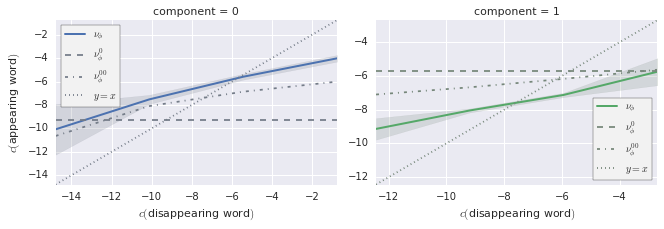

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1825 (cluster-unique) substitutions, but the PCA is in fact computed on 1491 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


   ** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  *** global -> global
    * global -> sentence-relative
    * sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global


    * global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency


  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
   ** global -> global


   ** global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
   ** global -> global
   ** global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
   ** global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


   ** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative


   ** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
   ** global -> global
    * global -> sentence-relative


  *** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count


   ** global -> global


   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
    * global -> global
    * global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
    * global -> global
    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering


  *** global -> global


  *** global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count


    * global -> global
    * global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 1161 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.09915365924497643

intercept                      5.270138
global_aoa                     0.045483
global_clustering              0.034711
global_frequency               0.392186
global_letters_count          -0.034149
global_orthographic_density   -0.024387
global_synonyms_count         -0.074285
dtype: float64

Regressing global frequency with 1161 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.12095215357874045

intercept                                              14.694324
global_aoa                                             -0.568471
global_clustering                                       1.891165
global_frequency                                        0.180273
global_letters_count                                   -0.461772
global_orthographic_density                             0.446609
glo

Regressing rel frequency with 1161 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.28272706408924175

intercept                  -1.446408
rel_aoa                     0.066423
rel_clustering              0.128131
rel_frequency               0.651298
rel_letters_count          -0.119104
rel_orthographic_density   -0.192689
rel_synonyms_count         -0.038826
dtype: float64

Regressing rel frequency with 1161 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.30183954573818006

intercept                                       -1.488340
rel_aoa                                          0.054857
rel_clustering                                   0.234205
rel_frequency                                    0.689005
rel_letters_count                               -0.044542
rel_orthographic_density                        -0.328598
rel_synonyms_count                               0.131671
rel_aoa * rel_clustering                        -0.083759
rel_aoa * rel_frequency          

Regressing rel frequency with 1161 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.41443170077609315

intercept                                                -36.640635
global_aoa                                                 0.948240
global_clustering                                         -6.706670
global_frequency                                           0.401734
global_letters_count                                       0.585243
global_orthographic_density                                8.895021
global_synonyms_count                                     10.489028
rel_aoa                                                   -0.786465
rel_clustering                                             8.778522
rel_frequency                                             -0.444491
rel_letters_count                                         -1.501943
rel_orthographic_density                                  -7.310481
rel_synonyms_count                                        -7.588912
g

Regressing global aoa with 1086 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.06530021889360116

intercept                                        6.762380
rel_aoa                                         -0.104207
rel_clustering                                   0.157129
rel_frequency                                    0.078369
rel_letters_count                               -0.017182
rel_orthographic_density                        -0.403861
rel_synonyms_count                               0.001822
rel_aoa * rel_clustering                         0.053608
rel_aoa * rel_frequency                         -0.052520
rel_aoa * rel_letters_count                      0.032566
rel_aoa * rel_orthographic_density               0.030054
rel_aoa * rel_synonyms_count                    -0.091201
rel_clustering * rel_frequency                   0.045158
rel_clustering * rel_letters_count               0.112965
rel_clustering * rel_orthographic_density        0.032578
rel_clustering * rel_

Regressing rel aoa with 1086 measures, with interactions
           ^^^^^^^
R^2 = 0.2767373036358838

intercept                                                 56.355743
global_aoa                                                -1.010120
global_clustering                                          6.668357
global_frequency                                          -1.274900
global_letters_count                                      -4.007846
global_orthographic_density                              -13.320716
global_synonyms_count                                     -5.019890
rel_aoa                                                    1.762654
rel_clustering                                            -5.987591
rel_frequency                                              2.229802
rel_letters_count                                          3.967092
rel_orthographic_density                                  11.174220
rel_synonyms_count                                         0.997056
global_aoa * g

Regressing global clustering with 963 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.08990619738361405

intercept                                       -5.880673
rel_aoa                                         -0.017865
rel_clustering                                   0.070834
rel_frequency                                   -0.020923
rel_letters_count                               -0.040461
rel_orthographic_density                        -0.016208
rel_synonyms_count                              -0.170552
rel_aoa * rel_clustering                         0.052485
rel_aoa * rel_frequency                          0.001376
rel_aoa * rel_letters_count                     -0.005484
rel_aoa * rel_orthographic_density              -0.009128
rel_aoa * rel_synonyms_count                     0.006739
rel_clustering * rel_frequency                  -0.010628
rel_clustering * rel_letters_count               0.047374
rel_clustering * rel_orthographic_density        0.015919
rel_clus

Regressing rel clustering with 963 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.3782221872825321

intercept                                                 13.089291
global_aoa                                                -0.121379
global_clustering                                          2.127325
global_frequency                                          -1.457275
global_letters_count                                       0.110758
global_orthographic_density                                1.193421
global_synonyms_count                                     -1.848777
rel_aoa                                                   -0.016340
rel_clustering                                            -2.596261
rel_frequency                                              0.889736
rel_letters_count                                         -0.204275
rel_orthographic_density                                  -1.682865
rel_synonyms_count                                        -0.146934
g

Regressing global letters_count with 1161 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.10731561801158851

intercept                                        5.790251
rel_aoa                                         -0.132966
rel_clustering                                   0.042902
rel_frequency                                    0.151388
rel_letters_count                                0.311857
rel_orthographic_density                        -0.365097
rel_synonyms_count                              -0.093778
rel_aoa * rel_clustering                         0.044099
rel_aoa * rel_frequency                         -0.010114
rel_aoa * rel_letters_count                      0.001081
rel_aoa * rel_orthographic_density              -0.008207
rel_aoa * rel_synonyms_count                    -0.031679
rel_clustering * rel_frequency                  -0.052588
rel_clustering * rel_letters_count              -0.038842
rel_clustering * rel_orthographic_density       -0.013929
r

Regressing rel letters_count with 1161 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.26367368809199

intercept                                                 4.799281
global_aoa                                               -0.533710
global_clustering                                        -1.719301
global_frequency                                         -0.296642
global_letters_count                                     -0.607885
global_orthographic_density                              -4.787324
global_synonyms_count                                     0.546874
rel_aoa                                                  -1.530335
rel_clustering                                           -2.253588
rel_frequency                                             0.750303
rel_letters_count                                         1.268324
rel_orthographic_density                                 -0.033278
rel_synonyms_count                                       -3.387595
global_ao

Regressing global synonyms_count with 1128 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.058651374636921716

intercept                                        0.398210
rel_aoa                                         -0.043789
rel_clustering                                  -0.065210
rel_frequency                                   -0.007619
rel_letters_count                               -0.019623
rel_orthographic_density                         0.056007
rel_synonyms_count                               0.193619
rel_aoa * rel_clustering                        -0.000794
rel_aoa * rel_frequency                         -0.008524
rel_aoa * rel_letters_count                      0.005212
rel_aoa * rel_orthographic_density               0.000327
rel_aoa * rel_synonyms_count                     0.028454
rel_clustering * rel_frequency                   0.000991
rel_clustering * rel_letters_count               0.017715
rel_clustering * rel_orthographic_density       -0.00936

Regressing rel synonyms_count with 1128 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.27176412173528275

intercept                                                 14.300660
global_aoa                                                -0.450089
global_clustering                                          2.480667
global_frequency                                          -0.810184
global_letters_count                                      -0.081872
global_orthographic_density                               -0.335968
global_synonyms_count                                      0.812865
rel_aoa                                                   -0.000941
rel_clustering                                            -1.676175
rel_frequency                                              0.585801
rel_letters_count                                          0.132397
rel_orthographic_density                                   0.108550
rel_synonyms_count                                        -

Regressing global orthographic_density with 992 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.12933624173856262

intercept                                        1.598998
rel_aoa                                          0.072589
rel_clustering                                   0.008022
rel_frequency                                   -0.028959
rel_letters_count                               -0.014721
rel_orthographic_density                         0.322177
rel_synonyms_count                               0.232211
rel_aoa * rel_clustering                         0.023418
rel_aoa * rel_frequency                          0.013210
rel_aoa * rel_letters_count                     -0.001989
rel_aoa * rel_orthographic_density               0.037096
rel_aoa * rel_synonyms_count                     0.047112
rel_clustering * rel_frequency                   0.001338
rel_clustering * rel_letters_count               0.007860
rel_clustering * rel_orthographic_density     

Regressing rel orthographic_density with 992 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.26254127879419886

intercept                                                -4.316537
global_aoa                                               -0.151743
global_clustering                                        -0.379758
global_frequency                                          0.251776
global_letters_count                                      0.150206
global_orthographic_density                               1.840495
global_synonyms_count                                     0.836509
rel_aoa                                                   0.129684
rel_clustering                                            1.031134
rel_frequency                                            -0.435260
rel_letters_count                                        -0.060506
rel_orthographic_density                                 -0.789131
rel_synonyms_count                                        0.